In [10]:
# 1. Grad Descent
# import modules
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math

In [3]:
# 1.1 define grad descent function
def grad_descent(x_init, alpha, thresh, f, f_prime):
    iter = 1
    prev = x_init
    next = x_init - alpha*f_prime(prev)
    
    while(sum(abs(prev-next)) >= thresh):
        prev = next
        next = prev - alpha*f_prime(prev)
        iter += 1
        
    return np.append(next, f(next))
    #print "Iterations = ", iter

In [6]:
# import data for grad descent
import pylab as pl

def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('/Users/becca/Documents/Google Drive/Dropbox/Grad School/ML/code_hw1/P1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 

In [7]:
# define variables for gaussian and quadratic bowl functions
gaussMean = getData()[0]
gaussCov = getData()[1]
n = gaussMean.shape[0]
quadBowlA = getData()[2]
quadBowlB = getData()[3]

In [8]:
# Quadratic Bowl functions
f = lambda x: 0.5 * np.dot(np.dot(x, quadBowlA), x.T) - np.dot(x, quadBowlB)
f_prime = lambda x: np.dot(quadBowlA, x.T) - quadBowlB
x = np.array([30, 26.667])

array([ 33.335,  16.67 ])

In [9]:
# Gaussian functions
from operator import truediv
f = lambda x: -10**4/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
f_prime = lambda x: np.dot(np.dot(-f(x), inv(gaussCov)), (x-gaussMean))

In [ ]:
# 1.2. Numerical Gradient Evaluation
# Gaussian functions
f = lambda x: -10**4/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
delta = np.array([1e-10, 1e-10])
f_prime = lambda x: np.array([((f(x[0]+delta)-f(x[0]))/delta)[0], ((f(x[1]+delta)-f(x[1]))/delta)[1]])
x = np.array([10, 11])

In [356]:
# Need to do numerical gradient evaluation for quadratic bowl!!
f = lambda x: -10**4/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
delta = np.array([1e-10, 1e-10])
# just use f_prime numerical grad for Gaussian, should be the same or very similar

In [20]:
# 1.3. Stochastic Gradient Descent
# retrieve data
def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    xp1 = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P1/fittingdatap1_x.txt')
    yp1 = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P1/fittingdatap1_y.txt')

    return (xp1,yp1) 



In [1488]:
# define variables
xp1 = getData()[0]
yp1 = getData()[1]

# closed form soln:
w = np.dot(np.dot(inv(np.dot(xp1.T, xp1)), xp1.T), yp1)
w

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [1489]:
# Define LMS function and derivative
f = lambda w: sum((np.dot(xp1,w)-yp1)**2)
f_prime = lambda w: (2*np.dot((np.dot(xp1,w)-yp1), xp1))
f_prime(w)

array([  9.36668948e-11,  -3.18711949e-11,  -9.22887588e-11,
        -1.64776378e-10,   1.03009487e-10,  -8.93619715e-11,
        -6.25343613e-11,  -5.73104542e-11,  -4.17318354e-10,
        -5.15504244e-10])

In [149]:
# Define initial value for test
w_init = w+1
w_init

array([  1.5032541 ,  -1.3367948 ,  -5.31670032,   7.81230107,
        -0.06337989,   7.67469398,   4.4118044 ,   0.54426408,
       -11.94593466,  16.73289812])

In [1490]:
# Define grad descent with modified obj criterion
def grad_descent(x_init, alpha, thresh, f, f_prime):
    iter = 1
    prev = x_init
    next = x_init - alpha*f_prime(prev)
    
    while(sum(abs(f_prime(next)))) >= thresh:
        prev = next
        next = prev - alpha*f_prime(prev)
        iter += 1
        
    return np.append(next, f(next))
    #print "Iterations = ", iter

In [1491]:
# Test
# working now but with poor convergence
w_init = w+1

grad_descent(w_init, 1e-8, 12, f, f_prime)


array([  5.03239942e-01,  -2.33675857e+00,  -6.31672875e+00,
         6.81230347e+00,  -1.06335617e+00,   6.67473759e+00,
         3.41189702e+00,  -4.55730185e-01,  -1.29459496e+01,
         1.57328925e+01,   8.33321452e+03])

In [ ]:
# Stochastic gradient descent - define function with input i = index of data for gradient
# This is working
f = lambda w: sum((np.dot(xp1,w)-yp1)**2)
f_prime = lambda w, i: (2*np.dot((np.dot(xp1[i],w)-yp1[i]), xp1[i]))
f_prime(w, 1)

In [331]:
# Stochastic gradient descent function - not working
# nrounds - define rounds of data to iterate through

def stoch_grad_descent(x_init, alpha, thresh, f, f_prime, nrounds):
    i=0
    iter = 1
    prev = x_init
    next = x_init - alpha*f_prime(prev, i)
    
    for j in range(0, (nrounds-1)):
        for i in range(0, 99):
            prev = next
            next = prev - alpha*f_prime(prev, i)
            i+=1
            iter += 1
            if(sum(abs(f_prime(next, range(0, 99))))) <= thresh:
                return np.append(next, f(next)), iter
                #print "Iterations = ", iter
        j+=1
    if(sum(abs(f_prime(next, range(0, 99))))) <= thresh:
        return np.append(next, f(next)), iter
    else:
        return "Did not converge, min cost was: ", sum(abs(f_prime(next, range(0, 99)))), iter
                #return "Not converged"
        
    #return np.append(next, f(next)), iter
    #print "Iterations = ", iter

In [265]:
# Testing part of stoch grad descent loop to troubleshoot
# not working...
x_init = w
i=0
alpha = 1e-4
iter = 1
prev = x_init
next = x_init - alpha*f_prime(prev, i)
next
thresh = 1e-2
for j in range(0, 2):
       for i in range(0, 99):
        prev = next
            i +=1
            iter += 1
                
# np.append(next, f(next))
# next
# sum(abs(f_prime(next, range(0,100))))


201

In [ ]:
# test SGD function
stoch_grad_descent(w+0.0001, 1e-20, 2000, f, f_prime, 1000)
# not converging.. is iterating but seems like cost not decreasing

In [1618]:
# Problem 2.
# Linear Basis Function Regression
# import data and plot
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P2/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

In [1619]:
# define variables
X = getData(ifPlotData = False)[0]
Y = getData(ifPlotData = False)[1]

In [ ]:
# define polyx function - takes x and degree, returns array of x's up to given degree, including added col of ones
def polyx(Xplot, degree):
    len = Xplot.shape[1]
    if degree in range(0,1):
        Xnew = np.ones((len,1))
        return Xnew
    elif degree in range(1,2):
        Xnew = np.hstack((np.ones((len, 1)), Xplot.T))
        return Xnew
    else:
        Xnew = np.hstack((np.ones((len, 1)), Xplot.T))
        for i in range(2, degree+1):
            Xnew = np.hstack((Xnew, Xplot.T**i))
            i += 1
            
        return Xnew

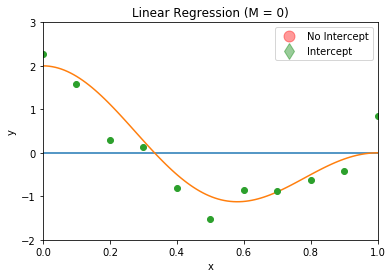

In [1557]:
# 2.1. Polynomial Fit
# Note: code for fits is the same, change m only
# m = 0
m = 0
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m).T[::-1])
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

#fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot, '-')
plt.plot(Xplot.T, Yactual.T, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.title("Linear Regression (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-2,3])
plt.show()
#fig.savefig('2.1 poly %s.jpg' %(m))

In [ ]:
# m = 1
m = 1
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m)[::-1])
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot, '-')
plt.plot(Xplot.T, Yactual.T, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.title("Linear Regression (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-2,3])
fig.savefig('2.1 poly %s.jpg' %(m))

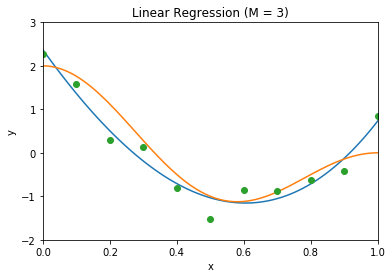

In [1558]:
# m = 3
m = 3
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m)[::-1])
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

#fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot, '-')
plt.plot(Xplot.T, Yactual.T, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.title("Linear Regression (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-2,3])
plt.show()
#fig.savefig('2.1 poly %s.jpg' %(m))


In [584]:
# m = 10
m = 10
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m)[np.newaxis].T[::-1])
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot, '-')
plt.plot(Xplot.T, Yactual.T, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.title("Linear Regression (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-3,3])
fig.savefig('2.1 poly %s.jpg' %(m))

In [1559]:
#2.2 Compute SSE given degree
Xplot = X[np.newaxis]
Y = np.reshape(Y, (11,1))
f = lambda w, m: 0.5*sum((np.dot(polyx(Xplot, m), w)-Y)**2)
f_prime = lambda w, m: np.dot(polyx(Xplot, m).T,(np.dot(polyx(Xplot, m), w)-Y)) 

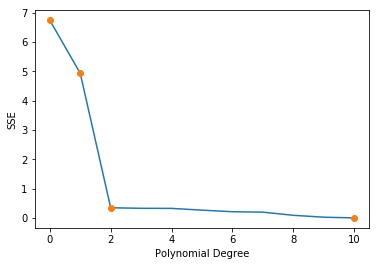

In [1620]:
sse = []
for m in [0,1,2,10]:
    w=np.polyfit(X, Y, m)[::-1]
    sse.append(f(w, m))
    
sse

ssecontin = []
for i in range(0, 11, 1):
    w=np.polyfit(X, Y, i)[::-1]
    ssecontin.append(f(w, i))
    
# Plot sse vs m
m = [0,1,2,10]
mcontin = range(0, 11, 1)
#fig = plt.figure(figsize=(5,5), dpi=300)

plt.plot(mcontin, ssecontin, '-')
plt.plot(m, sse, 'o')
plt.xlabel('Polynomial Degree')
plt.ylabel('SSE')
plt.show()
#fig.savefig('2.2 Poly deg vs SSE.jpg' %(m))


In [723]:
# Calculate W max likelihood analytically, confirm SSE(w, m) is working
m=1
Xplot = X[np.newaxis]
w=np.polyfit(X, Y, m)[::-1]

Y = np.reshape(Y, (11,1))
.5*sum((np.dot(polyx(Xplot, m), w)-Y)**2)

array([ 4.9309915])

In [629]:
# Numerical Deriv Confirmation
f = lambda w, m: 0.5*sum((np.dot(polyx(Xplot, m), w)-Y)**2)
def num_sse(coeff, m, delta):
    grad = []
    for i in range(0, len(coeff)):
        tmp = np.array(list(coeff))
        deltmp = np.array(list(coeff))
        deltmp[i] = deltmp[i]+delta
        grad.append((f(deltmp, m)-f(tmp, m))/delta)
    return grad

In [728]:
# Plot analytical vs numerical, m = 10
m = 10
w=np.polyfit(X, Y, m)[::-1]
actual = f_prime(w+2, m)
num10 = num_sse(w+2, m, 0.5)
num100 = num_sse(w+2, m, 5)
num1 = num_sse(w+2, m, 1)

# x = linspace(25, 75, num = 200)
# y = x*slope + intercept

fig = plt.figure(figsize=(5,5), dpi=300)
# plt.plot(Xplot.T, Yplot, '-')
# plt.plot(Xplot.T, Yactual.T, '-')
plt.plot(actual, num10, '-', label = '0.5')
plt.plot(actual, num1, '-', label = '1')
plt.plot(actual, num100, '-', label = '5')
plt.plot(actual, actual, '--')
plt.title("M = %s"%(m))
plt.xlabel('Analytical Gradient')
plt.ylabel('Numerical Derivative')
plt.legend(loc='upper left', title = 'Step size')
fig.savefig('2.2 Anal vs Numer %s.jpg' %(m))

In [729]:
# Plot analytical vs numerical, m = 1
m = 1
w=np.polyfit(X, Y, m)[::-1]
actual = f_prime(w+2, m)
num10 = num_sse(w+2, m, 0.5)
num100 = num_sse(w+2, m, 5)
num1 = num_sse(w+2, m, 1)

# x = linspace(25, 75, num = 200)
# y = x*slope + intercept

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(actual, num10, '-', label = '0.5')
plt.plot(actual, num1, '-', label = '1')
plt.plot(actual, num100, '-', label = '5')
plt.plot(actual, actual, '--')
plt.title("M = %s"%(m))
plt.xlabel('Analytical Gradient')
plt.ylabel('Numerical Derivative')
plt.legend(loc='upper left', title = 'Step size')
fig.savefig('2.2 Anal vs Numer %s.jpg' %(m))

In [ ]:
# 2.3 Define batch grad descent function for polynomial:
def grad_descent_multi(w_init, alpha, thresh, f, f_prime, m):
    iter = 1
    prev = w_init
    next = w_init - alpha*f_prime(prev, m)
    
    while(sum(abs(f_prime(next, m)))) >= thresh:
        prev = next
        next = prev - alpha*f_prime(prev, m)
        iter += 1
        
    return np.append(next, f(next, m))
    #return iter

In [802]:
# 2.3 Define batch grad descent function for polynomial:
def grad_descent_multi_it(w_init, alpha, thresh, f, f_prime, m):
    iter = 1
    prev = w_init
    next = w_init - alpha*f_prime(prev, m)
    
    while(sum(abs(f_prime(next, m)))) >= thresh:
        prev = next
        next = prev - alpha*f_prime(prev, m)
        iter += 1
    
    return iter

In [804]:
# Test function - works!
m=2
w=np.polyfit(X, Y, m)[::-1]
west = grad_descent_multi(w+3, .01, 1e-5, f, f_prime, m)[0:m+1]
west
iter = grad_descent_multi_it(w+3, .01, 1e-5, f, f_prime, m)
iter

17906

In [ ]:
f_prime = lambda w, m: np.dot(polyx(Xplot, m).T,(np.dot(polyx(Xplot, m), w)-Y)) 

In [ ]:
# define polyx function - takes x and degree, returns array of x's up to given degree, including added col of ones
def polyxsgd(Xplot, degree):
    if degree in range(0,1):
        Xnew = 1
        return Xnew
    elif degree in range(1,2):
        Xnew = np.hstack((1, Xplot))
        return Xnew
    else:
        Xnew = np.hstack((1, Xplot))
        for i in range(2, degree+1):
            Xnew = np.hstack((Xnew, Xplot**i))
            
        return Xnew

In [ ]:
m=2
i=1
w=np.polyfit(X, Y, m)[::-1]
X_i = X[i][np.newaxis][0]
Y_i = Y[i]
thetas = (w+10)[np.newaxis].T
temp = (Y_i - np.dot(polyxsgd(X_i, m), thetas))
#thetas = thetas + (alpha*temp* X_i.T) #

np.power((sum((Y - np.ndarray.flatten(np.dot(polyx(X[np.newaxis], m), thetas)))))**2, 0.5)

In [1655]:
w

array([  2.45618252, -12.150438  ,  10.33761072])

In [1662]:
def SGDpoly(w, X, Y, m, thresh, step):
    n = X.shape[0] #number of training examples
    n_iter = 100000 # number of iterations  #CHANGE
    thetas = (w)[np.newaxis].T# initial guesses
    prev_cost = np.power((sum((Y - np.ndarray.flatten(np.dot(polyx(X[np.newaxis], m), thetas)))))**2, 0.5)
    print "Initial Cost: %0.3f" %prev_cost

    for iteration in xrange(n_iter): #for each iteration
        alpha = ((iteration+1)+step**(-1))**(-0.8) #learning rate
        for i in xrange(n): #for each training example #CHANGE
            i = random.sample(xrange(X.shape[0]), 1)
            X_i = X[i][np.newaxis][0]
            Y_i = Y[i]
            temp = (Y_i - np.dot(polyxsgd(X_i, m), thetas))[0]
            thetas = thetas + (alpha*temp* X_i.T) #
            inner_iter = i

            curr_cost = np.power((sum((Y - np.ndarray.flatten(np.dot(polyx(X[np.newaxis], m), thetas)))))**2, 0.5)
            print "iteration: %0.3f" %iteration
            print "cost: %0.3f" %curr_cost
            if np.power((sum((Y - np.ndarray.flatten(np.dot(polyx(X[np.newaxis], m), thetas)))))**2, 0.5) <= thresh:
                print('SUCCESS')
                return (iteration, thetas, curr_cost)
            prev_cost = curr_cost
    print("Did Not Converge")
    return (iteration, curr_cost, thetas)

In [1666]:
m=2
w=np.polyfit(X, Y, m)[::-1]
iter = SGDpoly(w+60, X, Y, m, 0.1, 1e-4)[0]

Initial Cost: 1221.000
iteration: 0.000
cost: 1220.809
iteration: 0.000
cost: 1220.617
iteration: 0.000
cost: 1219.713
iteration: 0.000
cost: 1217.833
iteration: 0.000
cost: 1216.656
iteration: 0.000
cost: 1216.656
iteration: 0.000
cost: 1216.656
iteration: 0.000
cost: 1216.571
iteration: 0.000
cost: 1215.395
iteration: 0.000
cost: 1213.522
iteration: 0.000
cost: 1213.331
iteration: 1.000
cost: 1213.247
iteration: 1.000
cost: 1210.953
iteration: 1.000
cost: 1209.086
iteration: 1.000
cost: 1208.610
iteration: 1.000
cost: 1208.526
iteration: 1.000
cost: 1207.358
iteration: 1.000
cost: 1207.274
iteration: 1.000
cost: 1205.787
iteration: 1.000
cost: 1205.787
iteration: 1.000
cost: 1203.508
iteration: 1.000
cost: 1203.192
iteration: 2.000
cost: 1201.338
iteration: 2.000
cost: 1201.254
iteration: 2.000
cost: 1200.588
iteration: 2.000
cost: 1198.318
iteration: 2.000
cost: 1197.654
iteration: 2.000
cost: 1196.990
iteration: 2.000
cost: 1196.802
iteration: 2.000
cost: 1196.489
iteration: 2.000


cost: 1002.091
iteration: 28.000
cost: 1002.091
iteration: 28.000
cost: 1002.021
iteration: 28.000
cost: 1000.790
iteration: 28.000
cost: 1000.790
iteration: 28.000
cost: 1000.396
iteration: 28.000
cost: 999.842
iteration: 28.000
cost: 998.614
iteration: 28.000
cost: 998.221
iteration: 29.000
cost: 997.961
iteration: 29.000
cost: 996.735
iteration: 29.000
cost: 995.999
iteration: 29.000
cost: 995.264
iteration: 29.000
cost: 995.264
iteration: 29.000
cost: 994.529
iteration: 29.000
cost: 994.529
iteration: 29.000
cost: 994.529
iteration: 29.000
cost: 992.653
iteration: 29.000
cost: 990.781
iteration: 29.000
cost: 990.781
iteration: 30.000
cost: 990.392
iteration: 30.000
cost: 990.133
iteration: 30.000
cost: 988.917
iteration: 30.000
cost: 988.187
iteration: 30.000
cost: 987.640
iteration: 30.000
cost: 986.911
iteration: 30.000
cost: 986.182
iteration: 30.000
cost: 984.323
iteration: 30.000
cost: 984.066
iteration: 30.000
cost: 983.997
iteration: 30.000
cost: 983.740
iteration: 31.000
co

iteration: 58.000
cost: 811.300
iteration: 58.000
cost: 811.300
iteration: 58.000
cost: 811.244
iteration: 58.000
cost: 810.795
iteration: 58.000
cost: 809.550
iteration: 58.000
cost: 809.339
iteration: 58.000
cost: 809.339
iteration: 58.000
cost: 809.129
iteration: 58.000
cost: 807.886
iteration: 58.000
cost: 806.366
iteration: 58.000
cost: 805.920
iteration: 59.000
cost: 805.474
iteration: 59.000
cost: 805.158
iteration: 59.000
cost: 804.842
iteration: 59.000
cost: 804.717
iteration: 59.000
cost: 804.508
iteration: 59.000
cost: 803.272
iteration: 59.000
cost: 801.761
iteration: 59.000
cost: 801.636
iteration: 59.000
cost: 800.128
iteration: 59.000
cost: 799.814
iteration: 59.000
cost: 799.606
iteration: 60.000
cost: 799.164
iteration: 60.000
cost: 798.185
iteration: 60.000
cost: 797.597
iteration: 60.000
cost: 797.390
iteration: 60.000
cost: 796.803
iteration: 60.000
cost: 796.037
iteration: 60.000
cost: 794.814
iteration: 60.000
cost: 794.375
iteration: 60.000
cost: 793.611
iteratio

cost: 523.169
iteration: 115.000
cost: 523.034
iteration: 115.000
cost: 522.899
iteration: 115.000
cost: 522.863
iteration: 115.000
cost: 522.480
iteration: 115.000
cost: 521.843
iteration: 115.000
cost: 521.807
iteration: 115.000
cost: 521.807
iteration: 116.000
cost: 521.519
iteration: 116.000
cost: 521.230
iteration: 116.000
cost: 521.027
iteration: 116.000
cost: 520.528
iteration: 116.000
cost: 520.528
iteration: 116.000
cost: 520.447
iteration: 116.000
cost: 520.447
iteration: 116.000
cost: 520.313
iteration: 116.000
cost: 520.025
iteration: 116.000
cost: 519.891
iteration: 116.000
cost: 519.095
iteration: 117.000
cost: 518.300
iteration: 117.000
cost: 518.014
iteration: 117.000
cost: 518.014
iteration: 117.000
cost: 518.014
iteration: 117.000
cost: 517.045
iteration: 117.000
cost: 517.045
iteration: 117.000
cost: 517.045
iteration: 117.000
cost: 516.911
iteration: 117.000
cost: 516.281
iteration: 117.000
cost: 515.996
iteration: 117.000
cost: 515.794
iteration: 118.000
cost: 515.

iteration: 166.000
cost: 355.897
iteration: 166.000
cost: 355.639
iteration: 166.000
cost: 354.977
iteration: 166.000
cost: 354.886
iteration: 166.000
cost: 354.226
iteration: 167.000
cost: 354.171
iteration: 167.000
cost: 353.629
iteration: 167.000
cost: 353.293
iteration: 167.000
cost: 353.036
iteration: 167.000
cost: 352.779
iteration: 167.000
cost: 352.351
iteration: 167.000
cost: 352.095
iteration: 167.000
cost: 351.439
iteration: 167.000
cost: 351.012
iteration: 167.000
cost: 350.923
iteration: 167.000
cost: 350.833
iteration: 168.000
cost: 350.180
iteration: 168.000
cost: 349.926
iteration: 168.000
cost: 349.593
iteration: 168.000
cost: 349.260
iteration: 168.000
cost: 349.006
iteration: 168.000
cost: 348.917
iteration: 168.000
cost: 348.384
iteration: 168.000
cost: 347.736
iteration: 168.000
cost: 347.089
iteration: 168.000
cost: 346.897
iteration: 168.000
cost: 346.897
iteration: 169.000
cost: 346.644
iteration: 169.000
cost: 346.000
iteration: 169.000
cost: 345.808
iteration:

iteration: 218.000
cost: 229.891
iteration: 219.000
cost: 229.613
iteration: 219.000
cost: 229.263
iteration: 219.000
cost: 229.205
iteration: 219.000
cost: 229.205
iteration: 219.000
cost: 228.928
iteration: 219.000
cost: 228.711
iteration: 219.000
cost: 228.622
iteration: 219.000
cost: 228.457
iteration: 219.000
cost: 228.108
iteration: 219.000
cost: 228.051
iteration: 219.000
cost: 228.015
iteration: 220.000
cost: 227.889
iteration: 220.000
cost: 227.831
iteration: 220.000
cost: 227.615
iteration: 220.000
cost: 227.340
iteration: 220.000
cost: 227.325
iteration: 220.000
cost: 227.110
iteration: 220.000
cost: 226.690
iteration: 220.000
cost: 226.343
iteration: 220.000
cost: 225.998
iteration: 220.000
cost: 225.962
iteration: 220.000
cost: 225.617
iteration: 221.000
cost: 225.404
iteration: 221.000
cost: 225.190
iteration: 221.000
cost: 224.918
iteration: 221.000
cost: 224.756
iteration: 221.000
cost: 224.340
iteration: 221.000
cost: 224.216
iteration: 221.000
cost: 224.091
iteration:

iteration: 255.000
cost: 175.273
iteration: 255.000
cost: 175.005
iteration: 255.000
cost: 174.683
iteration: 255.000
cost: 174.586
iteration: 255.000
cost: 174.574
iteration: 255.000
cost: 174.409
iteration: 255.000
cost: 174.199
iteration: 255.000
cost: 174.199
iteration: 256.000
cost: 174.102
iteration: 256.000
cost: 174.090
iteration: 256.000
cost: 174.047
iteration: 256.000
cost: 173.922
iteration: 256.000
cost: 173.656
iteration: 256.000
cost: 173.656
iteration: 256.000
cost: 173.559
iteration: 256.000
cost: 173.462
iteration: 256.000
cost: 173.197
iteration: 256.000
cost: 172.933
iteration: 256.000
cost: 172.889
iteration: 257.000
cost: 172.571
iteration: 257.000
cost: 172.475
iteration: 257.000
cost: 172.351
iteration: 257.000
cost: 172.228
iteration: 257.000
cost: 172.228
iteration: 257.000
cost: 171.965
iteration: 257.000
cost: 171.965
iteration: 257.000
cost: 171.803
iteration: 257.000
cost: 171.641
iteration: 257.000
cost: 171.629
iteration: 257.000
cost: 171.367
iteration:

iteration: 307.000
cost: 113.569
iteration: 307.000
cost: 113.569
iteration: 307.000
cost: 113.569
iteration: 307.000
cost: 113.542
iteration: 307.000
cost: 113.524
iteration: 307.000
cost: 113.317
iteration: 307.000
cost: 113.253
iteration: 307.000
cost: 113.253
iteration: 308.000
cost: 113.235
iteration: 308.000
cost: 113.028
iteration: 308.000
cost: 112.964
iteration: 308.000
cost: 112.947
iteration: 308.000
cost: 112.867
iteration: 308.000
cost: 112.859
iteration: 308.000
cost: 112.724
iteration: 308.000
cost: 112.518
iteration: 308.000
cost: 112.313
iteration: 308.000
cost: 112.178
iteration: 308.000
cost: 112.098
iteration: 309.000
cost: 111.894
iteration: 309.000
cost: 111.815
iteration: 309.000
cost: 111.643
iteration: 309.000
cost: 111.636
iteration: 309.000
cost: 111.618
iteration: 309.000
cost: 111.415
iteration: 309.000
cost: 111.336
iteration: 309.000
cost: 111.133
iteration: 309.000
cost: 111.115
iteration: 309.000
cost: 111.098
iteration: 309.000
cost: 111.091
iteration:

cost: 81.133
iteration: 347.000
cost: 81.121
iteration: 347.000
cost: 81.074
iteration: 347.000
cost: 81.074
iteration: 348.000
cost: 81.069
iteration: 348.000
cost: 81.049
iteration: 348.000
cost: 80.953
iteration: 348.000
cost: 80.828
iteration: 348.000
cost: 80.815
iteration: 348.000
cost: 80.784
iteration: 348.000
cost: 80.779
iteration: 348.000
cost: 80.682
iteration: 348.000
cost: 80.663
iteration: 348.000
cost: 80.517
iteration: 348.000
cost: 80.461
iteration: 349.000
cost: 80.337
iteration: 349.000
cost: 80.305
iteration: 349.000
cost: 80.259
iteration: 349.000
cost: 80.213
iteration: 349.000
cost: 80.182
iteration: 349.000
cost: 80.108
iteration: 349.000
cost: 80.033
iteration: 349.000
cost: 80.002
iteration: 349.000
cost: 79.857
iteration: 349.000
cost: 79.827
iteration: 349.000
cost: 79.808
iteration: 350.000
cost: 79.802
iteration: 350.000
cost: 79.679
iteration: 350.000
cost: 79.557
iteration: 350.000
cost: 79.413
iteration: 350.000
cost: 79.339
iteration: 350.000
cost: 79

cost: 46.925
iteration: 420.000
cost: 46.882
iteration: 420.000
cost: 46.808
iteration: 420.000
cost: 46.725
iteration: 420.000
cost: 46.707
iteration: 420.000
cost: 46.664
iteration: 421.000
cost: 46.654
iteration: 421.000
cost: 46.643
iteration: 421.000
cost: 46.625
iteration: 421.000
cost: 46.607
iteration: 421.000
cost: 46.607
iteration: 421.000
cost: 46.600
iteration: 421.000
cost: 46.582
iteration: 421.000
cost: 46.564
iteration: 421.000
cost: 46.556
iteration: 421.000
cost: 46.546
iteration: 421.000
cost: 46.546
iteration: 422.000
cost: 46.535
iteration: 422.000
cost: 46.504
iteration: 422.000
cost: 46.448
iteration: 422.000
cost: 46.393
iteration: 422.000
cost: 46.362
iteration: 422.000
cost: 46.334
iteration: 422.000
cost: 46.279
iteration: 422.000
cost: 46.207
iteration: 422.000
cost: 46.199
iteration: 422.000
cost: 46.199
iteration: 422.000
cost: 46.168
iteration: 423.000
cost: 46.161
iteration: 423.000
cost: 46.143
iteration: 423.000
cost: 46.140
iteration: 423.000
cost: 46

iteration: 460.000
cost: 34.031
iteration: 460.000
cost: 34.029
iteration: 460.000
cost: 33.969
iteration: 460.000
cost: 33.948
iteration: 460.000
cost: 33.943
iteration: 460.000
cost: 33.935
iteration: 461.000
cost: 33.876
iteration: 461.000
cost: 33.870
iteration: 461.000
cost: 33.857
iteration: 461.000
cost: 33.850
iteration: 461.000
cost: 33.796
iteration: 461.000
cost: 33.789
iteration: 461.000
cost: 33.730
iteration: 461.000
cost: 33.717
iteration: 461.000
cost: 33.711
iteration: 461.000
cost: 33.706
iteration: 461.000
cost: 33.675
iteration: 462.000
cost: 33.668
iteration: 462.000
cost: 33.647
iteration: 462.000
cost: 33.642
iteration: 462.000
cost: 33.611
iteration: 462.000
cost: 33.611
iteration: 462.000
cost: 33.591
iteration: 462.000
cost: 33.583
iteration: 462.000
cost: 33.578
iteration: 462.000
cost: 33.576
iteration: 462.000
cost: 33.546
iteration: 462.000
cost: 33.533
iteration: 463.000
cost: 33.474
iteration: 463.000
cost: 33.453
iteration: 463.000
cost: 33.413
iteratio

iteration: 502.000
cost: 24.797
iteration: 502.000
cost: 24.775
iteration: 502.000
cost: 24.735
iteration: 502.000
cost: 24.731
iteration: 502.000
cost: 24.688
iteration: 502.000
cost: 24.672
iteration: 502.000
cost: 24.671
iteration: 502.000
cost: 24.671
iteration: 502.000
cost: 24.667
iteration: 502.000
cost: 24.645
iteration: 503.000
cost: 24.640
iteration: 503.000
cost: 24.618
iteration: 503.000
cost: 24.589
iteration: 503.000
cost: 24.560
iteration: 503.000
cost: 24.555
iteration: 503.000
cost: 24.546
iteration: 503.000
cost: 24.546
iteration: 503.000
cost: 24.545
iteration: 503.000
cost: 24.529
iteration: 503.000
cost: 24.489
iteration: 503.000
cost: 24.460
iteration: 504.000
cost: 24.456
iteration: 504.000
cost: 24.440
iteration: 504.000
cost: 24.439
iteration: 504.000
cost: 24.423
iteration: 504.000
cost: 24.414
iteration: 504.000
cost: 24.398
iteration: 504.000
cost: 24.369
iteration: 504.000
cost: 24.364
iteration: 504.000
cost: 24.323
iteration: 504.000
cost: 24.319
iteratio

iteration: 533.000
cost: 19.757
iteration: 533.000
cost: 19.745
iteration: 533.000
cost: 19.711
iteration: 533.000
cost: 19.711
iteration: 534.000
cost: 19.699
iteration: 534.000
cost: 19.691
iteration: 534.000
cost: 19.691
iteration: 534.000
cost: 19.683
iteration: 534.000
cost: 19.660
iteration: 534.000
cost: 19.660
iteration: 534.000
cost: 19.648
iteration: 534.000
cost: 19.645
iteration: 534.000
cost: 19.627
iteration: 534.000
cost: 19.595
iteration: 534.000
cost: 19.562
iteration: 535.000
cost: 19.559
iteration: 535.000
cost: 19.541
iteration: 535.000
cost: 19.529
iteration: 535.000
cost: 19.517
iteration: 535.000
cost: 19.504
iteration: 535.000
cost: 19.472
iteration: 535.000
cost: 19.458
iteration: 535.000
cost: 19.426
iteration: 535.000
cost: 19.423
iteration: 535.000
cost: 19.410
iteration: 535.000
cost: 19.392
iteration: 536.000
cost: 19.389
iteration: 536.000
cost: 19.382
iteration: 536.000
cost: 19.374
iteration: 536.000
cost: 19.374
iteration: 536.000
cost: 19.371
iteratio

iteration: 588.000
cost: 13.130
iteration: 588.000
cost: 13.122
iteration: 588.000
cost: 13.100
iteration: 588.000
cost: 13.100
iteration: 588.000
cost: 13.099
iteration: 589.000
cost: 13.076
iteration: 589.000
cost: 13.071
iteration: 589.000
cost: 13.071
iteration: 589.000
cost: 13.061
iteration: 589.000
cost: 13.046
iteration: 589.000
cost: 13.035
iteration: 589.000
cost: 13.035
iteration: 589.000
cost: 13.028
iteration: 589.000
cost: 13.025
iteration: 589.000
cost: 13.003
iteration: 589.000
cost: 12.997
iteration: 590.000
cost: 12.990
iteration: 590.000
cost: 12.988
iteration: 590.000
cost: 12.983
iteration: 590.000
cost: 12.983
iteration: 590.000
cost: 12.975
iteration: 590.000
cost: 12.954
iteration: 590.000
cost: 12.952
iteration: 590.000
cost: 12.951
iteration: 590.000
cost: 12.949
iteration: 590.000
cost: 12.942
iteration: 590.000
cost: 12.940
iteration: 591.000
cost: 12.935
iteration: 591.000
cost: 12.929
iteration: 591.000
cost: 12.914
iteration: 591.000
cost: 12.903
iteratio

cost: 9.545
iteration: 630.000
cost: 9.538
iteration: 631.000
cost: 9.530
iteration: 631.000
cost: 9.522
iteration: 631.000
cost: 9.511
iteration: 631.000
cost: 9.500
iteration: 631.000
cost: 9.489
iteration: 631.000
cost: 9.478
iteration: 631.000
cost: 9.461
iteration: 631.000
cost: 9.446
iteration: 631.000
cost: 9.438
iteration: 631.000
cost: 9.437
iteration: 631.000
cost: 9.423
iteration: 632.000
cost: 9.421
iteration: 632.000
cost: 9.416
iteration: 632.000
cost: 9.411
iteration: 632.000
cost: 9.410
iteration: 632.000
cost: 9.410
iteration: 632.000
cost: 9.402
iteration: 632.000
cost: 9.402
iteration: 632.000
cost: 9.391
iteration: 632.000
cost: 9.390
iteration: 632.000
cost: 9.390
iteration: 632.000
cost: 9.382
iteration: 633.000
cost: 9.381
iteration: 633.000
cost: 9.373
iteration: 633.000
cost: 9.369
iteration: 633.000
cost: 9.364
iteration: 633.000
cost: 9.364
iteration: 633.000
cost: 9.347
iteration: 633.000
cost: 9.346
iteration: 633.000
cost: 9.342
iteration: 633.000
cost: 9.

iteration: 692.000
cost: 6.189
iteration: 692.000
cost: 6.186
iteration: 692.000
cost: 6.186
iteration: 692.000
cost: 6.183
iteration: 693.000
cost: 6.183
iteration: 693.000
cost: 6.182
iteration: 693.000
cost: 6.176
iteration: 693.000
cost: 6.173
iteration: 693.000
cost: 6.171
iteration: 693.000
cost: 6.168
iteration: 693.000
cost: 6.166
iteration: 693.000
cost: 6.164
iteration: 693.000
cost: 6.163
iteration: 693.000
cost: 6.158
iteration: 693.000
cost: 6.151
iteration: 694.000
cost: 6.145
iteration: 694.000
cost: 6.138
iteration: 694.000
cost: 6.136
iteration: 694.000
cost: 6.136
iteration: 694.000
cost: 6.136
iteration: 694.000
cost: 6.129
iteration: 694.000
cost: 6.129
iteration: 694.000
cost: 6.128
iteration: 694.000
cost: 6.127
iteration: 694.000
cost: 6.127
iteration: 694.000
cost: 6.121
iteration: 695.000
cost: 6.121
iteration: 695.000
cost: 6.116
iteration: 695.000
cost: 6.108
iteration: 695.000
cost: 6.107
iteration: 695.000
cost: 6.095
iteration: 695.000
cost: 6.094
iteratio

cost: 4.112
iteration: 750.000
cost: 4.112
iteration: 750.000
cost: 4.111
iteration: 750.000
cost: 4.110
iteration: 750.000
cost: 4.105
iteration: 751.000
cost: 4.100
iteration: 751.000
cost: 4.099
iteration: 751.000
cost: 4.090
iteration: 751.000
cost: 4.087
iteration: 751.000
cost: 4.086
iteration: 751.000
cost: 4.081
iteration: 751.000
cost: 4.081
iteration: 751.000
cost: 4.082
iteration: 751.000
cost: 4.077
iteration: 751.000
cost: 4.071
iteration: 751.000
cost: 4.071
iteration: 752.000
cost: 4.069
iteration: 752.000
cost: 4.069
iteration: 752.000
cost: 4.069
iteration: 752.000
cost: 4.069
iteration: 752.000
cost: 4.070
iteration: 752.000
cost: 4.065
iteration: 752.000
cost: 4.060
iteration: 752.000
cost: 4.059
iteration: 752.000
cost: 4.050
iteration: 752.000
cost: 4.048
iteration: 752.000
cost: 4.043
iteration: 753.000
cost: 4.044
iteration: 753.000
cost: 4.035
iteration: 753.000
cost: 4.030
iteration: 753.000
cost: 4.027
iteration: 753.000
cost: 4.023
iteration: 753.000
cost: 4.

iteration: 804.000
cost: 2.815
iteration: 804.000
cost: 2.813
iteration: 804.000
cost: 2.811
iteration: 805.000
cost: 2.807
iteration: 805.000
cost: 2.807
iteration: 805.000
cost: 2.806
iteration: 805.000
cost: 2.799
iteration: 805.000
cost: 2.797
iteration: 805.000
cost: 2.796
iteration: 805.000
cost: 2.796
iteration: 805.000
cost: 2.795
iteration: 805.000
cost: 2.791
iteration: 805.000
cost: 2.792
iteration: 805.000
cost: 2.792
iteration: 806.000
cost: 2.789
iteration: 806.000
cost: 2.787
iteration: 806.000
cost: 2.787
iteration: 806.000
cost: 2.787
iteration: 806.000
cost: 2.786
iteration: 806.000
cost: 2.782
iteration: 806.000
cost: 2.782
iteration: 806.000
cost: 2.779
iteration: 806.000
cost: 2.771
iteration: 806.000
cost: 2.771
iteration: 806.000
cost: 2.771
iteration: 807.000
cost: 2.771
iteration: 807.000
cost: 2.771
iteration: 807.000
cost: 2.768
iteration: 807.000
cost: 2.765
iteration: 807.000
cost: 2.764
iteration: 807.000
cost: 2.764
iteration: 807.000
cost: 2.765
iteratio

cost: 1.969
iteration: 852.000
cost: 1.969
iteration: 852.000
cost: 1.968
iteration: 852.000
cost: 1.966
iteration: 852.000
cost: 1.965
iteration: 853.000
cost: 1.964
iteration: 853.000
cost: 1.962
iteration: 853.000
cost: 1.958
iteration: 853.000
cost: 1.959
iteration: 853.000
cost: 1.958
iteration: 853.000
cost: 1.957
iteration: 853.000
cost: 1.955
iteration: 853.000
cost: 1.955
iteration: 853.000
cost: 1.954
iteration: 853.000
cost: 1.955
iteration: 853.000
cost: 1.955
iteration: 854.000
cost: 1.954
iteration: 854.000
cost: 1.954
iteration: 854.000
cost: 1.953
iteration: 854.000
cost: 1.952
iteration: 854.000
cost: 1.946
iteration: 854.000
cost: 1.942
iteration: 854.000
cost: 1.940
iteration: 854.000
cost: 1.940
iteration: 854.000
cost: 1.941
iteration: 854.000
cost: 1.941
iteration: 854.000
cost: 1.940
iteration: 855.000
cost: 1.941
iteration: 855.000
cost: 1.939
iteration: 855.000
cost: 1.940
iteration: 855.000
cost: 1.939
iteration: 855.000
cost: 1.938
iteration: 855.000
cost: 1.

cost: 1.352
iteration: 898.000
cost: 1.352
iteration: 898.000
cost: 1.352
iteration: 898.000
cost: 1.351
iteration: 898.000
cost: 1.351
iteration: 898.000
cost: 1.350
iteration: 898.000
cost: 1.346
iteration: 898.000
cost: 1.346
iteration: 899.000
cost: 1.347
iteration: 899.000
cost: 1.347
iteration: 899.000
cost: 1.347
iteration: 899.000
cost: 1.343
iteration: 899.000
cost: 1.343
iteration: 899.000
cost: 1.343
iteration: 899.000
cost: 1.338
iteration: 899.000
cost: 1.337
iteration: 899.000
cost: 1.337
iteration: 899.000
cost: 1.336
iteration: 899.000
cost: 1.331
iteration: 900.000
cost: 1.331
iteration: 900.000
cost: 1.332
iteration: 900.000
cost: 1.332
iteration: 900.000
cost: 1.330
iteration: 900.000
cost: 1.331
iteration: 900.000
cost: 1.332
iteration: 900.000
cost: 1.331
iteration: 900.000
cost: 1.331
iteration: 900.000
cost: 1.331
iteration: 900.000
cost: 1.331
iteration: 900.000
cost: 1.328
iteration: 901.000
cost: 1.322
iteration: 901.000
cost: 1.322
iteration: 901.000
cost: 1.

cost: 0.908
iteration: 956.000
cost: 0.908
iteration: 956.000
cost: 0.907
iteration: 956.000
cost: 0.907
iteration: 956.000
cost: 0.907
iteration: 956.000
cost: 0.907
iteration: 957.000
cost: 0.903
iteration: 957.000
cost: 0.904
iteration: 957.000
cost: 0.903
iteration: 957.000
cost: 0.905
iteration: 957.000
cost: 0.906
iteration: 957.000
cost: 0.902
iteration: 957.000
cost: 0.902
iteration: 957.000
cost: 0.902
iteration: 957.000
cost: 0.903
iteration: 957.000
cost: 0.903
iteration: 957.000
cost: 0.904
iteration: 958.000
cost: 0.903
iteration: 958.000
cost: 0.904
iteration: 958.000
cost: 0.903
iteration: 958.000
cost: 0.902
iteration: 958.000
cost: 0.897
iteration: 958.000
cost: 0.897
iteration: 958.000
cost: 0.897
iteration: 958.000
cost: 0.899
iteration: 958.000
cost: 0.898
iteration: 958.000
cost: 0.899
iteration: 958.000
cost: 0.900
iteration: 959.000
cost: 0.900
iteration: 959.000
cost: 0.902
iteration: 959.000
cost: 0.897
iteration: 959.000
cost: 0.896
iteration: 959.000
cost: 0.

cost: 0.573
iteration: 1027.000
cost: 0.570
iteration: 1027.000
cost: 0.566
iteration: 1027.000
cost: 0.568
iteration: 1027.000
cost: 0.567
iteration: 1027.000
cost: 0.564
iteration: 1027.000
cost: 0.566
iteration: 1027.000
cost: 0.566
iteration: 1028.000
cost: 0.567
iteration: 1028.000
cost: 0.568
iteration: 1028.000
cost: 0.568
iteration: 1028.000
cost: 0.569
iteration: 1028.000
cost: 0.570
iteration: 1028.000
cost: 0.569
iteration: 1028.000
cost: 0.569
iteration: 1028.000
cost: 0.570
iteration: 1028.000
cost: 0.571
iteration: 1028.000
cost: 0.572
iteration: 1028.000
cost: 0.569
iteration: 1029.000
cost: 0.570
iteration: 1029.000
cost: 0.570
iteration: 1029.000
cost: 0.571
iteration: 1029.000
cost: 0.572
iteration: 1029.000
cost: 0.573
iteration: 1029.000
cost: 0.573
iteration: 1029.000
cost: 0.575
iteration: 1029.000
cost: 0.576
iteration: 1029.000
cost: 0.573
iteration: 1029.000
cost: 0.570
iteration: 1029.000
cost: 0.570
iteration: 1030.000
cost: 0.569
iteration: 1030.000
cost: 0.

iteration: 1072.000
cost: 0.442
iteration: 1072.000
cost: 0.442
iteration: 1072.000
cost: 0.442
iteration: 1072.000
cost: 0.444
iteration: 1072.000
cost: 0.443
iteration: 1072.000
cost: 0.445
iteration: 1072.000
cost: 0.446
iteration: 1072.000
cost: 0.446
iteration: 1073.000
cost: 0.445
iteration: 1073.000
cost: 0.442
iteration: 1073.000
cost: 0.442
iteration: 1073.000
cost: 0.443
iteration: 1073.000
cost: 0.443
iteration: 1073.000
cost: 0.443
iteration: 1073.000
cost: 0.439
iteration: 1073.000
cost: 0.440
iteration: 1073.000
cost: 0.442
iteration: 1073.000
cost: 0.442
iteration: 1073.000
cost: 0.438
iteration: 1074.000
cost: 0.437
iteration: 1074.000
cost: 0.437
iteration: 1074.000
cost: 0.437
iteration: 1074.000
cost: 0.434
iteration: 1074.000
cost: 0.435
iteration: 1074.000
cost: 0.431
iteration: 1074.000
cost: 0.431
iteration: 1074.000
cost: 0.431
iteration: 1074.000
cost: 0.431
iteration: 1074.000
cost: 0.433
iteration: 1074.000
cost: 0.434
iteration: 1075.000
cost: 0.430
iteratio

cost: 0.322
iteration: 1109.000
cost: 0.323
iteration: 1109.000
cost: 0.324
iteration: 1109.000
cost: 0.325
iteration: 1109.000
cost: 0.325
iteration: 1110.000
cost: 0.327
iteration: 1110.000
cost: 0.324
iteration: 1110.000
cost: 0.320
iteration: 1110.000
cost: 0.320
iteration: 1110.000
cost: 0.317
iteration: 1110.000
cost: 0.318
iteration: 1110.000
cost: 0.318
iteration: 1110.000
cost: 0.318
iteration: 1110.000
cost: 0.318
iteration: 1110.000
cost: 0.320
iteration: 1110.000
cost: 0.321
iteration: 1111.000
cost: 0.322
iteration: 1111.000
cost: 0.322
iteration: 1111.000
cost: 0.323
iteration: 1111.000
cost: 0.323
iteration: 1111.000
cost: 0.323
iteration: 1111.000
cost: 0.324
iteration: 1111.000
cost: 0.320
iteration: 1111.000
cost: 0.320
iteration: 1111.000
cost: 0.320
iteration: 1111.000
cost: 0.320
iteration: 1111.000
cost: 0.321
iteration: 1112.000
cost: 0.321
iteration: 1112.000
cost: 0.321
iteration: 1112.000
cost: 0.320
iteration: 1112.000
cost: 0.320
iteration: 1112.000
cost: 0.

iteration: 1134.000
cost: 0.255
iteration: 1134.000
cost: 0.255
iteration: 1134.000
cost: 0.256
iteration: 1134.000
cost: 0.257
iteration: 1135.000
cost: 0.257
iteration: 1135.000
cost: 0.257
iteration: 1135.000
cost: 0.257
iteration: 1135.000
cost: 0.257
iteration: 1135.000
cost: 0.257
iteration: 1135.000
cost: 0.258
iteration: 1135.000
cost: 0.258
iteration: 1135.000
cost: 0.260
iteration: 1135.000
cost: 0.261
iteration: 1135.000
cost: 0.261
iteration: 1135.000
cost: 0.261
iteration: 1136.000
cost: 0.261
iteration: 1136.000
cost: 0.263
iteration: 1136.000
cost: 0.264
iteration: 1136.000
cost: 0.265
iteration: 1136.000
cost: 0.262
iteration: 1136.000
cost: 0.263
iteration: 1136.000
cost: 0.263
iteration: 1136.000
cost: 0.263
iteration: 1136.000
cost: 0.263
iteration: 1136.000
cost: 0.265
iteration: 1136.000
cost: 0.265
iteration: 1137.000
cost: 0.265
iteration: 1137.000
cost: 0.265
iteration: 1137.000
cost: 0.265
iteration: 1137.000
cost: 0.266
iteration: 1137.000
cost: 0.266
iteratio

iteration: 1174.000
cost: 0.236
iteration: 1174.000
cost: 0.238
iteration: 1174.000
cost: 0.240
iteration: 1175.000
cost: 0.236
iteration: 1175.000
cost: 0.236
iteration: 1175.000
cost: 0.237
iteration: 1175.000
cost: 0.237
iteration: 1175.000
cost: 0.239
iteration: 1175.000
cost: 0.240
iteration: 1175.000
cost: 0.241
iteration: 1175.000
cost: 0.242
iteration: 1175.000
cost: 0.242
iteration: 1175.000
cost: 0.242
iteration: 1175.000
cost: 0.243
iteration: 1176.000
cost: 0.244
iteration: 1176.000
cost: 0.245
iteration: 1176.000
cost: 0.246
iteration: 1176.000
cost: 0.246
iteration: 1176.000
cost: 0.246
iteration: 1176.000
cost: 0.247
iteration: 1176.000
cost: 0.249
iteration: 1176.000
cost: 0.250
iteration: 1176.000
cost: 0.250
iteration: 1176.000
cost: 0.250
iteration: 1176.000
cost: 0.250
iteration: 1177.000
cost: 0.247
iteration: 1177.000
cost: 0.249
iteration: 1177.000
cost: 0.251
iteration: 1177.000
cost: 0.247
iteration: 1177.000
cost: 0.247
iteration: 1177.000
cost: 0.244
iteratio

iteration: 1208.000
cost: 0.187
iteration: 1208.000
cost: 0.189
iteration: 1208.000
cost: 0.189
iteration: 1208.000
cost: 0.185
iteration: 1209.000
cost: 0.185
iteration: 1209.000
cost: 0.186
iteration: 1209.000
cost: 0.182
iteration: 1209.000
cost: 0.182
iteration: 1209.000
cost: 0.178
iteration: 1209.000
cost: 0.176
iteration: 1209.000
cost: 0.175
iteration: 1209.000
cost: 0.175
iteration: 1209.000
cost: 0.177
iteration: 1209.000
cost: 0.174
iteration: 1209.000
cost: 0.170
iteration: 1210.000
cost: 0.171
iteration: 1210.000
cost: 0.173
iteration: 1210.000
cost: 0.174
iteration: 1210.000
cost: 0.171
iteration: 1210.000
cost: 0.172
iteration: 1210.000
cost: 0.171
iteration: 1210.000
cost: 0.172
iteration: 1210.000
cost: 0.172
iteration: 1210.000
cost: 0.172
iteration: 1210.000
cost: 0.172
iteration: 1210.000
cost: 0.172
iteration: 1211.000
cost: 0.173
iteration: 1211.000
cost: 0.169
iteration: 1211.000
cost: 0.169
iteration: 1211.000
cost: 0.169
iteration: 1211.000
cost: 0.165
iteratio

In [1676]:
# SGD
# generate data for var init wts:
m = 1
iterations1 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 60, 100]:
    iterations1.append(SGDpoly(w+i, X, Y, m, 0.1, 1e-4)[0])
m = 3
iterations3 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 60, 100]:
    iterations3.append(SGDpoly(w+i, X, Y, m, 0.1, 1e-4)[0])
m = 6
iterations6 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 60, 100]:
    iterations6.append(SGDpoly(w+i, X, Y, m, 0.1, 1e-4)[0])

Initial Cost: 16.500
iteration: 0.000
cost: 16.485
iteration: 0.000
cost: 16.470
iteration: 0.000
cost: 16.470
iteration: 0.000
cost: 16.460
iteration: 0.000
cost: 16.455
iteration: 0.000
cost: 16.455
iteration: 0.000
cost: 16.445
iteration: 0.000
cost: 16.435
iteration: 0.000
cost: 16.420
iteration: 0.000
cost: 16.410
iteration: 0.000
cost: 16.407
iteration: 1.000
cost: 16.407
iteration: 1.000
cost: 16.402
iteration: 1.000
cost: 16.401
iteration: 1.000
cost: 16.386
iteration: 1.000
cost: 16.386
iteration: 1.000
cost: 16.383
iteration: 1.000
cost: 16.367
iteration: 1.000
cost: 16.353
iteration: 1.000
cost: 16.336
iteration: 1.000
cost: 16.336
iteration: 1.000
cost: 16.321
iteration: 2.000
cost: 16.318
iteration: 2.000
cost: 16.318
iteration: 2.000
cost: 16.317
iteration: 2.000
cost: 16.314
iteration: 2.000
cost: 16.298
iteration: 2.000
cost: 16.283
iteration: 2.000
cost: 16.268
iteration: 2.000
cost: 16.253
iteration: 2.000
cost: 16.243
iteration: 2.000
cost: 16.228
iteration: 2.000
co

cost: 13.543
iteration: 30.000
cost: 13.529
iteration: 30.000
cost: 13.517
iteration: 30.000
cost: 13.517
iteration: 30.000
cost: 13.505
iteration: 30.000
cost: 13.492
iteration: 30.000
cost: 13.488
iteration: 30.000
cost: 13.475
iteration: 30.000
cost: 13.462
iteration: 30.000
cost: 13.459
iteration: 31.000
cost: 13.460
iteration: 31.000
cost: 13.448
iteration: 31.000
cost: 13.449
iteration: 31.000
cost: 13.435
iteration: 31.000
cost: 13.433
iteration: 31.000
cost: 13.420
iteration: 31.000
cost: 13.418
iteration: 31.000
cost: 13.406
iteration: 31.000
cost: 13.394
iteration: 31.000
cost: 13.382
iteration: 31.000
cost: 13.368
iteration: 32.000
cost: 13.370
iteration: 32.000
cost: 13.357
iteration: 32.000
cost: 13.357
iteration: 32.000
cost: 13.345
iteration: 32.000
cost: 13.331
iteration: 32.000
cost: 13.328
iteration: 32.000
cost: 13.314
iteration: 32.000
cost: 13.311
iteration: 32.000
cost: 13.300
iteration: 32.000
cost: 13.288
iteration: 32.000
cost: 13.275
iteration: 33.000
cost: 13

cost: 11.051
iteration: 63.000
cost: 11.038
iteration: 63.000
cost: 11.035
iteration: 63.000
cost: 11.035
iteration: 63.000
cost: 11.022
iteration: 63.000
cost: 11.009
iteration: 64.000
cost: 11.000
iteration: 64.000
cost: 10.989
iteration: 64.000
cost: 10.993
iteration: 64.000
cost: 10.980
iteration: 64.000
cost: 10.984
iteration: 64.000
cost: 10.972
iteration: 64.000
cost: 10.972
iteration: 64.000
cost: 10.972
iteration: 64.000
cost: 10.964
iteration: 64.000
cost: 10.955
iteration: 64.000
cost: 10.944
iteration: 65.000
cost: 10.942
iteration: 65.000
cost: 10.946
iteration: 65.000
cost: 10.934
iteration: 65.000
cost: 10.923
iteration: 65.000
cost: 10.915
iteration: 65.000
cost: 10.902
iteration: 65.000
cost: 10.892
iteration: 65.000
cost: 10.888
iteration: 65.000
cost: 10.877
iteration: 65.000
cost: 10.864
iteration: 65.000
cost: 10.861
iteration: 66.000
cost: 10.849
iteration: 66.000
cost: 10.838
iteration: 66.000
cost: 10.838
iteration: 66.000
cost: 10.826
iteration: 66.000
cost: 10

iteration: 92.000
cost: 9.243
iteration: 92.000
cost: 9.241
iteration: 93.000
cost: 9.229
iteration: 93.000
cost: 9.235
iteration: 93.000
cost: 9.232
iteration: 93.000
cost: 9.220
iteration: 93.000
cost: 9.217
iteration: 93.000
cost: 9.217
iteration: 93.000
cost: 9.210
iteration: 93.000
cost: 9.216
iteration: 93.000
cost: 9.216
iteration: 93.000
cost: 9.214
iteration: 93.000
cost: 9.211
iteration: 94.000
cost: 9.201
iteration: 94.000
cost: 9.198
iteration: 94.000
cost: 9.189
iteration: 94.000
cost: 9.189
iteration: 94.000
cost: 9.187
iteration: 94.000
cost: 9.180
iteration: 94.000
cost: 9.177
iteration: 94.000
cost: 9.165
iteration: 94.000
cost: 9.158
iteration: 94.000
cost: 9.146
iteration: 94.000
cost: 9.139
iteration: 95.000
cost: 9.145
iteration: 95.000
cost: 9.145
iteration: 95.000
cost: 9.146
iteration: 95.000
cost: 9.146
iteration: 95.000
cost: 9.136
iteration: 95.000
cost: 9.126
iteration: 95.000
cost: 9.124
iteration: 95.000
cost: 9.130
iteration: 95.000
cost: 9.130
iteration:

iteration: 135.000
cost: 7.211
iteration: 135.000
cost: 7.209
iteration: 136.000
cost: 7.200
iteration: 136.000
cost: 7.188
iteration: 136.000
cost: 7.187
iteration: 136.000
cost: 7.180
iteration: 136.000
cost: 7.171
iteration: 136.000
cost: 7.164
iteration: 136.000
cost: 7.156
iteration: 136.000
cost: 7.148
iteration: 136.000
cost: 7.144
iteration: 136.000
cost: 7.142
iteration: 136.000
cost: 7.140
iteration: 137.000
cost: 7.135
iteration: 137.000
cost: 7.144
iteration: 137.000
cost: 7.141
iteration: 137.000
cost: 7.151
iteration: 137.000
cost: 7.149
iteration: 137.000
cost: 7.147
iteration: 137.000
cost: 7.138
iteration: 137.000
cost: 7.127
iteration: 137.000
cost: 7.136
iteration: 137.000
cost: 7.127
iteration: 137.000
cost: 7.118
iteration: 138.000
cost: 7.127
iteration: 138.000
cost: 7.116
iteration: 138.000
cost: 7.110
iteration: 138.000
cost: 7.108
iteration: 138.000
cost: 7.097
iteration: 138.000
cost: 7.089
iteration: 138.000
cost: 7.081
iteration: 138.000
cost: 7.075
iteratio

cost: 5.192
iteration: 191.000
cost: 5.185
iteration: 191.000
cost: 5.183
iteration: 191.000
cost: 5.183
iteration: 191.000
cost: 5.178
iteration: 191.000
cost: 5.189
iteration: 191.000
cost: 5.190
iteration: 192.000
cost: 5.184
iteration: 192.000
cost: 5.182
iteration: 192.000
cost: 5.182
iteration: 192.000
cost: 5.182
iteration: 192.000
cost: 5.180
iteration: 192.000
cost: 5.173
iteration: 192.000
cost: 5.184
iteration: 192.000
cost: 5.179
iteration: 192.000
cost: 5.171
iteration: 192.000
cost: 5.170
iteration: 192.000
cost: 5.170
iteration: 193.000
cost: 5.165
iteration: 193.000
cost: 5.165
iteration: 193.000
cost: 5.163
iteration: 193.000
cost: 5.153
iteration: 193.000
cost: 5.151
iteration: 193.000
cost: 5.162
iteration: 193.000
cost: 5.155
iteration: 193.000
cost: 5.153
iteration: 193.000
cost: 5.148
iteration: 193.000
cost: 5.148
iteration: 193.000
cost: 5.142
iteration: 194.000
cost: 5.139
iteration: 194.000
cost: 5.138
iteration: 194.000
cost: 5.132
iteration: 194.000
cost: 5.

iteration: 273.000
cost: 3.647
iteration: 273.000
cost: 3.646
iteration: 274.000
cost: 3.646
iteration: 274.000
cost: 3.646
iteration: 274.000
cost: 3.639
iteration: 274.000
cost: 3.653
iteration: 274.000
cost: 3.653
iteration: 274.000
cost: 3.651
iteration: 274.000
cost: 3.650
iteration: 274.000
cost: 3.649
iteration: 274.000
cost: 3.647
iteration: 274.000
cost: 3.641
iteration: 274.000
cost: 3.639
iteration: 275.000
cost: 3.639
iteration: 275.000
cost: 3.639
iteration: 275.000
cost: 3.638
iteration: 275.000
cost: 3.638
iteration: 275.000
cost: 3.633
iteration: 275.000
cost: 3.627
iteration: 275.000
cost: 3.625
iteration: 275.000
cost: 3.619
iteration: 275.000
cost: 3.609
iteration: 275.000
cost: 3.603
iteration: 275.000
cost: 3.599
iteration: 276.000
cost: 3.600
iteration: 276.000
cost: 3.590
iteration: 276.000
cost: 3.590
iteration: 276.000
cost: 3.589
iteration: 276.000
cost: 3.588
iteration: 276.000
cost: 3.588
iteration: 276.000
cost: 3.581
iteration: 276.000
cost: 3.581
iteratio

cost: 2.652
iteration: 315.000
cost: 2.652
iteration: 315.000
cost: 2.649
iteration: 315.000
cost: 2.648
iteration: 315.000
cost: 2.642
iteration: 315.000
cost: 2.657
iteration: 315.000
cost: 2.656
iteration: 315.000
cost: 2.670
iteration: 315.000
cost: 2.669
iteration: 315.000
cost: 2.660
iteration: 315.000
cost: 2.658
iteration: 316.000
cost: 2.653
iteration: 316.000
cost: 2.647
iteration: 316.000
cost: 2.641
iteration: 316.000
cost: 2.641
iteration: 316.000
cost: 2.640
iteration: 316.000
cost: 2.637
iteration: 316.000
cost: 2.636
iteration: 316.000
cost: 2.636
iteration: 316.000
cost: 2.636
iteration: 316.000
cost: 2.627
iteration: 316.000
cost: 2.626
iteration: 317.000
cost: 2.620
iteration: 317.000
cost: 2.612
iteration: 317.000
cost: 2.609
iteration: 317.000
cost: 2.609
iteration: 317.000
cost: 2.609
iteration: 317.000
cost: 2.608
iteration: 317.000
cost: 2.599
iteration: 317.000
cost: 2.597
iteration: 317.000
cost: 2.597
iteration: 317.000
cost: 2.592
iteration: 317.000
cost: 2.

cost: 2.209
iteration: 357.000
cost: 2.204
iteration: 357.000
cost: 2.202
iteration: 357.000
cost: 2.201
iteration: 357.000
cost: 2.199
iteration: 357.000
cost: 2.196
iteration: 357.000
cost: 2.195
iteration: 358.000
cost: 2.210
iteration: 358.000
cost: 2.210
iteration: 358.000
cost: 2.225
iteration: 358.000
cost: 2.226
iteration: 358.000
cost: 2.223
iteration: 358.000
cost: 2.218
iteration: 358.000
cost: 2.213
iteration: 358.000
cost: 2.208
iteration: 358.000
cost: 2.207
iteration: 358.000
cost: 2.202
iteration: 358.000
cost: 2.199
iteration: 359.000
cost: 2.194
iteration: 359.000
cost: 2.185
iteration: 359.000
cost: 2.177
iteration: 359.000
cost: 2.171
iteration: 359.000
cost: 2.172
iteration: 359.000
cost: 2.173
iteration: 359.000
cost: 2.170
iteration: 359.000
cost: 2.171
iteration: 359.000
cost: 2.171
iteration: 359.000
cost: 2.170
iteration: 359.000
cost: 2.167
iteration: 360.000
cost: 2.166
iteration: 360.000
cost: 2.181
iteration: 360.000
cost: 2.180
iteration: 360.000
cost: 2.

iteration: 403.000
cost: 1.601
iteration: 403.000
cost: 1.592
iteration: 403.000
cost: 1.591
iteration: 403.000
cost: 1.587
iteration: 403.000
cost: 1.585
iteration: 403.000
cost: 1.580
iteration: 403.000
cost: 1.578
iteration: 403.000
cost: 1.576
iteration: 403.000
cost: 1.575
iteration: 403.000
cost: 1.574
iteration: 404.000
cost: 1.574
iteration: 404.000
cost: 1.570
iteration: 404.000
cost: 1.569
iteration: 404.000
cost: 1.585
iteration: 404.000
cost: 1.585
iteration: 404.000
cost: 1.583
iteration: 404.000
cost: 1.581
iteration: 404.000
cost: 1.596
iteration: 404.000
cost: 1.595
iteration: 404.000
cost: 1.591
iteration: 404.000
cost: 1.582
iteration: 405.000
cost: 1.574
iteration: 405.000
cost: 1.575
iteration: 405.000
cost: 1.567
iteration: 405.000
cost: 1.566
iteration: 405.000
cost: 1.565
iteration: 405.000
cost: 1.564
iteration: 405.000
cost: 1.564
iteration: 405.000
cost: 1.565
iteration: 405.000
cost: 1.560
iteration: 405.000
cost: 1.556
iteration: 405.000
cost: 1.555
iteratio

iteration: 442.000
cost: 1.312
iteration: 443.000
cost: 1.307
iteration: 443.000
cost: 1.306
iteration: 443.000
cost: 1.302
iteration: 443.000
cost: 1.300
iteration: 443.000
cost: 1.295
iteration: 443.000
cost: 1.296
iteration: 443.000
cost: 1.296
iteration: 443.000
cost: 1.291
iteration: 443.000
cost: 1.290
iteration: 443.000
cost: 1.288
iteration: 443.000
cost: 1.304
iteration: 444.000
cost: 1.303
iteration: 444.000
cost: 1.298
iteration: 444.000
cost: 1.300
iteration: 444.000
cost: 1.295
iteration: 444.000
cost: 1.287
iteration: 444.000
cost: 1.279
iteration: 444.000
cost: 1.271
iteration: 444.000
cost: 1.270
iteration: 444.000
cost: 1.270
iteration: 444.000
cost: 1.271
iteration: 444.000
cost: 1.271
iteration: 445.000
cost: 1.271
iteration: 445.000
cost: 1.267
iteration: 445.000
cost: 1.268
iteration: 445.000
cost: 1.268
iteration: 445.000
cost: 1.263
iteration: 445.000
cost: 1.261
iteration: 445.000
cost: 1.260
iteration: 445.000
cost: 1.276
iteration: 445.000
cost: 1.276
iteratio

iteration: 493.000
cost: 0.850
iteration: 493.000
cost: 0.852
iteration: 493.000
cost: 0.844
iteration: 493.000
cost: 0.836
iteration: 493.000
cost: 0.832
iteration: 493.000
cost: 0.831
iteration: 493.000
cost: 0.830
iteration: 494.000
cost: 0.846
iteration: 494.000
cost: 0.845
iteration: 494.000
cost: 0.844
iteration: 494.000
cost: 0.839
iteration: 494.000
cost: 0.838
iteration: 494.000
cost: 0.839
iteration: 494.000
cost: 0.840
iteration: 494.000
cost: 0.836
iteration: 494.000
cost: 0.831
iteration: 494.000
cost: 0.830
iteration: 494.000
cost: 0.846
iteration: 495.000
cost: 0.842
iteration: 495.000
cost: 0.843
iteration: 495.000
cost: 0.841
iteration: 495.000
cost: 0.841
iteration: 495.000
cost: 0.833
iteration: 495.000
cost: 0.834
iteration: 495.000
cost: 0.851
iteration: 495.000
cost: 0.853
iteration: 495.000
cost: 0.852
iteration: 495.000
cost: 0.852
iteration: 495.000
cost: 0.848
iteration: 496.000
cost: 0.846
iteration: 496.000
cost: 0.863
iteration: 496.000
cost: 0.859
iteratio

cost: 0.826
iteration: 585.000
cost: 0.828
iteration: 585.000
cost: 0.824
iteration: 585.000
cost: 0.820
iteration: 585.000
cost: 0.819
iteration: 586.000
cost: 0.811
iteration: 586.000
cost: 0.807
iteration: 586.000
cost: 0.823
iteration: 586.000
cost: 0.824
iteration: 586.000
cost: 0.820
iteration: 586.000
cost: 0.822
iteration: 586.000
cost: 0.821
iteration: 586.000
cost: 0.821
iteration: 586.000
cost: 0.820
iteration: 586.000
cost: 0.816
iteration: 586.000
cost: 0.816
iteration: 587.000
cost: 0.818
iteration: 587.000
cost: 0.834
iteration: 587.000
cost: 0.833
iteration: 587.000
cost: 0.835
iteration: 587.000
cost: 0.834
iteration: 587.000
cost: 0.835
iteration: 587.000
cost: 0.834
iteration: 587.000
cost: 0.833
iteration: 587.000
cost: 0.834
iteration: 587.000
cost: 0.850
iteration: 587.000
cost: 0.846
iteration: 588.000
cost: 0.844
iteration: 588.000
cost: 0.846
iteration: 588.000
cost: 0.842
iteration: 588.000
cost: 0.843
iteration: 588.000
cost: 0.844
iteration: 588.000
cost: 0.

iteration: 615.000
cost: 0.748
iteration: 615.000
cost: 0.750
iteration: 615.000
cost: 0.751
iteration: 615.000
cost: 0.747
iteration: 615.000
cost: 0.746
iteration: 615.000
cost: 0.762
iteration: 615.000
cost: 0.758
iteration: 615.000
cost: 0.757
iteration: 615.000
cost: 0.756
iteration: 615.000
cost: 0.757
iteration: 616.000
cost: 0.756
iteration: 616.000
cost: 0.752
iteration: 616.000
cost: 0.754
iteration: 616.000
cost: 0.753
iteration: 616.000
cost: 0.754
iteration: 616.000
cost: 0.746
iteration: 616.000
cost: 0.745
iteration: 616.000
cost: 0.741
iteration: 616.000
cost: 0.740
iteration: 616.000
cost: 0.741
iteration: 616.000
cost: 0.737
iteration: 617.000
cost: 0.736
iteration: 617.000
cost: 0.731
iteration: 617.000
cost: 0.731
iteration: 617.000
cost: 0.723
iteration: 617.000
cost: 0.718
iteration: 617.000
cost: 0.735
iteration: 617.000
cost: 0.730
iteration: 617.000
cost: 0.730
iteration: 617.000
cost: 0.722
iteration: 617.000
cost: 0.724
iteration: 617.000
cost: 0.724
iteratio

cost: 0.515
iteration: 666.000
cost: 0.510
iteration: 666.000
cost: 0.510
iteration: 666.000
cost: 0.512
iteration: 666.000
cost: 0.513
iteration: 666.000
cost: 0.514
iteration: 666.000
cost: 0.515
iteration: 666.000
cost: 0.507
iteration: 666.000
cost: 0.506
iteration: 667.000
cost: 0.502
iteration: 667.000
cost: 0.502
iteration: 667.000
cost: 0.518
iteration: 667.000
cost: 0.511
iteration: 667.000
cost: 0.511
iteration: 667.000
cost: 0.514
iteration: 667.000
cost: 0.516
iteration: 667.000
cost: 0.532
iteration: 667.000
cost: 0.528
iteration: 667.000
cost: 0.545
iteration: 667.000
cost: 0.561
iteration: 668.000
cost: 0.560
iteration: 668.000
cost: 0.577
iteration: 668.000
cost: 0.572
iteration: 668.000
cost: 0.589
iteration: 668.000
cost: 0.581
iteration: 668.000
cost: 0.580
iteration: 668.000
cost: 0.576
iteration: 668.000
cost: 0.572
iteration: 668.000
cost: 0.565
iteration: 668.000
cost: 0.565
iteration: 668.000
cost: 0.565
iteration: 669.000
cost: 0.565
iteration: 669.000
cost: 0.

iteration: 735.000
cost: 0.487
iteration: 736.000
cost: 0.487
iteration: 736.000
cost: 0.504
iteration: 736.000
cost: 0.503
iteration: 736.000
cost: 0.504
iteration: 736.000
cost: 0.503
iteration: 736.000
cost: 0.504
iteration: 736.000
cost: 0.506
iteration: 736.000
cost: 0.505
iteration: 736.000
cost: 0.508
iteration: 736.000
cost: 0.504
iteration: 736.000
cost: 0.503
iteration: 737.000
cost: 0.502
iteration: 737.000
cost: 0.503
iteration: 737.000
cost: 0.502
iteration: 737.000
cost: 0.498
iteration: 737.000
cost: 0.514
iteration: 737.000
cost: 0.531
iteration: 737.000
cost: 0.547
iteration: 737.000
cost: 0.546
iteration: 737.000
cost: 0.542
iteration: 737.000
cost: 0.544
iteration: 737.000
cost: 0.544
iteration: 738.000
cost: 0.545
iteration: 738.000
cost: 0.540
iteration: 738.000
cost: 0.540
iteration: 738.000
cost: 0.532
iteration: 738.000
cost: 0.532
iteration: 738.000
cost: 0.528
iteration: 738.000
cost: 0.530
iteration: 738.000
cost: 0.526
iteration: 738.000
cost: 0.529
iteratio

cost: 0.457
iteration: 796.000
cost: 0.459
iteration: 796.000
cost: 0.455
iteration: 796.000
cost: 0.451
iteration: 796.000
cost: 0.450
iteration: 796.000
cost: 0.449
iteration: 796.000
cost: 0.442
iteration: 796.000
cost: 0.441
iteration: 796.000
cost: 0.442
iteration: 796.000
cost: 0.458
iteration: 796.000
cost: 0.458
iteration: 797.000
cost: 0.450
iteration: 797.000
cost: 0.450
iteration: 797.000
cost: 0.442
iteration: 797.000
cost: 0.459
iteration: 797.000
cost: 0.458
iteration: 797.000
cost: 0.458
iteration: 797.000
cost: 0.454
iteration: 797.000
cost: 0.450
iteration: 797.000
cost: 0.450
iteration: 797.000
cost: 0.449
iteration: 797.000
cost: 0.449
iteration: 798.000
cost: 0.446
iteration: 798.000
cost: 0.448
iteration: 798.000
cost: 0.444
iteration: 798.000
cost: 0.446
iteration: 798.000
cost: 0.448
iteration: 798.000
cost: 0.451
iteration: 798.000
cost: 0.443
iteration: 798.000
cost: 0.445
iteration: 798.000
cost: 0.445
iteration: 798.000
cost: 0.441
iteration: 798.000
cost: 0.

iteration: 890.000
cost: 0.179
iteration: 890.000
cost: 0.175
iteration: 890.000
cost: 0.176
iteration: 890.000
cost: 0.172
iteration: 890.000
cost: 0.171
iteration: 890.000
cost: 0.170
iteration: 891.000
cost: 0.163
iteration: 891.000
cost: 0.156
iteration: 891.000
cost: 0.152
iteration: 891.000
cost: 0.151
iteration: 891.000
cost: 0.150
iteration: 891.000
cost: 0.151
iteration: 891.000
cost: 0.147
iteration: 891.000
cost: 0.147
iteration: 891.000
cost: 0.139
iteration: 891.000
cost: 0.142
iteration: 891.000
cost: 0.144
iteration: 892.000
cost: 0.145
iteration: 892.000
cost: 0.144
iteration: 892.000
cost: 0.144
iteration: 892.000
cost: 0.143
iteration: 892.000
cost: 0.139
iteration: 892.000
cost: 0.138
iteration: 892.000
cost: 0.138
iteration: 892.000
cost: 0.140
iteration: 892.000
cost: 0.136
iteration: 892.000
cost: 0.136
iteration: 892.000
cost: 0.132
iteration: 893.000
cost: 0.131
iteration: 893.000
cost: 0.130
iteration: 893.000
cost: 0.131
iteration: 893.000
cost: 0.134
iteratio

cost: 109.481
iteration: 66.000
cost: 109.439
iteration: 66.000
cost: 109.396
iteration: 66.000
cost: 109.326
iteration: 66.000
cost: 109.256
iteration: 66.000
cost: 109.256
iteration: 66.000
cost: 109.213
iteration: 66.000
cost: 109.114
iteration: 66.000
cost: 109.114
iteration: 66.000
cost: 109.097
iteration: 67.000
cost: 109.027
iteration: 67.000
cost: 109.027
iteration: 67.000
cost: 108.908
iteration: 67.000
cost: 108.891
iteration: 67.000
cost: 108.773
iteration: 67.000
cost: 108.773
iteration: 67.000
cost: 108.703
iteration: 67.000
cost: 108.703
iteration: 67.000
cost: 108.618
iteration: 67.000
cost: 108.618
iteration: 67.000
cost: 108.601
iteration: 68.000
cost: 108.502
iteration: 68.000
cost: 108.418
iteration: 68.000
cost: 108.411
iteration: 68.000
cost: 108.411
iteration: 68.000
cost: 108.384
iteration: 68.000
cost: 108.314
iteration: 68.000
cost: 108.255
iteration: 68.000
cost: 108.249
iteration: 68.000
cost: 108.150
iteration: 68.000
cost: 108.052
iteration: 68.000
cost: 10

cost: 87.474
iteration: 105.000
cost: 87.439
iteration: 105.000
cost: 87.404
iteration: 105.000
cost: 87.325
iteration: 105.000
cost: 87.276
iteration: 105.000
cost: 87.254
iteration: 105.000
cost: 87.232
iteration: 105.000
cost: 87.142
iteration: 105.000
cost: 87.128
iteration: 105.000
cost: 87.049
iteration: 106.000
cost: 87.000
iteration: 106.000
cost: 86.909
iteration: 106.000
cost: 86.875
iteration: 106.000
cost: 86.870
iteration: 106.000
cost: 86.791
iteration: 106.000
cost: 86.742
iteration: 106.000
cost: 86.674
iteration: 106.000
cost: 86.669
iteration: 106.000
cost: 86.647
iteration: 106.000
cost: 86.633
iteration: 106.000
cost: 86.565
iteration: 107.000
cost: 86.531
iteration: 107.000
cost: 86.441
iteration: 107.000
cost: 86.393
iteration: 107.000
cost: 86.371
iteration: 107.000
cost: 86.281
iteration: 107.000
cost: 86.213
iteration: 107.000
cost: 86.124
iteration: 107.000
cost: 86.068
iteration: 107.000
cost: 85.989
iteration: 107.000
cost: 85.989
iteration: 107.000
cost: 85

cost: 73.305
iteration: 134.000
cost: 73.287
iteration: 134.000
cost: 73.220
iteration: 134.000
cost: 73.178
iteration: 134.000
cost: 73.148
iteration: 134.000
cost: 73.148
iteration: 134.000
cost: 73.106
iteration: 134.000
cost: 73.058
iteration: 134.000
cost: 72.985
iteration: 135.000
cost: 72.910
iteration: 135.000
cost: 72.862
iteration: 135.000
cost: 72.804
iteration: 135.000
cost: 72.800
iteration: 135.000
cost: 72.727
iteration: 135.000
cost: 72.653
iteration: 135.000
cost: 72.587
iteration: 135.000
cost: 72.582
iteration: 135.000
cost: 72.564
iteration: 135.000
cost: 72.491
iteration: 135.000
cost: 72.419
iteration: 136.000
cost: 72.419
iteration: 136.000
cost: 72.390
iteration: 136.000
cost: 72.315
iteration: 136.000
cost: 72.241
iteration: 136.000
cost: 72.230
iteration: 136.000
cost: 72.188
iteration: 136.000
cost: 72.114
iteration: 136.000
cost: 72.072
iteration: 136.000
cost: 72.031
iteration: 136.000
cost: 71.974
iteration: 136.000
cost: 71.944
iteration: 137.000
cost: 71

cost: 51.720
iteration: 192.000
cost: 51.673
iteration: 193.000
cost: 51.671
iteration: 193.000
cost: 51.636
iteration: 193.000
cost: 51.604
iteration: 193.000
cost: 51.595
iteration: 193.000
cost: 51.561
iteration: 193.000
cost: 51.514
iteration: 193.000
cost: 51.468
iteration: 193.000
cost: 51.454
iteration: 193.000
cost: 51.423
iteration: 193.000
cost: 51.381
iteration: 193.000
cost: 51.339
iteration: 194.000
cost: 51.293
iteration: 194.000
cost: 51.285
iteration: 194.000
cost: 51.272
iteration: 194.000
cost: 51.264
iteration: 194.000
cost: 51.242
iteration: 194.000
cost: 51.195
iteration: 194.000
cost: 51.150
iteration: 194.000
cost: 51.137
iteration: 194.000
cost: 51.137
iteration: 194.000
cost: 51.091
iteration: 194.000
cost: 51.059
iteration: 195.000
cost: 51.059
iteration: 195.000
cost: 51.059
iteration: 195.000
cost: 51.038
iteration: 195.000
cost: 51.035
iteration: 195.000
cost: 50.989
iteration: 195.000
cost: 50.981
iteration: 195.000
cost: 50.968
iteration: 195.000
cost: 50

cost: 40.313
iteration: 235.000
cost: 40.311
iteration: 236.000
cost: 40.311
iteration: 236.000
cost: 40.311
iteration: 236.000
cost: 40.277
iteration: 236.000
cost: 40.241
iteration: 236.000
cost: 40.234
iteration: 236.000
cost: 40.234
iteration: 236.000
cost: 40.198
iteration: 236.000
cost: 40.161
iteration: 236.000
cost: 40.143
iteration: 236.000
cost: 40.107
iteration: 236.000
cost: 40.105
iteration: 237.000
cost: 40.078
iteration: 237.000
cost: 40.052
iteration: 237.000
cost: 40.046
iteration: 237.000
cost: 40.046
iteration: 237.000
cost: 40.009
iteration: 237.000
cost: 39.976
iteration: 237.000
cost: 39.948
iteration: 237.000
cost: 39.942
iteration: 237.000
cost: 39.924
iteration: 237.000
cost: 39.922
iteration: 237.000
cost: 39.916
iteration: 238.000
cost: 39.889
iteration: 238.000
cost: 39.850
iteration: 238.000
cost: 39.811
iteration: 238.000
cost: 39.778
iteration: 238.000
cost: 39.771
iteration: 238.000
cost: 39.769
iteration: 238.000
cost: 39.736
iteration: 238.000
cost: 39

cost: 27.546
iteration: 305.000
cost: 27.521
iteration: 305.000
cost: 27.505
iteration: 305.000
cost: 27.492
iteration: 305.000
cost: 27.492
iteration: 305.000
cost: 27.492
iteration: 305.000
cost: 27.471
iteration: 306.000
cost: 27.470
iteration: 306.000
cost: 27.454
iteration: 306.000
cost: 27.453
iteration: 306.000
cost: 27.437
iteration: 306.000
cost: 27.412
iteration: 306.000
cost: 27.396
iteration: 306.000
cost: 27.372
iteration: 306.000
cost: 27.349
iteration: 306.000
cost: 27.328
iteration: 306.000
cost: 27.308
iteration: 306.000
cost: 27.303
iteration: 307.000
cost: 27.290
iteration: 307.000
cost: 27.290
iteration: 307.000
cost: 27.277
iteration: 307.000
cost: 27.256
iteration: 307.000
cost: 27.231
iteration: 307.000
cost: 27.230
iteration: 307.000
cost: 27.226
iteration: 307.000
cost: 27.201
iteration: 307.000
cost: 27.201
iteration: 307.000
cost: 27.194
iteration: 307.000
cost: 27.169
iteration: 308.000
cost: 27.156
iteration: 308.000
cost: 27.130
iteration: 308.000
cost: 27

cost: 17.624
iteration: 379.000
cost: 17.620
iteration: 379.000
cost: 17.617
iteration: 379.000
cost: 17.616
iteration: 379.000
cost: 17.616
iteration: 379.000
cost: 17.616
iteration: 380.000
cost: 17.616
iteration: 380.000
cost: 17.600
iteration: 380.000
cost: 17.585
iteration: 380.000
cost: 17.585
iteration: 380.000
cost: 17.585
iteration: 380.000
cost: 17.570
iteration: 380.000
cost: 17.554
iteration: 380.000
cost: 17.554
iteration: 380.000
cost: 17.551
iteration: 380.000
cost: 17.534
iteration: 380.000
cost: 17.529
iteration: 381.000
cost: 17.514
iteration: 381.000
cost: 17.509
iteration: 381.000
cost: 17.493
iteration: 381.000
cost: 17.483
iteration: 381.000
cost: 17.467
iteration: 381.000
cost: 17.457
iteration: 381.000
cost: 17.456
iteration: 381.000
cost: 17.453
iteration: 381.000
cost: 17.449
iteration: 381.000
cost: 17.433
iteration: 381.000
cost: 17.417
iteration: 382.000
cost: 17.402
iteration: 382.000
cost: 17.398
iteration: 382.000
cost: 17.383
iteration: 382.000
cost: 17

iteration: 430.000
cost: 13.341
iteration: 430.000
cost: 13.330
iteration: 430.000
cost: 13.330
iteration: 430.000
cost: 13.326
iteration: 430.000
cost: 13.315
iteration: 430.000
cost: 13.313
iteration: 431.000
cost: 13.314
iteration: 431.000
cost: 13.314
iteration: 431.000
cost: 13.301
iteration: 431.000
cost: 13.289
iteration: 431.000
cost: 13.290
iteration: 431.000
cost: 13.290
iteration: 431.000
cost: 13.278
iteration: 431.000
cost: 13.264
iteration: 431.000
cost: 13.256
iteration: 431.000
cost: 13.252
iteration: 431.000
cost: 13.249
iteration: 432.000
cost: 13.249
iteration: 432.000
cost: 13.247
iteration: 432.000
cost: 13.248
iteration: 432.000
cost: 13.248
iteration: 432.000
cost: 13.235
iteration: 432.000
cost: 13.222
iteration: 432.000
cost: 13.209
iteration: 432.000
cost: 13.209
iteration: 432.000
cost: 13.195
iteration: 432.000
cost: 13.195
iteration: 432.000
cost: 13.184
iteration: 433.000
cost: 13.170
iteration: 433.000
cost: 13.166
iteration: 433.000
cost: 13.163
iteratio

cost: 10.053
iteration: 482.000
cost: 10.042
iteration: 482.000
cost: 10.030
iteration: 483.000
cost: 10.019
iteration: 483.000
cost: 10.008
iteration: 483.000
cost: 10.008
iteration: 483.000
cost: 10.000
iteration: 483.000
cost: 9.991
iteration: 483.000
cost: 9.991
iteration: 483.000
cost: 9.980
iteration: 483.000
cost: 9.970
iteration: 483.000
cost: 9.960
iteration: 483.000
cost: 9.951
iteration: 483.000
cost: 9.956
iteration: 484.000
cost: 9.949
iteration: 484.000
cost: 9.949
iteration: 484.000
cost: 9.942
iteration: 484.000
cost: 9.934
iteration: 484.000
cost: 9.927
iteration: 484.000
cost: 9.918
iteration: 484.000
cost: 9.916
iteration: 484.000
cost: 9.906
iteration: 484.000
cost: 9.895
iteration: 484.000
cost: 9.901
iteration: 484.000
cost: 9.899
iteration: 485.000
cost: 9.899
iteration: 485.000
cost: 9.889
iteration: 485.000
cost: 9.882
iteration: 485.000
cost: 9.887
iteration: 485.000
cost: 9.893
iteration: 485.000
cost: 9.885
iteration: 485.000
cost: 9.885
iteration: 485.000
c

iteration: 561.000
cost: 6.619
iteration: 561.000
cost: 6.613
iteration: 561.000
cost: 6.607
iteration: 561.000
cost: 6.601
iteration: 561.000
cost: 6.601
iteration: 561.000
cost: 6.591
iteration: 562.000
cost: 6.589
iteration: 562.000
cost: 6.585
iteration: 562.000
cost: 6.583
iteration: 562.000
cost: 6.582
iteration: 562.000
cost: 6.578
iteration: 562.000
cost: 6.578
iteration: 562.000
cost: 6.571
iteration: 562.000
cost: 6.567
iteration: 562.000
cost: 6.566
iteration: 562.000
cost: 6.558
iteration: 562.000
cost: 6.555
iteration: 563.000
cost: 6.547
iteration: 563.000
cost: 6.537
iteration: 563.000
cost: 6.536
iteration: 563.000
cost: 6.545
iteration: 563.000
cost: 6.539
iteration: 563.000
cost: 6.539
iteration: 563.000
cost: 6.548
iteration: 563.000
cost: 6.546
iteration: 563.000
cost: 6.546
iteration: 563.000
cost: 6.540
iteration: 563.000
cost: 6.532
iteration: 564.000
cost: 6.526
iteration: 564.000
cost: 6.516
iteration: 564.000
cost: 6.514
iteration: 564.000
cost: 6.514
iteratio

cost: 5.762
iteration: 586.000
cost: 5.751
iteration: 586.000
cost: 5.744
iteration: 587.000
cost: 5.742
iteration: 587.000
cost: 5.736
iteration: 587.000
cost: 5.733
iteration: 587.000
cost: 5.726
iteration: 587.000
cost: 5.726
iteration: 587.000
cost: 5.720
iteration: 587.000
cost: 5.714
iteration: 587.000
cost: 5.714
iteration: 587.000
cost: 5.712
iteration: 587.000
cost: 5.712
iteration: 587.000
cost: 5.723
iteration: 588.000
cost: 5.715
iteration: 588.000
cost: 5.713
iteration: 588.000
cost: 5.703
iteration: 588.000
cost: 5.695
iteration: 588.000
cost: 5.696
iteration: 588.000
cost: 5.688
iteration: 588.000
cost: 5.682
iteration: 588.000
cost: 5.680
iteration: 588.000
cost: 5.679
iteration: 588.000
cost: 5.669
iteration: 588.000
cost: 5.662
iteration: 589.000
cost: 5.654
iteration: 589.000
cost: 5.653
iteration: 589.000
cost: 5.651
iteration: 589.000
cost: 5.651
iteration: 589.000
cost: 5.641
iteration: 589.000
cost: 5.631
iteration: 589.000
cost: 5.625
iteration: 589.000
cost: 5.

iteration: 649.000
cost: 4.144
iteration: 649.000
cost: 4.143
iteration: 649.000
cost: 4.136
iteration: 649.000
cost: 4.135
iteration: 649.000
cost: 4.147
iteration: 649.000
cost: 4.140
iteration: 650.000
cost: 4.153
iteration: 650.000
cost: 4.146
iteration: 650.000
cost: 4.141
iteration: 650.000
cost: 4.153
iteration: 650.000
cost: 4.147
iteration: 650.000
cost: 4.145
iteration: 650.000
cost: 4.145
iteration: 650.000
cost: 4.144
iteration: 650.000
cost: 4.138
iteration: 650.000
cost: 4.136
iteration: 650.000
cost: 4.135
iteration: 651.000
cost: 4.147
iteration: 651.000
cost: 4.141
iteration: 651.000
cost: 4.131
iteration: 651.000
cost: 4.125
iteration: 651.000
cost: 4.137
iteration: 651.000
cost: 4.131
iteration: 651.000
cost: 4.124
iteration: 651.000
cost: 4.115
iteration: 651.000
cost: 4.106
iteration: 651.000
cost: 4.106
iteration: 651.000
cost: 4.101
iteration: 652.000
cost: 4.101
iteration: 652.000
cost: 4.101
iteration: 652.000
cost: 4.101
iteration: 652.000
cost: 4.100
iteratio

cost: 2.983
iteration: 706.000
cost: 2.975
iteration: 706.000
cost: 2.974
iteration: 707.000
cost: 2.970
iteration: 707.000
cost: 2.969
iteration: 707.000
cost: 2.963
iteration: 707.000
cost: 2.955
iteration: 707.000
cost: 2.946
iteration: 707.000
cost: 2.947
iteration: 707.000
cost: 2.947
iteration: 707.000
cost: 2.942
iteration: 707.000
cost: 2.940
iteration: 707.000
cost: 2.941
iteration: 707.000
cost: 2.938
iteration: 708.000
cost: 2.932
iteration: 708.000
cost: 2.946
iteration: 708.000
cost: 2.944
iteration: 708.000
cost: 2.944
iteration: 708.000
cost: 2.943
iteration: 708.000
cost: 2.938
iteration: 708.000
cost: 2.934
iteration: 708.000
cost: 2.933
iteration: 708.000
cost: 2.930
iteration: 708.000
cost: 2.925
iteration: 708.000
cost: 2.922
iteration: 709.000
cost: 2.917
iteration: 709.000
cost: 2.916
iteration: 709.000
cost: 2.916
iteration: 709.000
cost: 2.907
iteration: 709.000
cost: 2.905
iteration: 709.000
cost: 2.905
iteration: 709.000
cost: 2.902
iteration: 709.000
cost: 2.

iteration: 773.000
cost: 2.006
iteration: 773.000
cost: 2.006
iteration: 774.000
cost: 1.998
iteration: 774.000
cost: 1.997
iteration: 774.000
cost: 1.992
iteration: 774.000
cost: 2.007
iteration: 774.000
cost: 2.002
iteration: 774.000
cost: 2.001
iteration: 774.000
cost: 2.002
iteration: 774.000
cost: 1.994
iteration: 774.000
cost: 1.989
iteration: 774.000
cost: 1.984
iteration: 774.000
cost: 1.983
iteration: 775.000
cost: 1.998
iteration: 775.000
cost: 1.996
iteration: 775.000
cost: 2.011
iteration: 775.000
cost: 2.010
iteration: 775.000
cost: 2.010
iteration: 775.000
cost: 2.024
iteration: 775.000
cost: 2.024
iteration: 775.000
cost: 2.023
iteration: 775.000
cost: 2.022
iteration: 775.000
cost: 2.037
iteration: 775.000
cost: 2.036
iteration: 776.000
cost: 2.037
iteration: 776.000
cost: 2.037
iteration: 776.000
cost: 2.038
iteration: 776.000
cost: 2.030
iteration: 776.000
cost: 2.027
iteration: 776.000
cost: 2.028
iteration: 776.000
cost: 2.029
iteration: 776.000
cost: 2.029
iteratio

cost: 1.379
iteration: 842.000
cost: 1.377
iteration: 842.000
cost: 1.377
iteration: 842.000
cost: 1.392
iteration: 842.000
cost: 1.407
iteration: 842.000
cost: 1.407
iteration: 843.000
cost: 1.407
iteration: 843.000
cost: 1.407
iteration: 843.000
cost: 1.406
iteration: 843.000
cost: 1.398
iteration: 843.000
cost: 1.396
iteration: 843.000
cost: 1.391
iteration: 843.000
cost: 1.383
iteration: 843.000
cost: 1.375
iteration: 843.000
cost: 1.367
iteration: 843.000
cost: 1.366
iteration: 843.000
cost: 1.365
iteration: 844.000
cost: 1.364
iteration: 844.000
cost: 1.365
iteration: 844.000
cost: 1.365
iteration: 844.000
cost: 1.364
iteration: 844.000
cost: 1.366
iteration: 844.000
cost: 1.366
iteration: 844.000
cost: 1.362
iteration: 844.000
cost: 1.358
iteration: 844.000
cost: 1.353
iteration: 844.000
cost: 1.353
iteration: 844.000
cost: 1.352
iteration: 845.000
cost: 1.350
iteration: 845.000
cost: 1.351
iteration: 845.000
cost: 1.366
iteration: 845.000
cost: 1.368
iteration: 845.000
cost: 1.

iteration: 898.000
cost: 1.126
iteration: 898.000
cost: 1.124
iteration: 898.000
cost: 1.123
iteration: 898.000
cost: 1.122
iteration: 898.000
cost: 1.138
iteration: 898.000
cost: 1.136
iteration: 898.000
cost: 1.136
iteration: 898.000
cost: 1.128
iteration: 898.000
cost: 1.127
iteration: 898.000
cost: 1.122
iteration: 898.000
cost: 1.124
iteration: 899.000
cost: 1.123
iteration: 899.000
cost: 1.125
iteration: 899.000
cost: 1.124
iteration: 899.000
cost: 1.140
iteration: 899.000
cost: 1.140
iteration: 899.000
cost: 1.141
iteration: 899.000
cost: 1.142
iteration: 899.000
cost: 1.158
iteration: 899.000
cost: 1.153
iteration: 899.000
cost: 1.154
iteration: 899.000
cost: 1.152
iteration: 900.000
cost: 1.148
iteration: 900.000
cost: 1.149
iteration: 900.000
cost: 1.145
iteration: 900.000
cost: 1.145
iteration: 900.000
cost: 1.137
iteration: 900.000
cost: 1.129
iteration: 900.000
cost: 1.125
iteration: 900.000
cost: 1.121
iteration: 900.000
cost: 1.121
iteration: 900.000
cost: 1.120
iteratio

iteration: 948.000
cost: 0.699
iteration: 948.000
cost: 0.715
iteration: 948.000
cost: 0.711
iteration: 948.000
cost: 0.713
iteration: 949.000
cost: 0.709
iteration: 949.000
cost: 0.709
iteration: 949.000
cost: 0.711
iteration: 949.000
cost: 0.710
iteration: 949.000
cost: 0.710
iteration: 949.000
cost: 0.708
iteration: 949.000
cost: 0.701
iteration: 949.000
cost: 0.702
iteration: 949.000
cost: 0.701
iteration: 949.000
cost: 0.717
iteration: 949.000
cost: 0.719
iteration: 950.000
cost: 0.715
iteration: 950.000
cost: 0.717
iteration: 950.000
cost: 0.713
iteration: 950.000
cost: 0.709
iteration: 950.000
cost: 0.708
iteration: 950.000
cost: 0.703
iteration: 950.000
cost: 0.703
iteration: 950.000
cost: 0.699
iteration: 950.000
cost: 0.698
iteration: 950.000
cost: 0.690
iteration: 950.000
cost: 0.686
iteration: 951.000
cost: 0.685
iteration: 951.000
cost: 0.701
iteration: 951.000
cost: 0.697
iteration: 951.000
cost: 0.696
iteration: 951.000
cost: 0.695
iteration: 951.000
cost: 0.691
iteratio

cost: 0.651
iteration: 989.000
cost: 0.653
iteration: 990.000
cost: 0.652
iteration: 990.000
cost: 0.654
iteration: 990.000
cost: 0.647
iteration: 990.000
cost: 0.649
iteration: 990.000
cost: 0.645
iteration: 990.000
cost: 0.641
iteration: 990.000
cost: 0.636
iteration: 990.000
cost: 0.629
iteration: 990.000
cost: 0.628
iteration: 990.000
cost: 0.628
iteration: 990.000
cost: 0.624
iteration: 991.000
cost: 0.620
iteration: 991.000
cost: 0.616
iteration: 991.000
cost: 0.618
iteration: 991.000
cost: 0.617
iteration: 991.000
cost: 0.618
iteration: 991.000
cost: 0.634
iteration: 991.000
cost: 0.630
iteration: 991.000
cost: 0.629
iteration: 991.000
cost: 0.629
iteration: 991.000
cost: 0.625
iteration: 991.000
cost: 0.624
iteration: 992.000
cost: 0.624
iteration: 992.000
cost: 0.640
iteration: 992.000
cost: 0.639
iteration: 992.000
cost: 0.640
iteration: 992.000
cost: 0.641
iteration: 992.000
cost: 0.637
iteration: 992.000
cost: 0.638
iteration: 992.000
cost: 0.638
iteration: 992.000
cost: 0.

cost: 0.253
iteration: 1059.000
cost: 0.252
iteration: 1060.000
cost: 0.269
iteration: 1060.000
cost: 0.268
iteration: 1060.000
cost: 0.267
iteration: 1060.000
cost: 0.268
iteration: 1060.000
cost: 0.264
iteration: 1060.000
cost: 0.260
iteration: 1060.000
cost: 0.260
iteration: 1060.000
cost: 0.256
iteration: 1060.000
cost: 0.255
iteration: 1060.000
cost: 0.255
iteration: 1060.000
cost: 0.251
iteration: 1061.000
cost: 0.253
iteration: 1061.000
cost: 0.249
iteration: 1061.000
cost: 0.248
iteration: 1061.000
cost: 0.265
iteration: 1061.000
cost: 0.281
iteration: 1061.000
cost: 0.297
iteration: 1061.000
cost: 0.297
iteration: 1061.000
cost: 0.293
iteration: 1061.000
cost: 0.292
iteration: 1061.000
cost: 0.292
iteration: 1061.000
cost: 0.292
iteration: 1062.000
cost: 0.291
iteration: 1062.000
cost: 0.283
iteration: 1062.000
cost: 0.276
iteration: 1062.000
cost: 0.277
iteration: 1062.000
cost: 0.273
iteration: 1062.000
cost: 0.269
iteration: 1062.000
cost: 0.270
iteration: 1062.000
cost: 0.

cost: 792.545
iteration: 37.000
cost: 792.261
iteration: 37.000
cost: 791.978
iteration: 37.000
cost: 791.858
iteration: 37.000
cost: 791.738
iteration: 37.000
cost: 791.142
iteration: 38.000
cost: 791.022
iteration: 38.000
cost: 790.968
iteration: 38.000
cost: 790.120
iteration: 38.000
cost: 789.838
iteration: 38.000
cost: 789.122
iteration: 38.000
cost: 788.406
iteration: 38.000
cost: 788.212
iteration: 38.000
cost: 787.618
iteration: 38.000
cost: 787.025
iteration: 38.000
cost: 786.906
iteration: 38.000
cost: 785.934
iteration: 39.000
cost: 785.221
iteration: 39.000
cost: 785.102
iteration: 39.000
cost: 784.133
iteration: 39.000
cost: 784.014
iteration: 39.000
cost: 783.961
iteration: 39.000
cost: 783.583
iteration: 39.000
cost: 783.464
iteration: 39.000
cost: 782.987
iteration: 39.000
cost: 782.510
iteration: 39.000
cost: 781.544
iteration: 39.000
cost: 780.706
iteration: 40.000
cost: 779.742
iteration: 40.000
cost: 779.742
iteration: 40.000
cost: 779.742
iteration: 40.000
cost: 77

iteration: 107.000
cost: 521.459
iteration: 107.000
cost: 521.381
iteration: 107.000
cost: 521.063
iteration: 107.000
cost: 520.877
iteration: 107.000
cost: 520.485
iteration: 108.000
cost: 519.852
iteration: 108.000
cost: 519.773
iteration: 108.000
cost: 519.646
iteration: 108.000
cost: 519.518
iteration: 108.000
cost: 519.267
iteration: 108.000
cost: 519.188
iteration: 108.000
cost: 519.061
iteration: 108.000
cost: 518.810
iteration: 108.000
cost: 518.559
iteration: 108.000
cost: 518.243
iteration: 108.000
cost: 518.165
iteration: 109.000
cost: 517.697
iteration: 109.000
cost: 517.068
iteration: 109.000
cost: 516.601
iteration: 109.000
cost: 516.351
iteration: 109.000
cost: 516.316
iteration: 109.000
cost: 516.066
iteration: 109.000
cost: 515.517
iteration: 109.000
cost: 515.391
iteration: 109.000
cost: 515.313
iteration: 109.000
cost: 514.848
iteration: 109.000
cost: 514.848
iteration: 110.000
cost: 514.384
iteration: 110.000
cost: 514.135
iteration: 110.000
cost: 513.748
iteration:

iteration: 174.000
cost: 353.647
iteration: 174.000
cost: 353.474
iteration: 174.000
cost: 353.421
iteration: 174.000
cost: 353.103
iteration: 174.000
cost: 352.888
iteration: 175.000
cost: 352.673
iteration: 175.000
cost: 352.501
iteration: 175.000
cost: 352.129
iteration: 175.000
cost: 351.812
iteration: 175.000
cost: 351.789
iteration: 175.000
cost: 351.766
iteration: 175.000
cost: 351.552
iteration: 175.000
cost: 351.288
iteration: 175.000
cost: 351.161
iteration: 175.000
cost: 351.138
iteration: 175.000
cost: 351.012
iteration: 176.000
cost: 351.012
iteration: 176.000
cost: 350.696
iteration: 176.000
cost: 350.483
iteration: 176.000
cost: 350.269
iteration: 176.000
cost: 349.899
iteration: 176.000
cost: 349.899
iteration: 176.000
cost: 349.728
iteration: 176.000
cost: 349.466
iteration: 176.000
cost: 349.049
iteration: 176.000
cost: 348.735
iteration: 176.000
cost: 348.712
iteration: 177.000
cost: 348.500
iteration: 177.000
cost: 348.415
iteration: 177.000
cost: 348.102
iteration:

iteration: 219.000
cost: 274.262
iteration: 219.000
cost: 274.195
iteration: 219.000
cost: 274.096
iteration: 219.000
cost: 274.029
iteration: 219.000
cost: 273.861
iteration: 219.000
cost: 273.762
iteration: 219.000
cost: 273.745
iteration: 219.000
cost: 273.577
iteration: 219.000
cost: 273.290
iteration: 220.000
cost: 273.290
iteration: 220.000
cost: 273.272
iteration: 220.000
cost: 273.231
iteration: 220.000
cost: 272.944
iteration: 220.000
cost: 272.810
iteration: 220.000
cost: 272.605
iteration: 220.000
cost: 272.605
iteration: 220.000
cost: 272.605
iteration: 220.000
cost: 272.361
iteration: 220.000
cost: 272.194
iteration: 220.000
cost: 272.153
iteration: 221.000
cost: 271.868
iteration: 221.000
cost: 271.548
iteration: 221.000
cost: 271.508
iteration: 221.000
cost: 271.490
iteration: 221.000
cost: 271.423
iteration: 221.000
cost: 271.325
iteration: 221.000
cost: 271.325
iteration: 221.000
cost: 271.121
iteration: 221.000
cost: 271.121
iteration: 221.000
cost: 271.080
iteration:

cost: 212.596
iteration: 263.000
cost: 212.466
iteration: 263.000
cost: 212.388
iteration: 263.000
cost: 212.229
iteration: 264.000
cost: 212.229
iteration: 264.000
cost: 212.151
iteration: 264.000
cost: 212.151
iteration: 264.000
cost: 212.099
iteration: 264.000
cost: 211.993
iteration: 264.000
cost: 211.980
iteration: 264.000
cost: 211.874
iteration: 264.000
cost: 211.860
iteration: 264.000
cost: 211.828
iteration: 264.000
cost: 211.796
iteration: 264.000
cost: 211.575
iteration: 265.000
cost: 211.524
iteration: 265.000
cost: 211.524
iteration: 265.000
cost: 211.394
iteration: 265.000
cost: 211.205
iteration: 265.000
cost: 211.017
iteration: 265.000
cost: 210.985
iteration: 265.000
cost: 210.856
iteration: 265.000
cost: 210.726
iteration: 265.000
cost: 210.507
iteration: 265.000
cost: 210.264
iteration: 265.000
cost: 210.106
iteration: 266.000
cost: 209.918
iteration: 266.000
cost: 209.905
iteration: 266.000
cost: 209.854
iteration: 266.000
cost: 209.840
iteration: 266.000
cost: 209.

cost: 172.699
iteration: 303.000
cost: 172.699
iteration: 303.000
cost: 172.612
iteration: 303.000
cost: 172.482
iteration: 303.000
cost: 172.439
iteration: 303.000
cost: 172.261
iteration: 303.000
cost: 172.250
iteration: 303.000
cost: 172.208
iteration: 303.000
cost: 172.054
iteration: 303.000
cost: 172.012
iteration: 304.000
cost: 171.970
iteration: 304.000
cost: 171.817
iteration: 304.000
cost: 171.639
iteration: 304.000
cost: 171.597
iteration: 304.000
cost: 171.597
iteration: 304.000
cost: 171.510
iteration: 304.000
cost: 171.423
iteration: 304.000
cost: 171.336
iteration: 304.000
cost: 171.231
iteration: 304.000
cost: 171.078
iteration: 304.000
cost: 170.949
iteration: 305.000
cost: 170.886
iteration: 305.000
cost: 170.709
iteration: 305.000
cost: 170.683
iteration: 305.000
cost: 170.491
iteration: 305.000
cost: 170.449
iteration: 305.000
cost: 170.297
iteration: 305.000
cost: 170.121
iteration: 305.000
cost: 170.058
iteration: 305.000
cost: 170.032
iteration: 305.000
cost: 169.

iteration: 334.000
cost: 143.825
iteration: 334.000
cost: 143.697
iteration: 334.000
cost: 143.608
iteration: 334.000
cost: 143.573
iteration: 334.000
cost: 143.551
iteration: 334.000
cost: 143.530
iteration: 334.000
cost: 143.476
iteration: 334.000
cost: 143.402
iteration: 335.000
cost: 143.254
iteration: 335.000
cost: 143.181
iteration: 335.000
cost: 143.128
iteration: 335.000
cost: 143.093
iteration: 335.000
cost: 142.984
iteration: 335.000
cost: 142.975
iteration: 335.000
cost: 142.867
iteration: 335.000
cost: 142.858
iteration: 335.000
cost: 142.837
iteration: 335.000
cost: 142.690
iteration: 335.000
cost: 142.582
iteration: 336.000
cost: 142.474
iteration: 336.000
cost: 142.316
iteration: 336.000
cost: 142.228
iteration: 336.000
cost: 142.102
iteration: 336.000
cost: 142.049
iteration: 336.000
cost: 141.902
iteration: 336.000
cost: 141.795
iteration: 336.000
cost: 141.707
iteration: 336.000
cost: 141.686
iteration: 336.000
cost: 141.664
iteration: 336.000
cost: 141.508
iteration:

cost: 114.873
iteration: 373.000
cost: 114.856
iteration: 373.000
cost: 114.769
iteration: 373.000
cost: 114.740
iteration: 373.000
cost: 114.723
iteration: 374.000
cost: 114.723
iteration: 374.000
cost: 114.723
iteration: 374.000
cost: 114.600
iteration: 374.000
cost: 114.557
iteration: 374.000
cost: 114.539
iteration: 374.000
cost: 114.511
iteration: 374.000
cost: 114.451
iteration: 374.000
cost: 114.380
iteration: 374.000
cost: 114.257
iteration: 374.000
cost: 114.197
iteration: 374.000
cost: 114.197
iteration: 375.000
cost: 114.110
iteration: 375.000
cost: 114.103
iteration: 375.000
cost: 113.981
iteration: 375.000
cost: 113.964
iteration: 375.000
cost: 113.893
iteration: 375.000
cost: 113.771
iteration: 375.000
cost: 113.743
iteration: 375.000
cost: 113.621
iteration: 375.000
cost: 113.614
iteration: 375.000
cost: 113.597
iteration: 375.000
cost: 113.496
iteration: 376.000
cost: 113.436
iteration: 376.000
cost: 113.394
iteration: 376.000
cost: 113.394
iteration: 376.000
cost: 113.

iteration: 432.000
cost: 82.631
iteration: 432.000
cost: 82.548
iteration: 432.000
cost: 82.535
iteration: 432.000
cost: 82.462
iteration: 432.000
cost: 82.442
iteration: 432.000
cost: 82.437
iteration: 432.000
cost: 82.354
iteration: 433.000
cost: 82.354
iteration: 433.000
cost: 82.271
iteration: 433.000
cost: 82.219
iteration: 433.000
cost: 82.146
iteration: 433.000
cost: 82.083
iteration: 433.000
cost: 82.010
iteration: 433.000
cost: 81.997
iteration: 433.000
cost: 81.993
iteration: 433.000
cost: 81.988
iteration: 433.000
cost: 81.956
iteration: 433.000
cost: 81.873
iteration: 434.000
cost: 81.861
iteration: 434.000
cost: 81.798
iteration: 434.000
cost: 81.746
iteration: 434.000
cost: 81.694
iteration: 434.000
cost: 81.689
iteration: 434.000
cost: 81.677
iteration: 434.000
cost: 81.595
iteration: 434.000
cost: 81.563
iteration: 434.000
cost: 81.543
iteration: 434.000
cost: 81.543
iteration: 434.000
cost: 81.461
iteration: 435.000
cost: 81.429
iteration: 435.000
cost: 81.416
iteratio

cost: 68.873
iteration: 463.000
cost: 68.862
iteration: 463.000
cost: 68.796
iteration: 463.000
cost: 68.751
iteration: 463.000
cost: 68.691
iteration: 463.000
cost: 68.622
iteration: 463.000
cost: 68.569
iteration: 464.000
cost: 68.565
iteration: 464.000
cost: 68.554
iteration: 464.000
cost: 68.510
iteration: 464.000
cost: 68.444
iteration: 464.000
cost: 68.441
iteration: 464.000
cost: 68.437
iteration: 464.000
cost: 68.433
iteration: 464.000
cost: 68.394
iteration: 464.000
cost: 68.356
iteration: 464.000
cost: 68.356
iteration: 464.000
cost: 68.345
iteration: 465.000
cost: 68.335
iteration: 465.000
cost: 68.266
iteration: 465.000
cost: 68.266
iteration: 465.000
cost: 68.206
iteration: 465.000
cost: 68.153
iteration: 465.000
cost: 68.142
iteration: 465.000
cost: 68.077
iteration: 465.000
cost: 68.012
iteration: 465.000
cost: 68.001
iteration: 465.000
cost: 67.957
iteration: 465.000
cost: 67.889
iteration: 466.000
cost: 67.879
iteration: 466.000
cost: 67.862
iteration: 466.000
cost: 67

iteration: 517.000
cost: 51.563
iteration: 518.000
cost: 51.529
iteration: 518.000
cost: 51.488
iteration: 518.000
cost: 51.480
iteration: 518.000
cost: 51.435
iteration: 518.000
cost: 51.432
iteration: 518.000
cost: 51.411
iteration: 518.000
cost: 51.370
iteration: 518.000
cost: 51.362
iteration: 518.000
cost: 51.328
iteration: 518.000
cost: 51.283
iteration: 518.000
cost: 51.250
iteration: 519.000
cost: 51.237
iteration: 519.000
cost: 51.192
iteration: 519.000
cost: 51.184
iteration: 519.000
cost: 51.182
iteration: 519.000
cost: 51.148
iteration: 519.000
cost: 51.140
iteration: 519.000
cost: 51.140
iteration: 519.000
cost: 51.118
iteration: 519.000
cost: 51.078
iteration: 519.000
cost: 51.065
iteration: 519.000
cost: 51.034
iteration: 520.000
cost: 50.990
iteration: 520.000
cost: 50.959
iteration: 520.000
cost: 50.919
iteration: 520.000
cost: 50.911
iteration: 520.000
cost: 50.903
iteration: 520.000
cost: 50.890
iteration: 520.000
cost: 50.850
iteration: 520.000
cost: 50.805
iteratio

iteration: 585.000
cost: 35.714
iteration: 585.000
cost: 35.689
iteration: 585.000
cost: 35.673
iteration: 585.000
cost: 35.664
iteration: 585.000
cost: 35.635
iteration: 585.000
cost: 35.610
iteration: 585.000
cost: 35.601
iteration: 585.000
cost: 35.570
iteration: 585.000
cost: 35.544
iteration: 585.000
cost: 35.520
iteration: 585.000
cost: 35.490
iteration: 586.000
cost: 35.465
iteration: 586.000
cost: 35.456
iteration: 586.000
cost: 35.456
iteration: 586.000
cost: 35.431
iteration: 586.000
cost: 35.402
iteration: 586.000
cost: 35.369
iteration: 586.000
cost: 35.360
iteration: 586.000
cost: 35.344
iteration: 586.000
cost: 35.319
iteration: 586.000
cost: 35.313
iteration: 586.000
cost: 35.288
iteration: 587.000
cost: 35.286
iteration: 587.000
cost: 35.270
iteration: 587.000
cost: 35.247
iteration: 587.000
cost: 35.231
iteration: 587.000
cost: 35.215
iteration: 587.000
cost: 35.190
iteration: 587.000
cost: 35.167
iteration: 587.000
cost: 35.136
iteration: 587.000
cost: 35.130
iteratio

cost: 25.021
iteration: 646.000
cost: 25.020
iteration: 646.000
cost: 25.008
iteration: 647.000
cost: 24.986
iteration: 647.000
cost: 24.985
iteration: 647.000
cost: 24.972
iteration: 647.000
cost: 24.949
iteration: 647.000
cost: 24.945
iteration: 647.000
cost: 24.945
iteration: 647.000
cost: 24.926
iteration: 647.000
cost: 24.926
iteration: 647.000
cost: 24.903
iteration: 647.000
cost: 24.884
iteration: 647.000
cost: 24.884
iteration: 648.000
cost: 24.866
iteration: 648.000
cost: 24.853
iteration: 648.000
cost: 24.835
iteration: 648.000
cost: 24.813
iteration: 648.000
cost: 24.800
iteration: 648.000
cost: 24.788
iteration: 648.000
cost: 24.770
iteration: 648.000
cost: 24.765
iteration: 648.000
cost: 24.744
iteration: 648.000
cost: 24.732
iteration: 648.000
cost: 24.720
iteration: 649.000
cost: 24.707
iteration: 649.000
cost: 24.685
iteration: 649.000
cost: 24.672
iteration: 649.000
cost: 24.668
iteration: 649.000
cost: 24.646
iteration: 649.000
cost: 24.628
iteration: 649.000
cost: 24

cost: 18.997
iteration: 696.000
cost: 18.982
iteration: 696.000
cost: 18.965
iteration: 696.000
cost: 18.959
iteration: 696.000
cost: 18.943
iteration: 697.000
cost: 18.943
iteration: 697.000
cost: 18.940
iteration: 697.000
cost: 18.923
iteration: 697.000
cost: 18.913
iteration: 697.000
cost: 18.896
iteration: 697.000
cost: 18.891
iteration: 697.000
cost: 18.874
iteration: 697.000
cost: 18.857
iteration: 697.000
cost: 18.842
iteration: 697.000
cost: 18.836
iteration: 697.000
cost: 18.820
iteration: 698.000
cost: 18.816
iteration: 698.000
cost: 18.811
iteration: 698.000
cost: 18.797
iteration: 698.000
cost: 18.797
iteration: 698.000
cost: 18.791
iteration: 698.000
cost: 18.775
iteration: 698.000
cost: 18.760
iteration: 698.000
cost: 18.760
iteration: 698.000
cost: 18.743
iteration: 698.000
cost: 18.740
iteration: 698.000
cost: 18.724
iteration: 699.000
cost: 18.721
iteration: 699.000
cost: 18.704
iteration: 699.000
cost: 18.688
iteration: 699.000
cost: 18.671
iteration: 699.000
cost: 18

cost: 12.680
iteration: 765.000
cost: 12.672
iteration: 765.000
cost: 12.672
iteration: 765.000
cost: 12.661
iteration: 765.000
cost: 12.648
iteration: 765.000
cost: 12.644
iteration: 765.000
cost: 12.634
iteration: 765.000
cost: 12.623
iteration: 765.000
cost: 12.613
iteration: 765.000
cost: 12.605
iteration: 766.000
cost: 12.605
iteration: 766.000
cost: 12.605
iteration: 766.000
cost: 12.593
iteration: 766.000
cost: 12.580
iteration: 766.000
cost: 12.583
iteration: 766.000
cost: 12.583
iteration: 766.000
cost: 12.583
iteration: 766.000
cost: 12.579
iteration: 766.000
cost: 12.579
iteration: 766.000
cost: 12.566
iteration: 766.000
cost: 12.555
iteration: 767.000
cost: 12.542
iteration: 767.000
cost: 12.534
iteration: 767.000
cost: 12.534
iteration: 767.000
cost: 12.524
iteration: 767.000
cost: 12.520
iteration: 767.000
cost: 12.508
iteration: 767.000
cost: 12.495
iteration: 767.000
cost: 12.483
iteration: 767.000
cost: 12.472
iteration: 767.000
cost: 12.472
iteration: 767.000
cost: 12

iteration: 817.000
cost: 9.351
iteration: 817.000
cost: 9.351
iteration: 818.000
cost: 9.351
iteration: 818.000
cost: 9.342
iteration: 818.000
cost: 9.335
iteration: 818.000
cost: 9.335
iteration: 818.000
cost: 9.334
iteration: 818.000
cost: 9.327
iteration: 818.000
cost: 9.318
iteration: 818.000
cost: 9.311
iteration: 818.000
cost: 9.304
iteration: 818.000
cost: 9.301
iteration: 818.000
cost: 9.300
iteration: 819.000
cost: 9.290
iteration: 819.000
cost: 9.281
iteration: 819.000
cost: 9.281
iteration: 819.000
cost: 9.278
iteration: 819.000
cost: 9.271
iteration: 819.000
cost: 9.263
iteration: 819.000
cost: 9.263
iteration: 819.000
cost: 9.256
iteration: 819.000
cost: 9.247
iteration: 819.000
cost: 9.235
iteration: 819.000
cost: 9.242
iteration: 820.000
cost: 9.248
iteration: 820.000
cost: 9.239
iteration: 820.000
cost: 9.232
iteration: 820.000
cost: 9.226
iteration: 820.000
cost: 9.214
iteration: 820.000
cost: 9.207
iteration: 820.000
cost: 9.197
iteration: 820.000
cost: 9.197
iteratio

iteration: 842.000
cost: 8.148
iteration: 842.000
cost: 8.143
iteration: 842.000
cost: 8.136
iteration: 842.000
cost: 8.128
iteration: 842.000
cost: 8.121
iteration: 842.000
cost: 8.112
iteration: 842.000
cost: 8.110
iteration: 842.000
cost: 8.105
iteration: 843.000
cost: 8.099
iteration: 843.000
cost: 8.092
iteration: 843.000
cost: 8.084
iteration: 843.000
cost: 8.081
iteration: 843.000
cost: 8.074
iteration: 843.000
cost: 8.081
iteration: 843.000
cost: 8.073
iteration: 843.000
cost: 8.062
iteration: 843.000
cost: 8.053
iteration: 843.000
cost: 8.053
iteration: 843.000
cost: 8.048
iteration: 844.000
cost: 8.039
iteration: 844.000
cost: 8.039
iteration: 844.000
cost: 8.033
iteration: 844.000
cost: 8.027
iteration: 844.000
cost: 8.018
iteration: 844.000
cost: 8.026
iteration: 844.000
cost: 8.019
iteration: 844.000
cost: 8.019
iteration: 844.000
cost: 8.019
iteration: 844.000
cost: 8.008
iteration: 844.000
cost: 8.006
iteration: 845.000
cost: 8.000
iteration: 845.000
cost: 7.992
iteratio

cost: 5.986
iteration: 898.000
cost: 5.986
iteration: 898.000
cost: 5.983
iteration: 898.000
cost: 5.983
iteration: 898.000
cost: 5.993
iteration: 898.000
cost: 5.994
iteration: 898.000
cost: 5.994
iteration: 899.000
cost: 5.991
iteration: 899.000
cost: 5.987
iteration: 899.000
cost: 5.997
iteration: 899.000
cost: 5.994
iteration: 899.000
cost: 5.984
iteration: 899.000
cost: 5.984
iteration: 899.000
cost: 5.979
iteration: 899.000
cost: 5.969
iteration: 899.000
cost: 5.961
iteration: 899.000
cost: 5.960
iteration: 899.000
cost: 5.954
iteration: 900.000
cost: 5.952
iteration: 900.000
cost: 5.962
iteration: 900.000
cost: 5.956
iteration: 900.000
cost: 5.956
iteration: 900.000
cost: 5.966
iteration: 900.000
cost: 5.961
iteration: 900.000
cost: 5.955
iteration: 900.000
cost: 5.947
iteration: 900.000
cost: 5.946
iteration: 900.000
cost: 5.956
iteration: 900.000
cost: 5.954
iteration: 901.000
cost: 5.946
iteration: 901.000
cost: 5.943
iteration: 901.000
cost: 5.941
iteration: 901.000
cost: 5.

cost: 4.524
iteration: 951.000
cost: 4.522
iteration: 951.000
cost: 4.515
iteration: 951.000
cost: 4.515
iteration: 952.000
cost: 4.509
iteration: 952.000
cost: 4.504
iteration: 952.000
cost: 4.500
iteration: 952.000
cost: 4.501
iteration: 952.000
cost: 4.499
iteration: 952.000
cost: 4.510
iteration: 952.000
cost: 4.504
iteration: 952.000
cost: 4.503
iteration: 952.000
cost: 4.501
iteration: 952.000
cost: 4.513
iteration: 952.000
cost: 4.513
iteration: 953.000
cost: 4.524
iteration: 953.000
cost: 4.523
iteration: 953.000
cost: 4.518
iteration: 953.000
cost: 4.516
iteration: 953.000
cost: 4.507
iteration: 953.000
cost: 4.507
iteration: 953.000
cost: 4.501
iteration: 953.000
cost: 4.491
iteration: 953.000
cost: 4.485
iteration: 953.000
cost: 4.480
iteration: 953.000
cost: 4.471
iteration: 954.000
cost: 4.472
iteration: 954.000
cost: 4.483
iteration: 954.000
cost: 4.479
iteration: 954.000
cost: 4.479
iteration: 954.000
cost: 4.480
iteration: 954.000
cost: 4.480
iteration: 954.000
cost: 4.

iteration: 1003.000
cost: 3.318
iteration: 1004.000
cost: 3.313
iteration: 1004.000
cost: 3.304
iteration: 1004.000
cost: 3.304
iteration: 1004.000
cost: 3.304
iteration: 1004.000
cost: 3.295
iteration: 1004.000
cost: 3.294
iteration: 1004.000
cost: 3.293
iteration: 1004.000
cost: 3.293
iteration: 1004.000
cost: 3.291
iteration: 1004.000
cost: 3.292
iteration: 1004.000
cost: 3.292
iteration: 1005.000
cost: 3.291
iteration: 1005.000
cost: 3.285
iteration: 1005.000
cost: 3.276
iteration: 1005.000
cost: 3.272
iteration: 1005.000
cost: 3.267
iteration: 1005.000
cost: 3.261
iteration: 1005.000
cost: 3.260
iteration: 1005.000
cost: 3.259
iteration: 1005.000
cost: 3.254
iteration: 1005.000
cost: 3.250
iteration: 1005.000
cost: 3.249
iteration: 1006.000
cost: 3.241
iteration: 1006.000
cost: 3.240
iteration: 1006.000
cost: 3.235
iteration: 1006.000
cost: 3.226
iteration: 1006.000
cost: 3.227
iteration: 1006.000
cost: 3.227
iteration: 1006.000
cost: 3.223
iteration: 1006.000
cost: 3.236
iteratio

cost: 2.350
iteration: 1055.000
cost: 2.345
iteration: 1055.000
cost: 2.341
iteration: 1055.000
cost: 2.341
iteration: 1055.000
cost: 2.342
iteration: 1056.000
cost: 2.336
iteration: 1056.000
cost: 2.336
iteration: 1056.000
cost: 2.336
iteration: 1056.000
cost: 2.350
iteration: 1056.000
cost: 2.346
iteration: 1056.000
cost: 2.341
iteration: 1056.000
cost: 2.341
iteration: 1056.000
cost: 2.342
iteration: 1056.000
cost: 2.341
iteration: 1056.000
cost: 2.340
iteration: 1056.000
cost: 2.332
iteration: 1057.000
cost: 2.332
iteration: 1057.000
cost: 2.346
iteration: 1057.000
cost: 2.346
iteration: 1057.000
cost: 2.345
iteration: 1057.000
cost: 2.343
iteration: 1057.000
cost: 2.337
iteration: 1057.000
cost: 2.337
iteration: 1057.000
cost: 2.352
iteration: 1057.000
cost: 2.352
iteration: 1057.000
cost: 2.352
iteration: 1057.000
cost: 2.366
iteration: 1058.000
cost: 2.380
iteration: 1058.000
cost: 2.380
iteration: 1058.000
cost: 2.380
iteration: 1058.000
cost: 2.375
iteration: 1058.000
cost: 2.

cost: 2.050
iteration: 1087.000
cost: 2.045
iteration: 1087.000
cost: 2.037
iteration: 1088.000
cost: 2.036
iteration: 1088.000
cost: 2.031
iteration: 1088.000
cost: 2.031
iteration: 1088.000
cost: 2.026
iteration: 1088.000
cost: 2.023
iteration: 1088.000
cost: 2.024
iteration: 1088.000
cost: 2.025
iteration: 1088.000
cost: 2.024
iteration: 1088.000
cost: 2.024
iteration: 1088.000
cost: 2.021
iteration: 1088.000
cost: 2.022
iteration: 1089.000
cost: 2.014
iteration: 1089.000
cost: 2.006
iteration: 1089.000
cost: 2.006
iteration: 1089.000
cost: 2.002
iteration: 1089.000
cost: 1.997
iteration: 1089.000
cost: 2.011
iteration: 1089.000
cost: 2.009
iteration: 1089.000
cost: 2.009
iteration: 1089.000
cost: 2.010
iteration: 1089.000
cost: 2.005
iteration: 1089.000
cost: 2.006
iteration: 1090.000
cost: 2.006
iteration: 1090.000
cost: 2.001
iteration: 1090.000
cost: 1.996
iteration: 1090.000
cost: 1.992
iteration: 1090.000
cost: 1.989
iteration: 1090.000
cost: 1.990
iteration: 1090.000
cost: 1.

iteration: 1145.000
cost: 1.524
iteration: 1145.000
cost: 1.519
iteration: 1145.000
cost: 1.512
iteration: 1145.000
cost: 1.512
iteration: 1145.000
cost: 1.507
iteration: 1145.000
cost: 1.503
iteration: 1145.000
cost: 1.495
iteration: 1145.000
cost: 1.490
iteration: 1145.000
cost: 1.505
iteration: 1145.000
cost: 1.506
iteration: 1146.000
cost: 1.504
iteration: 1146.000
cost: 1.505
iteration: 1146.000
cost: 1.503
iteration: 1146.000
cost: 1.518
iteration: 1146.000
cost: 1.510
iteration: 1146.000
cost: 1.512
iteration: 1146.000
cost: 1.512
iteration: 1146.000
cost: 1.512
iteration: 1146.000
cost: 1.527
iteration: 1146.000
cost: 1.522
iteration: 1146.000
cost: 1.523
iteration: 1147.000
cost: 1.521
iteration: 1147.000
cost: 1.517
iteration: 1147.000
cost: 1.516
iteration: 1147.000
cost: 1.517
iteration: 1147.000
cost: 1.517
iteration: 1147.000
cost: 1.509
iteration: 1147.000
cost: 1.505
iteration: 1147.000
cost: 1.504
iteration: 1147.000
cost: 1.503
iteration: 1147.000
cost: 1.499
iteratio

cost: 1.334
iteration: 1193.000
cost: 1.329
iteration: 1193.000
cost: 1.328
iteration: 1193.000
cost: 1.330
iteration: 1193.000
cost: 1.326
iteration: 1193.000
cost: 1.327
iteration: 1193.000
cost: 1.325
iteration: 1193.000
cost: 1.317
iteration: 1193.000
cost: 1.313
iteration: 1193.000
cost: 1.314
iteration: 1193.000
cost: 1.310
iteration: 1194.000
cost: 1.311
iteration: 1194.000
cost: 1.312
iteration: 1194.000
cost: 1.313
iteration: 1194.000
cost: 1.311
iteration: 1194.000
cost: 1.311
iteration: 1194.000
cost: 1.310
iteration: 1194.000
cost: 1.310
iteration: 1194.000
cost: 1.306
iteration: 1194.000
cost: 1.307
iteration: 1194.000
cost: 1.303
iteration: 1194.000
cost: 1.298
iteration: 1195.000
cost: 1.294
iteration: 1195.000
cost: 1.290
iteration: 1195.000
cost: 1.285
iteration: 1195.000
cost: 1.300
iteration: 1195.000
cost: 1.296
iteration: 1195.000
cost: 1.311
iteration: 1195.000
cost: 1.307
iteration: 1195.000
cost: 1.307
iteration: 1195.000
cost: 1.299
iteration: 1195.000
cost: 1.

iteration: 1252.000
cost: 1.037
iteration: 1252.000
cost: 1.037
iteration: 1253.000
cost: 1.037
iteration: 1253.000
cost: 1.033
iteration: 1253.000
cost: 1.028
iteration: 1253.000
cost: 1.044
iteration: 1253.000
cost: 1.042
iteration: 1253.000
cost: 1.038
iteration: 1253.000
cost: 1.039
iteration: 1253.000
cost: 1.041
iteration: 1253.000
cost: 1.040
iteration: 1253.000
cost: 1.041
iteration: 1253.000
cost: 1.040
iteration: 1254.000
cost: 1.040
iteration: 1254.000
cost: 1.040
iteration: 1254.000
cost: 1.036
iteration: 1254.000
cost: 1.035
iteration: 1254.000
cost: 1.051
iteration: 1254.000
cost: 1.046
iteration: 1254.000
cost: 1.042
iteration: 1254.000
cost: 1.038
iteration: 1254.000
cost: 1.037
iteration: 1254.000
cost: 1.036
iteration: 1254.000
cost: 1.029
iteration: 1255.000
cost: 1.030
iteration: 1255.000
cost: 1.030
iteration: 1255.000
cost: 1.032
iteration: 1255.000
cost: 1.047
iteration: 1255.000
cost: 1.047
iteration: 1255.000
cost: 1.046
iteration: 1255.000
cost: 1.039
iteratio

iteration: 1314.000
cost: 0.894
iteration: 1314.000
cost: 0.892
iteration: 1314.000
cost: 0.892
iteration: 1314.000
cost: 0.892
iteration: 1314.000
cost: 0.890
iteration: 1315.000
cost: 0.889
iteration: 1315.000
cost: 0.887
iteration: 1315.000
cost: 0.887
iteration: 1315.000
cost: 0.883
iteration: 1315.000
cost: 0.876
iteration: 1315.000
cost: 0.876
iteration: 1315.000
cost: 0.875
iteration: 1315.000
cost: 0.890
iteration: 1315.000
cost: 0.886
iteration: 1315.000
cost: 0.878
iteration: 1315.000
cost: 0.878
iteration: 1316.000
cost: 0.877
iteration: 1316.000
cost: 0.877
iteration: 1316.000
cost: 0.876
iteration: 1316.000
cost: 0.878
iteration: 1316.000
cost: 0.893
iteration: 1316.000
cost: 0.909
iteration: 1316.000
cost: 0.908
iteration: 1316.000
cost: 0.904
iteration: 1316.000
cost: 0.903
iteration: 1316.000
cost: 0.904
iteration: 1316.000
cost: 0.900
iteration: 1317.000
cost: 0.895
iteration: 1317.000
cost: 0.891
iteration: 1317.000
cost: 0.887
iteration: 1317.000
cost: 0.883
iteratio

cost: 0.686
iteration: 1350.000
cost: 0.679
iteration: 1351.000
cost: 0.678
iteration: 1351.000
cost: 0.674
iteration: 1351.000
cost: 0.670
iteration: 1351.000
cost: 0.666
iteration: 1351.000
cost: 0.665
iteration: 1351.000
cost: 0.658
iteration: 1351.000
cost: 0.657
iteration: 1351.000
cost: 0.653
iteration: 1351.000
cost: 0.653
iteration: 1351.000
cost: 0.648
iteration: 1351.000
cost: 0.649
iteration: 1352.000
cost: 0.665
iteration: 1352.000
cost: 0.664
iteration: 1352.000
cost: 0.680
iteration: 1352.000
cost: 0.695
iteration: 1352.000
cost: 0.711
iteration: 1352.000
cost: 0.707
iteration: 1352.000
cost: 0.707
iteration: 1352.000
cost: 0.708
iteration: 1352.000
cost: 0.708
iteration: 1352.000
cost: 0.709
iteration: 1352.000
cost: 0.708
iteration: 1353.000
cost: 0.704
iteration: 1353.000
cost: 0.700
iteration: 1353.000
cost: 0.701
iteration: 1353.000
cost: 0.703
iteration: 1353.000
cost: 0.719
iteration: 1353.000
cost: 0.711
iteration: 1353.000
cost: 0.710
iteration: 1353.000
cost: 0.

cost: 0.672
iteration: 1414.000
cost: 0.671
iteration: 1414.000
cost: 0.671
iteration: 1414.000
cost: 0.663
iteration: 1414.000
cost: 0.663
iteration: 1414.000
cost: 0.661
iteration: 1414.000
cost: 0.662
iteration: 1414.000
cost: 0.664
iteration: 1415.000
cost: 0.660
iteration: 1415.000
cost: 0.660
iteration: 1415.000
cost: 0.659
iteration: 1415.000
cost: 0.657
iteration: 1415.000
cost: 0.650
iteration: 1415.000
cost: 0.649
iteration: 1415.000
cost: 0.645
iteration: 1415.000
cost: 0.638
iteration: 1415.000
cost: 0.640
iteration: 1415.000
cost: 0.655
iteration: 1415.000
cost: 0.657
iteration: 1416.000
cost: 0.673
iteration: 1416.000
cost: 0.688
iteration: 1416.000
cost: 0.681
iteration: 1416.000
cost: 0.681
iteration: 1416.000
cost: 0.697
iteration: 1416.000
cost: 0.696
iteration: 1416.000
cost: 0.692
iteration: 1416.000
cost: 0.707
iteration: 1416.000
cost: 0.704
iteration: 1416.000
cost: 0.699
iteration: 1416.000
cost: 0.695
iteration: 1417.000
cost: 0.695
iteration: 1417.000
cost: 0.

cost: 0.523
iteration: 1476.000
cost: 0.523
iteration: 1476.000
cost: 0.522
iteration: 1476.000
cost: 0.525
iteration: 1477.000
cost: 0.520
iteration: 1477.000
cost: 0.521
iteration: 1477.000
cost: 0.521
iteration: 1477.000
cost: 0.517
iteration: 1477.000
cost: 0.518
iteration: 1477.000
cost: 0.517
iteration: 1477.000
cost: 0.518
iteration: 1477.000
cost: 0.514
iteration: 1477.000
cost: 0.511
iteration: 1477.000
cost: 0.510
iteration: 1477.000
cost: 0.509
iteration: 1478.000
cost: 0.508
iteration: 1478.000
cost: 0.508
iteration: 1478.000
cost: 0.510
iteration: 1478.000
cost: 0.512
iteration: 1478.000
cost: 0.508
iteration: 1478.000
cost: 0.508
iteration: 1478.000
cost: 0.508
iteration: 1478.000
cost: 0.507
iteration: 1478.000
cost: 0.500
iteration: 1478.000
cost: 0.496
iteration: 1478.000
cost: 0.489
iteration: 1479.000
cost: 0.488
iteration: 1479.000
cost: 0.488
iteration: 1479.000
cost: 0.488
iteration: 1479.000
cost: 0.484
iteration: 1479.000
cost: 0.480
iteration: 1479.000
cost: 0.

iteration: 1518.000
cost: 0.375
iteration: 1518.000
cost: 0.375
iteration: 1518.000
cost: 0.371
iteration: 1518.000
cost: 0.370
iteration: 1518.000
cost: 0.372
iteration: 1518.000
cost: 0.371
iteration: 1518.000
cost: 0.371
iteration: 1518.000
cost: 0.370
iteration: 1519.000
cost: 0.370
iteration: 1519.000
cost: 0.386
iteration: 1519.000
cost: 0.385
iteration: 1519.000
cost: 0.384
iteration: 1519.000
cost: 0.383
iteration: 1519.000
cost: 0.383
iteration: 1519.000
cost: 0.383
iteration: 1519.000
cost: 0.375
iteration: 1519.000
cost: 0.391
iteration: 1519.000
cost: 0.391
iteration: 1519.000
cost: 0.390
iteration: 1520.000
cost: 0.386
iteration: 1520.000
cost: 0.382
iteration: 1520.000
cost: 0.375
iteration: 1520.000
cost: 0.371
iteration: 1520.000
cost: 0.370
iteration: 1520.000
cost: 0.370
iteration: 1520.000
cost: 0.366
iteration: 1520.000
cost: 0.368
iteration: 1520.000
cost: 0.368
iteration: 1520.000
cost: 0.369
iteration: 1520.000
cost: 0.362
iteration: 1521.000
cost: 0.362
iteratio

cost: 0.335
iteration: 1555.000
cost: 0.351
iteration: 1555.000
cost: 0.366
iteration: 1555.000
cost: 0.363
iteration: 1555.000
cost: 0.365
iteration: 1555.000
cost: 0.365
iteration: 1555.000
cost: 0.367
iteration: 1555.000
cost: 0.366
iteration: 1555.000
cost: 0.367
iteration: 1555.000
cost: 0.363
iteration: 1555.000
cost: 0.360
iteration: 1556.000
cost: 0.359
iteration: 1556.000
cost: 0.358
iteration: 1556.000
cost: 0.374
iteration: 1556.000
cost: 0.373
iteration: 1556.000
cost: 0.369
iteration: 1556.000
cost: 0.366
iteration: 1556.000
cost: 0.368
iteration: 1556.000
cost: 0.384
iteration: 1556.000
cost: 0.383
iteration: 1556.000
cost: 0.376
iteration: 1556.000
cost: 0.392
iteration: 1557.000
cost: 0.391
iteration: 1557.000
cost: 0.407
iteration: 1557.000
cost: 0.403
iteration: 1557.000
cost: 0.396
iteration: 1557.000
cost: 0.392
iteration: 1557.000
cost: 0.408
iteration: 1557.000
cost: 0.409
iteration: 1557.000
cost: 0.408
iteration: 1557.000
cost: 0.409
iteration: 1557.000
cost: 0.

iteration: 25.000
cost: 1426.242
iteration: 25.000
cost: 1424.709
iteration: 25.000
cost: 1424.612
iteration: 25.000
cost: 1424.612
iteration: 25.000
cost: 1424.514
iteration: 25.000
cost: 1422.983
iteration: 25.000
cost: 1422.767
iteration: 26.000
cost: 1421.903
iteration: 26.000
cost: 1420.131
iteration: 26.000
cost: 1418.361
iteration: 26.000
cost: 1418.146
iteration: 26.000
cost: 1417.469
iteration: 26.000
cost: 1417.371
iteration: 26.000
cost: 1417.371
iteration: 26.000
cost: 1417.371
iteration: 26.000
cost: 1416.510
iteration: 26.000
cost: 1415.834
iteration: 26.000
cost: 1415.157
iteration: 27.000
cost: 1415.157
iteration: 27.000
cost: 1414.654
iteration: 27.000
cost: 1414.151
iteration: 27.000
cost: 1413.937
iteration: 27.000
cost: 1413.078
iteration: 27.000
cost: 1411.560
iteration: 27.000
cost: 1411.560
iteration: 27.000
cost: 1411.058
iteration: 27.000
cost: 1409.542
iteration: 27.000
cost: 1409.195
iteration: 27.000
cost: 1407.681
iteration: 28.000
cost: 1407.181
iteration:

cost: 909.288
iteration: 100.000
cost: 908.318
iteration: 100.000
cost: 907.349
iteration: 100.000
cost: 907.027
iteration: 101.000
cost: 906.890
iteration: 101.000
cost: 906.753
iteration: 101.000
cost: 906.204
iteration: 101.000
cost: 905.771
iteration: 101.000
cost: 905.449
iteration: 101.000
cost: 904.633
iteration: 101.000
cost: 904.085
iteration: 101.000
cost: 903.408
iteration: 101.000
cost: 903.272
iteration: 101.000
cost: 903.210
iteration: 101.000
cost: 902.989
iteration: 102.000
cost: 902.853
iteration: 102.000
cost: 902.039
iteration: 102.000
cost: 900.928
iteration: 102.000
cost: 900.382
iteration: 102.000
cost: 899.273
iteration: 102.000
cost: 899.212
iteration: 102.000
cost: 899.077
iteration: 102.000
cost: 899.077
iteration: 102.000
cost: 898.941
iteration: 102.000
cost: 898.130
iteration: 102.000
cost: 898.069
iteration: 103.000
cost: 897.849
iteration: 103.000
cost: 897.531
iteration: 103.000
cost: 897.395
iteration: 103.000
cost: 897.260
iteration: 103.000
cost: 897.

iteration: 126.000
cost: 785.908
iteration: 126.000
cost: 785.432
iteration: 126.000
cost: 785.432
iteration: 127.000
cost: 785.314
iteration: 127.000
cost: 784.726
iteration: 127.000
cost: 784.673
iteration: 127.000
cost: 784.298
iteration: 127.000
cost: 783.463
iteration: 127.000
cost: 782.503
iteration: 127.000
cost: 782.503
iteration: 127.000
cost: 781.670
iteration: 127.000
cost: 780.966
iteration: 127.000
cost: 780.913
iteration: 127.000
cost: 780.636
iteration: 128.000
cost: 779.805
iteration: 128.000
cost: 779.805
iteration: 128.000
cost: 779.528
iteration: 128.000
cost: 779.057
iteration: 128.000
cost: 778.102
iteration: 128.000
cost: 777.401
iteration: 128.000
cost: 777.284
iteration: 128.000
cost: 777.232
iteration: 128.000
cost: 776.532
iteration: 128.000
cost: 775.951
iteration: 128.000
cost: 775.580
iteration: 129.000
cost: 775.528
iteration: 129.000
cost: 775.338
iteration: 129.000
cost: 774.388
iteration: 129.000
cost: 774.388
iteration: 129.000
cost: 774.017
iteration:

iteration: 174.000
cost: 597.777
iteration: 174.000
cost: 597.565
iteration: 174.000
cost: 597.353
iteration: 174.000
cost: 596.720
iteration: 174.000
cost: 596.434
iteration: 174.000
cost: 595.988
iteration: 174.000
cost: 595.454
iteration: 175.000
cost: 594.823
iteration: 175.000
cost: 594.734
iteration: 175.000
cost: 594.694
iteration: 175.000
cost: 594.604
iteration: 175.000
cost: 594.319
iteration: 175.000
cost: 593.875
iteration: 175.000
cost: 593.836
iteration: 175.000
cost: 593.477
iteration: 175.000
cost: 593.437
iteration: 175.000
cost: 593.348
iteration: 175.000
cost: 592.719
iteration: 176.000
cost: 592.277
iteration: 176.000
cost: 591.558
iteration: 176.000
cost: 591.274
iteration: 176.000
cost: 590.833
iteration: 176.000
cost: 590.793
iteration: 176.000
cost: 590.436
iteration: 176.000
cost: 590.436
iteration: 176.000
cost: 589.906
iteration: 176.000
cost: 589.818
iteration: 176.000
cost: 589.377
iteration: 176.000
cost: 589.021
iteration: 177.000
cost: 588.982
iteration:

cost: 461.815
iteration: 217.000
cost: 461.784
iteration: 217.000
cost: 461.715
iteration: 217.000
cost: 461.371
iteration: 218.000
cost: 461.148
iteration: 218.000
cost: 460.984
iteration: 218.000
cost: 460.762
iteration: 218.000
cost: 460.418
iteration: 218.000
cost: 460.254
iteration: 218.000
cost: 459.769
iteration: 218.000
cost: 459.284
iteration: 218.000
cost: 458.942
iteration: 218.000
cost: 458.531
iteration: 218.000
cost: 458.368
iteration: 218.000
cost: 458.368
iteration: 219.000
cost: 458.256
iteration: 219.000
cost: 457.979
iteration: 219.000
cost: 457.638
iteration: 219.000
cost: 457.569
iteration: 219.000
cost: 457.406
iteration: 219.000
cost: 457.186
iteration: 219.000
cost: 457.117
iteration: 219.000
cost: 457.049
iteration: 219.000
cost: 456.567
iteration: 219.000
cost: 456.226
iteration: 219.000
cost: 456.007
iteration: 220.000
cost: 455.787
iteration: 220.000
cost: 455.306
iteration: 220.000
cost: 455.306
iteration: 220.000
cost: 454.760
iteration: 220.000
cost: 454.

iteration: 255.000
cost: 371.042
iteration: 255.000
cost: 370.766
iteration: 255.000
cost: 370.435
iteration: 255.000
cost: 370.345
iteration: 255.000
cost: 370.289
iteration: 255.000
cost: 369.901
iteration: 256.000
cost: 369.768
iteration: 256.000
cost: 369.329
iteration: 256.000
cost: 369.106
iteration: 256.000
cost: 369.081
iteration: 256.000
cost: 368.903
iteration: 256.000
cost: 368.903
iteration: 256.000
cost: 368.903
iteration: 256.000
cost: 368.847
iteration: 256.000
cost: 368.460
iteration: 256.000
cost: 368.237
iteration: 256.000
cost: 368.182
iteration: 257.000
cost: 367.959
iteration: 257.000
cost: 367.870
iteration: 257.000
cost: 367.433
iteration: 257.000
cost: 367.159
iteration: 257.000
cost: 366.981
iteration: 257.000
cost: 366.803
iteration: 257.000
cost: 366.748
iteration: 257.000
cost: 366.659
iteration: 257.000
cost: 366.386
iteration: 257.000
cost: 366.112
iteration: 257.000
cost: 365.786
iteration: 258.000
cost: 365.655
iteration: 258.000
cost: 365.566
iteration:

iteration: 296.000
cost: 295.287
iteration: 296.000
cost: 295.067
iteration: 296.000
cost: 294.846
iteration: 296.000
cost: 294.846
iteration: 296.000
cost: 294.846
iteration: 296.000
cost: 294.539
iteration: 297.000
cost: 294.360
iteration: 297.000
cost: 294.216
iteration: 297.000
cost: 294.145
iteration: 297.000
cost: 293.838
iteration: 297.000
cost: 293.766
iteration: 297.000
cost: 293.588
iteration: 297.000
cost: 293.411
iteration: 297.000
cost: 293.149
iteration: 297.000
cost: 293.106
iteration: 297.000
cost: 292.928
iteration: 297.000
cost: 292.585
iteration: 298.000
cost: 292.480
iteration: 298.000
cost: 292.219
iteration: 298.000
cost: 292.115
iteration: 298.000
cost: 292.010
iteration: 298.000
cost: 291.966
iteration: 298.000
cost: 291.706
iteration: 298.000
cost: 291.706
iteration: 298.000
cost: 291.364
iteration: 298.000
cost: 291.147
iteration: 298.000
cost: 291.005
iteration: 298.000
cost: 290.986
iteration: 299.000
cost: 290.645
iteration: 299.000
cost: 290.387
iteration:

iteration: 355.000
cost: 208.591
iteration: 355.000
cost: 208.591
iteration: 355.000
cost: 208.541
iteration: 355.000
cost: 208.414
iteration: 355.000
cost: 208.310
iteration: 355.000
cost: 208.072
iteration: 355.000
cost: 207.969
iteration: 355.000
cost: 207.813
iteration: 356.000
cost: 207.576
iteration: 356.000
cost: 207.421
iteration: 356.000
cost: 207.408
iteration: 356.000
cost: 207.408
iteration: 356.000
cost: 207.376
iteration: 356.000
cost: 207.162
iteration: 356.000
cost: 207.007
iteration: 356.000
cost: 207.007
iteration: 356.000
cost: 206.852
iteration: 356.000
cost: 206.821
iteration: 356.000
cost: 206.695
iteration: 357.000
cost: 206.541
iteration: 357.000
cost: 206.438
iteration: 357.000
cost: 206.425
iteration: 357.000
cost: 206.189
iteration: 357.000
cost: 206.087
iteration: 357.000
cost: 205.852
iteration: 357.000
cost: 205.638
iteration: 357.000
cost: 205.589
iteration: 357.000
cost: 205.514
iteration: 357.000
cost: 205.439
iteration: 357.000
cost: 205.439
iteration:

iteration: 389.000
cost: 169.683
iteration: 389.000
cost: 169.683
iteration: 389.000
cost: 169.658
iteration: 389.000
cost: 169.483
iteration: 389.000
cost: 169.309
iteration: 389.000
cost: 169.119
iteration: 389.000
cost: 169.016
iteration: 389.000
cost: 168.975
iteration: 389.000
cost: 168.949
iteration: 390.000
cost: 168.760
iteration: 390.000
cost: 168.698
iteration: 390.000
cost: 168.509
iteration: 390.000
cost: 168.448
iteration: 390.000
cost: 168.386
iteration: 390.000
cost: 168.260
iteration: 390.000
cost: 168.235
iteration: 390.000
cost: 168.209
iteration: 390.000
cost: 168.021
iteration: 390.000
cost: 167.895
iteration: 390.000
cost: 167.810
iteration: 391.000
cost: 167.785
iteration: 391.000
cost: 167.598
iteration: 391.000
cost: 167.472
iteration: 391.000
cost: 167.285
iteration: 391.000
cost: 167.223
iteration: 391.000
cost: 167.183
iteration: 391.000
cost: 167.121
iteration: 391.000
cost: 167.121
iteration: 391.000
cost: 166.949
iteration: 391.000
cost: 166.909
iteration:

iteration: 434.000
cost: 129.418
iteration: 434.000
cost: 129.352
iteration: 434.000
cost: 129.272
iteration: 434.000
cost: 129.174
iteration: 434.000
cost: 129.042
iteration: 434.000
cost: 129.023
iteration: 434.000
cost: 128.975
iteration: 434.000
cost: 128.861
iteration: 434.000
cost: 128.830
iteration: 435.000
cost: 128.763
iteration: 435.000
cost: 128.624
iteration: 435.000
cost: 128.576
iteration: 435.000
cost: 128.568
iteration: 435.000
cost: 128.502
iteration: 435.000
cost: 128.435
iteration: 435.000
cost: 128.296
iteration: 435.000
cost: 128.265
iteration: 435.000
cost: 128.265
iteration: 435.000
cost: 128.257
iteration: 435.000
cost: 128.118
iteration: 436.000
cost: 128.118
iteration: 436.000
cost: 127.980
iteration: 436.000
cost: 127.867
iteration: 436.000
cost: 127.867
iteration: 436.000
cost: 127.754
iteration: 436.000
cost: 127.615
iteration: 436.000
cost: 127.584
iteration: 436.000
cost: 127.472
iteration: 436.000
cost: 127.472
iteration: 436.000
cost: 127.424
iteration:

iteration: 476.000
cost: 102.195
iteration: 476.000
cost: 102.195
iteration: 476.000
cost: 102.195
iteration: 477.000
cost: 102.157
iteration: 477.000
cost: 102.118
iteration: 477.000
cost: 102.011
iteration: 477.000
cost: 101.934
iteration: 477.000
cost: 101.844
iteration: 477.000
cost: 101.781
iteration: 477.000
cost: 101.703
iteration: 477.000
cost: 101.597
iteration: 477.000
cost: 101.597
iteration: 477.000
cost: 101.491
iteration: 477.000
cost: 101.414
iteration: 478.000
cost: 101.312
iteration: 478.000
cost: 101.273
iteration: 478.000
cost: 101.168
iteration: 478.000
cost: 101.129
iteration: 478.000
cost: 101.066
iteration: 478.000
cost: 101.028
iteration: 478.000
cost: 100.939
iteration: 478.000
cost: 100.923
iteration: 478.000
cost: 100.923
iteration: 478.000
cost: 100.908
iteration: 478.000
cost: 100.845
iteration: 479.000
cost: 100.807
iteration: 479.000
cost: 100.744
iteration: 479.000
cost: 100.706
iteration: 479.000
cost: 100.604
iteration: 479.000
cost: 100.566
iteration:

iteration: 514.000
cost: 81.420
iteration: 515.000
cost: 81.339
iteration: 515.000
cost: 81.267
iteration: 515.000
cost: 81.223
iteration: 515.000
cost: 81.223
iteration: 515.000
cost: 81.203
iteration: 515.000
cost: 81.122
iteration: 515.000
cost: 81.070
iteration: 515.000
cost: 80.999
iteration: 515.000
cost: 80.994
iteration: 515.000
cost: 80.914
iteration: 515.000
cost: 80.894
iteration: 516.000
cost: 80.832
iteration: 516.000
cost: 80.781
iteration: 516.000
cost: 80.761
iteration: 516.000
cost: 80.710
iteration: 516.000
cost: 80.705
iteration: 516.000
cost: 80.693
iteration: 516.000
cost: 80.642
iteration: 516.000
cost: 80.622
iteration: 516.000
cost: 80.542
iteration: 516.000
cost: 80.537
iteration: 516.000
cost: 80.533
iteration: 517.000
cost: 80.513
iteration: 517.000
cost: 80.469
iteration: 517.000
cost: 80.457
iteration: 517.000
cost: 80.457
iteration: 517.000
cost: 80.386
iteration: 517.000
cost: 80.355
iteration: 517.000
cost: 80.350
iteration: 517.000
cost: 80.270
iteratio

iteration: 558.000
cost: 63.784
iteration: 558.000
cost: 63.721
iteration: 559.000
cost: 63.718
iteration: 559.000
cost: 63.655
iteration: 559.000
cost: 63.651
iteration: 559.000
cost: 63.626
iteration: 559.000
cost: 63.623
iteration: 559.000
cost: 63.582
iteration: 559.000
cost: 63.582
iteration: 559.000
cost: 63.578
iteration: 559.000
cost: 63.529
iteration: 559.000
cost: 63.503
iteration: 559.000
cost: 63.500
iteration: 560.000
cost: 63.451
iteration: 560.000
cost: 63.395
iteration: 560.000
cost: 63.379
iteration: 560.000
cost: 63.370
iteration: 560.000
cost: 63.344
iteration: 560.000
cost: 63.285
iteration: 560.000
cost: 63.260
iteration: 560.000
cost: 63.219
iteration: 560.000
cost: 63.163
iteration: 560.000
cost: 63.123
iteration: 560.000
cost: 63.067
iteration: 561.000
cost: 63.027
iteration: 561.000
cost: 63.017
iteration: 561.000
cost: 62.958
iteration: 561.000
cost: 62.955
iteration: 561.000
cost: 62.951
iteration: 561.000
cost: 62.936
iteration: 561.000
cost: 62.874
iteratio

iteration: 596.000
cost: 51.705
iteration: 597.000
cost: 51.671
iteration: 597.000
cost: 51.626
iteration: 597.000
cost: 51.592
iteration: 597.000
cost: 51.571
iteration: 597.000
cost: 51.521
iteration: 597.000
cost: 51.476
iteration: 597.000
cost: 51.442
iteration: 597.000
cost: 51.397
iteration: 597.000
cost: 51.356
iteration: 597.000
cost: 51.312
iteration: 597.000
cost: 51.262
iteration: 598.000
cost: 51.217
iteration: 598.000
cost: 51.209
iteration: 598.000
cost: 51.169
iteration: 598.000
cost: 51.156
iteration: 598.000
cost: 51.156
iteration: 598.000
cost: 51.156
iteration: 598.000
cost: 51.106
iteration: 598.000
cost: 51.066
iteration: 598.000
cost: 51.022
iteration: 598.000
cost: 50.977
iteration: 598.000
cost: 50.964
iteration: 599.000
cost: 50.914
iteration: 599.000
cost: 50.874
iteration: 599.000
cost: 50.844
iteration: 599.000
cost: 50.844
iteration: 599.000
cost: 50.831
iteration: 599.000
cost: 50.810
iteration: 599.000
cost: 50.780
iteration: 599.000
cost: 50.749
iteratio

iteration: 665.000
cost: 34.836
iteration: 665.000
cost: 34.836
iteration: 665.000
cost: 34.807
iteration: 665.000
cost: 34.783
iteration: 665.000
cost: 34.758
iteration: 665.000
cost: 34.726
iteration: 665.000
cost: 34.697
iteration: 665.000
cost: 34.696
iteration: 666.000
cost: 34.671
iteration: 666.000
cost: 34.643
iteration: 666.000
cost: 34.610
iteration: 666.000
cost: 34.586
iteration: 666.000
cost: 34.585
iteration: 666.000
cost: 34.561
iteration: 666.000
cost: 34.528
iteration: 666.000
cost: 34.505
iteration: 666.000
cost: 34.482
iteration: 666.000
cost: 34.482
iteration: 666.000
cost: 34.481
iteration: 667.000
cost: 34.475
iteration: 667.000
cost: 34.451
iteration: 667.000
cost: 34.450
iteration: 667.000
cost: 34.421
iteration: 667.000
cost: 34.406
iteration: 667.000
cost: 34.382
iteration: 667.000
cost: 34.352
iteration: 667.000
cost: 34.328
iteration: 667.000
cost: 34.298
iteration: 667.000
cost: 34.275
iteration: 667.000
cost: 34.269
iteration: 668.000
cost: 34.246
iteratio

cost: 26.219
iteration: 715.000
cost: 26.195
iteration: 715.000
cost: 26.176
iteration: 715.000
cost: 26.170
iteration: 715.000
cost: 26.169
iteration: 715.000
cost: 26.164
iteration: 715.000
cost: 26.145
iteration: 715.000
cost: 26.123
iteration: 716.000
cost: 26.101
iteration: 716.000
cost: 26.097
iteration: 716.000
cost: 26.096
iteration: 716.000
cost: 26.096
iteration: 716.000
cost: 26.083
iteration: 716.000
cost: 26.079
iteration: 716.000
cost: 26.057
iteration: 716.000
cost: 26.035
iteration: 716.000
cost: 26.016
iteration: 716.000
cost: 26.002
iteration: 716.000
cost: 25.980
iteration: 717.000
cost: 25.961
iteration: 717.000
cost: 25.939
iteration: 717.000
cost: 25.938
iteration: 717.000
cost: 25.919
iteration: 717.000
cost: 25.907
iteration: 717.000
cost: 25.885
iteration: 717.000
cost: 25.866
iteration: 717.000
cost: 25.844
iteration: 717.000
cost: 25.843
iteration: 717.000
cost: 25.839
iteration: 717.000
cost: 25.815
iteration: 718.000
cost: 25.797
iteration: 718.000
cost: 25

cost: 18.249
iteration: 779.000
cost: 18.235
iteration: 779.000
cost: 18.232
iteration: 779.000
cost: 18.215
iteration: 780.000
cost: 18.210
iteration: 780.000
cost: 18.205
iteration: 780.000
cost: 18.189
iteration: 780.000
cost: 18.173
iteration: 780.000
cost: 18.168
iteration: 780.000
cost: 18.163
iteration: 780.000
cost: 18.147
iteration: 780.000
cost: 18.144
iteration: 780.000
cost: 18.130
iteration: 780.000
cost: 18.127
iteration: 780.000
cost: 18.112
iteration: 781.000
cost: 18.096
iteration: 781.000
cost: 18.081
iteration: 781.000
cost: 18.080
iteration: 781.000
cost: 18.075
iteration: 781.000
cost: 18.061
iteration: 781.000
cost: 18.045
iteration: 781.000
cost: 18.041
iteration: 781.000
cost: 18.031
iteration: 781.000
cost: 18.027
iteration: 781.000
cost: 18.011
iteration: 781.000
cost: 18.011
iteration: 782.000
cost: 18.002
iteration: 782.000
cost: 17.985
iteration: 782.000
cost: 17.976
iteration: 782.000
cost: 17.959
iteration: 782.000
cost: 17.943
iteration: 782.000
cost: 17

iteration: 838.000
cost: 13.115
iteration: 838.000
cost: 13.116
iteration: 838.000
cost: 13.113
iteration: 838.000
cost: 13.101
iteration: 838.000
cost: 13.090
iteration: 839.000
cost: 13.079
iteration: 839.000
cost: 13.079
iteration: 839.000
cost: 13.079
iteration: 839.000
cost: 13.075
iteration: 839.000
cost: 13.075
iteration: 839.000
cost: 13.062
iteration: 839.000
cost: 13.052
iteration: 839.000
cost: 13.039
iteration: 839.000
cost: 13.041
iteration: 839.000
cost: 13.041
iteration: 839.000
cost: 13.028
iteration: 840.000
cost: 13.017
iteration: 840.000
cost: 13.014
iteration: 840.000
cost: 13.001
iteration: 840.000
cost: 12.990
iteration: 840.000
cost: 12.977
iteration: 840.000
cost: 12.964
iteration: 840.000
cost: 12.952
iteration: 840.000
cost: 12.953
iteration: 840.000
cost: 12.945
iteration: 840.000
cost: 12.933
iteration: 840.000
cost: 12.921
iteration: 841.000
cost: 12.921
iteration: 841.000
cost: 12.923
iteration: 841.000
cost: 12.923
iteration: 841.000
cost: 12.910
iteratio

iteration: 890.000
cost: 10.003
iteration: 890.000
cost: 10.003
iteration: 890.000
cost: 10.001
iteration: 890.000
cost: 9.999
iteration: 890.000
cost: 10.005
iteration: 890.000
cost: 10.003
iteration: 890.000
cost: 9.994
iteration: 891.000
cost: 9.986
iteration: 891.000
cost: 9.987
iteration: 891.000
cost: 9.979
iteration: 891.000
cost: 9.977
iteration: 891.000
cost: 9.966
iteration: 891.000
cost: 9.966
iteration: 891.000
cost: 9.971
iteration: 891.000
cost: 9.971
iteration: 891.000
cost: 9.976
iteration: 891.000
cost: 9.966
iteration: 891.000
cost: 9.963
iteration: 892.000
cost: 9.963
iteration: 892.000
cost: 9.963
iteration: 892.000
cost: 9.952
iteration: 892.000
cost: 9.945
iteration: 892.000
cost: 9.936
iteration: 892.000
cost: 9.933
iteration: 892.000
cost: 9.921
iteration: 892.000
cost: 9.918
iteration: 892.000
cost: 9.916
iteration: 892.000
cost: 9.905
iteration: 892.000
cost: 9.905
iteration: 893.000
cost: 9.910
iteration: 893.000
cost: 9.915
iteration: 893.000
cost: 9.906
ite

cost: 7.772
iteration: 937.000
cost: 7.767
iteration: 937.000
cost: 7.759
iteration: 937.000
cost: 7.751
iteration: 937.000
cost: 7.746
iteration: 937.000
cost: 7.735
iteration: 937.000
cost: 7.730
iteration: 937.000
cost: 7.725
iteration: 937.000
cost: 7.733
iteration: 937.000
cost: 7.741
iteration: 938.000
cost: 7.739
iteration: 938.000
cost: 7.730
iteration: 938.000
cost: 7.731
iteration: 938.000
cost: 7.720
iteration: 938.000
cost: 7.718
iteration: 938.000
cost: 7.707
iteration: 938.000
cost: 7.700
iteration: 938.000
cost: 7.692
iteration: 938.000
cost: 7.691
iteration: 938.000
cost: 7.680
iteration: 938.000
cost: 7.673
iteration: 939.000
cost: 7.665
iteration: 939.000
cost: 7.658
iteration: 939.000
cost: 7.659
iteration: 939.000
cost: 7.654
iteration: 939.000
cost: 7.654
iteration: 939.000
cost: 7.647
iteration: 939.000
cost: 7.644
iteration: 939.000
cost: 7.637
iteration: 939.000
cost: 7.631
iteration: 939.000
cost: 7.639
iteration: 939.000
cost: 7.634
iteration: 940.000
cost: 7.

cost: 6.116
iteration: 981.000
cost: 6.113
iteration: 981.000
cost: 6.106
iteration: 981.000
cost: 6.100
iteration: 981.000
cost: 6.098
iteration: 981.000
cost: 6.098
iteration: 981.000
cost: 6.097
iteration: 981.000
cost: 6.087
iteration: 981.000
cost: 6.079
iteration: 981.000
cost: 6.069
iteration: 982.000
cost: 6.079
iteration: 982.000
cost: 6.078
iteration: 982.000
cost: 6.088
iteration: 982.000
cost: 6.084
iteration: 982.000
cost: 6.094
iteration: 982.000
cost: 6.094
iteration: 982.000
cost: 6.086
iteration: 982.000
cost: 6.096
iteration: 982.000
cost: 6.090
iteration: 982.000
cost: 6.090
iteration: 982.000
cost: 6.088
iteration: 983.000
cost: 6.085
iteration: 983.000
cost: 6.079
iteration: 983.000
cost: 6.073
iteration: 983.000
cost: 6.073
iteration: 983.000
cost: 6.072
iteration: 983.000
cost: 6.062
iteration: 983.000
cost: 6.072
iteration: 983.000
cost: 6.066
iteration: 983.000
cost: 6.060
iteration: 983.000
cost: 6.054
iteration: 983.000
cost: 6.048
iteration: 984.000
cost: 6.

iteration: 1028.000
cost: 4.707
iteration: 1028.000
cost: 4.698
iteration: 1028.000
cost: 4.693
iteration: 1028.000
cost: 4.691
iteration: 1028.000
cost: 4.685
iteration: 1028.000
cost: 4.683
iteration: 1028.000
cost: 4.681
iteration: 1028.000
cost: 4.674
iteration: 1028.000
cost: 4.667
iteration: 1029.000
cost: 4.661
iteration: 1029.000
cost: 4.654
iteration: 1029.000
cost: 4.650
iteration: 1029.000
cost: 4.644
iteration: 1029.000
cost: 4.640
iteration: 1029.000
cost: 4.651
iteration: 1029.000
cost: 4.649
iteration: 1029.000
cost: 4.643
iteration: 1029.000
cost: 4.637
iteration: 1029.000
cost: 4.636
iteration: 1029.000
cost: 4.630
iteration: 1030.000
cost: 4.626
iteration: 1030.000
cost: 4.624
iteration: 1030.000
cost: 4.624
iteration: 1030.000
cost: 4.625
iteration: 1030.000
cost: 4.616
iteration: 1030.000
cost: 4.627
iteration: 1030.000
cost: 4.638
iteration: 1030.000
cost: 4.637
iteration: 1030.000
cost: 4.631
iteration: 1030.000
cost: 4.629
iteration: 1030.000
cost: 4.641
iteratio

cost: 3.688
iteration: 1064.000
cost: 3.689
iteration: 1064.000
cost: 3.684
iteration: 1064.000
cost: 3.685
iteration: 1065.000
cost: 3.680
iteration: 1065.000
cost: 3.680
iteration: 1065.000
cost: 3.678
iteration: 1065.000
cost: 3.677
iteration: 1065.000
cost: 3.671
iteration: 1065.000
cost: 3.670
iteration: 1065.000
cost: 3.682
iteration: 1065.000
cost: 3.677
iteration: 1065.000
cost: 3.671
iteration: 1065.000
cost: 3.665
iteration: 1065.000
cost: 3.665
iteration: 1066.000
cost: 3.659
iteration: 1066.000
cost: 3.650
iteration: 1066.000
cost: 3.663
iteration: 1066.000
cost: 3.657
iteration: 1066.000
cost: 3.653
iteration: 1066.000
cost: 3.644
iteration: 1066.000
cost: 3.645
iteration: 1066.000
cost: 3.640
iteration: 1066.000
cost: 3.634
iteration: 1066.000
cost: 3.634
iteration: 1066.000
cost: 3.633
iteration: 1067.000
cost: 3.634
iteration: 1067.000
cost: 3.647
iteration: 1067.000
cost: 3.642
iteration: 1067.000
cost: 3.654
iteration: 1067.000
cost: 3.653
iteration: 1067.000
cost: 3.

iteration: 1114.000
cost: 2.927
iteration: 1114.000
cost: 2.927
iteration: 1114.000
cost: 2.922
iteration: 1114.000
cost: 2.935
iteration: 1114.000
cost: 2.927
iteration: 1115.000
cost: 2.926
iteration: 1115.000
cost: 2.923
iteration: 1115.000
cost: 2.921
iteration: 1115.000
cost: 2.916
iteration: 1115.000
cost: 2.910
iteration: 1115.000
cost: 2.909
iteration: 1115.000
cost: 2.908
iteration: 1115.000
cost: 2.902
iteration: 1115.000
cost: 2.916
iteration: 1115.000
cost: 2.916
iteration: 1115.000
cost: 2.910
iteration: 1116.000
cost: 2.910
iteration: 1116.000
cost: 2.907
iteration: 1116.000
cost: 2.906
iteration: 1116.000
cost: 2.898
iteration: 1116.000
cost: 2.897
iteration: 1116.000
cost: 2.894
iteration: 1116.000
cost: 2.889
iteration: 1116.000
cost: 2.889
iteration: 1116.000
cost: 2.889
iteration: 1116.000
cost: 2.890
iteration: 1116.000
cost: 2.889
iteration: 1117.000
cost: 2.888
iteration: 1117.000
cost: 2.880
iteration: 1117.000
cost: 2.874
iteration: 1117.000
cost: 2.869
iteratio

cost: 2.003
iteration: 1175.000
cost: 2.001
iteration: 1175.000
cost: 2.000
iteration: 1175.000
cost: 1.999
iteration: 1175.000
cost: 2.014
iteration: 1175.000
cost: 2.013
iteration: 1176.000
cost: 2.013
iteration: 1176.000
cost: 2.009
iteration: 1176.000
cost: 2.008
iteration: 1176.000
cost: 2.022
iteration: 1176.000
cost: 2.021
iteration: 1176.000
cost: 2.013
iteration: 1176.000
cost: 2.014
iteration: 1176.000
cost: 2.006
iteration: 1176.000
cost: 2.007
iteration: 1176.000
cost: 2.006
iteration: 1176.000
cost: 2.007
iteration: 1177.000
cost: 2.007
iteration: 1177.000
cost: 2.005
iteration: 1177.000
cost: 1.997
iteration: 1177.000
cost: 1.989
iteration: 1177.000
cost: 1.981
iteration: 1177.000
cost: 1.981
iteration: 1177.000
cost: 1.981
iteration: 1177.000
cost: 1.977
iteration: 1177.000
cost: 1.973
iteration: 1177.000
cost: 1.973
iteration: 1177.000
cost: 1.973
iteration: 1178.000
cost: 1.971
iteration: 1178.000
cost: 1.971
iteration: 1178.000
cost: 1.972
iteration: 1178.000
cost: 1.

iteration: 1228.000
cost: 1.368
iteration: 1229.000
cost: 1.366
iteration: 1229.000
cost: 1.364
iteration: 1229.000
cost: 1.360
iteration: 1229.000
cost: 1.355
iteration: 1229.000
cost: 1.354
iteration: 1229.000
cost: 1.354
iteration: 1229.000
cost: 1.353
iteration: 1229.000
cost: 1.345
iteration: 1229.000
cost: 1.341
iteration: 1229.000
cost: 1.342
iteration: 1229.000
cost: 1.344
iteration: 1230.000
cost: 1.345
iteration: 1230.000
cost: 1.360
iteration: 1230.000
cost: 1.355
iteration: 1230.000
cost: 1.354
iteration: 1230.000
cost: 1.369
iteration: 1230.000
cost: 1.384
iteration: 1230.000
cost: 1.383
iteration: 1230.000
cost: 1.384
iteration: 1230.000
cost: 1.384
iteration: 1230.000
cost: 1.382
iteration: 1230.000
cost: 1.383
iteration: 1231.000
cost: 1.398
iteration: 1231.000
cost: 1.393
iteration: 1231.000
cost: 1.394
iteration: 1231.000
cost: 1.390
iteration: 1231.000
cost: 1.385
iteration: 1231.000
cost: 1.384
iteration: 1231.000
cost: 1.382
iteration: 1231.000
cost: 1.383
iteratio

iteration: 1279.000
cost: 1.026
iteration: 1279.000
cost: 1.041
iteration: 1279.000
cost: 1.037
iteration: 1279.000
cost: 1.037
iteration: 1279.000
cost: 1.033
iteration: 1279.000
cost: 1.048
iteration: 1279.000
cost: 1.044
iteration: 1279.000
cost: 1.043
iteration: 1279.000
cost: 1.059
iteration: 1279.000
cost: 1.054
iteration: 1279.000
cost: 1.054
iteration: 1280.000
cost: 1.054
iteration: 1280.000
cost: 1.046
iteration: 1280.000
cost: 1.042
iteration: 1280.000
cost: 1.043
iteration: 1280.000
cost: 1.043
iteration: 1280.000
cost: 1.041
iteration: 1280.000
cost: 1.037
iteration: 1280.000
cost: 1.037
iteration: 1280.000
cost: 1.033
iteration: 1280.000
cost: 1.034
iteration: 1280.000
cost: 1.033
iteration: 1281.000
cost: 1.029
iteration: 1281.000
cost: 1.025
iteration: 1281.000
cost: 1.040
iteration: 1281.000
cost: 1.039
iteration: 1281.000
cost: 1.039
iteration: 1281.000
cost: 1.039
iteration: 1281.000
cost: 1.055
iteration: 1281.000
cost: 1.054
iteration: 1281.000
cost: 1.055
iteratio

iteration: 1346.000
cost: 0.685
iteration: 1346.000
cost: 0.677
iteration: 1346.000
cost: 0.679
iteration: 1346.000
cost: 0.680
iteration: 1346.000
cost: 0.679
iteration: 1346.000
cost: 0.678
iteration: 1346.000
cost: 0.679
iteration: 1347.000
cost: 0.675
iteration: 1347.000
cost: 0.668
iteration: 1347.000
cost: 0.660
iteration: 1347.000
cost: 0.661
iteration: 1347.000
cost: 0.657
iteration: 1347.000
cost: 0.650
iteration: 1347.000
cost: 0.651
iteration: 1347.000
cost: 0.647
iteration: 1347.000
cost: 0.642
iteration: 1347.000
cost: 0.639
iteration: 1347.000
cost: 0.654
iteration: 1348.000
cost: 0.654
iteration: 1348.000
cost: 0.656
iteration: 1348.000
cost: 0.658
iteration: 1348.000
cost: 0.654
iteration: 1348.000
cost: 0.646
iteration: 1348.000
cost: 0.643
iteration: 1348.000
cost: 0.641
iteration: 1348.000
cost: 0.641
iteration: 1348.000
cost: 0.637
iteration: 1348.000
cost: 0.637
iteration: 1348.000
cost: 0.630
iteration: 1349.000
cost: 0.625
iteration: 1349.000
cost: 0.625
iteratio

iteration: 1394.000
cost: 0.540
iteration: 1395.000
cost: 0.536
iteration: 1395.000
cost: 0.537
iteration: 1395.000
cost: 0.553
iteration: 1395.000
cost: 0.552
iteration: 1395.000
cost: 0.548
iteration: 1395.000
cost: 0.548
iteration: 1395.000
cost: 0.547
iteration: 1395.000
cost: 0.540
iteration: 1395.000
cost: 0.540
iteration: 1395.000
cost: 0.556
iteration: 1395.000
cost: 0.552
iteration: 1396.000
cost: 0.548
iteration: 1396.000
cost: 0.545
iteration: 1396.000
cost: 0.560
iteration: 1396.000
cost: 0.560
iteration: 1396.000
cost: 0.556
iteration: 1396.000
cost: 0.555
iteration: 1396.000
cost: 0.554
iteration: 1396.000
cost: 0.570
iteration: 1396.000
cost: 0.563
iteration: 1396.000
cost: 0.555
iteration: 1396.000
cost: 0.551
iteration: 1397.000
cost: 0.553
iteration: 1397.000
cost: 0.553
iteration: 1397.000
cost: 0.569
iteration: 1397.000
cost: 0.585
iteration: 1397.000
cost: 0.584
iteration: 1397.000
cost: 0.581
iteration: 1397.000
cost: 0.596
iteration: 1397.000
cost: 0.597
iteratio

cost: 0.375
iteration: 1471.000
cost: 0.374
iteration: 1471.000
cost: 0.376
iteration: 1471.000
cost: 0.375
iteration: 1471.000
cost: 0.372
iteration: 1471.000
cost: 0.387
iteration: 1471.000
cost: 0.390
iteration: 1471.000
cost: 0.382
iteration: 1471.000
cost: 0.379
iteration: 1471.000
cost: 0.378
iteration: 1471.000
cost: 0.380
iteration: 1472.000
cost: 0.396
iteration: 1472.000
cost: 0.392
iteration: 1472.000
cost: 0.392
iteration: 1472.000
cost: 0.393
iteration: 1472.000
cost: 0.386
iteration: 1472.000
cost: 0.402
iteration: 1472.000
cost: 0.418
iteration: 1472.000
cost: 0.417
iteration: 1472.000
cost: 0.433
iteration: 1472.000
cost: 0.449
iteration: 1472.000
cost: 0.448
iteration: 1473.000
cost: 0.447
iteration: 1473.000
cost: 0.449
iteration: 1473.000
cost: 0.448
iteration: 1473.000
cost: 0.448
iteration: 1473.000
cost: 0.444
iteration: 1473.000
cost: 0.437
iteration: 1473.000
cost: 0.433
iteration: 1473.000
cost: 0.433
iteration: 1473.000
cost: 0.433
iteration: 1473.000
cost: 0.

iteration: 1519.000
cost: 0.360
iteration: 1519.000
cost: 0.360
iteration: 1519.000
cost: 0.360
iteration: 1519.000
cost: 0.356
iteration: 1519.000
cost: 0.356
iteration: 1519.000
cost: 0.352
iteration: 1519.000
cost: 0.354
iteration: 1519.000
cost: 0.350
iteration: 1519.000
cost: 0.366
iteration: 1520.000
cost: 0.365
iteration: 1520.000
cost: 0.358
iteration: 1520.000
cost: 0.357
iteration: 1520.000
cost: 0.357
iteration: 1520.000
cost: 0.357
iteration: 1520.000
cost: 0.357
iteration: 1520.000
cost: 0.353
iteration: 1520.000
cost: 0.353
iteration: 1520.000
cost: 0.346
iteration: 1520.000
cost: 0.348
iteration: 1520.000
cost: 0.341
iteration: 1521.000
cost: 0.340
iteration: 1521.000
cost: 0.343
iteration: 1521.000
cost: 0.339
iteration: 1521.000
cost: 0.341
iteration: 1521.000
cost: 0.338
iteration: 1521.000
cost: 0.337
iteration: 1521.000
cost: 0.330
iteration: 1521.000
cost: 0.331
iteration: 1521.000
cost: 0.330
iteration: 1521.000
cost: 0.331
iteration: 1521.000
cost: 0.333
iteratio

cost: 0.272
iteration: 1569.000
cost: 0.275
iteration: 1569.000
cost: 0.291
iteration: 1569.000
cost: 0.287
iteration: 1569.000
cost: 0.283
iteration: 1569.000
cost: 0.286
iteration: 1569.000
cost: 0.285
iteration: 1569.000
cost: 0.301
iteration: 1569.000
cost: 0.300
iteration: 1569.000
cost: 0.296
iteration: 1570.000
cost: 0.296
iteration: 1570.000
cost: 0.295
iteration: 1570.000
cost: 0.298
iteration: 1570.000
cost: 0.294
iteration: 1570.000
cost: 0.290
iteration: 1570.000
cost: 0.289
iteration: 1570.000
cost: 0.282
iteration: 1570.000
cost: 0.275
iteration: 1570.000
cost: 0.275
iteration: 1570.000
cost: 0.278
iteration: 1570.000
cost: 0.274
iteration: 1571.000
cost: 0.273
iteration: 1571.000
cost: 0.274
iteration: 1571.000
cost: 0.270
iteration: 1571.000
cost: 0.267
iteration: 1571.000
cost: 0.266
iteration: 1571.000
cost: 0.265
iteration: 1571.000
cost: 0.262
iteration: 1571.000
cost: 0.261
iteration: 1571.000
cost: 0.260
iteration: 1571.000
cost: 0.260
iteration: 1571.000
cost: 0.

cost: 18.954
iteration: 19.000
cost: 18.941
iteration: 19.000
cost: 18.926
iteration: 19.000
cost: 18.907
iteration: 19.000
cost: 18.898
iteration: 19.000
cost: 18.897
iteration: 20.000
cost: 18.894
iteration: 20.000
cost: 18.879
iteration: 20.000
cost: 18.875
iteration: 20.000
cost: 18.835
iteration: 20.000
cost: 18.820
iteration: 20.000
cost: 18.774
iteration: 20.000
cost: 18.770
iteration: 20.000
cost: 18.730
iteration: 20.000
cost: 18.684
iteration: 20.000
cost: 18.676
iteration: 20.000
cost: 18.649
iteration: 21.000
cost: 18.630
iteration: 21.000
cost: 18.618
iteration: 21.000
cost: 18.617
iteration: 21.000
cost: 18.604
iteration: 21.000
cost: 18.585
iteration: 21.000
cost: 18.584
iteration: 21.000
cost: 18.565
iteration: 21.000
cost: 18.557
iteration: 21.000
cost: 18.556
iteration: 21.000
cost: 18.537
iteration: 21.000
cost: 18.533
iteration: 22.000
cost: 18.532
iteration: 22.000
cost: 18.487
iteration: 22.000
cost: 18.461
iteration: 22.000
cost: 18.461
iteration: 22.000
cost: 18

cost: 13.554
iteration: 54.000
cost: 13.553
iteration: 54.000
cost: 13.540
iteration: 54.000
cost: 13.534
iteration: 54.000
cost: 13.525
iteration: 54.000
cost: 13.519
iteration: 54.000
cost: 13.517
iteration: 54.000
cost: 13.514
iteration: 54.000
cost: 13.514
iteration: 54.000
cost: 13.512
iteration: 55.000
cost: 13.510
iteration: 55.000
cost: 13.507
iteration: 55.000
cost: 13.494
iteration: 55.000
cost: 13.492
iteration: 55.000
cost: 13.490
iteration: 55.000
cost: 13.457
iteration: 55.000
cost: 13.444
iteration: 55.000
cost: 13.441
iteration: 55.000
cost: 13.430
iteration: 55.000
cost: 13.429
iteration: 55.000
cost: 13.421
iteration: 56.000
cost: 13.415
iteration: 56.000
cost: 13.403
iteration: 56.000
cost: 13.401
iteration: 56.000
cost: 13.401
iteration: 56.000
cost: 13.382
iteration: 56.000
cost: 13.376
iteration: 56.000
cost: 13.376
iteration: 56.000
cost: 13.374
iteration: 56.000
cost: 13.374
iteration: 56.000
cost: 13.355
iteration: 56.000
cost: 13.353
iteration: 57.000
cost: 13

cost: 10.295
iteration: 84.000
cost: 10.295
iteration: 85.000
cost: 10.271
iteration: 85.000
cost: 10.271
iteration: 85.000
cost: 10.271
iteration: 85.000
cost: 10.270
iteration: 85.000
cost: 10.270
iteration: 85.000
cost: 10.260
iteration: 85.000
cost: 10.251
iteration: 85.000
cost: 10.251
iteration: 85.000
cost: 10.237
iteration: 85.000
cost: 10.227
iteration: 85.000
cost: 10.217
iteration: 86.000
cost: 10.208
iteration: 86.000
cost: 10.198
iteration: 86.000
cost: 10.196
iteration: 86.000
cost: 10.187
iteration: 86.000
cost: 10.184
iteration: 86.000
cost: 10.183
iteration: 86.000
cost: 10.182
iteration: 86.000
cost: 10.158
iteration: 86.000
cost: 10.158
iteration: 86.000
cost: 10.148
iteration: 86.000
cost: 10.139
iteration: 87.000
cost: 10.129
iteration: 87.000
cost: 10.127
iteration: 87.000
cost: 10.122
iteration: 87.000
cost: 10.121
iteration: 87.000
cost: 10.097
iteration: 87.000
cost: 10.096
iteration: 87.000
cost: 10.091
iteration: 87.000
cost: 10.091
iteration: 87.000
cost: 10

iteration: 113.000
cost: 7.892
iteration: 113.000
cost: 7.882
iteration: 113.000
cost: 7.881
iteration: 113.000
cost: 7.880
iteration: 114.000
cost: 7.876
iteration: 114.000
cost: 7.873
iteration: 114.000
cost: 7.866
iteration: 114.000
cost: 7.864
iteration: 114.000
cost: 7.864
iteration: 114.000
cost: 7.862
iteration: 114.000
cost: 7.858
iteration: 114.000
cost: 7.858
iteration: 114.000
cost: 7.850
iteration: 114.000
cost: 7.846
iteration: 114.000
cost: 7.842
iteration: 115.000
cost: 7.823
iteration: 115.000
cost: 7.815
iteration: 115.000
cost: 7.815
iteration: 115.000
cost: 7.808
iteration: 115.000
cost: 7.807
iteration: 115.000
cost: 7.789
iteration: 115.000
cost: 7.785
iteration: 115.000
cost: 7.766
iteration: 115.000
cost: 7.748
iteration: 115.000
cost: 7.748
iteration: 115.000
cost: 7.740
iteration: 116.000
cost: 7.738
iteration: 116.000
cost: 7.720
iteration: 116.000
cost: 7.720
iteration: 116.000
cost: 7.701
iteration: 116.000
cost: 7.700
iteration: 116.000
cost: 7.699
iteratio

cost: 6.014
iteration: 142.000
cost: 6.012
iteration: 142.000
cost: 5.998
iteration: 142.000
cost: 5.983
iteration: 142.000
cost: 5.967
iteration: 142.000
cost: 5.960
iteration: 142.000
cost: 5.947
iteration: 142.000
cost: 5.947
iteration: 142.000
cost: 5.947
iteration: 143.000
cost: 5.947
iteration: 143.000
cost: 5.933
iteration: 143.000
cost: 5.928
iteration: 143.000
cost: 5.928
iteration: 143.000
cost: 5.921
iteration: 143.000
cost: 5.919
iteration: 143.000
cost: 5.918
iteration: 143.000
cost: 5.915
iteration: 143.000
cost: 5.914
iteration: 143.000
cost: 5.900
iteration: 143.000
cost: 5.887
iteration: 144.000
cost: 5.883
iteration: 144.000
cost: 5.878
iteration: 144.000
cost: 5.878
iteration: 144.000
cost: 5.862
iteration: 144.000
cost: 5.860
iteration: 144.000
cost: 5.860
iteration: 144.000
cost: 5.857
iteration: 144.000
cost: 5.854
iteration: 144.000
cost: 5.854
iteration: 144.000
cost: 5.852
iteration: 144.000
cost: 5.852
iteration: 145.000
cost: 5.845
iteration: 145.000
cost: 5.

iteration: 179.000
cost: 4.320
iteration: 179.000
cost: 4.320
iteration: 179.000
cost: 4.317
iteration: 179.000
cost: 4.314
iteration: 179.000
cost: 4.302
iteration: 179.000
cost: 4.293
iteration: 179.000
cost: 4.290
iteration: 179.000
cost: 4.288
iteration: 179.000
cost: 4.288
iteration: 179.000
cost: 4.276
iteration: 179.000
cost: 4.276
iteration: 180.000
cost: 4.270
iteration: 180.000
cost: 4.268
iteration: 180.000
cost: 4.265
iteration: 180.000
cost: 4.253
iteration: 180.000
cost: 4.244
iteration: 180.000
cost: 4.243
iteration: 180.000
cost: 4.238
iteration: 180.000
cost: 4.226
iteration: 180.000
cost: 4.226
iteration: 180.000
cost: 4.226
iteration: 180.000
cost: 4.225
iteration: 181.000
cost: 4.219
iteration: 181.000
cost: 4.210
iteration: 181.000
cost: 4.208
iteration: 181.000
cost: 4.208
iteration: 181.000
cost: 4.202
iteration: 181.000
cost: 4.196
iteration: 181.000
cost: 4.196
iteration: 181.000
cost: 4.191
iteration: 181.000
cost: 4.190
iteration: 181.000
cost: 4.189
iteratio

cost: 3.077
iteration: 215.000
cost: 3.072
iteration: 215.000
cost: 3.072
iteration: 215.000
cost: 3.071
iteration: 215.000
cost: 3.067
iteration: 215.000
cost: 3.061
iteration: 215.000
cost: 3.051
iteration: 215.000
cost: 3.050
iteration: 215.000
cost: 3.051
iteration: 215.000
cost: 3.046
iteration: 215.000
cost: 3.044
iteration: 215.000
cost: 3.043
iteration: 216.000
cost: 3.041
iteration: 216.000
cost: 3.031
iteration: 216.000
cost: 3.030
iteration: 216.000
cost: 3.020
iteration: 216.000
cost: 3.019
iteration: 216.000
cost: 3.019
iteration: 216.000
cost: 3.018
iteration: 216.000
cost: 3.012
iteration: 216.000
cost: 3.011
iteration: 216.000
cost: 3.011
iteration: 216.000
cost: 3.006
iteration: 217.000
cost: 3.004
iteration: 217.000
cost: 2.998
iteration: 217.000
cost: 2.992
iteration: 217.000
cost: 2.992
iteration: 217.000
cost: 2.983
iteration: 217.000
cost: 2.981
iteration: 217.000
cost: 2.982
iteration: 217.000
cost: 2.978
iteration: 217.000
cost: 2.978
iteration: 217.000
cost: 2.

iteration: 245.000
cost: 2.270
iteration: 245.000
cost: 2.270
iteration: 245.000
cost: 2.271
iteration: 245.000
cost: 2.272
iteration: 245.000
cost: 2.270
iteration: 245.000
cost: 2.265
iteration: 245.000
cost: 2.263
iteration: 245.000
cost: 2.263
iteration: 245.000
cost: 2.263
iteration: 245.000
cost: 2.262
iteration: 246.000
cost: 2.262
iteration: 246.000
cost: 2.262
iteration: 246.000
cost: 2.262
iteration: 246.000
cost: 2.260
iteration: 246.000
cost: 2.260
iteration: 246.000
cost: 2.261
iteration: 246.000
cost: 2.259
iteration: 246.000
cost: 2.260
iteration: 246.000
cost: 2.259
iteration: 246.000
cost: 2.258
iteration: 246.000
cost: 2.254
iteration: 247.000
cost: 2.254
iteration: 247.000
cost: 2.253
iteration: 247.000
cost: 2.251
iteration: 247.000
cost: 2.249
iteration: 247.000
cost: 2.250
iteration: 247.000
cost: 2.249
iteration: 247.000
cost: 2.250
iteration: 247.000
cost: 2.248
iteration: 247.000
cost: 2.248
iteration: 247.000
cost: 2.248
iteration: 247.000
cost: 2.248
iteratio

cost: 1.397
iteration: 302.000
cost: 1.398
iteration: 302.000
cost: 1.398
iteration: 302.000
cost: 1.398
iteration: 302.000
cost: 1.397
iteration: 302.000
cost: 1.398
iteration: 302.000
cost: 1.399
iteration: 302.000
cost: 1.399
iteration: 303.000
cost: 1.399
iteration: 303.000
cost: 1.399
iteration: 303.000
cost: 1.398
iteration: 303.000
cost: 1.398
iteration: 303.000
cost: 1.399
iteration: 303.000
cost: 1.400
iteration: 303.000
cost: 1.399
iteration: 303.000
cost: 1.400
iteration: 303.000
cost: 1.398
iteration: 303.000
cost: 1.397
iteration: 303.000
cost: 1.397
iteration: 304.000
cost: 1.398
iteration: 304.000
cost: 1.398
iteration: 304.000
cost: 1.397
iteration: 304.000
cost: 1.396
iteration: 304.000
cost: 1.396
iteration: 304.000
cost: 1.390
iteration: 304.000
cost: 1.383
iteration: 304.000
cost: 1.379
iteration: 304.000
cost: 1.379
iteration: 304.000
cost: 1.380
iteration: 304.000
cost: 1.379
iteration: 305.000
cost: 1.373
iteration: 305.000
cost: 1.373
iteration: 305.000
cost: 1.

cost: 0.911
iteration: 345.000
cost: 0.910
iteration: 345.000
cost: 0.911
iteration: 345.000
cost: 0.907
iteration: 345.000
cost: 0.907
iteration: 345.000
cost: 0.906
iteration: 345.000
cost: 0.907
iteration: 346.000
cost: 0.906
iteration: 346.000
cost: 0.907
iteration: 346.000
cost: 0.906
iteration: 346.000
cost: 0.906
iteration: 346.000
cost: 0.907
iteration: 346.000
cost: 0.901
iteration: 346.000
cost: 0.902
iteration: 346.000
cost: 0.903
iteration: 346.000
cost: 0.902
iteration: 346.000
cost: 0.902
iteration: 346.000
cost: 0.902
iteration: 347.000
cost: 0.896
iteration: 347.000
cost: 0.898
iteration: 347.000
cost: 0.898
iteration: 347.000
cost: 0.897
iteration: 347.000
cost: 0.892
iteration: 347.000
cost: 0.893
iteration: 347.000
cost: 0.895
iteration: 347.000
cost: 0.894
iteration: 347.000
cost: 0.893
iteration: 347.000
cost: 0.892
iteration: 347.000
cost: 0.892
iteration: 348.000
cost: 0.886
iteration: 348.000
cost: 0.881
iteration: 348.000
cost: 0.882
iteration: 348.000
cost: 0.

iteration: 385.000
cost: 0.591
iteration: 386.000
cost: 0.592
iteration: 386.000
cost: 0.592
iteration: 386.000
cost: 0.592
iteration: 386.000
cost: 0.592
iteration: 386.000
cost: 0.593
iteration: 386.000
cost: 0.593
iteration: 386.000
cost: 0.594
iteration: 386.000
cost: 0.594
iteration: 386.000
cost: 0.594
iteration: 386.000
cost: 0.595
iteration: 386.000
cost: 0.597
iteration: 387.000
cost: 0.598
iteration: 387.000
cost: 0.595
iteration: 387.000
cost: 0.596
iteration: 387.000
cost: 0.591
iteration: 387.000
cost: 0.592
iteration: 387.000
cost: 0.588
iteration: 387.000
cost: 0.590
iteration: 387.000
cost: 0.590
iteration: 387.000
cost: 0.590
iteration: 387.000
cost: 0.592
iteration: 387.000
cost: 0.593
iteration: 388.000
cost: 0.595
iteration: 388.000
cost: 0.597
iteration: 388.000
cost: 0.599
iteration: 388.000
cost: 0.599
iteration: 388.000
cost: 0.601
iteration: 388.000
cost: 0.596
iteration: 388.000
cost: 0.597
iteration: 388.000
cost: 0.597
iteration: 388.000
cost: 0.592
iteratio

cost: 0.341
iteration: 441.000
cost: 0.341
iteration: 441.000
cost: 0.338
iteration: 441.000
cost: 0.338
iteration: 441.000
cost: 0.339
iteration: 441.000
cost: 0.339
iteration: 441.000
cost: 0.341
iteration: 441.000
cost: 0.340
iteration: 441.000
cost: 0.336
iteration: 441.000
cost: 0.338
iteration: 442.000
cost: 0.340
iteration: 442.000
cost: 0.339
iteration: 442.000
cost: 0.340
iteration: 442.000
cost: 0.342
iteration: 442.000
cost: 0.342
iteration: 442.000
cost: 0.338
iteration: 442.000
cost: 0.334
iteration: 442.000
cost: 0.333
iteration: 442.000
cost: 0.333
iteration: 442.000
cost: 0.333
iteration: 442.000
cost: 0.334
iteration: 443.000
cost: 0.335
iteration: 443.000
cost: 0.336
iteration: 443.000
cost: 0.333
iteration: 443.000
cost: 0.333
iteration: 443.000
cost: 0.333
iteration: 443.000
cost: 0.335
iteration: 443.000
cost: 0.334
iteration: 443.000
cost: 0.333
iteration: 443.000
cost: 0.333
iteration: 443.000
cost: 0.329
iteration: 443.000
cost: 0.328
iteration: 444.000
cost: 0.

cost: 0.195
iteration: 501.000
cost: 0.196
iteration: 501.000
cost: 0.197
iteration: 501.000
cost: 0.197
iteration: 501.000
cost: 0.198
iteration: 501.000
cost: 0.194
iteration: 501.000
cost: 0.190
iteration: 501.000
cost: 0.191
iteration: 502.000
cost: 0.187
iteration: 502.000
cost: 0.187
iteration: 502.000
cost: 0.184
iteration: 502.000
cost: 0.186
iteration: 502.000
cost: 0.187
iteration: 502.000
cost: 0.186
iteration: 502.000
cost: 0.187
iteration: 502.000
cost: 0.186
iteration: 502.000
cost: 0.188
iteration: 502.000
cost: 0.187
iteration: 502.000
cost: 0.183
iteration: 503.000
cost: 0.179
iteration: 503.000
cost: 0.179
iteration: 503.000
cost: 0.179
iteration: 503.000
cost: 0.180
iteration: 503.000
cost: 0.182
iteration: 503.000
cost: 0.182
iteration: 503.000
cost: 0.183
iteration: 503.000
cost: 0.184
iteration: 503.000
cost: 0.183
iteration: 503.000
cost: 0.183
iteration: 503.000
cost: 0.184
iteration: 504.000
cost: 0.185
iteration: 504.000
cost: 0.185
iteration: 504.000
cost: 0.

cost: 225.357
iteration: 3.000
cost: 225.220
iteration: 3.000
cost: 225.161
iteration: 3.000
cost: 225.146
iteration: 3.000
cost: 225.087
iteration: 3.000
cost: 224.520
iteration: 3.000
cost: 224.078
iteration: 3.000
cost: 223.745
iteration: 4.000
cost: 223.730
iteration: 4.000
cost: 223.398
iteration: 4.000
cost: 223.306
iteration: 4.000
cost: 223.058
iteration: 4.000
cost: 222.618
iteration: 4.000
cost: 222.583
iteration: 4.000
cost: 222.491
iteration: 4.000
cost: 222.455
iteration: 4.000
cost: 222.420
iteration: 4.000
cost: 222.420
iteration: 4.000
cost: 222.328
iteration: 5.000
cost: 221.769
iteration: 5.000
cost: 221.733
iteration: 5.000
cost: 221.698
iteration: 5.000
cost: 221.606
iteration: 5.000
cost: 221.049
iteration: 5.000
cost: 221.049
iteration: 5.000
cost: 220.869
iteration: 5.000
cost: 220.854
iteration: 5.000
cost: 220.419
iteration: 5.000
cost: 220.328
iteration: 5.000
cost: 220.313
iteration: 6.000
cost: 220.255
iteration: 6.000
cost: 220.240
iteration: 6.000
cost: 21

cost: 150.375
iteration: 47.000
cost: 150.351
iteration: 47.000
cost: 150.289
iteration: 47.000
cost: 149.992
iteration: 47.000
cost: 149.697
iteration: 47.000
cost: 149.686
iteration: 48.000
cost: 149.686
iteration: 48.000
cost: 149.625
iteration: 48.000
cost: 149.563
iteration: 48.000
cost: 149.563
iteration: 48.000
cost: 149.342
iteration: 48.000
cost: 149.222
iteration: 48.000
cost: 149.161
iteration: 48.000
cost: 149.137
iteration: 48.000
cost: 149.045
iteration: 48.000
cost: 148.672
iteration: 48.000
cost: 148.379
iteration: 49.000
cost: 148.288
iteration: 49.000
cost: 148.288
iteration: 49.000
cost: 148.069
iteration: 49.000
cost: 148.008
iteration: 49.000
cost: 147.789
iteration: 49.000
cost: 147.765
iteration: 49.000
cost: 147.474
iteration: 49.000
cost: 147.474
iteration: 49.000
cost: 147.413
iteration: 49.000
cost: 147.403
iteration: 49.000
cost: 147.343
iteration: 50.000
cost: 147.319
iteration: 50.000
cost: 147.258
iteration: 50.000
cost: 146.890
iteration: 50.000
cost: 14

cost: 100.651
iteration: 90.000
cost: 100.644
iteration: 90.000
cost: 100.565
iteration: 90.000
cost: 100.502
iteration: 90.000
cost: 100.354
iteration: 91.000
cost: 100.156
iteration: 91.000
cost: 100.077
iteration: 91.000
cost: 99.879
iteration: 91.000
cost: 99.862
iteration: 91.000
cost: 99.665
iteration: 91.000
cost: 99.640
iteration: 91.000
cost: 99.493
iteration: 91.000
cost: 99.468
iteration: 91.000
cost: 99.427
iteration: 91.000
cost: 99.348
iteration: 91.000
cost: 99.332
iteration: 92.000
cost: 99.224
iteration: 92.000
cost: 99.199
iteration: 92.000
cost: 99.183
iteration: 92.000
cost: 99.121
iteration: 92.000
cost: 99.042
iteration: 92.000
cost: 98.934
iteration: 92.000
cost: 98.856
iteration: 92.000
cost: 98.748
iteration: 92.000
cost: 98.707
iteration: 92.000
cost: 98.666
iteration: 92.000
cost: 98.588
iteration: 93.000
cost: 98.563
iteration: 93.000
cost: 98.368
iteration: 93.000
cost: 98.328
iteration: 93.000
cost: 98.083
iteration: 93.000
cost: 98.005
iteration: 93.000
c

iteration: 130.000
cost: 69.110
iteration: 130.000
cost: 69.082
iteration: 130.000
cost: 68.981
iteration: 130.000
cost: 68.937
iteration: 130.000
cost: 68.883
iteration: 130.000
cost: 68.879
iteration: 130.000
cost: 68.804
iteration: 130.000
cost: 68.804
iteration: 131.000
cost: 68.776
iteration: 131.000
cost: 68.639
iteration: 131.000
cost: 68.469
iteration: 131.000
cost: 68.452
iteration: 131.000
cost: 68.352
iteration: 131.000
cost: 68.336
iteration: 131.000
cost: 68.307
iteration: 131.000
cost: 68.279
iteration: 131.000
cost: 68.179
iteration: 131.000
cost: 68.126
iteration: 131.000
cost: 68.027
iteration: 132.000
cost: 67.953
iteration: 132.000
cost: 67.925
iteration: 132.000
cost: 67.872
iteration: 132.000
cost: 67.820
iteration: 132.000
cost: 67.746
iteration: 132.000
cost: 67.718
iteration: 132.000
cost: 67.551
iteration: 132.000
cost: 67.534
iteration: 132.000
cost: 67.482
iteration: 132.000
cost: 67.383
iteration: 132.000
cost: 67.340
iteration: 133.000
cost: 67.336
iteratio

cost: 45.714
iteration: 176.000
cost: 45.648
iteration: 176.000
cost: 45.645
iteration: 176.000
cost: 45.645
iteration: 176.000
cost: 45.645
iteration: 176.000
cost: 45.533
iteration: 176.000
cost: 45.526
iteration: 176.000
cost: 45.434
iteration: 176.000
cost: 45.415
iteration: 176.000
cost: 45.405
iteration: 176.000
cost: 45.370
iteration: 176.000
cost: 45.305
iteration: 177.000
cost: 45.302
iteration: 177.000
cost: 45.211
iteration: 177.000
cost: 45.208
iteration: 177.000
cost: 45.189
iteration: 177.000
cost: 45.124
iteration: 177.000
cost: 45.058
iteration: 177.000
cost: 45.048
iteration: 177.000
cost: 45.014
iteration: 177.000
cost: 44.984
iteration: 177.000
cost: 44.919
iteration: 177.000
cost: 44.911
iteration: 178.000
cost: 44.904
iteration: 178.000
cost: 44.813
iteration: 178.000
cost: 44.784
iteration: 178.000
cost: 44.736
iteration: 178.000
cost: 44.626
iteration: 178.000
cost: 44.562
iteration: 178.000
cost: 44.554
iteration: 178.000
cost: 44.465
iteration: 178.000
cost: 44

cost: 23.986
iteration: 244.000
cost: 23.952
iteration: 245.000
cost: 23.928
iteration: 245.000
cost: 23.878
iteration: 245.000
cost: 23.877
iteration: 245.000
cost: 23.877
iteration: 245.000
cost: 23.843
iteration: 245.000
cost: 23.826
iteration: 245.000
cost: 23.822
iteration: 245.000
cost: 23.805
iteration: 245.000
cost: 23.795
iteration: 245.000
cost: 23.778
iteration: 245.000
cost: 23.728
iteration: 246.000
cost: 23.704
iteration: 246.000
cost: 23.655
iteration: 246.000
cost: 23.621
iteration: 246.000
cost: 23.611
iteration: 246.000
cost: 23.607
iteration: 246.000
cost: 23.583
iteration: 246.000
cost: 23.573
iteration: 246.000
cost: 23.568
iteration: 246.000
cost: 23.564
iteration: 246.000
cost: 23.540
iteration: 246.000
cost: 23.523
iteration: 247.000
cost: 23.490
iteration: 247.000
cost: 23.490
iteration: 247.000
cost: 23.433
iteration: 247.000
cost: 23.400
iteration: 247.000
cost: 23.396
iteration: 247.000
cost: 23.392
iteration: 247.000
cost: 23.392
iteration: 247.000
cost: 23

iteration: 289.000
cost: 15.527
iteration: 289.000
cost: 15.526
iteration: 289.000
cost: 15.516
iteration: 289.000
cost: 15.514
iteration: 289.000
cost: 15.511
iteration: 290.000
cost: 15.498
iteration: 290.000
cost: 15.498
iteration: 290.000
cost: 15.495
iteration: 290.000
cost: 15.482
iteration: 290.000
cost: 15.479
iteration: 290.000
cost: 15.477
iteration: 290.000
cost: 15.455
iteration: 290.000
cost: 15.419
iteration: 290.000
cost: 15.412
iteration: 290.000
cost: 15.409
iteration: 290.000
cost: 15.388
iteration: 291.000
cost: 15.355
iteration: 291.000
cost: 15.318
iteration: 291.000
cost: 15.308
iteration: 291.000
cost: 15.293
iteration: 291.000
cost: 15.293
iteration: 291.000
cost: 15.293
iteration: 291.000
cost: 15.280
iteration: 291.000
cost: 15.244
iteration: 291.000
cost: 15.234
iteration: 291.000
cost: 15.234
iteration: 291.000
cost: 15.234
iteration: 292.000
cost: 15.231
iteration: 292.000
cost: 15.230
iteration: 292.000
cost: 15.229
iteration: 292.000
cost: 15.214
iteratio

cost: 11.836
iteration: 320.000
cost: 11.836
iteration: 320.000
cost: 11.825
iteration: 320.000
cost: 11.814
iteration: 320.000
cost: 11.787
iteration: 320.000
cost: 11.760
iteration: 320.000
cost: 11.758
iteration: 320.000
cost: 11.747
iteration: 320.000
cost: 11.737
iteration: 320.000
cost: 11.709
iteration: 320.000
cost: 11.683
iteration: 320.000
cost: 11.656
iteration: 321.000
cost: 11.656
iteration: 321.000
cost: 11.649
iteration: 321.000
cost: 11.633
iteration: 321.000
cost: 11.617
iteration: 321.000
cost: 11.601
iteration: 321.000
cost: 11.601
iteration: 321.000
cost: 11.591
iteration: 321.000
cost: 11.575
iteration: 321.000
cost: 11.549
iteration: 321.000
cost: 11.549
iteration: 321.000
cost: 11.542
iteration: 322.000
cost: 11.542
iteration: 322.000
cost: 11.531
iteration: 322.000
cost: 11.506
iteration: 322.000
cost: 11.500
iteration: 322.000
cost: 11.485
iteration: 322.000
cost: 11.479
iteration: 322.000
cost: 11.479
iteration: 322.000
cost: 11.477
iteration: 322.000
cost: 11

iteration: 348.000
cost: 9.167
iteration: 348.000
cost: 9.158
iteration: 348.000
cost: 9.154
iteration: 348.000
cost: 9.150
iteration: 348.000
cost: 9.141
iteration: 348.000
cost: 9.133
iteration: 348.000
cost: 9.133
iteration: 348.000
cost: 9.112
iteration: 348.000
cost: 9.112
iteration: 348.000
cost: 9.103
iteration: 349.000
cost: 9.091
iteration: 349.000
cost: 9.087
iteration: 349.000
cost: 9.066
iteration: 349.000
cost: 9.045
iteration: 349.000
cost: 9.045
iteration: 349.000
cost: 9.037
iteration: 349.000
cost: 9.036
iteration: 349.000
cost: 9.036
iteration: 349.000
cost: 9.034
iteration: 349.000
cost: 9.033
iteration: 349.000
cost: 9.028
iteration: 350.000
cost: 9.028
iteration: 350.000
cost: 9.023
iteration: 350.000
cost: 9.015
iteration: 350.000
cost: 9.007
iteration: 350.000
cost: 9.005
iteration: 350.000
cost: 9.004
iteration: 350.000
cost: 9.002
iteration: 350.000
cost: 9.002
iteration: 350.000
cost: 9.002
iteration: 350.000
cost: 8.998
iteration: 350.000
cost: 8.977
iteratio

cost: 7.389
iteration: 374.000
cost: 7.389
iteration: 374.000
cost: 7.385
iteration: 374.000
cost: 7.368
iteration: 374.000
cost: 7.367
iteration: 374.000
cost: 7.357
iteration: 374.000
cost: 7.351
iteration: 374.000
cost: 7.333
iteration: 374.000
cost: 7.317
iteration: 374.000
cost: 7.309
iteration: 374.000
cost: 7.306
iteration: 375.000
cost: 7.300
iteration: 375.000
cost: 7.296
iteration: 375.000
cost: 7.279
iteration: 375.000
cost: 7.277
iteration: 375.000
cost: 7.261
iteration: 375.000
cost: 7.253
iteration: 375.000
cost: 7.250
iteration: 375.000
cost: 7.232
iteration: 375.000
cost: 7.232
iteration: 375.000
cost: 7.223
iteration: 375.000
cost: 7.222
iteration: 376.000
cost: 7.222
iteration: 376.000
cost: 7.222
iteration: 376.000
cost: 7.218
iteration: 376.000
cost: 7.218
iteration: 376.000
cost: 7.215
iteration: 376.000
cost: 7.212
iteration: 376.000
cost: 7.202
iteration: 376.000
cost: 7.186
iteration: 376.000
cost: 7.184
iteration: 376.000
cost: 7.181
iteration: 376.000
cost: 7.

iteration: 409.000
cost: 5.228
iteration: 409.000
cost: 5.228
iteration: 409.000
cost: 5.215
iteration: 409.000
cost: 5.215
iteration: 409.000
cost: 5.208
iteration: 409.000
cost: 5.208
iteration: 409.000
cost: 5.206
iteration: 409.000
cost: 5.200
iteration: 410.000
cost: 5.200
iteration: 410.000
cost: 5.198
iteration: 410.000
cost: 5.195
iteration: 410.000
cost: 5.195
iteration: 410.000
cost: 5.189
iteration: 410.000
cost: 5.175
iteration: 410.000
cost: 5.162
iteration: 410.000
cost: 5.160
iteration: 410.000
cost: 5.149
iteration: 410.000
cost: 5.148
iteration: 410.000
cost: 5.148
iteration: 411.000
cost: 5.148
iteration: 411.000
cost: 5.148
iteration: 411.000
cost: 5.148
iteration: 411.000
cost: 5.141
iteration: 411.000
cost: 5.140
iteration: 411.000
cost: 5.139
iteration: 411.000
cost: 5.136
iteration: 411.000
cost: 5.136
iteration: 411.000
cost: 5.129
iteration: 411.000
cost: 5.128
iteration: 411.000
cost: 5.128
iteration: 412.000
cost: 5.126
iteration: 412.000
cost: 5.126
iteratio

iteration: 436.000
cost: 4.169
iteration: 436.000
cost: 4.168
iteration: 436.000
cost: 4.168
iteration: 436.000
cost: 4.168
iteration: 436.000
cost: 4.168
iteration: 436.000
cost: 4.168
iteration: 436.000
cost: 4.166
iteration: 436.000
cost: 4.166
iteration: 436.000
cost: 4.165
iteration: 437.000
cost: 4.154
iteration: 437.000
cost: 4.148
iteration: 437.000
cost: 4.136
iteration: 437.000
cost: 4.135
iteration: 437.000
cost: 4.134
iteration: 437.000
cost: 4.133
iteration: 437.000
cost: 4.121
iteration: 437.000
cost: 4.121
iteration: 437.000
cost: 4.120
iteration: 437.000
cost: 4.108
iteration: 437.000
cost: 4.097
iteration: 438.000
cost: 4.097
iteration: 438.000
cost: 4.097
iteration: 438.000
cost: 4.097
iteration: 438.000
cost: 4.086
iteration: 438.000
cost: 4.080
iteration: 438.000
cost: 4.079
iteration: 438.000
cost: 4.079
iteration: 438.000
cost: 4.076
iteration: 438.000
cost: 4.074
iteration: 438.000
cost: 4.074
iteration: 438.000
cost: 4.070
iteration: 439.000
cost: 4.070
iteratio

cost: 2.863
iteration: 480.000
cost: 2.862
iteration: 480.000
cost: 2.860
iteration: 480.000
cost: 2.859
iteration: 480.000
cost: 2.850
iteration: 480.000
cost: 2.848
iteration: 480.000
cost: 2.847
iteration: 480.000
cost: 2.838
iteration: 481.000
cost: 2.838
iteration: 481.000
cost: 2.836
iteration: 481.000
cost: 2.836
iteration: 481.000
cost: 2.835
iteration: 481.000
cost: 2.835
iteration: 481.000
cost: 2.835
iteration: 481.000
cost: 2.836
iteration: 481.000
cost: 2.836
iteration: 481.000
cost: 2.830
iteration: 481.000
cost: 2.829
iteration: 481.000
cost: 2.829
iteration: 482.000
cost: 2.828
iteration: 482.000
cost: 2.826
iteration: 482.000
cost: 2.826
iteration: 482.000
cost: 2.826
iteration: 482.000
cost: 2.826
iteration: 482.000
cost: 2.825
iteration: 482.000
cost: 2.822
iteration: 482.000
cost: 2.820
iteration: 482.000
cost: 2.821
iteration: 482.000
cost: 2.820
iteration: 482.000
cost: 2.820
iteration: 483.000
cost: 2.820
iteration: 483.000
cost: 2.819
iteration: 483.000
cost: 2.

iteration: 510.000
cost: 2.195
iteration: 510.000
cost: 2.194
iteration: 510.000
cost: 2.195
iteration: 510.000
cost: 2.191
iteration: 510.000
cost: 2.190
iteration: 510.000
cost: 2.188
iteration: 510.000
cost: 2.188
iteration: 510.000
cost: 2.184
iteration: 510.000
cost: 2.176
iteration: 510.000
cost: 2.175
iteration: 511.000
cost: 2.167
iteration: 511.000
cost: 2.165
iteration: 511.000
cost: 2.164
iteration: 511.000
cost: 2.164
iteration: 511.000
cost: 2.165
iteration: 511.000
cost: 2.166
iteration: 511.000
cost: 2.167
iteration: 511.000
cost: 2.164
iteration: 511.000
cost: 2.160
iteration: 511.000
cost: 2.161
iteration: 511.000
cost: 2.153
iteration: 512.000
cost: 2.152
iteration: 512.000
cost: 2.153
iteration: 512.000
cost: 2.151
iteration: 512.000
cost: 2.151
iteration: 512.000
cost: 2.152
iteration: 512.000
cost: 2.150
iteration: 512.000
cost: 2.142
iteration: 512.000
cost: 2.135
iteration: 512.000
cost: 2.135
iteration: 512.000
cost: 2.135
iteration: 512.000
cost: 2.136
iteratio

cost: 1.245
iteration: 572.000
cost: 1.243
iteration: 572.000
cost: 1.244
iteration: 572.000
cost: 1.242
iteration: 572.000
cost: 1.242
iteration: 572.000
cost: 1.242
iteration: 572.000
cost: 1.241
iteration: 573.000
cost: 1.241
iteration: 573.000
cost: 1.239
iteration: 573.000
cost: 1.240
iteration: 573.000
cost: 1.240
iteration: 573.000
cost: 1.239
iteration: 573.000
cost: 1.239
iteration: 573.000
cost: 1.241
iteration: 573.000
cost: 1.240
iteration: 573.000
cost: 1.239
iteration: 573.000
cost: 1.240
iteration: 573.000
cost: 1.239
iteration: 574.000
cost: 1.240
iteration: 574.000
cost: 1.239
iteration: 574.000
cost: 1.235
iteration: 574.000
cost: 1.231
iteration: 574.000
cost: 1.230
iteration: 574.000
cost: 1.229
iteration: 574.000
cost: 1.230
iteration: 574.000
cost: 1.229
iteration: 574.000
cost: 1.228
iteration: 574.000
cost: 1.226
iteration: 574.000
cost: 1.226
iteration: 575.000
cost: 1.226
iteration: 575.000
cost: 1.225
iteration: 575.000
cost: 1.219
iteration: 575.000
cost: 1.

cost: 0.842
iteration: 616.000
cost: 0.843
iteration: 616.000
cost: 0.843
iteration: 616.000
cost: 0.838
iteration: 616.000
cost: 0.834
iteration: 617.000
cost: 0.833
iteration: 617.000
cost: 0.833
iteration: 617.000
cost: 0.833
iteration: 617.000
cost: 0.834
iteration: 617.000
cost: 0.834
iteration: 617.000
cost: 0.834
iteration: 617.000
cost: 0.836
iteration: 617.000
cost: 0.835
iteration: 617.000
cost: 0.835
iteration: 617.000
cost: 0.831
iteration: 617.000
cost: 0.831
iteration: 618.000
cost: 0.831
iteration: 618.000
cost: 0.832
iteration: 618.000
cost: 0.833
iteration: 618.000
cost: 0.832
iteration: 618.000
cost: 0.833
iteration: 618.000
cost: 0.828
iteration: 618.000
cost: 0.828
iteration: 618.000
cost: 0.827
iteration: 618.000
cost: 0.827
iteration: 618.000
cost: 0.827
iteration: 618.000
cost: 0.822
iteration: 619.000
cost: 0.824
iteration: 619.000
cost: 0.825
iteration: 619.000
cost: 0.825
iteration: 619.000
cost: 0.821
iteration: 619.000
cost: 0.820
iteration: 619.000
cost: 0.

iteration: 642.000
cost: 0.659
iteration: 642.000
cost: 0.659
iteration: 642.000
cost: 0.655
iteration: 642.000
cost: 0.655
iteration: 642.000
cost: 0.655
iteration: 643.000
cost: 0.655
iteration: 643.000
cost: 0.656
iteration: 643.000
cost: 0.657
iteration: 643.000
cost: 0.657
iteration: 643.000
cost: 0.659
iteration: 643.000
cost: 0.659
iteration: 643.000
cost: 0.659
iteration: 643.000
cost: 0.660
iteration: 643.000
cost: 0.661
iteration: 643.000
cost: 0.661
iteration: 643.000
cost: 0.661
iteration: 644.000
cost: 0.663
iteration: 644.000
cost: 0.664
iteration: 644.000
cost: 0.660
iteration: 644.000
cost: 0.660
iteration: 644.000
cost: 0.655
iteration: 644.000
cost: 0.656
iteration: 644.000
cost: 0.657
iteration: 644.000
cost: 0.652
iteration: 644.000
cost: 0.648
iteration: 644.000
cost: 0.648
iteration: 644.000
cost: 0.650
iteration: 645.000
cost: 0.646
iteration: 645.000
cost: 0.645
iteration: 645.000
cost: 0.645
iteration: 645.000
cost: 0.644
iteration: 645.000
cost: 0.645
iteratio

cost: 0.413
iteration: 683.000
cost: 0.413
iteration: 683.000
cost: 0.410
iteration: 683.000
cost: 0.410
iteration: 683.000
cost: 0.411
iteration: 684.000
cost: 0.411
iteration: 684.000
cost: 0.412
iteration: 684.000
cost: 0.412
iteration: 684.000
cost: 0.412
iteration: 684.000
cost: 0.412
iteration: 684.000
cost: 0.408
iteration: 684.000
cost: 0.408
iteration: 684.000
cost: 0.408
iteration: 684.000
cost: 0.409
iteration: 684.000
cost: 0.410
iteration: 684.000
cost: 0.410
iteration: 685.000
cost: 0.409
iteration: 685.000
cost: 0.411
iteration: 685.000
cost: 0.410
iteration: 685.000
cost: 0.405
iteration: 685.000
cost: 0.402
iteration: 685.000
cost: 0.402
iteration: 685.000
cost: 0.402
iteration: 685.000
cost: 0.403
iteration: 685.000
cost: 0.405
iteration: 685.000
cost: 0.407
iteration: 685.000
cost: 0.409
iteration: 686.000
cost: 0.408
iteration: 686.000
cost: 0.408
iteration: 686.000
cost: 0.405
iteration: 686.000
cost: 0.405
iteration: 686.000
cost: 0.406
iteration: 686.000
cost: 0.

iteration: 727.000
cost: 0.273
iteration: 727.000
cost: 0.275
iteration: 727.000
cost: 0.277
iteration: 727.000
cost: 0.277
iteration: 727.000
cost: 0.279
iteration: 727.000
cost: 0.275
iteration: 727.000
cost: 0.274
iteration: 728.000
cost: 0.275
iteration: 728.000
cost: 0.271
iteration: 728.000
cost: 0.273
iteration: 728.000
cost: 0.273
iteration: 728.000
cost: 0.274
iteration: 728.000
cost: 0.274
iteration: 728.000
cost: 0.274
iteration: 728.000
cost: 0.274
iteration: 728.000
cost: 0.273
iteration: 728.000
cost: 0.269
iteration: 728.000
cost: 0.271
iteration: 729.000
cost: 0.270
iteration: 729.000
cost: 0.266
iteration: 729.000
cost: 0.266
iteration: 729.000
cost: 0.265
iteration: 729.000
cost: 0.265
iteration: 729.000
cost: 0.265
iteration: 729.000
cost: 0.266
iteration: 729.000
cost: 0.266
iteration: 729.000
cost: 0.268
iteration: 729.000
cost: 0.269
iteration: 729.000
cost: 0.270
iteration: 730.000
cost: 0.271
iteration: 730.000
cost: 0.272
iteration: 730.000
cost: 0.272
iteratio

iteration: 751.000
cost: 0.194
iteration: 751.000
cost: 0.193
iteration: 751.000
cost: 0.193
iteration: 751.000
cost: 0.194
iteration: 751.000
cost: 0.190
iteration: 751.000
cost: 0.186
iteration: 751.000
cost: 0.188
iteration: 752.000
cost: 0.191
iteration: 752.000
cost: 0.187
iteration: 752.000
cost: 0.187
iteration: 752.000
cost: 0.189
iteration: 752.000
cost: 0.189
iteration: 752.000
cost: 0.190
iteration: 752.000
cost: 0.191
iteration: 752.000
cost: 0.187
iteration: 752.000
cost: 0.186
iteration: 752.000
cost: 0.187
iteration: 752.000
cost: 0.183
iteration: 753.000
cost: 0.183
iteration: 753.000
cost: 0.184
iteration: 753.000
cost: 0.184
iteration: 753.000
cost: 0.186
iteration: 753.000
cost: 0.187
iteration: 753.000
cost: 0.183
iteration: 753.000
cost: 0.179
iteration: 753.000
cost: 0.179
iteration: 753.000
cost: 0.175
iteration: 753.000
cost: 0.175
iteration: 753.000
cost: 0.175
iteration: 754.000
cost: 0.175
iteration: 754.000
cost: 0.172
iteration: 754.000
cost: 0.169
iteratio

cost: 0.107
iteration: 776.000
cost: 0.109
iteration: 776.000
cost: 0.105
iteration: 776.000
cost: 0.101
iteration: 776.000
cost: 0.102
iteration: 776.000
cost: 0.103
iteration: 776.000
cost: 0.104
iteration: 776.000
cost: 0.103
iteration: 777.000
cost: 0.105
iteration: 777.000
cost: 0.102
iteration: 777.000
cost: 0.104
iteration: 777.000
cost: 0.106
iteration: 777.000
cost: 0.105
iteration: 777.000
cost: 0.108
iteration: 777.000
cost: 0.109
iteration: 777.000
cost: 0.110
iteration: 777.000
cost: 0.110
iteration: 777.000
cost: 0.109
iteration: 777.000
cost: 0.106
iteration: 778.000
cost: 0.106
iteration: 778.000
cost: 0.107
iteration: 778.000
cost: 0.108
iteration: 778.000
cost: 0.107
iteration: 778.000
cost: 0.104
iteration: 778.000
cost: 0.105
iteration: 778.000
cost: 0.102
iteration: 778.000
cost: 0.102
iteration: 778.000
cost: 0.098
SUCCESS
Initial Cost: 1402.500
iteration: 0.000
cost: 1402.125
iteration: 0.000
cost: 1400.973
iteration: 0.000
cost: 1399.821
iteration: 0.000
cost: 1

iteration: 26.000
cost: 1085.470
iteration: 26.000
cost: 1084.580
iteration: 26.000
cost: 1084.504
iteration: 26.000
cost: 1083.861
iteration: 26.000
cost: 1082.652
iteration: 27.000
cost: 1081.765
iteration: 27.000
cost: 1081.595
iteration: 27.000
cost: 1081.424
iteration: 27.000
cost: 1079.313
iteration: 27.000
cost: 1079.025
iteration: 27.000
cost: 1076.919
iteration: 27.000
cost: 1076.478
iteration: 27.000
cost: 1073.769
iteration: 27.000
cost: 1073.329
iteration: 27.000
cost: 1073.043
iteration: 27.000
cost: 1072.604
iteration: 28.000
cost: 1069.905
iteration: 28.000
cost: 1069.270
iteration: 28.000
cost: 1068.985
iteration: 28.000
cost: 1068.910
iteration: 28.000
cost: 1068.836
iteration: 28.000
cost: 1066.750
iteration: 28.000
cost: 1066.313
iteration: 28.000
cost: 1066.239
iteration: 28.000
cost: 1066.239
iteration: 28.000
cost: 1065.365
iteration: 28.000
cost: 1065.081
iteration: 29.000
cost: 1063.002
iteration: 29.000
cost: 1062.131
iteration: 29.000
cost: 1061.501
iteration:

cost: 761.040
iteration: 67.000
cost: 760.588
iteration: 67.000
cost: 758.681
iteration: 67.000
cost: 758.681
iteration: 67.000
cost: 758.062
iteration: 67.000
cost: 757.612
iteration: 67.000
cost: 757.560
iteration: 67.000
cost: 757.110
iteration: 67.000
cost: 757.058
iteration: 67.000
cost: 757.058
iteration: 67.000
cost: 757.006
iteration: 68.000
cost: 756.165
iteration: 68.000
cost: 755.548
iteration: 68.000
cost: 755.496
iteration: 68.000
cost: 755.296
iteration: 68.000
cost: 753.825
iteration: 68.000
cost: 753.517
iteration: 68.000
cost: 752.050
iteration: 68.000
cost: 752.050
iteration: 68.000
cost: 751.931
iteration: 68.000
cost: 751.096
iteration: 68.000
cost: 750.897
iteration: 69.000
cost: 749.435
iteration: 69.000
cost: 749.383
iteration: 69.000
cost: 749.185
iteration: 69.000
cost: 748.076
iteration: 69.000
cost: 748.076
iteration: 69.000
cost: 747.878
iteration: 69.000
cost: 747.047
iteration: 69.000
cost: 746.218
iteration: 69.000
cost: 745.776
iteration: 69.000
cost: 74

iteration: 97.000
cost: 577.456
iteration: 97.000
cost: 577.114
iteration: 97.000
cost: 577.114
iteration: 97.000
cost: 575.992
iteration: 97.000
cost: 575.992
iteration: 97.000
cost: 575.757
iteration: 97.000
cost: 574.637
iteration: 98.000
cost: 573.200
iteration: 98.000
cost: 572.860
iteration: 98.000
cost: 572.821
iteration: 98.000
cost: 572.587
iteration: 98.000
cost: 572.547
iteration: 98.000
cost: 571.702
iteration: 98.000
cost: 571.663
iteration: 98.000
cost: 571.324
iteration: 98.000
cost: 570.691
iteration: 98.000
cost: 570.652
iteration: 98.000
cost: 570.612
iteration: 99.000
cost: 570.149
iteration: 99.000
cost: 570.059
iteration: 99.000
cost: 568.951
iteration: 99.000
cost: 567.845
iteration: 99.000
cost: 566.741
iteration: 99.000
cost: 565.904
iteration: 99.000
cost: 565.865
iteration: 99.000
cost: 564.449
iteration: 99.000
cost: 564.301
iteration: 99.000
cost: 563.966
iteration: 99.000
cost: 563.342
iteration: 100.000
cost: 562.247
iteration: 100.000
cost: 562.247
iterat

iteration: 142.000
cost: 381.438
iteration: 143.000
cost: 381.283
iteration: 143.000
cost: 381.057
iteration: 143.000
cost: 380.957
iteration: 143.000
cost: 380.802
iteration: 143.000
cost: 380.242
iteration: 143.000
cost: 379.823
iteration: 143.000
cost: 379.516
iteration: 143.000
cost: 379.490
iteration: 143.000
cost: 379.431
iteration: 143.000
cost: 379.332
iteration: 143.000
cost: 378.595
iteration: 144.000
cost: 377.861
iteration: 144.000
cost: 377.636
iteration: 144.000
cost: 377.412
iteration: 144.000
cost: 377.258
iteration: 144.000
cost: 377.105
iteration: 144.000
cost: 376.550
iteration: 144.000
cost: 376.491
iteration: 144.000
cost: 376.465
iteration: 144.000
cost: 376.367
iteration: 144.000
cost: 376.063
iteration: 144.000
cost: 375.840
iteration: 145.000
cost: 375.741
iteration: 145.000
cost: 375.189
iteration: 145.000
cost: 375.036
iteration: 145.000
cost: 374.938
iteration: 145.000
cost: 374.879
iteration: 145.000
cost: 374.854
iteration: 145.000
cost: 374.441
iteration:

cost: 290.230
iteration: 173.000
cost: 289.996
iteration: 173.000
cost: 289.434
iteration: 173.000
cost: 288.715
iteration: 173.000
cost: 288.292
iteration: 174.000
cost: 288.120
iteration: 174.000
cost: 287.804
iteration: 174.000
cost: 287.573
iteration: 174.000
cost: 287.015
iteration: 174.000
cost: 286.458
iteration: 174.000
cost: 285.747
iteration: 174.000
cost: 285.747
iteration: 174.000
cost: 285.673
iteration: 174.000
cost: 285.254
iteration: 174.000
cost: 285.254
iteration: 174.000
cost: 285.025
iteration: 175.000
cost: 284.472
iteration: 175.000
cost: 284.472
iteration: 175.000
cost: 284.398
iteration: 175.000
cost: 284.324
iteration: 175.000
cost: 284.012
iteration: 175.000
cost: 283.307
iteration: 175.000
cost: 283.192
iteration: 175.000
cost: 282.643
iteration: 175.000
cost: 282.228
iteration: 175.000
cost: 282.184
iteration: 175.000
cost: 282.184
iteration: 176.000
cost: 282.069
iteration: 176.000
cost: 281.901
iteration: 176.000
cost: 281.787
iteration: 176.000
cost: 281.

iteration: 238.000
cost: 157.603
iteration: 238.000
cost: 157.431
iteration: 238.000
cost: 157.367
iteration: 238.000
cost: 157.343
iteration: 238.000
cost: 157.037
iteration: 238.000
cost: 156.650
iteration: 238.000
cost: 156.625
iteration: 238.000
cost: 156.600
iteration: 238.000
cost: 156.600
iteration: 238.000
cost: 156.430
iteration: 239.000
cost: 156.306
iteration: 239.000
cost: 156.243
iteration: 239.000
cost: 155.857
iteration: 239.000
cost: 155.763
iteration: 239.000
cost: 155.461
iteration: 239.000
cost: 155.338
iteration: 239.000
cost: 155.169
iteration: 239.000
cost: 155.130
iteration: 239.000
cost: 155.007
iteration: 239.000
cost: 155.007
iteration: 239.000
cost: 154.706
iteration: 240.000
cost: 154.667
iteration: 240.000
cost: 154.499
iteration: 240.000
cost: 154.331
iteration: 240.000
cost: 154.331
iteration: 240.000
cost: 154.321
iteration: 240.000
cost: 154.258
iteration: 240.000
cost: 154.248
iteration: 240.000
cost: 154.223
iteration: 240.000
cost: 154.184
iteration:

iteration: 291.000
cost: 92.464
iteration: 291.000
cost: 92.392
iteration: 291.000
cost: 92.258
iteration: 291.000
cost: 92.186
iteration: 291.000
cost: 92.115
iteration: 291.000
cost: 92.115
iteration: 291.000
cost: 92.058
iteration: 291.000
cost: 92.052
iteration: 291.000
cost: 91.826
iteration: 291.000
cost: 91.826
iteration: 292.000
cost: 91.694
iteration: 292.000
cost: 91.679
iteration: 292.000
cost: 91.623
iteration: 292.000
cost: 91.524
iteration: 292.000
cost: 91.392
iteration: 292.000
cost: 91.214
iteration: 292.000
cost: 91.036
iteration: 292.000
cost: 91.036
iteration: 292.000
cost: 90.938
iteration: 292.000
cost: 90.916
iteration: 292.000
cost: 90.901
iteration: 293.000
cost: 90.724
iteration: 293.000
cost: 90.668
iteration: 293.000
cost: 90.491
iteration: 293.000
cost: 90.270
iteration: 293.000
cost: 90.173
iteration: 293.000
cost: 90.173
iteration: 293.000
cost: 90.076
iteration: 293.000
cost: 90.006
iteration: 293.000
cost: 89.909
iteration: 293.000
cost: 89.909
iteratio

cost: 61.340
iteration: 339.000
cost: 61.330
iteration: 339.000
cost: 61.209
iteration: 340.000
cost: 61.163
iteration: 340.000
cost: 61.014
iteration: 340.000
cost: 61.014
iteration: 340.000
cost: 60.926
iteration: 340.000
cost: 60.839
iteration: 340.000
cost: 60.793
iteration: 340.000
cost: 60.783
iteration: 340.000
cost: 60.773
iteration: 340.000
cost: 60.769
iteration: 340.000
cost: 60.621
iteration: 340.000
cost: 60.575
iteration: 341.000
cost: 60.456
iteration: 341.000
cost: 60.442
iteration: 341.000
cost: 60.323
iteration: 341.000
cost: 60.319
iteration: 341.000
cost: 60.233
iteration: 341.000
cost: 60.208
iteration: 341.000
cost: 60.183
iteration: 341.000
cost: 60.159
iteration: 341.000
cost: 60.159
iteration: 341.000
cost: 60.159
iteration: 341.000
cost: 60.155
iteration: 342.000
cost: 60.130
iteration: 342.000
cost: 60.106
iteration: 342.000
cost: 60.096
iteration: 342.000
cost: 60.071
iteration: 342.000
cost: 60.033
iteration: 342.000
cost: 59.887
iteration: 342.000
cost: 59

iteration: 379.000
cost: 42.712
iteration: 379.000
cost: 42.627
iteration: 379.000
cost: 42.599
iteration: 379.000
cost: 42.592
iteration: 379.000
cost: 42.575
iteration: 379.000
cost: 42.530
iteration: 379.000
cost: 42.520
iteration: 379.000
cost: 42.476
iteration: 379.000
cost: 42.448
iteration: 380.000
cost: 42.388
iteration: 380.000
cost: 42.343
iteration: 380.000
cost: 42.241
iteration: 380.000
cost: 42.239
iteration: 380.000
cost: 42.195
iteration: 380.000
cost: 42.192
iteration: 380.000
cost: 42.182
iteration: 380.000
cost: 42.155
iteration: 380.000
cost: 42.127
iteration: 380.000
cost: 42.067
iteration: 380.000
cost: 41.984
iteration: 381.000
cost: 41.966
iteration: 381.000
cost: 41.957
iteration: 381.000
cost: 41.950
iteration: 381.000
cost: 41.933
iteration: 381.000
cost: 41.905
iteration: 381.000
cost: 41.845
iteration: 381.000
cost: 41.818
iteration: 381.000
cost: 41.815
iteration: 381.000
cost: 41.715
iteration: 381.000
cost: 41.715
iteration: 381.000
cost: 41.712
iteratio

cost: 31.546
iteration: 412.000
cost: 31.539
iteration: 412.000
cost: 31.464
iteration: 412.000
cost: 31.401
iteration: 412.000
cost: 31.325
iteration: 412.000
cost: 31.324
iteration: 412.000
cost: 31.291
iteration: 413.000
cost: 31.228
iteration: 413.000
cost: 31.215
iteration: 413.000
cost: 31.194
iteration: 413.000
cost: 31.120
iteration: 413.000
cost: 31.088
iteration: 413.000
cost: 31.075
iteration: 413.000
cost: 31.062
iteration: 413.000
cost: 31.049
iteration: 413.000
cost: 30.986
iteration: 413.000
cost: 30.985
iteration: 413.000
cost: 30.985
iteration: 414.000
cost: 30.985
iteration: 414.000
cost: 30.941
iteration: 414.000
cost: 30.867
iteration: 414.000
cost: 30.867
iteration: 414.000
cost: 30.861
iteration: 414.000
cost: 30.860
iteration: 414.000
cost: 30.854
iteration: 414.000
cost: 30.780
iteration: 414.000
cost: 30.719
iteration: 414.000
cost: 30.717
iteration: 414.000
cost: 30.643
iteration: 415.000
cost: 30.570
iteration: 415.000
cost: 30.549
iteration: 415.000
cost: 30

cost: 23.123
iteration: 448.000
cost: 23.107
iteration: 448.000
cost: 23.090
iteration: 448.000
cost: 23.074
iteration: 448.000
cost: 23.020
iteration: 448.000
cost: 23.020
iteration: 448.000
cost: 23.020
iteration: 448.000
cost: 22.973
iteration: 448.000
cost: 22.926
iteration: 448.000
cost: 22.921
iteration: 449.000
cost: 22.905
iteration: 449.000
cost: 22.905
iteration: 449.000
cost: 22.901
iteration: 449.000
cost: 22.878
iteration: 449.000
cost: 22.876
iteration: 449.000
cost: 22.867
iteration: 449.000
cost: 22.812
iteration: 449.000
cost: 22.781
iteration: 449.000
cost: 22.777
iteration: 449.000
cost: 22.745
iteration: 449.000
cost: 22.735
iteration: 450.000
cost: 22.689
iteration: 450.000
cost: 22.635
iteration: 450.000
cost: 22.619
iteration: 450.000
cost: 22.617
iteration: 450.000
cost: 22.617
iteration: 450.000
cost: 22.613
iteration: 450.000
cost: 22.582
iteration: 450.000
cost: 22.565
iteration: 450.000
cost: 22.543
iteration: 450.000
cost: 22.511
iteration: 450.000
cost: 22

cost: 17.712
iteration: 476.000
cost: 17.709
iteration: 476.000
cost: 17.708
iteration: 476.000
cost: 17.683
iteration: 476.000
cost: 17.672
iteration: 476.000
cost: 17.658
iteration: 477.000
cost: 17.621
iteration: 477.000
cost: 17.620
iteration: 477.000
cost: 17.596
iteration: 477.000
cost: 17.585
iteration: 477.000
cost: 17.573
iteration: 477.000
cost: 17.532
iteration: 477.000
cost: 17.532
iteration: 477.000
cost: 17.529
iteration: 477.000
cost: 17.512
iteration: 477.000
cost: 17.500
iteration: 477.000
cost: 17.476
iteration: 478.000
cost: 17.465
iteration: 478.000
cost: 17.461
iteration: 478.000
cost: 17.458
iteration: 478.000
cost: 17.445
iteration: 478.000
cost: 17.441
iteration: 478.000
cost: 17.424
iteration: 478.000
cost: 17.417
iteration: 478.000
cost: 17.400
iteration: 478.000
cost: 17.363
iteration: 478.000
cost: 17.323
iteration: 478.000
cost: 17.286
iteration: 479.000
cost: 17.250
iteration: 479.000
cost: 17.247
iteration: 479.000
cost: 17.247
iteration: 479.000
cost: 17

iteration: 504.000
cost: 13.548
iteration: 504.000
cost: 13.540
iteration: 504.000
cost: 13.534
iteration: 504.000
cost: 13.532
iteration: 504.000
cost: 13.519
iteration: 505.000
cost: 13.519
iteration: 505.000
cost: 13.518
iteration: 505.000
cost: 13.505
iteration: 505.000
cost: 13.497
iteration: 505.000
cost: 13.495
iteration: 505.000
cost: 13.493
iteration: 505.000
cost: 13.491
iteration: 505.000
cost: 13.472
iteration: 505.000
cost: 13.466
iteration: 505.000
cost: 13.435
iteration: 505.000
cost: 13.427
iteration: 506.000
cost: 13.414
iteration: 506.000
cost: 13.414
iteration: 506.000
cost: 13.408
iteration: 506.000
cost: 13.405
iteration: 506.000
cost: 13.403
iteration: 506.000
cost: 13.372
iteration: 506.000
cost: 13.343
iteration: 506.000
cost: 13.342
iteration: 506.000
cost: 13.342
iteration: 506.000
cost: 13.339
iteration: 506.000
cost: 13.336
iteration: 507.000
cost: 13.308
iteration: 507.000
cost: 13.302
iteration: 507.000
cost: 13.300
iteration: 507.000
cost: 13.269
iteratio

cost: 8.275
iteration: 557.000
cost: 8.271
iteration: 557.000
cost: 8.267
iteration: 557.000
cost: 8.267
iteration: 558.000
cost: 8.249
iteration: 558.000
cost: 8.249
iteration: 558.000
cost: 8.242
iteration: 558.000
cost: 8.234
iteration: 558.000
cost: 8.224
iteration: 558.000
cost: 8.205
iteration: 558.000
cost: 8.201
iteration: 558.000
cost: 8.182
iteration: 558.000
cost: 8.180
iteration: 558.000
cost: 8.179
iteration: 558.000
cost: 8.179
iteration: 559.000
cost: 8.160
iteration: 559.000
cost: 8.153
iteration: 559.000
cost: 8.143
iteration: 559.000
cost: 8.139
iteration: 559.000
cost: 8.135
iteration: 559.000
cost: 8.134
iteration: 559.000
cost: 8.134
iteration: 559.000
cost: 8.134
iteration: 559.000
cost: 8.132
iteration: 559.000
cost: 8.125
iteration: 559.000
cost: 8.125
iteration: 560.000
cost: 8.124
iteration: 560.000
cost: 8.106
iteration: 560.000
cost: 8.099
iteration: 560.000
cost: 8.081
iteration: 560.000
cost: 8.080
iteration: 560.000
cost: 8.076
iteration: 560.000
cost: 8.

cost: 5.778
iteration: 601.000
cost: 5.775
iteration: 601.000
cost: 5.773
iteration: 601.000
cost: 5.773
iteration: 601.000
cost: 5.766
iteration: 601.000
cost: 5.766
iteration: 602.000
cost: 5.759
iteration: 602.000
cost: 5.753
iteration: 602.000
cost: 5.746
iteration: 602.000
cost: 5.746
iteration: 602.000
cost: 5.744
iteration: 602.000
cost: 5.742
iteration: 602.000
cost: 5.742
iteration: 602.000
cost: 5.735
iteration: 602.000
cost: 5.735
iteration: 602.000
cost: 5.733
iteration: 602.000
cost: 5.729
iteration: 603.000
cost: 5.714
iteration: 603.000
cost: 5.714
iteration: 603.000
cost: 5.707
iteration: 603.000
cost: 5.706
iteration: 603.000
cost: 5.705
iteration: 603.000
cost: 5.701
iteration: 603.000
cost: 5.698
iteration: 603.000
cost: 5.698
iteration: 603.000
cost: 5.692
iteration: 603.000
cost: 5.680
iteration: 603.000
cost: 5.677
iteration: 604.000
cost: 5.665
iteration: 604.000
cost: 5.662
iteration: 604.000
cost: 5.660
iteration: 604.000
cost: 5.658
iteration: 604.000
cost: 5.

iteration: 627.000
cost: 4.486
iteration: 627.000
cost: 4.480
iteration: 628.000
cost: 4.479
iteration: 628.000
cost: 4.467
iteration: 628.000
cost: 4.461
iteration: 628.000
cost: 4.459
iteration: 628.000
cost: 4.460
iteration: 628.000
cost: 4.454
iteration: 628.000
cost: 4.448
iteration: 628.000
cost: 4.446
iteration: 628.000
cost: 4.440
iteration: 628.000
cost: 4.440
iteration: 628.000
cost: 4.439
iteration: 629.000
cost: 4.430
iteration: 629.000
cost: 4.430
iteration: 629.000
cost: 4.421
iteration: 629.000
cost: 4.418
iteration: 629.000
cost: 4.418
iteration: 629.000
cost: 4.418
iteration: 629.000
cost: 4.409
iteration: 629.000
cost: 4.404
iteration: 629.000
cost: 4.403
iteration: 629.000
cost: 4.400
iteration: 629.000
cost: 4.398
iteration: 630.000
cost: 4.398
iteration: 630.000
cost: 4.398
iteration: 630.000
cost: 4.386
iteration: 630.000
cost: 4.386
iteration: 630.000
cost: 4.386
iteration: 630.000
cost: 4.384
iteration: 630.000
cost: 4.383
iteration: 630.000
cost: 4.380
iteratio

iteration: 657.000
cost: 3.473
iteration: 657.000
cost: 3.466
iteration: 658.000
cost: 3.456
iteration: 658.000
cost: 3.455
iteration: 658.000
cost: 3.454
iteration: 658.000
cost: 3.454
iteration: 658.000
cost: 3.454
iteration: 658.000
cost: 3.453
iteration: 658.000
cost: 3.453
iteration: 658.000
cost: 3.451
iteration: 658.000
cost: 3.450
iteration: 658.000
cost: 3.444
iteration: 658.000
cost: 3.443
iteration: 659.000
cost: 3.441
iteration: 659.000
cost: 3.434
iteration: 659.000
cost: 3.434
iteration: 659.000
cost: 3.429
iteration: 659.000
cost: 3.427
iteration: 659.000
cost: 3.427
iteration: 659.000
cost: 3.422
iteration: 659.000
cost: 3.422
iteration: 659.000
cost: 3.420
iteration: 659.000
cost: 3.420
iteration: 659.000
cost: 3.420
iteration: 660.000
cost: 3.415
iteration: 660.000
cost: 3.413
iteration: 660.000
cost: 3.412
iteration: 660.000
cost: 3.411
iteration: 660.000
cost: 3.411
iteration: 660.000
cost: 3.409
iteration: 660.000
cost: 3.409
iteration: 660.000
cost: 3.404
iteratio

iteration: 708.000
cost: 2.165
iteration: 708.000
cost: 2.166
iteration: 708.000
cost: 2.158
iteration: 708.000
cost: 2.150
iteration: 708.000
cost: 2.151
iteration: 708.000
cost: 2.151
iteration: 708.000
cost: 2.147
iteration: 708.000
cost: 2.145
iteration: 709.000
cost: 2.145
iteration: 709.000
cost: 2.141
iteration: 709.000
cost: 2.138
iteration: 709.000
cost: 2.130
iteration: 709.000
cost: 2.125
iteration: 709.000
cost: 2.121
iteration: 709.000
cost: 2.113
iteration: 709.000
cost: 2.106
iteration: 709.000
cost: 2.104
iteration: 709.000
cost: 2.101
iteration: 709.000
cost: 2.102
iteration: 710.000
cost: 2.100
iteration: 710.000
cost: 2.099
iteration: 710.000
cost: 2.099
iteration: 710.000
cost: 2.099
iteration: 710.000
cost: 2.098
iteration: 710.000
cost: 2.096
iteration: 710.000
cost: 2.097
iteration: 710.000
cost: 2.097
iteration: 710.000
cost: 2.097
iteration: 710.000
cost: 2.096
iteration: 710.000
cost: 2.097
iteration: 711.000
cost: 2.090
iteration: 711.000
cost: 2.089
iteratio

iteration: 739.000
cost: 1.652
iteration: 739.000
cost: 1.651
iteration: 739.000
cost: 1.651
iteration: 739.000
cost: 1.651
iteration: 739.000
cost: 1.651
iteration: 739.000
cost: 1.648
iteration: 739.000
cost: 1.646
iteration: 739.000
cost: 1.645
iteration: 739.000
cost: 1.644
iteration: 740.000
cost: 1.645
iteration: 740.000
cost: 1.645
iteration: 740.000
cost: 1.645
iteration: 740.000
cost: 1.645
iteration: 740.000
cost: 1.641
iteration: 740.000
cost: 1.642
iteration: 740.000
cost: 1.635
iteration: 740.000
cost: 1.635
iteration: 740.000
cost: 1.633
iteration: 740.000
cost: 1.631
iteration: 740.000
cost: 1.629
iteration: 741.000
cost: 1.629
iteration: 741.000
cost: 1.628
iteration: 741.000
cost: 1.625
iteration: 741.000
cost: 1.624
iteration: 741.000
cost: 1.624
iteration: 741.000
cost: 1.624
iteration: 741.000
cost: 1.618
iteration: 741.000
cost: 1.613
iteration: 741.000
cost: 1.614
iteration: 741.000
cost: 1.614
iteration: 741.000
cost: 1.614
iteration: 742.000
cost: 1.614
iteratio

cost: 1.282
iteration: 769.000
cost: 1.278
iteration: 769.000
cost: 1.277
iteration: 769.000
cost: 1.277
iteration: 769.000
cost: 1.273
iteration: 769.000
cost: 1.272
iteration: 769.000
cost: 1.271
iteration: 769.000
cost: 1.271
iteration: 769.000
cost: 1.267
iteration: 769.000
cost: 1.266
iteration: 769.000
cost: 1.262
iteration: 769.000
cost: 1.261
iteration: 770.000
cost: 1.255
iteration: 770.000
cost: 1.255
iteration: 770.000
cost: 1.255
iteration: 770.000
cost: 1.254
iteration: 770.000
cost: 1.254
iteration: 770.000
cost: 1.254
iteration: 770.000
cost: 1.254
iteration: 770.000
cost: 1.254
iteration: 770.000
cost: 1.255
iteration: 770.000
cost: 1.256
iteration: 770.000
cost: 1.255
iteration: 771.000
cost: 1.255
iteration: 771.000
cost: 1.251
iteration: 771.000
cost: 1.251
iteration: 771.000
cost: 1.251
iteration: 771.000
cost: 1.250
iteration: 771.000
cost: 1.249
iteration: 771.000
cost: 1.248
iteration: 771.000
cost: 1.247
iteration: 771.000
cost: 1.248
iteration: 771.000
cost: 1.

cost: 0.783
iteration: 830.000
cost: 0.785
iteration: 830.000
cost: 0.786
iteration: 830.000
cost: 0.786
iteration: 830.000
cost: 0.786
iteration: 830.000
cost: 0.787
iteration: 831.000
cost: 0.787
iteration: 831.000
cost: 0.786
iteration: 831.000
cost: 0.786
iteration: 831.000
cost: 0.785
iteration: 831.000
cost: 0.784
iteration: 831.000
cost: 0.784
iteration: 831.000
cost: 0.784
iteration: 831.000
cost: 0.783
iteration: 831.000
cost: 0.783
iteration: 831.000
cost: 0.784
iteration: 831.000
cost: 0.783
iteration: 832.000
cost: 0.779
iteration: 832.000
cost: 0.778
iteration: 832.000
cost: 0.778
iteration: 832.000
cost: 0.779
iteration: 832.000
cost: 0.779
iteration: 832.000
cost: 0.775
iteration: 832.000
cost: 0.775
iteration: 832.000
cost: 0.777
iteration: 832.000
cost: 0.776
iteration: 832.000
cost: 0.773
iteration: 832.000
cost: 0.774
iteration: 833.000
cost: 0.774
iteration: 833.000
cost: 0.770
iteration: 833.000
cost: 0.765
iteration: 833.000
cost: 0.760
iteration: 833.000
cost: 0.

iteration: 862.000
cost: 0.617
iteration: 862.000
cost: 0.617
iteration: 862.000
cost: 0.618
iteration: 862.000
cost: 0.620
iteration: 862.000
cost: 0.616
iteration: 862.000
cost: 0.617
iteration: 862.000
cost: 0.612
iteration: 863.000
cost: 0.608
iteration: 863.000
cost: 0.608
iteration: 863.000
cost: 0.608
iteration: 863.000
cost: 0.609
iteration: 863.000
cost: 0.609
iteration: 863.000
cost: 0.608
iteration: 863.000
cost: 0.608
iteration: 863.000
cost: 0.610
iteration: 863.000
cost: 0.612
iteration: 863.000
cost: 0.612
iteration: 863.000
cost: 0.612
iteration: 864.000
cost: 0.612
iteration: 864.000
cost: 0.612
iteration: 864.000
cost: 0.612
iteration: 864.000
cost: 0.612
iteration: 864.000
cost: 0.611
iteration: 864.000
cost: 0.613
iteration: 864.000
cost: 0.609
iteration: 864.000
cost: 0.609
iteration: 864.000
cost: 0.610
iteration: 864.000
cost: 0.610
iteration: 864.000
cost: 0.611
iteration: 865.000
cost: 0.611
iteration: 865.000
cost: 0.613
iteration: 865.000
cost: 0.613
iteratio

iteration: 899.000
cost: 0.487
iteration: 899.000
cost: 0.487
iteration: 900.000
cost: 0.487
iteration: 900.000
cost: 0.483
iteration: 900.000
cost: 0.479
iteration: 900.000
cost: 0.480
iteration: 900.000
cost: 0.476
iteration: 900.000
cost: 0.476
iteration: 900.000
cost: 0.476
iteration: 900.000
cost: 0.472
iteration: 900.000
cost: 0.467
iteration: 900.000
cost: 0.466
iteration: 900.000
cost: 0.467
iteration: 901.000
cost: 0.463
iteration: 901.000
cost: 0.459
iteration: 901.000
cost: 0.458
iteration: 901.000
cost: 0.458
iteration: 901.000
cost: 0.459
iteration: 901.000
cost: 0.454
iteration: 901.000
cost: 0.454
iteration: 901.000
cost: 0.454
iteration: 901.000
cost: 0.456
iteration: 901.000
cost: 0.456
iteration: 901.000
cost: 0.455
iteration: 902.000
cost: 0.455
iteration: 902.000
cost: 0.450
iteration: 902.000
cost: 0.450
iteration: 902.000
cost: 0.451
iteration: 902.000
cost: 0.451
iteration: 902.000
cost: 0.451
iteration: 902.000
cost: 0.452
iteration: 902.000
cost: 0.448
iteratio

cost: 0.356
iteration: 935.000
cost: 0.356
iteration: 935.000
cost: 0.357
iteration: 935.000
cost: 0.358
iteration: 935.000
cost: 0.360
iteration: 935.000
cost: 0.360
iteration: 935.000
cost: 0.361
iteration: 935.000
cost: 0.361
iteration: 935.000
cost: 0.361
iteration: 935.000
cost: 0.360
iteration: 935.000
cost: 0.362
iteration: 935.000
cost: 0.359
iteration: 936.000
cost: 0.360
iteration: 936.000
cost: 0.356
iteration: 936.000
cost: 0.358
iteration: 936.000
cost: 0.357
iteration: 936.000
cost: 0.358
iteration: 936.000
cost: 0.354
iteration: 936.000
cost: 0.354
iteration: 936.000
cost: 0.355
iteration: 936.000
cost: 0.356
iteration: 936.000
cost: 0.352
iteration: 936.000
cost: 0.348
iteration: 937.000
cost: 0.347
iteration: 937.000
cost: 0.343
iteration: 937.000
cost: 0.339
iteration: 937.000
cost: 0.341
iteration: 937.000
cost: 0.340
iteration: 937.000
cost: 0.341
iteration: 937.000
cost: 0.341
iteration: 937.000
cost: 0.343
iteration: 937.000
cost: 0.345
iteration: 937.000
cost: 0.

cost: 0.253
iteration: 968.000
cost: 0.255
iteration: 968.000
cost: 0.254
iteration: 968.000
cost: 0.251
iteration: 968.000
cost: 0.251
iteration: 968.000
cost: 0.252
iteration: 968.000
cost: 0.252
iteration: 968.000
cost: 0.254
iteration: 968.000
cost: 0.257
iteration: 968.000
cost: 0.257
iteration: 968.000
cost: 0.256
iteration: 968.000
cost: 0.258
iteration: 969.000
cost: 0.260
iteration: 969.000
cost: 0.260
iteration: 969.000
cost: 0.261
iteration: 969.000
cost: 0.263
iteration: 969.000
cost: 0.265
iteration: 969.000
cost: 0.261
iteration: 969.000
cost: 0.262
iteration: 969.000
cost: 0.262
iteration: 969.000
cost: 0.258
iteration: 969.000
cost: 0.255
iteration: 969.000
cost: 0.255
iteration: 970.000
cost: 0.257
iteration: 970.000
cost: 0.257
iteration: 970.000
cost: 0.258
iteration: 970.000
cost: 0.254
iteration: 970.000
cost: 0.256
iteration: 970.000
cost: 0.255
iteration: 970.000
cost: 0.251
iteration: 970.000
cost: 0.253
iteration: 970.000
cost: 0.255
iteration: 970.000
cost: 0.

iteration: 1012.000
cost: 0.158
iteration: 1012.000
cost: 0.158
iteration: 1012.000
cost: 0.157
iteration: 1012.000
cost: 0.154
iteration: 1012.000
cost: 0.150
iteration: 1012.000
cost: 0.146
iteration: 1012.000
cost: 0.148
iteration: 1012.000
cost: 0.144
iteration: 1012.000
cost: 0.140
iteration: 1012.000
cost: 0.137
iteration: 1012.000
cost: 0.137
iteration: 1013.000
cost: 0.138
iteration: 1013.000
cost: 0.141
iteration: 1013.000
cost: 0.142
iteration: 1013.000
cost: 0.143
iteration: 1013.000
cost: 0.143
iteration: 1013.000
cost: 0.145
iteration: 1013.000
cost: 0.144
iteration: 1013.000
cost: 0.144
iteration: 1013.000
cost: 0.145
iteration: 1013.000
cost: 0.146
iteration: 1013.000
cost: 0.142
iteration: 1014.000
cost: 0.143
iteration: 1014.000
cost: 0.139
iteration: 1014.000
cost: 0.136
iteration: 1014.000
cost: 0.137
iteration: 1014.000
cost: 0.134
iteration: 1014.000
cost: 0.136
iteration: 1014.000
cost: 0.135
iteration: 1014.000
cost: 0.137
iteration: 1014.000
cost: 0.133
iteratio

cost: 2225.830
iteration: 5.000
cost: 2221.482
iteration: 5.000
cost: 2221.482
iteration: 5.000
cost: 2217.142
iteration: 5.000
cost: 2217.142
iteration: 5.000
cost: 2216.233
iteration: 5.000
cost: 2216.078
iteration: 6.000
cost: 2212.779
iteration: 6.000
cost: 2212.430
iteration: 6.000
cost: 2212.081
iteration: 6.000
cost: 2211.732
iteration: 6.000
cost: 2211.577
iteration: 6.000
cost: 2210.266
iteration: 6.000
cost: 2205.948
iteration: 6.000
cost: 2201.639
iteration: 6.000
cost: 2201.292
iteration: 6.000
cost: 2196.992
iteration: 6.000
cost: 2195.185
iteration: 7.000
cost: 2189.650
iteration: 7.000
cost: 2189.305
iteration: 7.000
cost: 2183.785
iteration: 7.000
cost: 2180.534
iteration: 7.000
cost: 2179.640
iteration: 7.000
cost: 2179.487
iteration: 7.000
cost: 2173.992
iteration: 7.000
cost: 2173.411
iteration: 7.000
cost: 2173.411
iteration: 7.000
cost: 2173.411
iteration: 7.000
cost: 2172.122
iteration: 8.000
cost: 2169.696
iteration: 8.000
cost: 2165.458
iteration: 8.000
cost: 21

iteration: 41.000
cost: 1583.532
iteration: 41.000
cost: 1583.422
iteration: 42.000
cost: 1580.336
iteration: 42.000
cost: 1579.401
iteration: 42.000
cost: 1576.323
iteration: 42.000
cost: 1576.214
iteration: 42.000
cost: 1575.281
iteration: 42.000
cost: 1573.526
iteration: 42.000
cost: 1573.107
iteration: 42.000
cost: 1572.464
iteration: 42.000
cost: 1572.354
iteration: 42.000
cost: 1571.936
iteration: 42.000
cost: 1567.983
iteration: 43.000
cost: 1565.656
iteration: 43.000
cost: 1565.239
iteration: 43.000
cost: 1562.916
iteration: 43.000
cost: 1561.991
iteration: 43.000
cost: 1561.991
iteration: 43.000
cost: 1560.252
iteration: 43.000
cost: 1560.143
iteration: 43.000
cost: 1557.827
iteration: 43.000
cost: 1556.093
iteration: 43.000
cost: 1555.848
iteration: 43.000
cost: 1555.603
iteration: 44.000
cost: 1553.871
iteration: 44.000
cost: 1553.871
iteration: 44.000
cost: 1553.235
iteration: 44.000
cost: 1552.991
iteration: 44.000
cost: 1551.719
iteration: 44.000
cost: 1551.719
iteration:

iteration: 73.000
cost: 1180.186
iteration: 73.000
cost: 1179.488
iteration: 73.000
cost: 1179.488
iteration: 73.000
cost: 1179.303
iteration: 73.000
cost: 1179.303
iteration: 73.000
cost: 1179.221
iteration: 73.000
cost: 1179.036
iteration: 73.000
cost: 1179.036
iteration: 74.000
cost: 1176.080
iteration: 74.000
cost: 1176.080
iteration: 74.000
cost: 1175.600
iteration: 74.000
cost: 1175.120
iteration: 74.000
cost: 1174.641
iteration: 74.000
cost: 1172.902
iteration: 74.000
cost: 1171.166
iteration: 74.000
cost: 1170.209
iteration: 74.000
cost: 1167.275
iteration: 74.000
cost: 1166.799
iteration: 74.000
cost: 1166.616
iteration: 75.000
cost: 1165.926
iteration: 75.000
cost: 1165.743
iteration: 75.000
cost: 1164.017
iteration: 75.000
cost: 1163.937
iteration: 75.000
cost: 1162.644
iteration: 75.000
cost: 1162.644
iteration: 75.000
cost: 1162.462
iteration: 75.000
cost: 1161.987
iteration: 75.000
cost: 1161.513
iteration: 75.000
cost: 1159.794
iteration: 75.000
cost: 1159.321
iteration:

iteration: 101.000
cost: 899.130
iteration: 101.000
cost: 897.802
iteration: 101.000
cost: 897.661
iteration: 101.000
cost: 897.423
iteration: 101.000
cost: 897.423
iteration: 101.000
cost: 896.429
iteration: 102.000
cost: 896.367
iteration: 102.000
cost: 895.044
iteration: 102.000
cost: 894.052
iteration: 102.000
cost: 893.990
iteration: 102.000
cost: 893.626
iteration: 102.000
cost: 893.099
iteration: 102.000
cost: 890.865
iteration: 102.000
cost: 889.135
iteration: 102.000
cost: 888.900
iteration: 102.000
cost: 888.665
iteration: 102.000
cost: 888.303
iteration: 103.000
cost: 886.081
iteration: 103.000
cost: 885.847
iteration: 103.000
cost: 884.866
iteration: 103.000
cost: 884.805
iteration: 103.000
cost: 883.825
iteration: 103.000
cost: 883.686
iteration: 103.000
cost: 883.547
iteration: 103.000
cost: 881.337
iteration: 103.000
cost: 880.620
iteration: 103.000
cost: 880.620
iteration: 103.000
cost: 879.903
iteration: 104.000
cost: 879.903
iteration: 104.000
cost: 879.383
iteration:

iteration: 152.000
cost: 551.032
iteration: 152.000
cost: 550.994
iteration: 152.000
cost: 550.956
iteration: 152.000
cost: 550.630
iteration: 152.000
cost: 550.486
iteration: 152.000
cost: 549.879
iteration: 152.000
cost: 549.071
iteration: 152.000
cost: 549.071
iteration: 153.000
cost: 548.746
iteration: 153.000
cost: 547.380
iteration: 153.000
cost: 546.777
iteration: 153.000
cost: 546.334
iteration: 153.000
cost: 546.012
iteration: 153.000
cost: 545.570
iteration: 153.000
cost: 545.427
iteration: 153.000
cost: 545.283
iteration: 153.000
cost: 545.062
iteration: 153.000
cost: 544.740
iteration: 153.000
cost: 543.939
iteration: 154.000
cost: 543.902
iteration: 154.000
cost: 543.581
iteration: 154.000
cost: 543.495
iteration: 154.000
cost: 543.353
iteration: 154.000
cost: 543.315
iteration: 154.000
cost: 542.717
iteration: 154.000
cost: 541.365
iteration: 154.000
cost: 540.769
iteration: 154.000
cost: 540.331
iteration: 154.000
cost: 540.247
iteration: 154.000
cost: 539.453
iteration:

cost: 381.910
iteration: 189.000
cost: 381.755
iteration: 189.000
cost: 381.196
iteration: 189.000
cost: 380.970
iteration: 189.000
cost: 380.412
iteration: 189.000
cost: 379.995
iteration: 189.000
cost: 379.896
iteration: 189.000
cost: 379.896
iteration: 189.000
cost: 379.479
iteration: 189.000
cost: 379.479
iteration: 189.000
cost: 379.173
iteration: 190.000
cost: 378.232
iteration: 190.000
cost: 378.008
iteration: 190.000
cost: 377.983
iteration: 190.000
cost: 377.678
iteration: 190.000
cost: 377.125
iteration: 190.000
cost: 376.972
iteration: 190.000
cost: 376.874
iteration: 190.000
cost: 376.874
iteration: 190.000
cost: 376.776
iteration: 190.000
cost: 376.776
iteration: 190.000
cost: 376.362
iteration: 191.000
cost: 376.140
iteration: 191.000
cost: 375.589
iteration: 191.000
cost: 375.366
iteration: 191.000
cost: 375.144
iteration: 191.000
cost: 375.046
iteration: 191.000
cost: 374.116
iteration: 191.000
cost: 374.090
iteration: 191.000
cost: 373.542
iteration: 191.000
cost: 373.

iteration: 216.000
cost: 294.609
iteration: 216.000
cost: 294.490
iteration: 216.000
cost: 293.921
iteration: 216.000
cost: 293.802
iteration: 216.000
cost: 293.074
iteration: 216.000
cost: 292.349
iteration: 217.000
cost: 291.784
iteration: 217.000
cost: 291.611
iteration: 217.000
cost: 291.535
iteration: 217.000
cost: 291.217
iteration: 217.000
cost: 291.044
iteration: 217.000
cost: 290.811
iteration: 217.000
cost: 290.578
iteration: 217.000
cost: 290.405
iteration: 217.000
cost: 290.088
iteration: 217.000
cost: 290.042
iteration: 217.000
cost: 289.618
iteration: 218.000
cost: 289.059
iteration: 218.000
cost: 288.942
iteration: 218.000
cost: 288.383
iteration: 218.000
cost: 288.338
iteration: 218.000
cost: 288.167
iteration: 218.000
cost: 287.936
iteration: 218.000
cost: 287.380
iteration: 218.000
cost: 287.305
iteration: 218.000
cost: 287.305
iteration: 218.000
cost: 287.286
iteration: 218.000
cost: 287.211
iteration: 219.000
cost: 286.501
iteration: 219.000
cost: 286.456
iteration:

cost: 207.975
iteration: 253.000
cost: 207.672
iteration: 254.000
cost: 207.446
iteration: 254.000
cost: 207.221
iteration: 254.000
cost: 207.188
iteration: 254.000
cost: 207.174
iteration: 254.000
cost: 207.050
iteration: 254.000
cost: 206.650
iteration: 254.000
cost: 206.141
iteration: 254.000
cost: 205.841
iteration: 254.000
cost: 205.718
iteration: 254.000
cost: 205.211
iteration: 254.000
cost: 204.987
iteration: 255.000
cost: 204.482
iteration: 255.000
cost: 204.468
iteration: 255.000
cost: 204.436
iteration: 255.000
cost: 204.138
iteration: 255.000
cost: 204.056
iteration: 255.000
cost: 203.553
iteration: 255.000
cost: 203.521
iteration: 255.000
cost: 203.399
iteration: 255.000
cost: 203.238
iteration: 255.000
cost: 203.116
iteration: 255.000
cost: 203.034
iteration: 256.000
cost: 203.020
iteration: 256.000
cost: 202.725
iteration: 256.000
cost: 202.430
iteration: 256.000
cost: 202.398
iteration: 256.000
cost: 202.316
iteration: 256.000
cost: 202.022
iteration: 256.000
cost: 201.

cost: 133.810
iteration: 298.000
cost: 133.665
iteration: 298.000
cost: 133.644
iteration: 298.000
cost: 133.610
iteration: 298.000
cost: 133.466
iteration: 298.000
cost: 133.457
iteration: 298.000
cost: 133.424
iteration: 298.000
cost: 133.231
iteration: 298.000
cost: 133.150
iteration: 299.000
cost: 132.957
iteration: 299.000
cost: 132.949
iteration: 299.000
cost: 132.691
iteration: 299.000
cost: 132.587
iteration: 299.000
cost: 132.330
iteration: 299.000
cost: 132.330
iteration: 299.000
cost: 132.006
iteration: 299.000
cost: 131.972
iteration: 299.000
cost: 131.830
iteration: 299.000
cost: 131.809
iteration: 299.000
cost: 131.756
iteration: 300.000
cost: 131.735
iteration: 300.000
cost: 131.593
iteration: 300.000
cost: 131.540
iteration: 300.000
cost: 131.519
iteration: 300.000
cost: 131.196
iteration: 300.000
cost: 130.874
iteration: 300.000
cost: 130.795
iteration: 300.000
cost: 130.762
iteration: 300.000
cost: 130.754
iteration: 300.000
cost: 130.733
iteration: 300.000
cost: 130.

iteration: 335.000
cost: 94.766
iteration: 335.000
cost: 94.743
iteration: 335.000
cost: 94.728
iteration: 335.000
cost: 94.496
iteration: 335.000
cost: 94.458
iteration: 336.000
cost: 94.357
iteration: 336.000
cost: 94.357
iteration: 336.000
cost: 94.299
iteration: 336.000
cost: 94.293
iteration: 336.000
cost: 94.293
iteration: 336.000
cost: 94.063
iteration: 336.000
cost: 94.057
iteration: 336.000
cost: 94.034
iteration: 336.000
cost: 94.034
iteration: 336.000
cost: 93.851
iteration: 336.000
cost: 93.793
iteration: 337.000
cost: 93.736
iteration: 337.000
cost: 93.554
iteration: 337.000
cost: 93.531
iteration: 337.000
cost: 93.516
iteration: 337.000
cost: 93.516
iteration: 337.000
cost: 93.516
iteration: 337.000
cost: 93.510
iteration: 337.000
cost: 93.375
iteration: 337.000
cost: 93.352
iteration: 337.000
cost: 93.337
iteration: 337.000
cost: 93.299
iteration: 338.000
cost: 93.165
iteration: 338.000
cost: 93.108
iteration: 338.000
cost: 93.108
iteration: 338.000
cost: 92.927
iteratio

cost: 76.023
iteration: 360.000
cost: 75.942
iteration: 360.000
cost: 75.833
iteration: 361.000
cost: 75.786
iteration: 361.000
cost: 75.601
iteration: 361.000
cost: 75.597
iteration: 361.000
cost: 75.578
iteration: 361.000
cost: 75.548
iteration: 361.000
cost: 75.467
iteration: 361.000
cost: 75.437
iteration: 361.000
cost: 75.406
iteration: 361.000
cost: 75.259
iteration: 361.000
cost: 75.254
iteration: 361.000
cost: 75.254
iteration: 362.000
cost: 75.249
iteration: 362.000
cost: 75.192
iteration: 362.000
cost: 75.179
iteration: 362.000
cost: 75.149
iteration: 362.000
cost: 75.102
iteration: 362.000
cost: 75.045
iteration: 362.000
cost: 74.965
iteration: 362.000
cost: 74.885
iteration: 362.000
cost: 74.855
iteration: 362.000
cost: 74.709
iteration: 362.000
cost: 74.678
iteration: 363.000
cost: 74.621
iteration: 363.000
cost: 74.591
iteration: 363.000
cost: 74.446
iteration: 363.000
cost: 74.366
iteration: 363.000
cost: 74.354
iteration: 363.000
cost: 74.308
iteration: 363.000
cost: 74

iteration: 390.000
cost: 59.133
iteration: 390.000
cost: 59.048
iteration: 390.000
cost: 59.048
iteration: 391.000
cost: 59.039
iteration: 391.000
cost: 58.954
iteration: 391.000
cost: 58.940
iteration: 391.000
cost: 58.896
iteration: 391.000
cost: 58.858
iteration: 391.000
cost: 58.834
iteration: 391.000
cost: 58.750
iteration: 391.000
cost: 58.667
iteration: 391.000
cost: 58.552
iteration: 391.000
cost: 58.548
iteration: 391.000
cost: 58.544
iteration: 392.000
cost: 58.535
iteration: 392.000
cost: 58.531
iteration: 392.000
cost: 58.527
iteration: 392.000
cost: 58.514
iteration: 392.000
cost: 58.430
iteration: 392.000
cost: 58.416
iteration: 392.000
cost: 58.402
iteration: 392.000
cost: 58.402
iteration: 392.000
cost: 58.378
iteration: 392.000
cost: 58.295
iteration: 392.000
cost: 58.258
iteration: 393.000
cost: 58.258
iteration: 393.000
cost: 58.244
iteration: 393.000
cost: 58.183
iteration: 393.000
cost: 58.179
iteration: 393.000
cost: 58.179
iteration: 393.000
cost: 58.135
iteratio

cost: 48.550
iteration: 414.000
cost: 48.550
iteration: 414.000
cost: 48.530
iteration: 414.000
cost: 48.527
iteration: 414.000
cost: 48.519
iteration: 415.000
cost: 48.508
iteration: 415.000
cost: 48.412
iteration: 415.000
cost: 48.412
iteration: 415.000
cost: 48.376
iteration: 415.000
cost: 48.373
iteration: 415.000
cost: 48.362
iteration: 415.000
cost: 48.311
iteration: 415.000
cost: 48.261
iteration: 415.000
cost: 48.210
iteration: 415.000
cost: 48.160
iteration: 415.000
cost: 48.129
iteration: 416.000
cost: 48.093
iteration: 416.000
cost: 48.082
iteration: 416.000
cost: 47.966
iteration: 416.000
cost: 47.963
iteration: 416.000
cost: 47.868
iteration: 416.000
cost: 47.865
iteration: 416.000
cost: 47.854
iteration: 416.000
cost: 47.760
iteration: 416.000
cost: 47.760
iteration: 416.000
cost: 47.729
iteration: 416.000
cost: 47.718
iteration: 417.000
cost: 47.715
iteration: 417.000
cost: 47.696
iteration: 417.000
cost: 47.688
iteration: 417.000
cost: 47.668
iteration: 417.000
cost: 47

cost: 37.548
iteration: 443.000
cost: 37.495
iteration: 443.000
cost: 37.486
iteration: 443.000
cost: 37.459
iteration: 443.000
cost: 37.457
iteration: 444.000
cost: 37.382
iteration: 444.000
cost: 37.293
iteration: 444.000
cost: 37.277
iteration: 444.000
cost: 37.239
iteration: 444.000
cost: 37.214
iteration: 444.000
cost: 37.187
iteration: 444.000
cost: 37.098
iteration: 444.000
cost: 37.073
iteration: 444.000
cost: 37.049
iteration: 444.000
cost: 37.033
iteration: 444.000
cost: 37.027
iteration: 445.000
cost: 37.019
iteration: 445.000
cost: 37.019
iteration: 445.000
cost: 37.011
iteration: 445.000
cost: 36.986
iteration: 445.000
cost: 36.959
iteration: 445.000
cost: 36.932
iteration: 445.000
cost: 36.859
iteration: 445.000
cost: 36.832
iteration: 445.000
cost: 36.744
iteration: 445.000
cost: 36.717
iteration: 445.000
cost: 36.679
iteration: 446.000
cost: 36.664
iteration: 446.000
cost: 36.576
iteration: 446.000
cost: 36.503
iteration: 446.000
cost: 36.477
iteration: 446.000
cost: 36

cost: 27.610
iteration: 476.000
cost: 27.605
iteration: 476.000
cost: 27.586
iteration: 476.000
cost: 27.581
iteration: 476.000
cost: 27.581
iteration: 477.000
cost: 27.577
iteration: 477.000
cost: 27.557
iteration: 477.000
cost: 27.538
iteration: 477.000
cost: 27.510
iteration: 477.000
cost: 27.504
iteration: 477.000
cost: 27.466
iteration: 477.000
cost: 27.466
iteration: 477.000
cost: 27.455
iteration: 477.000
cost: 27.399
iteration: 477.000
cost: 27.334
iteration: 477.000
cost: 27.329
iteration: 478.000
cost: 27.318
iteration: 478.000
cost: 27.307
iteration: 478.000
cost: 27.288
iteration: 478.000
cost: 27.268
iteration: 478.000
cost: 27.264
iteration: 478.000
cost: 27.252
iteration: 478.000
cost: 27.251
iteration: 478.000
cost: 27.239
iteration: 478.000
cost: 27.221
iteration: 478.000
cost: 27.221
iteration: 478.000
cost: 27.202
iteration: 479.000
cost: 27.202
iteration: 479.000
cost: 27.190
iteration: 479.000
cost: 27.126
iteration: 479.000
cost: 27.061
iteration: 479.000
cost: 27

iteration: 549.000
cost: 14.711
iteration: 549.000
cost: 14.701
iteration: 549.000
cost: 14.681
iteration: 549.000
cost: 14.650
iteration: 549.000
cost: 14.639
iteration: 550.000
cost: 14.636
iteration: 550.000
cost: 14.622
iteration: 550.000
cost: 14.602
iteration: 550.000
cost: 14.582
iteration: 550.000
cost: 14.562
iteration: 550.000
cost: 14.560
iteration: 550.000
cost: 14.557
iteration: 550.000
cost: 14.526
iteration: 550.000
cost: 14.524
iteration: 550.000
cost: 14.510
iteration: 550.000
cost: 14.507
iteration: 551.000
cost: 14.496
iteration: 551.000
cost: 14.490
iteration: 551.000
cost: 14.489
iteration: 551.000
cost: 14.480
iteration: 551.000
cost: 14.446
iteration: 551.000
cost: 14.413
iteration: 551.000
cost: 14.411
iteration: 551.000
cost: 14.410
iteration: 551.000
cost: 14.410
iteration: 551.000
cost: 14.409
iteration: 551.000
cost: 14.409
iteration: 552.000
cost: 14.406
iteration: 552.000
cost: 14.403
iteration: 552.000
cost: 14.403
iteration: 552.000
cost: 14.400
iteratio

iteration: 592.000
cost: 10.154
iteration: 592.000
cost: 10.145
iteration: 593.000
cost: 10.140
iteration: 593.000
cost: 10.138
iteration: 593.000
cost: 10.138
iteration: 593.000
cost: 10.115
iteration: 593.000
cost: 10.113
iteration: 593.000
cost: 10.108
iteration: 593.000
cost: 10.106
iteration: 593.000
cost: 10.106
iteration: 593.000
cost: 10.093
iteration: 593.000
cost: 10.083
iteration: 593.000
cost: 10.082
iteration: 594.000
cost: 10.073
iteration: 594.000
cost: 10.069
iteration: 594.000
cost: 10.055
iteration: 594.000
cost: 10.051
iteration: 594.000
cost: 10.049
iteration: 594.000
cost: 10.035
iteration: 594.000
cost: 10.033
iteration: 594.000
cost: 10.031
iteration: 594.000
cost: 10.008
iteration: 594.000
cost: 10.004
iteration: 594.000
cost: 9.999
iteration: 595.000
cost: 9.998
iteration: 595.000
cost: 9.998
iteration: 595.000
cost: 9.997
iteration: 595.000
cost: 9.975
iteration: 595.000
cost: 9.974
iteration: 595.000
cost: 9.974
iteration: 595.000
cost: 9.952
iteration: 595.0

cost: 6.469
iteration: 646.000
cost: 6.453
iteration: 646.000
cost: 6.437
iteration: 646.000
cost: 6.437
iteration: 646.000
cost: 6.434
iteration: 646.000
cost: 6.426
iteration: 646.000
cost: 6.411
iteration: 646.000
cost: 6.408
iteration: 646.000
cost: 6.393
iteration: 646.000
cost: 6.391
iteration: 647.000
cost: 6.388
iteration: 647.000
cost: 6.386
iteration: 647.000
cost: 6.383
iteration: 647.000
cost: 6.380
iteration: 647.000
cost: 6.379
iteration: 647.000
cost: 6.379
iteration: 647.000
cost: 6.377
iteration: 647.000
cost: 6.377
iteration: 647.000
cost: 6.363
iteration: 647.000
cost: 6.356
iteration: 647.000
cost: 6.356
iteration: 648.000
cost: 6.354
iteration: 648.000
cost: 6.346
iteration: 648.000
cost: 6.345
iteration: 648.000
cost: 6.331
iteration: 648.000
cost: 6.323
iteration: 648.000
cost: 6.323
iteration: 648.000
cost: 6.315
iteration: 648.000
cost: 6.313
iteration: 648.000
cost: 6.313
iteration: 648.000
cost: 6.306
iteration: 648.000
cost: 6.293
iteration: 649.000
cost: 6.

iteration: 682.000
cost: 4.689
iteration: 682.000
cost: 4.683
iteration: 682.000
cost: 4.683
iteration: 682.000
cost: 4.682
iteration: 682.000
cost: 4.682
iteration: 682.000
cost: 4.680
iteration: 682.000
cost: 4.679
iteration: 682.000
cost: 4.678
iteration: 682.000
cost: 4.672
iteration: 683.000
cost: 4.672
iteration: 683.000
cost: 4.671
iteration: 683.000
cost: 4.665
iteration: 683.000
cost: 4.665
iteration: 683.000
cost: 4.660
iteration: 683.000
cost: 4.658
iteration: 683.000
cost: 4.657
iteration: 683.000
cost: 4.656
iteration: 683.000
cost: 4.643
iteration: 683.000
cost: 4.634
iteration: 683.000
cost: 4.633
iteration: 684.000
cost: 4.633
iteration: 684.000
cost: 4.620
iteration: 684.000
cost: 4.618
iteration: 684.000
cost: 4.617
iteration: 684.000
cost: 4.611
iteration: 684.000
cost: 4.608
iteration: 684.000
cost: 4.606
iteration: 684.000
cost: 4.596
iteration: 684.000
cost: 4.584
iteration: 684.000
cost: 4.578
iteration: 684.000
cost: 4.577
iteration: 685.000
cost: 4.575
iteratio

cost: 3.262
iteration: 720.000
cost: 3.252
iteration: 720.000
cost: 3.251
iteration: 720.000
cost: 3.251
iteration: 720.000
cost: 3.249
iteration: 721.000
cost: 3.250
iteration: 721.000
cost: 3.250
iteration: 721.000
cost: 3.248
iteration: 721.000
cost: 3.248
iteration: 721.000
cost: 3.248
iteration: 721.000
cost: 3.248
iteration: 721.000
cost: 3.248
iteration: 721.000
cost: 3.246
iteration: 721.000
cost: 3.244
iteration: 721.000
cost: 3.243
iteration: 721.000
cost: 3.240
iteration: 722.000
cost: 3.230
iteration: 722.000
cost: 3.230
iteration: 722.000
cost: 3.229
iteration: 722.000
cost: 3.229
iteration: 722.000
cost: 3.229
iteration: 722.000
cost: 3.228
iteration: 722.000
cost: 3.228
iteration: 722.000
cost: 3.228
iteration: 722.000
cost: 3.218
iteration: 722.000
cost: 3.218
iteration: 722.000
cost: 3.217
iteration: 723.000
cost: 3.216
iteration: 723.000
cost: 3.216
iteration: 723.000
cost: 3.212
iteration: 723.000
cost: 3.209
iteration: 723.000
cost: 3.209
iteration: 723.000
cost: 3.

iteration: 759.000
cost: 2.382
iteration: 759.000
cost: 2.382
iteration: 760.000
cost: 2.383
iteration: 760.000
cost: 2.381
iteration: 760.000
cost: 2.380
iteration: 760.000
cost: 2.378
iteration: 760.000
cost: 2.374
iteration: 760.000
cost: 2.369
iteration: 760.000
cost: 2.368
iteration: 760.000
cost: 2.368
iteration: 760.000
cost: 2.369
iteration: 760.000
cost: 2.369
iteration: 760.000
cost: 2.366
iteration: 761.000
cost: 2.365
iteration: 761.000
cost: 2.366
iteration: 761.000
cost: 2.366
iteration: 761.000
cost: 2.358
iteration: 761.000
cost: 2.353
iteration: 761.000
cost: 2.351
iteration: 761.000
cost: 2.346
iteration: 761.000
cost: 2.342
iteration: 761.000
cost: 2.342
iteration: 761.000
cost: 2.340
iteration: 761.000
cost: 2.338
iteration: 762.000
cost: 2.336
iteration: 762.000
cost: 2.336
iteration: 762.000
cost: 2.337
iteration: 762.000
cost: 2.336
iteration: 762.000
cost: 2.335
iteration: 762.000
cost: 2.334
iteration: 762.000
cost: 2.334
iteration: 762.000
cost: 2.333
iteratio

cost: 1.795
iteration: 797.000
cost: 1.791
iteration: 797.000
cost: 1.790
iteration: 797.000
cost: 1.786
iteration: 797.000
cost: 1.784
iteration: 797.000
cost: 1.785
iteration: 797.000
cost: 1.778
iteration: 798.000
cost: 1.779
iteration: 798.000
cost: 1.780
iteration: 798.000
cost: 1.773
iteration: 798.000
cost: 1.773
iteration: 798.000
cost: 1.773
iteration: 798.000
cost: 1.773
iteration: 798.000
cost: 1.770
iteration: 798.000
cost: 1.770
iteration: 798.000
cost: 1.771
iteration: 798.000
cost: 1.771
iteration: 798.000
cost: 1.772
iteration: 799.000
cost: 1.769
iteration: 799.000
cost: 1.766
iteration: 799.000
cost: 1.765
iteration: 799.000
cost: 1.764
iteration: 799.000
cost: 1.764
iteration: 799.000
cost: 1.757
iteration: 799.000
cost: 1.756
iteration: 799.000
cost: 1.756
iteration: 799.000
cost: 1.756
iteration: 799.000
cost: 1.755
iteration: 799.000
cost: 1.752
iteration: 800.000
cost: 1.752
iteration: 800.000
cost: 1.753
iteration: 800.000
cost: 1.752
iteration: 800.000
cost: 1.

iteration: 832.000
cost: 1.407
iteration: 833.000
cost: 1.403
iteration: 833.000
cost: 1.401
iteration: 833.000
cost: 1.402
iteration: 833.000
cost: 1.401
iteration: 833.000
cost: 1.395
iteration: 833.000
cost: 1.395
iteration: 833.000
cost: 1.388
iteration: 833.000
cost: 1.388
iteration: 833.000
cost: 1.386
iteration: 833.000
cost: 1.386
iteration: 833.000
cost: 1.385
iteration: 834.000
cost: 1.386
iteration: 834.000
cost: 1.387
iteration: 834.000
cost: 1.383
iteration: 834.000
cost: 1.376
iteration: 834.000
cost: 1.370
iteration: 834.000
cost: 1.369
iteration: 834.000
cost: 1.368
iteration: 834.000
cost: 1.364
iteration: 834.000
cost: 1.358
iteration: 834.000
cost: 1.358
iteration: 834.000
cost: 1.358
iteration: 835.000
cost: 1.359
iteration: 835.000
cost: 1.359
iteration: 835.000
cost: 1.357
iteration: 835.000
cost: 1.357
iteration: 835.000
cost: 1.353
iteration: 835.000
cost: 1.352
iteration: 835.000
cost: 1.353
iteration: 835.000
cost: 1.355
iteration: 835.000
cost: 1.353
iteratio

cost: 0.943
iteration: 868.000
cost: 0.943
iteration: 868.000
cost: 0.944
iteration: 868.000
cost: 0.943
iteration: 869.000
cost: 0.943
iteration: 869.000
cost: 0.943
iteration: 869.000
cost: 0.944
iteration: 869.000
cost: 0.939
iteration: 869.000
cost: 0.939
iteration: 869.000
cost: 0.934
iteration: 869.000
cost: 0.936
iteration: 869.000
cost: 0.935
iteration: 869.000
cost: 0.934
iteration: 869.000
cost: 0.936
iteration: 869.000
cost: 0.935
iteration: 870.000
cost: 0.936
iteration: 870.000
cost: 0.936
iteration: 870.000
cost: 0.937
iteration: 870.000
cost: 0.936
iteration: 870.000
cost: 0.937
iteration: 870.000
cost: 0.936
iteration: 870.000
cost: 0.935
iteration: 870.000
cost: 0.932
iteration: 870.000
cost: 0.931
iteration: 870.000
cost: 0.930
iteration: 870.000
cost: 0.930
iteration: 871.000
cost: 0.926
iteration: 871.000
cost: 0.927
iteration: 871.000
cost: 0.924
iteration: 871.000
cost: 0.923
iteration: 871.000
cost: 0.922
iteration: 871.000
cost: 0.924
iteration: 871.000
cost: 0.

cost: 0.621
iteration: 907.000
cost: 0.620
iteration: 907.000
cost: 0.619
iteration: 907.000
cost: 0.616
iteration: 907.000
cost: 0.617
iteration: 907.000
cost: 0.617
iteration: 907.000
cost: 0.618
iteration: 907.000
cost: 0.618
iteration: 907.000
cost: 0.619
iteration: 907.000
cost: 0.615
iteration: 907.000
cost: 0.614
iteration: 908.000
cost: 0.615
iteration: 908.000
cost: 0.615
iteration: 908.000
cost: 0.611
iteration: 908.000
cost: 0.606
iteration: 908.000
cost: 0.607
iteration: 908.000
cost: 0.607
iteration: 908.000
cost: 0.608
iteration: 908.000
cost: 0.607
iteration: 908.000
cost: 0.606
iteration: 908.000
cost: 0.606
iteration: 908.000
cost: 0.607
iteration: 909.000
cost: 0.606
iteration: 909.000
cost: 0.606
iteration: 909.000
cost: 0.602
iteration: 909.000
cost: 0.604
iteration: 909.000
cost: 0.600
iteration: 909.000
cost: 0.601
iteration: 909.000
cost: 0.596
iteration: 909.000
cost: 0.592
iteration: 909.000
cost: 0.593
iteration: 909.000
cost: 0.589
iteration: 909.000
cost: 0.

iteration: 946.000
cost: 0.415
iteration: 946.000
cost: 0.411
iteration: 946.000
cost: 0.410
iteration: 946.000
cost: 0.411
iteration: 947.000
cost: 0.410
iteration: 947.000
cost: 0.409
iteration: 947.000
cost: 0.411
iteration: 947.000
cost: 0.411
iteration: 947.000
cost: 0.413
iteration: 947.000
cost: 0.414
iteration: 947.000
cost: 0.414
iteration: 947.000
cost: 0.413
iteration: 947.000
cost: 0.413
iteration: 947.000
cost: 0.413
iteration: 947.000
cost: 0.414
iteration: 948.000
cost: 0.413
iteration: 948.000
cost: 0.414
iteration: 948.000
cost: 0.416
iteration: 948.000
cost: 0.418
iteration: 948.000
cost: 0.420
iteration: 948.000
cost: 0.417
iteration: 948.000
cost: 0.418
iteration: 948.000
cost: 0.417
iteration: 948.000
cost: 0.413
iteration: 948.000
cost: 0.414
iteration: 948.000
cost: 0.413
iteration: 949.000
cost: 0.410
iteration: 949.000
cost: 0.410
iteration: 949.000
cost: 0.406
iteration: 949.000
cost: 0.407
iteration: 949.000
cost: 0.408
iteration: 949.000
cost: 0.408
iteratio

iteration: 971.000
cost: 0.333
iteration: 971.000
cost: 0.334
iteration: 971.000
cost: 0.333
iteration: 971.000
cost: 0.333
iteration: 971.000
cost: 0.333
iteration: 971.000
cost: 0.334
iteration: 972.000
cost: 0.330
iteration: 972.000
cost: 0.331
iteration: 972.000
cost: 0.331
iteration: 972.000
cost: 0.332
iteration: 972.000
cost: 0.333
iteration: 972.000
cost: 0.333
iteration: 972.000
cost: 0.335
iteration: 972.000
cost: 0.335
iteration: 972.000
cost: 0.332
iteration: 972.000
cost: 0.333
iteration: 972.000
cost: 0.333
iteration: 973.000
cost: 0.333
iteration: 973.000
cost: 0.334
iteration: 973.000
cost: 0.335
iteration: 973.000
cost: 0.335
iteration: 973.000
cost: 0.331
iteration: 973.000
cost: 0.331
iteration: 973.000
cost: 0.331
iteration: 973.000
cost: 0.328
iteration: 973.000
cost: 0.328
iteration: 973.000
cost: 0.324
iteration: 973.000
cost: 0.324
iteration: 974.000
cost: 0.324
iteration: 974.000
cost: 0.324
iteration: 974.000
cost: 0.326
iteration: 974.000
cost: 0.327
iteratio

cost: 0.212
iteration: 1004.000
cost: 0.213
iteration: 1004.000
cost: 0.210
iteration: 1004.000
cost: 0.212
iteration: 1004.000
cost: 0.213
iteration: 1004.000
cost: 0.209
iteration: 1004.000
cost: 0.211
iteration: 1004.000
cost: 0.212
iteration: 1004.000
cost: 0.211
iteration: 1004.000
cost: 0.210
iteration: 1004.000
cost: 0.206
iteration: 1005.000
cost: 0.203
iteration: 1005.000
cost: 0.203
iteration: 1005.000
cost: 0.203
iteration: 1005.000
cost: 0.204
iteration: 1005.000
cost: 0.204
iteration: 1005.000
cost: 0.200
iteration: 1005.000
cost: 0.196
iteration: 1005.000
cost: 0.196
iteration: 1005.000
cost: 0.198
iteration: 1005.000
cost: 0.198
iteration: 1005.000
cost: 0.197
iteration: 1006.000
cost: 0.199
iteration: 1006.000
cost: 0.200
iteration: 1006.000
cost: 0.201
iteration: 1006.000
cost: 0.197
iteration: 1006.000
cost: 0.199
iteration: 1006.000
cost: 0.199
iteration: 1006.000
cost: 0.199
iteration: 1006.000
cost: 0.199
iteration: 1006.000
cost: 0.199
iteration: 1006.000
cost: 0.

iteration: 1056.000
cost: 0.144
iteration: 1056.000
cost: 0.145
iteration: 1056.000
cost: 0.147
iteration: 1056.000
cost: 0.143
iteration: 1056.000
cost: 0.142
iteration: 1057.000
cost: 0.143
iteration: 1057.000
cost: 0.144
iteration: 1057.000
cost: 0.144
iteration: 1057.000
cost: 0.140
iteration: 1057.000
cost: 0.140
iteration: 1057.000
cost: 0.141
iteration: 1057.000
cost: 0.143
iteration: 1057.000
cost: 0.139
iteration: 1057.000
cost: 0.139
iteration: 1057.000
cost: 0.140
iteration: 1057.000
cost: 0.142
iteration: 1058.000
cost: 0.139
iteration: 1058.000
cost: 0.135
iteration: 1058.000
cost: 0.137
iteration: 1058.000
cost: 0.137
iteration: 1058.000
cost: 0.138
iteration: 1058.000
cost: 0.139
iteration: 1058.000
cost: 0.139
iteration: 1058.000
cost: 0.140
iteration: 1058.000
cost: 0.141
iteration: 1058.000
cost: 0.142
iteration: 1058.000
cost: 0.142
iteration: 1059.000
cost: 0.142
iteration: 1059.000
cost: 0.143
iteration: 1059.000
cost: 0.139
iteration: 1059.000
cost: 0.140
iteratio

cost: 25.303
iteration: 13.000
cost: 25.253
iteration: 13.000
cost: 25.178
iteration: 13.000
cost: 25.173
iteration: 13.000
cost: 25.123
iteration: 13.000
cost: 25.123
iteration: 13.000
cost: 25.123
iteration: 13.000
cost: 25.088
iteration: 13.000
cost: 24.977
iteration: 14.000
cost: 24.928
iteration: 14.000
cost: 24.878
iteration: 14.000
cost: 24.859
iteration: 14.000
cost: 24.849
iteration: 14.000
cost: 24.844
iteration: 14.000
cost: 24.843
iteration: 14.000
cost: 24.769
iteration: 14.000
cost: 24.735
iteration: 14.000
cost: 24.716
iteration: 14.000
cost: 24.716
iteration: 14.000
cost: 24.698
iteration: 15.000
cost: 24.693
iteration: 15.000
cost: 24.673
iteration: 15.000
cost: 24.668
iteration: 15.000
cost: 24.619
iteration: 15.000
cost: 24.600
iteration: 15.000
cost: 24.595
iteration: 15.000
cost: 24.546
iteration: 15.000
cost: 24.473
iteration: 15.000
cost: 24.455
iteration: 15.000
cost: 24.437
iteration: 15.000
cost: 24.437
iteration: 16.000
cost: 24.432
iteration: 16.000
cost: 24

iteration: 54.000
cost: 14.932
iteration: 54.000
cost: 14.866
iteration: 54.000
cost: 14.823
iteration: 54.000
cost: 14.819
iteration: 55.000
cost: 14.819
iteration: 55.000
cost: 14.813
iteration: 55.000
cost: 14.793
iteration: 55.000
cost: 14.789
iteration: 55.000
cost: 14.787
iteration: 55.000
cost: 14.776
iteration: 55.000
cost: 14.755
iteration: 55.000
cost: 14.712
iteration: 55.000
cost: 14.709
iteration: 55.000
cost: 14.645
iteration: 55.000
cost: 14.616
iteration: 56.000
cost: 14.613
iteration: 56.000
cost: 14.608
iteration: 56.000
cost: 14.588
iteration: 56.000
cost: 14.523
iteration: 56.000
cost: 14.521
iteration: 56.000
cost: 14.521
iteration: 56.000
cost: 14.518
iteration: 56.000
cost: 14.506
iteration: 56.000
cost: 14.463
iteration: 56.000
cost: 14.458
iteration: 56.000
cost: 14.446
iteration: 57.000
cost: 14.435
iteration: 57.000
cost: 14.432
iteration: 57.000
cost: 14.419
iteration: 57.000
cost: 14.407
iteration: 57.000
cost: 14.404
iteration: 57.000
cost: 14.398
iteratio

iteration: 100.000
cost: 8.003
iteration: 100.000
cost: 7.968
iteration: 100.000
cost: 7.968
iteration: 100.000
cost: 7.968
iteration: 100.000
cost: 7.968
iteration: 100.000
cost: 7.960
iteration: 100.000
cost: 7.936
iteration: 100.000
cost: 7.936
iteration: 101.000
cost: 7.934
iteration: 101.000
cost: 7.926
iteration: 101.000
cost: 7.914
iteration: 101.000
cost: 7.914
iteration: 101.000
cost: 7.914
iteration: 101.000
cost: 7.903
iteration: 101.000
cost: 7.868
iteration: 101.000
cost: 7.868
iteration: 101.000
cost: 7.865
iteration: 101.000
cost: 7.862
iteration: 101.000
cost: 7.858
iteration: 102.000
cost: 7.858
iteration: 102.000
cost: 7.855
iteration: 102.000
cost: 7.839
iteration: 102.000
cost: 7.816
iteration: 102.000
cost: 7.814
iteration: 102.000
cost: 7.791
iteration: 102.000
cost: 7.788
iteration: 102.000
cost: 7.785
iteration: 102.000
cost: 7.781
iteration: 102.000
cost: 7.781
iteration: 102.000
cost: 7.780
iteration: 103.000
cost: 7.780
iteration: 103.000
cost: 7.769
iteratio

cost: 4.486
iteration: 149.000
cost: 4.484
iteration: 149.000
cost: 4.485
iteration: 149.000
cost: 4.472
iteration: 149.000
cost: 4.466
iteration: 149.000
cost: 4.466
iteration: 149.000
cost: 4.464
iteration: 149.000
cost: 4.444
iteration: 149.000
cost: 4.439
iteration: 149.000
cost: 4.439
iteration: 149.000
cost: 4.438
iteration: 149.000
cost: 4.425
iteration: 150.000
cost: 4.419
iteration: 150.000
cost: 4.417
iteration: 150.000
cost: 4.416
iteration: 150.000
cost: 4.416
iteration: 150.000
cost: 4.410
iteration: 150.000
cost: 4.408
iteration: 150.000
cost: 4.395
iteration: 150.000
cost: 4.382
iteration: 150.000
cost: 4.382
iteration: 150.000
cost: 4.381
iteration: 150.000
cost: 4.381
iteration: 151.000
cost: 4.372
iteration: 151.000
cost: 4.353
iteration: 151.000
cost: 4.351
iteration: 151.000
cost: 4.349
iteration: 151.000
cost: 4.343
iteration: 151.000
cost: 4.341
iteration: 151.000
cost: 4.340
iteration: 151.000
cost: 4.321
iteration: 151.000
cost: 4.302
iteration: 151.000
cost: 4.

cost: 1.967
iteration: 212.000
cost: 1.968
iteration: 212.000
cost: 1.968
iteration: 212.000
cost: 1.962
iteration: 212.000
cost: 1.963
iteration: 212.000
cost: 1.962
iteration: 212.000
cost: 1.962
iteration: 212.000
cost: 1.961
iteration: 212.000
cost: 1.957
iteration: 213.000
cost: 1.957
iteration: 213.000
cost: 1.957
iteration: 213.000
cost: 1.952
iteration: 213.000
cost: 1.948
iteration: 213.000
cost: 1.943
iteration: 213.000
cost: 1.939
iteration: 213.000
cost: 1.934
iteration: 213.000
cost: 1.930
iteration: 213.000
cost: 1.930
iteration: 213.000
cost: 1.930
iteration: 213.000
cost: 1.930
iteration: 214.000
cost: 1.931
iteration: 214.000
cost: 1.927
iteration: 214.000
cost: 1.923
iteration: 214.000
cost: 1.918
iteration: 214.000
cost: 1.918
iteration: 214.000
cost: 1.919
iteration: 214.000
cost: 1.918
iteration: 214.000
cost: 1.919
iteration: 214.000
cost: 1.920
iteration: 214.000
cost: 1.920
iteration: 214.000
cost: 1.918
iteration: 215.000
cost: 1.918
iteration: 215.000
cost: 1.

cost: 1.437
iteration: 238.000
cost: 1.437
iteration: 238.000
cost: 1.435
iteration: 238.000
cost: 1.429
iteration: 238.000
cost: 1.430
iteration: 238.000
cost: 1.428
iteration: 238.000
cost: 1.422
iteration: 238.000
cost: 1.421
iteration: 239.000
cost: 1.414
iteration: 239.000
cost: 1.408
iteration: 239.000
cost: 1.408
iteration: 239.000
cost: 1.406
iteration: 239.000
cost: 1.403
iteration: 239.000
cost: 1.403
iteration: 239.000
cost: 1.400
iteration: 239.000
cost: 1.400
iteration: 239.000
cost: 1.397
iteration: 239.000
cost: 1.397
iteration: 239.000
cost: 1.391
iteration: 240.000
cost: 1.388
iteration: 240.000
cost: 1.386
iteration: 240.000
cost: 1.384
iteration: 240.000
cost: 1.380
iteration: 240.000
cost: 1.381
iteration: 240.000
cost: 1.380
iteration: 240.000
cost: 1.374
iteration: 240.000
cost: 1.371
iteration: 240.000
cost: 1.372
iteration: 240.000
cost: 1.372
iteration: 240.000
cost: 1.370
iteration: 241.000
cost: 1.366
iteration: 241.000
cost: 1.366
iteration: 241.000
cost: 1.

cost: 0.829
iteration: 277.000
cost: 0.826
iteration: 278.000
cost: 0.824
iteration: 278.000
cost: 0.821
iteration: 278.000
cost: 0.822
iteration: 278.000
cost: 0.824
iteration: 278.000
cost: 0.820
iteration: 278.000
cost: 0.822
iteration: 278.000
cost: 0.818
iteration: 278.000
cost: 0.817
iteration: 278.000
cost: 0.813
iteration: 278.000
cost: 0.815
iteration: 278.000
cost: 0.811
iteration: 279.000
cost: 0.813
iteration: 279.000
cost: 0.810
iteration: 279.000
cost: 0.808
iteration: 279.000
cost: 0.808
iteration: 279.000
cost: 0.807
iteration: 279.000
cost: 0.805
iteration: 279.000
cost: 0.802
iteration: 279.000
cost: 0.800
iteration: 279.000
cost: 0.796
iteration: 279.000
cost: 0.793
iteration: 279.000
cost: 0.793
iteration: 280.000
cost: 0.791
iteration: 280.000
cost: 0.791
iteration: 280.000
cost: 0.793
iteration: 280.000
cost: 0.791
iteration: 280.000
cost: 0.793
iteration: 280.000
cost: 0.791
iteration: 280.000
cost: 0.789
iteration: 280.000
cost: 0.787
iteration: 280.000
cost: 0.

iteration: 328.000
cost: 0.430
iteration: 328.000
cost: 0.427
iteration: 328.000
cost: 0.427
iteration: 329.000
cost: 0.425
iteration: 329.000
cost: 0.424
iteration: 329.000
cost: 0.423
iteration: 329.000
cost: 0.425
iteration: 329.000
cost: 0.427
iteration: 329.000
cost: 0.425
iteration: 329.000
cost: 0.427
iteration: 329.000
cost: 0.429
iteration: 329.000
cost: 0.430
iteration: 329.000
cost: 0.428
iteration: 329.000
cost: 0.426
iteration: 330.000
cost: 0.423
iteration: 330.000
cost: 0.423
iteration: 330.000
cost: 0.423
iteration: 330.000
cost: 0.422
iteration: 330.000
cost: 0.421
iteration: 330.000
cost: 0.420
iteration: 330.000
cost: 0.418
iteration: 330.000
cost: 0.420
iteration: 330.000
cost: 0.420
iteration: 330.000
cost: 0.421
iteration: 330.000
cost: 0.419
iteration: 331.000
cost: 0.418
iteration: 331.000
cost: 0.418
iteration: 331.000
cost: 0.417
iteration: 331.000
cost: 0.416
iteration: 331.000
cost: 0.416
iteration: 331.000
cost: 0.414
iteration: 331.000
cost: 0.413
iteratio

iteration: 364.000
cost: 0.271
iteration: 364.000
cost: 0.271
iteration: 364.000
cost: 0.268
iteration: 364.000
cost: 0.268
iteration: 365.000
cost: 0.268
iteration: 365.000
cost: 0.269
iteration: 365.000
cost: 0.267
iteration: 365.000
cost: 0.267
iteration: 365.000
cost: 0.266
iteration: 365.000
cost: 0.269
iteration: 365.000
cost: 0.267
iteration: 365.000
cost: 0.266
iteration: 365.000
cost: 0.266
iteration: 365.000
cost: 0.263
iteration: 365.000
cost: 0.263
iteration: 366.000
cost: 0.262
iteration: 366.000
cost: 0.262
iteration: 366.000
cost: 0.262
iteration: 366.000
cost: 0.261
iteration: 366.000
cost: 0.261
iteration: 366.000
cost: 0.262
iteration: 366.000
cost: 0.262
iteration: 366.000
cost: 0.261
iteration: 366.000
cost: 0.260
iteration: 366.000
cost: 0.259
iteration: 366.000
cost: 0.259
iteration: 367.000
cost: 0.258
iteration: 367.000
cost: 0.260
iteration: 367.000
cost: 0.260
iteration: 367.000
cost: 0.259
iteration: 367.000
cost: 0.258
iteration: 367.000
cost: 0.258
iteratio

cost: 0.189
iteration: 403.000
cost: 0.191
iteration: 403.000
cost: 0.190
iteration: 403.000
cost: 0.192
iteration: 403.000
cost: 0.188
iteration: 403.000
cost: 0.190
iteration: 404.000
cost: 0.190
iteration: 404.000
cost: 0.189
iteration: 404.000
cost: 0.188
iteration: 404.000
cost: 0.191
iteration: 404.000
cost: 0.191
iteration: 404.000
cost: 0.191
iteration: 404.000
cost: 0.191
iteration: 404.000
cost: 0.190
iteration: 404.000
cost: 0.190
iteration: 404.000
cost: 0.193
iteration: 404.000
cost: 0.192
iteration: 405.000
cost: 0.190
iteration: 405.000
cost: 0.187
iteration: 405.000
cost: 0.187
iteration: 405.000
cost: 0.187
iteration: 405.000
cost: 0.186
iteration: 405.000
cost: 0.186
iteration: 405.000
cost: 0.186
iteration: 405.000
cost: 0.186
iteration: 405.000
cost: 0.187
iteration: 405.000
cost: 0.183
iteration: 405.000
cost: 0.183
iteration: 406.000
cost: 0.183
iteration: 406.000
cost: 0.183
iteration: 406.000
cost: 0.180
iteration: 406.000
cost: 0.180
iteration: 406.000
cost: 0.

iteration: 450.000
cost: 0.108
iteration: 450.000
cost: 0.108
iteration: 450.000
cost: 0.110
iteration: 450.000
cost: 0.110
iteration: 450.000
cost: 0.108
iteration: 450.000
cost: 0.105
iteration: 450.000
cost: 0.105
iteration: 450.000
cost: 0.105
iteration: 451.000
cost: 0.106
iteration: 451.000
cost: 0.107
iteration: 451.000
cost: 0.106
iteration: 451.000
cost: 0.106
iteration: 451.000
cost: 0.106
iteration: 451.000
cost: 0.106
iteration: 451.000
cost: 0.105
iteration: 451.000
cost: 0.102
iteration: 451.000
cost: 0.101
iteration: 451.000
cost: 0.102
iteration: 451.000
cost: 0.101
iteration: 452.000
cost: 0.100
iteration: 452.000
cost: 0.103
iteration: 452.000
cost: 0.100
SUCCESS
Initial Cost: 300.950
iteration: 0.000
cost: 300.058
iteration: 0.000
cost: 299.652
iteration: 0.000
cost: 299.527
iteration: 0.000
cost: 298.929
iteration: 0.000
cost: 298.657
iteration: 0.000
cost: 297.772
iteration: 0.000
cost: 296.457
iteration: 0.000
cost: 295.866
iteration: 0.000
cost: 294.559
iteration

iteration: 33.000
cost: 198.965
iteration: 33.000
cost: 198.838
iteration: 33.000
cost: 198.755
iteration: 34.000
cost: 198.487
iteration: 34.000
cost: 198.307
iteration: 34.000
cost: 198.307
iteration: 34.000
cost: 198.128
iteration: 34.000
cost: 197.734
iteration: 34.000
cost: 196.863
iteration: 34.000
cost: 196.849
iteration: 34.000
cost: 196.584
iteration: 34.000
cost: 196.551
iteration: 34.000
cost: 196.374
iteration: 34.000
cost: 195.793
iteration: 35.000
cost: 195.616
iteration: 35.000
cost: 195.565
iteration: 35.000
cost: 195.177
iteration: 35.000
cost: 194.788
iteration: 35.000
cost: 194.612
iteration: 35.000
cost: 194.349
iteration: 35.000
cost: 193.494
iteration: 35.000
cost: 193.370
iteration: 35.000
cost: 193.108
iteration: 35.000
cost: 193.108
iteration: 35.000
cost: 192.934
iteration: 36.000
cost: 192.934
iteration: 36.000
cost: 192.810
iteration: 36.000
cost: 191.961
iteration: 36.000
cost: 191.116
iteration: 36.000
cost: 191.103
iteration: 36.000
cost: 191.024
iteratio

iteration: 63.000
cost: 135.240
iteration: 63.000
cost: 135.184
iteration: 64.000
cost: 135.128
iteration: 64.000
cost: 135.007
iteration: 64.000
cost: 134.414
iteration: 64.000
cost: 133.823
iteration: 64.000
cost: 133.737
iteration: 64.000
cost: 133.342
iteration: 64.000
cost: 133.308
iteration: 64.000
cost: 133.189
iteration: 64.000
cost: 132.796
iteration: 64.000
cost: 132.762
iteration: 64.000
cost: 132.371
iteration: 65.000
cost: 132.253
iteration: 65.000
cost: 131.863
iteration: 65.000
cost: 131.854
iteration: 65.000
cost: 131.275
iteration: 65.000
cost: 131.275
iteration: 65.000
cost: 131.241
iteration: 65.000
cost: 131.207
iteration: 65.000
cost: 130.947
iteration: 65.000
cost: 130.947
iteration: 65.000
cost: 130.947
iteration: 65.000
cost: 130.561
iteration: 66.000
cost: 130.302
iteration: 66.000
cost: 129.918
iteration: 66.000
cost: 129.909
iteration: 66.000
cost: 129.909
iteration: 66.000
cost: 129.526
iteration: 66.000
cost: 129.269
iteration: 66.000
cost: 129.186
iteratio

cost: 78.327
iteration: 101.000
cost: 78.322
iteration: 101.000
cost: 77.978
iteration: 101.000
cost: 77.959
iteration: 101.000
cost: 77.946
iteration: 102.000
cost: 77.604
iteration: 102.000
cost: 77.573
iteration: 102.000
cost: 77.468
iteration: 102.000
cost: 77.363
iteration: 102.000
cost: 77.332
iteration: 102.000
cost: 76.993
iteration: 102.000
cost: 76.980
iteration: 102.000
cost: 76.948
iteration: 102.000
cost: 76.916
iteration: 102.000
cost: 76.911
iteration: 102.000
cost: 76.880
iteration: 103.000
cost: 76.861
iteration: 103.000
cost: 76.856
iteration: 103.000
cost: 76.851
iteration: 103.000
cost: 76.783
iteration: 103.000
cost: 76.733
iteration: 103.000
cost: 76.397
iteration: 103.000
cost: 76.365
iteration: 103.000
cost: 76.347
iteration: 103.000
cost: 76.347
iteration: 103.000
cost: 76.333
iteration: 103.000
cost: 76.320
iteration: 104.000
cost: 76.315
iteration: 104.000
cost: 76.264
iteration: 104.000
cost: 76.214
iteration: 104.000
cost: 76.214
iteration: 104.000
cost: 76

iteration: 163.000
cost: 37.083
iteration: 163.000
cost: 37.081
iteration: 163.000
cost: 36.972
iteration: 163.000
cost: 36.972
iteration: 163.000
cost: 36.957
iteration: 163.000
cost: 36.957
iteration: 163.000
cost: 36.950
iteration: 163.000
cost: 36.950
iteration: 163.000
cost: 36.924
iteration: 163.000
cost: 36.922
iteration: 164.000
cost: 36.896
iteration: 164.000
cost: 36.894
iteration: 164.000
cost: 36.894
iteration: 164.000
cost: 36.733
iteration: 164.000
cost: 36.684
iteration: 164.000
cost: 36.681
iteration: 164.000
cost: 36.632
iteration: 164.000
cost: 36.560
iteration: 164.000
cost: 36.560
iteration: 164.000
cost: 36.453
iteration: 164.000
cost: 36.445
iteration: 165.000
cost: 36.437
iteration: 165.000
cost: 36.365
iteration: 165.000
cost: 36.357
iteration: 165.000
cost: 36.251
iteration: 165.000
cost: 36.220
iteration: 165.000
cost: 36.218
iteration: 165.000
cost: 36.210
iteration: 165.000
cost: 36.185
iteration: 165.000
cost: 36.027
iteration: 165.000
cost: 35.956
iteratio

iteration: 190.000
cost: 26.136
iteration: 190.000
cost: 26.131
iteration: 190.000
cost: 26.109
iteration: 190.000
cost: 26.033
iteration: 191.000
cost: 25.998
iteration: 191.000
cost: 25.993
iteration: 191.000
cost: 25.941
iteration: 191.000
cost: 25.906
iteration: 191.000
cost: 25.906
iteration: 191.000
cost: 25.794
iteration: 191.000
cost: 25.718
iteration: 191.000
cost: 25.708
iteration: 191.000
cost: 25.703
iteration: 191.000
cost: 25.698
iteration: 191.000
cost: 25.586
iteration: 192.000
cost: 25.576
iteration: 192.000
cost: 25.571
iteration: 192.000
cost: 25.561
iteration: 192.000
cost: 25.542
iteration: 192.000
cost: 25.536
iteration: 192.000
cost: 25.486
iteration: 192.000
cost: 25.481
iteration: 192.000
cost: 25.480
iteration: 192.000
cost: 25.459
iteration: 192.000
cost: 25.439
iteration: 192.000
cost: 25.434
iteration: 193.000
cost: 25.399
iteration: 193.000
cost: 25.394
iteration: 193.000
cost: 25.384
iteration: 193.000
cost: 25.310
iteration: 193.000
cost: 25.200
iteratio

cost: 18.395
iteration: 215.000
cost: 18.392
iteration: 215.000
cost: 18.387
iteration: 215.000
cost: 18.386
iteration: 215.000
cost: 18.307
iteration: 215.000
cost: 18.292
iteration: 215.000
cost: 18.239
iteration: 215.000
cost: 18.225
iteration: 215.000
cost: 18.222
iteration: 215.000
cost: 18.222
iteration: 215.000
cost: 18.143
iteration: 216.000
cost: 18.107
iteration: 216.000
cost: 18.106
iteration: 216.000
cost: 18.093
iteration: 216.000
cost: 18.079
iteration: 216.000
cost: 18.043
iteration: 216.000
cost: 18.008
iteration: 216.000
cost: 18.008
iteration: 216.000
cost: 18.008
iteration: 216.000
cost: 17.994
iteration: 216.000
cost: 17.987
iteration: 216.000
cost: 17.987
iteration: 217.000
cost: 17.952
iteration: 217.000
cost: 17.945
iteration: 217.000
cost: 17.931
iteration: 217.000
cost: 17.879
iteration: 217.000
cost: 17.865
iteration: 217.000
cost: 17.840
iteration: 217.000
cost: 17.788
iteration: 217.000
cost: 17.774
iteration: 217.000
cost: 17.761
iteration: 217.000
cost: 17

iteration: 244.000
cost: 12.362
iteration: 244.000
cost: 12.361
iteration: 245.000
cost: 12.353
iteration: 245.000
cost: 12.349
iteration: 245.000
cost: 12.313
iteration: 245.000
cost: 12.313
iteration: 245.000
cost: 12.304
iteration: 245.000
cost: 12.296
iteration: 245.000
cost: 12.296
iteration: 245.000
cost: 12.291
iteration: 245.000
cost: 12.291
iteration: 245.000
cost: 12.267
iteration: 245.000
cost: 12.266
iteration: 246.000
cost: 12.262
iteration: 246.000
cost: 12.260
iteration: 246.000
cost: 12.249
iteration: 246.000
cost: 12.214
iteration: 246.000
cost: 12.212
iteration: 246.000
cost: 12.177
iteration: 246.000
cost: 12.160
iteration: 246.000
cost: 12.143
iteration: 246.000
cost: 12.108
iteration: 246.000
cost: 12.103
iteration: 246.000
cost: 12.099
iteration: 247.000
cost: 12.094
iteration: 247.000
cost: 12.071
iteration: 247.000
cost: 12.071
iteration: 247.000
cost: 12.070
iteration: 247.000
cost: 12.018
iteration: 247.000
cost: 12.010
iteration: 247.000
cost: 12.006
iteratio

cost: 7.402
iteration: 284.000
cost: 7.380
iteration: 284.000
cost: 7.380
iteration: 284.000
cost: 7.349
iteration: 285.000
cost: 7.341
iteration: 285.000
cost: 7.339
iteration: 285.000
cost: 7.335
iteration: 285.000
cost: 7.303
iteration: 285.000
cost: 7.289
iteration: 285.000
cost: 7.274
iteration: 285.000
cost: 7.267
iteration: 285.000
cost: 7.257
iteration: 285.000
cost: 7.249
iteration: 285.000
cost: 7.235
iteration: 285.000
cost: 7.228
iteration: 286.000
cost: 7.213
iteration: 286.000
cost: 7.213
iteration: 286.000
cost: 7.199
iteration: 286.000
cost: 7.195
iteration: 286.000
cost: 7.195
iteration: 286.000
cost: 7.164
iteration: 286.000
cost: 7.162
iteration: 286.000
cost: 7.151
iteration: 286.000
cost: 7.137
iteration: 286.000
cost: 7.107
iteration: 286.000
cost: 7.093
iteration: 287.000
cost: 7.062
iteration: 287.000
cost: 7.058
iteration: 287.000
cost: 7.058
iteration: 287.000
cost: 7.051
iteration: 287.000
cost: 7.051
iteration: 287.000
cost: 7.051
iteration: 287.000
cost: 7.

iteration: 309.000
cost: 5.410
iteration: 309.000
cost: 5.408
iteration: 309.000
cost: 5.392
iteration: 309.000
cost: 5.382
iteration: 309.000
cost: 5.366
iteration: 309.000
cost: 5.356
iteration: 309.000
cost: 5.345
iteration: 310.000
cost: 5.345
iteration: 310.000
cost: 5.322
iteration: 310.000
cost: 5.322
iteration: 310.000
cost: 5.307
iteration: 310.000
cost: 5.299
iteration: 310.000
cost: 5.289
iteration: 310.000
cost: 5.287
iteration: 310.000
cost: 5.287
iteration: 310.000
cost: 5.287
iteration: 310.000
cost: 5.287
iteration: 310.000
cost: 5.271
iteration: 311.000
cost: 5.269
iteration: 311.000
cost: 5.247
iteration: 311.000
cost: 5.247
iteration: 311.000
cost: 5.247
iteration: 311.000
cost: 5.247
iteration: 311.000
cost: 5.239
iteration: 311.000
cost: 5.239
iteration: 311.000
cost: 5.229
iteration: 311.000
cost: 5.221
iteration: 311.000
cost: 5.214
iteration: 311.000
cost: 5.206
iteration: 312.000
cost: 5.204
iteration: 312.000
cost: 5.204
iteration: 312.000
cost: 5.202
iteratio

cost: 3.916
iteration: 334.000
cost: 3.905
iteration: 334.000
cost: 3.905
iteration: 334.000
cost: 3.899
iteration: 334.000
cost: 3.888
iteration: 334.000
cost: 3.888
iteration: 334.000
cost: 3.888
iteration: 335.000
cost: 3.888
iteration: 335.000
cost: 3.887
iteration: 335.000
cost: 3.881
iteration: 335.000
cost: 3.881
iteration: 335.000
cost: 3.874
iteration: 335.000
cost: 3.873
iteration: 335.000
cost: 3.873
iteration: 335.000
cost: 3.872
iteration: 335.000
cost: 3.866
iteration: 335.000
cost: 3.850
iteration: 335.000
cost: 3.850
iteration: 336.000
cost: 3.844
iteration: 336.000
cost: 3.843
iteration: 336.000
cost: 3.838
iteration: 336.000
cost: 3.821
iteration: 336.000
cost: 3.810
iteration: 336.000
cost: 3.805
iteration: 336.000
cost: 3.806
iteration: 336.000
cost: 3.798
iteration: 336.000
cost: 3.799
iteration: 336.000
cost: 3.794
iteration: 336.000
cost: 3.788
iteration: 337.000
cost: 3.788
iteration: 337.000
cost: 3.787
iteration: 337.000
cost: 3.787
iteration: 337.000
cost: 3.

cost: 2.552
iteration: 367.000
cost: 2.547
iteration: 367.000
cost: 2.543
iteration: 367.000
cost: 2.535
iteration: 367.000
cost: 2.534
iteration: 367.000
cost: 2.535
iteration: 367.000
cost: 2.536
iteration: 368.000
cost: 2.528
iteration: 368.000
cost: 2.529
iteration: 368.000
cost: 2.529
iteration: 368.000
cost: 2.529
iteration: 368.000
cost: 2.525
iteration: 368.000
cost: 2.520
iteration: 368.000
cost: 2.518
iteration: 368.000
cost: 2.519
iteration: 368.000
cost: 2.518
iteration: 368.000
cost: 2.510
iteration: 368.000
cost: 2.506
iteration: 369.000
cost: 2.506
iteration: 369.000
cost: 2.506
iteration: 369.000
cost: 2.506
iteration: 369.000
cost: 2.496
iteration: 369.000
cost: 2.494
iteration: 369.000
cost: 2.494
iteration: 369.000
cost: 2.490
iteration: 369.000
cost: 2.490
iteration: 369.000
cost: 2.480
iteration: 369.000
cost: 2.480
iteration: 369.000
cost: 2.481
iteration: 370.000
cost: 2.477
iteration: 370.000
cost: 2.476
iteration: 370.000
cost: 2.472
iteration: 370.000
cost: 2.

iteration: 419.000
cost: 1.307
iteration: 419.000
cost: 1.309
iteration: 419.000
cost: 1.310
iteration: 419.000
cost: 1.306
iteration: 419.000
cost: 1.304
iteration: 419.000
cost: 1.304
iteration: 419.000
cost: 1.301
iteration: 419.000
cost: 1.298
iteration: 419.000
cost: 1.295
iteration: 419.000
cost: 1.291
iteration: 419.000
cost: 1.292
iteration: 420.000
cost: 1.288
iteration: 420.000
cost: 1.284
iteration: 420.000
cost: 1.282
iteration: 420.000
cost: 1.283
iteration: 420.000
cost: 1.285
iteration: 420.000
cost: 1.285
iteration: 420.000
cost: 1.281
iteration: 420.000
cost: 1.275
iteration: 420.000
cost: 1.275
iteration: 420.000
cost: 1.275
iteration: 420.000
cost: 1.273
iteration: 421.000
cost: 1.273
iteration: 421.000
cost: 1.270
iteration: 421.000
cost: 1.267
iteration: 421.000
cost: 1.268
iteration: 421.000
cost: 1.266
iteration: 421.000
cost: 1.266
iteration: 421.000
cost: 1.266
iteration: 421.000
cost: 1.264
iteration: 421.000
cost: 1.261
iteration: 421.000
cost: 1.256
iteratio

iteration: 464.000
cost: 0.709
iteration: 464.000
cost: 0.711
iteration: 464.000
cost: 0.708
iteration: 464.000
cost: 0.708
iteration: 464.000
cost: 0.710
iteration: 464.000
cost: 0.710
iteration: 464.000
cost: 0.707
iteration: 464.000
cost: 0.704
iteration: 464.000
cost: 0.700
iteration: 465.000
cost: 0.699
iteration: 465.000
cost: 0.701
iteration: 465.000
cost: 0.703
iteration: 465.000
cost: 0.699
iteration: 465.000
cost: 0.697
iteration: 465.000
cost: 0.696
iteration: 465.000
cost: 0.696
iteration: 465.000
cost: 0.693
iteration: 465.000
cost: 0.694
iteration: 465.000
cost: 0.693
iteration: 465.000
cost: 0.693
iteration: 466.000
cost: 0.695
iteration: 466.000
cost: 0.695
iteration: 466.000
cost: 0.695
iteration: 466.000
cost: 0.697
iteration: 466.000
cost: 0.698
iteration: 466.000
cost: 0.697
iteration: 466.000
cost: 0.699
iteration: 466.000
cost: 0.700
iteration: 466.000
cost: 0.698
iteration: 466.000
cost: 0.696
iteration: 466.000
cost: 0.693
iteration: 467.000
cost: 0.693
iteratio

cost: 0.412
iteration: 502.000
cost: 0.412
iteration: 502.000
cost: 0.411
iteration: 502.000
cost: 0.412
iteration: 502.000
cost: 0.411
iteration: 502.000
cost: 0.408
iteration: 502.000
cost: 0.408
iteration: 502.000
cost: 0.406
iteration: 502.000
cost: 0.405
iteration: 502.000
cost: 0.404
iteration: 502.000
cost: 0.402
iteration: 503.000
cost: 0.401
iteration: 503.000
cost: 0.397
iteration: 503.000
cost: 0.398
iteration: 503.000
cost: 0.398
iteration: 503.000
cost: 0.394
iteration: 503.000
cost: 0.397
iteration: 503.000
cost: 0.399
iteration: 503.000
cost: 0.399
iteration: 503.000
cost: 0.398
iteration: 503.000
cost: 0.396
iteration: 503.000
cost: 0.396
iteration: 504.000
cost: 0.395
iteration: 504.000
cost: 0.394
iteration: 504.000
cost: 0.394
iteration: 504.000
cost: 0.393
iteration: 504.000
cost: 0.395
iteration: 504.000
cost: 0.393
iteration: 504.000
cost: 0.394
iteration: 504.000
cost: 0.395
iteration: 504.000
cost: 0.396
iteration: 504.000
cost: 0.394
iteration: 504.000
cost: 0.

iteration: 537.000
cost: 0.257
iteration: 537.000
cost: 0.258
iteration: 537.000
cost: 0.257
iteration: 537.000
cost: 0.259
iteration: 537.000
cost: 0.256
iteration: 537.000
cost: 0.253
iteration: 537.000
cost: 0.250
iteration: 537.000
cost: 0.248
iteration: 538.000
cost: 0.249
iteration: 538.000
cost: 0.251
iteration: 538.000
cost: 0.250
iteration: 538.000
cost: 0.249
iteration: 538.000
cost: 0.248
iteration: 538.000
cost: 0.246
iteration: 538.000
cost: 0.247
iteration: 538.000
cost: 0.247
iteration: 538.000
cost: 0.246
iteration: 538.000
cost: 0.245
iteration: 538.000
cost: 0.247
iteration: 539.000
cost: 0.246
iteration: 539.000
cost: 0.246
iteration: 539.000
cost: 0.246
iteration: 539.000
cost: 0.247
iteration: 539.000
cost: 0.246
iteration: 539.000
cost: 0.243
iteration: 539.000
cost: 0.243
iteration: 539.000
cost: 0.242
iteration: 539.000
cost: 0.239
iteration: 539.000
cost: 0.238
iteration: 539.000
cost: 0.237
iteration: 540.000
cost: 0.239
iteration: 540.000
cost: 0.239
iteratio

cost: 0.147
iteration: 577.000
cost: 0.146
iteration: 577.000
cost: 0.145
iteration: 577.000
cost: 0.144
iteration: 577.000
cost: 0.144
iteration: 577.000
cost: 0.144
iteration: 577.000
cost: 0.143
iteration: 578.000
cost: 0.143
iteration: 578.000
cost: 0.142
iteration: 578.000
cost: 0.143
iteration: 578.000
cost: 0.142
iteration: 578.000
cost: 0.142
iteration: 578.000
cost: 0.139
iteration: 578.000
cost: 0.138
iteration: 578.000
cost: 0.138
iteration: 578.000
cost: 0.137
iteration: 578.000
cost: 0.138
iteration: 578.000
cost: 0.138
iteration: 579.000
cost: 0.138
iteration: 579.000
cost: 0.141
iteration: 579.000
cost: 0.141
iteration: 579.000
cost: 0.139
iteration: 579.000
cost: 0.139
iteration: 579.000
cost: 0.139
iteration: 579.000
cost: 0.139
iteration: 579.000
cost: 0.140
iteration: 579.000
cost: 0.137
iteration: 579.000
cost: 0.138
iteration: 579.000
cost: 0.137
iteration: 580.000
cost: 0.136
iteration: 580.000
cost: 0.136
iteration: 580.000
cost: 0.136
iteration: 580.000
cost: 0.

iteration: 3.000
cost: 1713.499
iteration: 3.000
cost: 1711.184
iteration: 3.000
cost: 1711.184
iteration: 3.000
cost: 1710.912
iteration: 3.000
cost: 1708.601
iteration: 3.000
cost: 1703.541
iteration: 3.000
cost: 1703.082
iteration: 3.000
cost: 1702.368
iteration: 3.000
cost: 1700.805
iteration: 3.000
cost: 1700.535
iteration: 3.000
cost: 1695.499
iteration: 4.000
cost: 1693.208
iteration: 4.000
cost: 1689.833
iteration: 4.000
cost: 1688.281
iteration: 4.000
cost: 1688.163
iteration: 4.000
cost: 1687.104
iteration: 4.000
cost: 1686.045
iteration: 4.000
cost: 1685.778
iteration: 4.000
cost: 1684.230
iteration: 4.000
cost: 1684.112
iteration: 4.000
cost: 1683.056
iteration: 4.000
cost: 1682.349
iteration: 5.000
cost: 1681.644
iteration: 5.000
cost: 1680.588
iteration: 5.000
cost: 1673.169
iteration: 5.000
cost: 1669.834
iteration: 5.000
cost: 1669.717
iteration: 5.000
cost: 1666.388
iteration: 5.000
cost: 1666.388
iteration: 5.000
cost: 1665.689
iteration: 5.000
cost: 1662.369
iteratio

iteration: 38.000
cost: 1069.294
iteration: 38.000
cost: 1069.008
iteration: 38.000
cost: 1069.008
iteration: 38.000
cost: 1069.008
iteration: 38.000
cost: 1067.568
iteration: 38.000
cost: 1062.867
iteration: 38.000
cost: 1062.867
iteration: 38.000
cost: 1062.201
iteration: 39.000
cost: 1062.032
iteration: 39.000
cost: 1061.367
iteration: 39.000
cost: 1061.367
iteration: 39.000
cost: 1061.293
iteration: 39.000
cost: 1060.627
iteration: 39.000
cost: 1060.459
iteration: 39.000
cost: 1060.016
iteration: 39.000
cost: 1059.942
iteration: 39.000
cost: 1059.942
iteration: 39.000
cost: 1059.868
iteration: 39.000
cost: 1056.738
iteration: 40.000
cost: 1056.571
iteration: 40.000
cost: 1053.451
iteration: 40.000
cost: 1052.488
iteration: 40.000
cost: 1051.828
iteration: 40.000
cost: 1051.828
iteration: 40.000
cost: 1051.388
iteration: 40.000
cost: 1051.315
iteration: 40.000
cost: 1048.210
iteration: 40.000
cost: 1048.044
iteration: 40.000
cost: 1047.763
iteration: 40.000
cost: 1047.107
iteration:

cost: 684.120
iteration: 74.000
cost: 684.073
iteration: 74.000
cost: 683.788
iteration: 74.000
cost: 683.788
iteration: 74.000
cost: 683.359
iteration: 74.000
cost: 680.359
iteration: 74.000
cost: 680.359
iteration: 74.000
cost: 677.372
iteration: 74.000
cost: 676.947
iteration: 74.000
cost: 676.331
iteration: 74.000
cost: 675.422
iteration: 74.000
cost: 674.807
iteration: 75.000
cost: 671.845
iteration: 75.000
cost: 671.565
iteration: 75.000
cost: 668.617
iteration: 75.000
cost: 668.510
iteration: 75.000
cost: 667.185
iteration: 75.000
cost: 664.256
iteration: 75.000
cost: 663.840
iteration: 75.000
cost: 662.948
iteration: 75.000
cost: 662.057
iteration: 75.000
cost: 660.107
iteration: 75.000
cost: 659.220
iteration: 76.000
cost: 659.220
iteration: 76.000
cost: 658.807
iteration: 76.000
cost: 658.702
iteration: 76.000
cost: 658.289
iteration: 76.000
cost: 657.877
iteration: 76.000
cost: 657.772
iteration: 76.000
cost: 656.468
iteration: 76.000
cost: 656.293
iteration: 76.000
cost: 65

iteration: 100.000
cost: 494.505
iteration: 100.000
cost: 494.056
iteration: 100.000
cost: 493.978
iteration: 100.000
cost: 493.772
iteration: 100.000
cost: 493.772
iteration: 100.000
cost: 492.795
iteration: 100.000
cost: 492.665
iteration: 100.000
cost: 492.587
iteration: 100.000
cost: 491.612
iteration: 100.000
cost: 491.166
iteration: 100.000
cost: 491.132
iteration: 101.000
cost: 490.160
iteration: 101.000
cost: 488.013
iteration: 101.000
cost: 487.810
iteration: 101.000
cost: 487.608
iteration: 101.000
cost: 486.643
iteration: 101.000
cost: 484.511
iteration: 101.000
cost: 484.207
iteration: 101.000
cost: 484.174
iteration: 101.000
cost: 483.734
iteration: 101.000
cost: 482.777
iteration: 101.000
cost: 482.650
iteration: 102.000
cost: 482.522
iteration: 102.000
cost: 481.104
iteration: 102.000
cost: 481.104
iteration: 102.000
cost: 480.904
iteration: 102.000
cost: 478.798
iteration: 102.000
cost: 477.391
iteration: 102.000
cost: 475.988
iteration: 102.000
cost: 475.790
iteration:

cost: 300.538
iteration: 137.000
cost: 300.490
iteration: 137.000
cost: 300.490
iteration: 138.000
cost: 300.365
iteration: 138.000
cost: 300.317
iteration: 138.000
cost: 300.047
iteration: 138.000
cost: 299.776
iteration: 138.000
cost: 299.652
iteration: 138.000
cost: 299.061
iteration: 138.000
cost: 298.983
iteration: 138.000
cost: 298.795
iteration: 138.000
cost: 298.795
iteration: 138.000
cost: 298.671
iteration: 138.000
cost: 298.593
iteration: 139.000
cost: 298.469
iteration: 139.000
cost: 298.346
iteration: 139.000
cost: 297.757
iteration: 139.000
cost: 297.489
iteration: 139.000
cost: 297.221
iteration: 139.000
cost: 296.953
iteration: 139.000
cost: 296.766
iteration: 139.000
cost: 296.644
iteration: 139.000
cost: 296.623
iteration: 139.000
cost: 296.038
iteration: 139.000
cost: 295.961
iteration: 140.000
cost: 295.694
iteration: 140.000
cost: 295.299
iteration: 140.000
cost: 294.009
iteration: 140.000
cost: 293.744
iteration: 140.000
cost: 293.165
iteration: 140.000
cost: 293.

iteration: 161.000
cost: 223.886
iteration: 161.000
cost: 223.445
iteration: 161.000
cost: 223.445
iteration: 161.000
cost: 223.430
iteration: 161.000
cost: 223.415
iteration: 161.000
cost: 222.975
iteration: 161.000
cost: 222.322
iteration: 161.000
cost: 222.182
iteration: 161.000
cost: 221.983
iteration: 161.000
cost: 221.546
iteration: 162.000
cost: 221.546
iteration: 162.000
cost: 221.531
iteration: 162.000
cost: 221.531
iteration: 162.000
cost: 220.565
iteration: 162.000
cost: 220.565
iteration: 162.000
cost: 220.474
iteration: 162.000
cost: 220.459
iteration: 162.000
cost: 220.164
iteration: 162.000
cost: 219.967
iteration: 162.000
cost: 219.534
iteration: 162.000
cost: 219.498
iteration: 163.000
cost: 219.498
iteration: 163.000
cost: 219.498
iteration: 163.000
cost: 219.360
iteration: 163.000
cost: 219.163
iteration: 163.000
cost: 218.522
iteration: 163.000
cost: 218.507
iteration: 163.000
cost: 217.555
iteration: 163.000
cost: 217.465
iteration: 163.000
cost: 217.375
iteration:

iteration: 193.000
cost: 149.291
iteration: 193.000
cost: 149.281
iteration: 193.000
cost: 149.148
iteration: 193.000
cost: 149.138
iteration: 193.000
cost: 149.005
iteration: 193.000
cost: 149.005
iteration: 193.000
cost: 148.981
iteration: 193.000
cost: 148.849
iteration: 193.000
cost: 148.839
iteration: 194.000
cost: 148.778
iteration: 194.000
cost: 148.740
iteration: 194.000
cost: 148.306
iteration: 194.000
cost: 148.268
iteration: 194.000
cost: 148.136
iteration: 194.000
cost: 147.939
iteration: 194.000
cost: 147.648
iteration: 194.000
cost: 147.358
iteration: 194.000
cost: 146.928
iteration: 194.000
cost: 146.918
iteration: 194.000
cost: 146.881
iteration: 195.000
cost: 146.881
iteration: 195.000
cost: 146.592
iteration: 195.000
cost: 145.955
iteration: 195.000
cost: 145.760
iteration: 195.000
cost: 145.566
iteration: 195.000
cost: 145.436
iteration: 195.000
cost: 145.307
iteration: 195.000
cost: 145.022
iteration: 195.000
cost: 144.828
iteration: 195.000
cost: 144.804
iteration:

iteration: 221.000
cost: 99.222
iteration: 221.000
cost: 99.135
iteration: 221.000
cost: 99.135
iteration: 221.000
cost: 99.095
iteration: 221.000
cost: 99.031
iteration: 221.000
cost: 98.899
iteration: 221.000
cost: 98.705
iteration: 222.000
cost: 98.641
iteration: 222.000
cost: 98.448
iteration: 222.000
cost: 98.161
iteration: 222.000
cost: 98.145
iteration: 222.000
cost: 98.120
iteration: 222.000
cost: 98.057
iteration: 222.000
cost: 97.865
iteration: 222.000
cost: 97.840
iteration: 222.000
cost: 97.834
iteration: 222.000
cost: 97.810
iteration: 222.000
cost: 97.793
iteration: 223.000
cost: 97.787
iteration: 223.000
cost: 97.724
iteration: 223.000
cost: 97.661
iteration: 223.000
cost: 97.654
iteration: 223.000
cost: 97.568
iteration: 223.000
cost: 97.562
iteration: 223.000
cost: 97.562
iteration: 223.000
cost: 97.432
iteration: 223.000
cost: 97.432
iteration: 223.000
cost: 97.369
iteration: 223.000
cost: 97.284
iteration: 224.000
cost: 96.861
iteration: 224.000
cost: 96.732
iteratio

cost: 61.909
iteration: 259.000
cost: 61.788
iteration: 259.000
cost: 61.747
iteration: 259.000
cost: 61.747
iteration: 259.000
cost: 61.736
iteration: 260.000
cost: 61.732
iteration: 260.000
cost: 61.691
iteration: 260.000
cost: 61.638
iteration: 260.000
cost: 61.597
iteration: 260.000
cost: 61.583
iteration: 260.000
cost: 61.572
iteration: 260.000
cost: 61.393
iteration: 260.000
cost: 61.393
iteration: 260.000
cost: 61.340
iteration: 260.000
cost: 61.220
iteration: 260.000
cost: 61.220
iteration: 261.000
cost: 61.210
iteration: 261.000
cost: 61.169
iteration: 261.000
cost: 61.128
iteration: 261.000
cost: 60.951
iteration: 261.000
cost: 60.832
iteration: 261.000
cost: 60.791
iteration: 261.000
cost: 60.751
iteration: 261.000
cost: 60.670
iteration: 261.000
cost: 60.494
iteration: 261.000
cost: 60.494
iteration: 261.000
cost: 60.318
iteration: 262.000
cost: 60.057
iteration: 262.000
cost: 60.033
iteration: 262.000
cost: 59.774
iteration: 262.000
cost: 59.734
iteration: 262.000
cost: 59

iteration: 320.000
cost: 29.026
iteration: 320.000
cost: 29.020
iteration: 320.000
cost: 28.981
iteration: 320.000
cost: 28.976
iteration: 320.000
cost: 28.892
iteration: 320.000
cost: 28.880
iteration: 320.000
cost: 28.756
iteration: 320.000
cost: 28.745
iteration: 320.000
cost: 28.745
iteration: 321.000
cost: 28.733
iteration: 321.000
cost: 28.713
iteration: 321.000
cost: 28.589
iteration: 321.000
cost: 28.534
iteration: 321.000
cost: 28.511
iteration: 321.000
cost: 28.511
iteration: 321.000
cost: 28.472
iteration: 321.000
cost: 28.452
iteration: 321.000
cost: 28.446
iteration: 321.000
cost: 28.391
iteration: 321.000
cost: 28.309
iteration: 322.000
cost: 28.289
iteration: 322.000
cost: 28.251
iteration: 322.000
cost: 28.240
iteration: 322.000
cost: 28.219
iteration: 322.000
cost: 28.218
iteration: 322.000
cost: 28.197
iteration: 322.000
cost: 28.116
iteration: 322.000
cost: 28.061
iteration: 322.000
cost: 28.060
iteration: 322.000
cost: 28.054
iteration: 322.000
cost: 28.016
iteratio

cost: 17.933
iteration: 354.000
cost: 17.919
iteration: 354.000
cost: 17.915
iteration: 354.000
cost: 17.914
iteration: 354.000
cost: 17.863
iteration: 355.000
cost: 17.839
iteration: 355.000
cost: 17.839
iteration: 355.000
cost: 17.838
iteration: 355.000
cost: 17.834
iteration: 355.000
cost: 17.834
iteration: 355.000
cost: 17.809
iteration: 355.000
cost: 17.785
iteration: 355.000
cost: 17.751
iteration: 355.000
cost: 17.675
iteration: 355.000
cost: 17.668
iteration: 355.000
cost: 17.661
iteration: 356.000
cost: 17.654
iteration: 356.000
cost: 17.648
iteration: 356.000
cost: 17.644
iteration: 356.000
cost: 17.630
iteration: 356.000
cost: 17.627
iteration: 356.000
cost: 17.603
iteration: 356.000
cost: 17.603
iteration: 356.000
cost: 17.552
iteration: 356.000
cost: 17.552
iteration: 356.000
cost: 17.551
iteration: 356.000
cost: 17.517
iteration: 357.000
cost: 17.510
iteration: 357.000
cost: 17.486
iteration: 357.000
cost: 17.483
iteration: 357.000
cost: 17.433
iteration: 357.000
cost: 17

cost: 11.802
iteration: 391.000
cost: 11.794
iteration: 391.000
cost: 11.784
iteration: 392.000
cost: 11.781
iteration: 392.000
cost: 11.730
iteration: 392.000
cost: 11.697
iteration: 392.000
cost: 11.681
iteration: 392.000
cost: 11.678
iteration: 392.000
cost: 11.678
iteration: 392.000
cost: 11.644
iteration: 392.000
cost: 11.594
iteration: 392.000
cost: 11.590
iteration: 392.000
cost: 11.586
iteration: 392.000
cost: 11.586
iteration: 393.000
cost: 11.578
iteration: 393.000
cost: 11.577
iteration: 393.000
cost: 11.562
iteration: 393.000
cost: 11.546
iteration: 393.000
cost: 11.530
iteration: 393.000
cost: 11.481
iteration: 393.000
cost: 11.479
iteration: 393.000
cost: 11.476
iteration: 393.000
cost: 11.469
iteration: 393.000
cost: 11.468
iteration: 393.000
cost: 11.419
iteration: 394.000
cost: 11.386
iteration: 394.000
cost: 11.382
iteration: 394.000
cost: 11.372
iteration: 394.000
cost: 11.323
iteration: 394.000
cost: 11.314
iteration: 394.000
cost: 11.314
iteration: 394.000
cost: 11

cost: 8.470
iteration: 419.000
cost: 8.465
iteration: 419.000
cost: 8.441
iteration: 419.000
cost: 8.429
iteration: 420.000
cost: 8.424
iteration: 420.000
cost: 8.421
iteration: 420.000
cost: 8.405
iteration: 420.000
cost: 8.381
iteration: 420.000
cost: 8.380
iteration: 420.000
cost: 8.380
iteration: 420.000
cost: 8.369
iteration: 420.000
cost: 8.357
iteration: 420.000
cost: 8.333
iteration: 420.000
cost: 8.309
iteration: 420.000
cost: 8.306
iteration: 421.000
cost: 8.304
iteration: 421.000
cost: 8.301
iteration: 421.000
cost: 8.301
iteration: 421.000
cost: 8.266
iteration: 421.000
cost: 8.261
iteration: 421.000
cost: 8.253
iteration: 421.000
cost: 8.253
iteration: 421.000
cost: 8.237
iteration: 421.000
cost: 8.234
iteration: 421.000
cost: 8.234
iteration: 421.000
cost: 8.222
iteration: 422.000
cost: 8.219
iteration: 422.000
cost: 8.219
iteration: 422.000
cost: 8.217
iteration: 422.000
cost: 8.193
iteration: 422.000
cost: 8.190
iteration: 422.000
cost: 8.190
iteration: 422.000
cost: 8.

iteration: 444.000
cost: 5.891
iteration: 444.000
cost: 5.889
iteration: 444.000
cost: 5.889
iteration: 445.000
cost: 5.889
iteration: 445.000
cost: 5.887
iteration: 445.000
cost: 5.875
iteration: 445.000
cost: 5.876
iteration: 445.000
cost: 5.875
iteration: 445.000
cost: 5.869
iteration: 445.000
cost: 5.862
iteration: 445.000
cost: 5.860
iteration: 445.000
cost: 5.835
iteration: 445.000
cost: 5.833
iteration: 445.000
cost: 5.833
iteration: 446.000
cost: 5.808
iteration: 446.000
cost: 5.797
iteration: 446.000
cost: 5.797
iteration: 446.000
cost: 5.780
iteration: 446.000
cost: 5.778
iteration: 446.000
cost: 5.769
iteration: 446.000
cost: 5.763
iteration: 446.000
cost: 5.755
iteration: 446.000
cost: 5.744
iteration: 446.000
cost: 5.735
iteration: 446.000
cost: 5.733
iteration: 447.000
cost: 5.731
iteration: 447.000
cost: 5.715
iteration: 447.000
cost: 5.708
iteration: 447.000
cost: 5.708
iteration: 447.000
cost: 5.706
iteration: 447.000
cost: 5.700
iteration: 447.000
cost: 5.700
iteratio

iteration: 469.000
cost: 4.333
iteration: 469.000
cost: 4.315
iteration: 470.000
cost: 4.302
iteration: 470.000
cost: 4.284
iteration: 470.000
cost: 4.283
iteration: 470.000
cost: 4.283
iteration: 470.000
cost: 4.282
iteration: 470.000
cost: 4.281
iteration: 470.000
cost: 4.263
iteration: 470.000
cost: 4.256
iteration: 470.000
cost: 4.251
iteration: 470.000
cost: 4.249
iteration: 470.000
cost: 4.248
iteration: 471.000
cost: 4.246
iteration: 471.000
cost: 4.238
iteration: 471.000
cost: 4.237
iteration: 471.000
cost: 4.225
iteration: 471.000
cost: 4.219
iteration: 471.000
cost: 4.213
iteration: 471.000
cost: 4.201
iteration: 471.000
cost: 4.201
iteration: 471.000
cost: 4.195
iteration: 471.000
cost: 4.187
iteration: 471.000
cost: 4.187
iteration: 472.000
cost: 4.175
iteration: 472.000
cost: 4.175
iteration: 472.000
cost: 4.176
iteration: 472.000
cost: 4.174
iteration: 472.000
cost: 4.175
iteration: 472.000
cost: 4.174
iteration: 472.000
cost: 4.174
iteration: 472.000
cost: 4.172
iteratio

cost: 2.382
iteration: 518.000
cost: 2.383
iteration: 518.000
cost: 2.383
iteration: 519.000
cost: 2.381
iteration: 519.000
cost: 2.381
iteration: 519.000
cost: 2.377
iteration: 519.000
cost: 2.377
iteration: 519.000
cost: 2.373
iteration: 519.000
cost: 2.369
iteration: 519.000
cost: 2.369
iteration: 519.000
cost: 2.365
iteration: 519.000
cost: 2.365
iteration: 519.000
cost: 2.366
iteration: 519.000
cost: 2.366
iteration: 520.000
cost: 2.360
iteration: 520.000
cost: 2.355
iteration: 520.000
cost: 2.356
iteration: 520.000
cost: 2.356
iteration: 520.000
cost: 2.356
iteration: 520.000
cost: 2.357
iteration: 520.000
cost: 2.347
iteration: 520.000
cost: 2.338
iteration: 520.000
cost: 2.337
iteration: 520.000
cost: 2.338
iteration: 520.000
cost: 2.339
iteration: 521.000
cost: 2.339
iteration: 521.000
cost: 2.340
iteration: 521.000
cost: 2.340
iteration: 521.000
cost: 2.340
iteration: 521.000
cost: 2.335
iteration: 521.000
cost: 2.326
iteration: 521.000
cost: 2.319
iteration: 521.000
cost: 2.

cost: 1.793
iteration: 543.000
cost: 1.794
iteration: 543.000
cost: 1.787
iteration: 543.000
cost: 1.783
iteration: 543.000
cost: 1.784
iteration: 543.000
cost: 1.782
iteration: 543.000
cost: 1.779
iteration: 543.000
cost: 1.772
iteration: 543.000
cost: 1.772
iteration: 544.000
cost: 1.767
iteration: 544.000
cost: 1.768
iteration: 544.000
cost: 1.768
iteration: 544.000
cost: 1.764
iteration: 544.000
cost: 1.761
iteration: 544.000
cost: 1.754
iteration: 544.000
cost: 1.755
iteration: 544.000
cost: 1.756
iteration: 544.000
cost: 1.749
iteration: 544.000
cost: 1.750
iteration: 544.000
cost: 1.750
iteration: 545.000
cost: 1.747
iteration: 545.000
cost: 1.743
iteration: 545.000
cost: 1.736
iteration: 545.000
cost: 1.731
iteration: 545.000
cost: 1.728
iteration: 545.000
cost: 1.725
iteration: 545.000
cost: 1.724
iteration: 545.000
cost: 1.717
iteration: 545.000
cost: 1.718
iteration: 545.000
cost: 1.711
iteration: 545.000
cost: 1.706
iteration: 546.000
cost: 1.706
iteration: 546.000
cost: 1.

cost: 1.243
iteration: 573.000
cost: 1.243
iteration: 573.000
cost: 1.241
iteration: 573.000
cost: 1.242
iteration: 573.000
cost: 1.243
iteration: 573.000
cost: 1.241
iteration: 573.000
cost: 1.241
iteration: 573.000
cost: 1.242
iteration: 573.000
cost: 1.241
iteration: 573.000
cost: 1.237
iteration: 573.000
cost: 1.237
iteration: 573.000
cost: 1.233
iteration: 574.000
cost: 1.230
iteration: 574.000
cost: 1.227
iteration: 574.000
cost: 1.225
iteration: 574.000
cost: 1.220
iteration: 574.000
cost: 1.221
iteration: 574.000
cost: 1.218
iteration: 574.000
cost: 1.219
iteration: 574.000
cost: 1.217
iteration: 574.000
cost: 1.218
iteration: 574.000
cost: 1.215
iteration: 574.000
cost: 1.211
iteration: 575.000
cost: 1.207
iteration: 575.000
cost: 1.208
iteration: 575.000
cost: 1.206
iteration: 575.000
cost: 1.201
iteration: 575.000
cost: 1.200
iteration: 575.000
cost: 1.196
iteration: 575.000
cost: 1.192
iteration: 575.000
cost: 1.194
iteration: 575.000
cost: 1.192
iteration: 575.000
cost: 1.

iteration: 599.000
cost: 0.867
iteration: 599.000
cost: 0.865
iteration: 599.000
cost: 0.867
iteration: 599.000
cost: 0.863
iteration: 599.000
cost: 0.863
iteration: 599.000
cost: 0.865
iteration: 599.000
cost: 0.866
iteration: 599.000
cost: 0.865
iteration: 599.000
cost: 0.863
iteration: 600.000
cost: 0.859
iteration: 600.000
cost: 0.858
iteration: 600.000
cost: 0.858
iteration: 600.000
cost: 0.858
iteration: 600.000
cost: 0.860
iteration: 600.000
cost: 0.860
iteration: 600.000
cost: 0.862
iteration: 600.000
cost: 0.860
iteration: 600.000
cost: 0.857
iteration: 600.000
cost: 0.853
iteration: 600.000
cost: 0.855
iteration: 601.000
cost: 0.855
iteration: 601.000
cost: 0.855
iteration: 601.000
cost: 0.853
iteration: 601.000
cost: 0.850
iteration: 601.000
cost: 0.849
iteration: 601.000
cost: 0.845
iteration: 601.000
cost: 0.846
iteration: 601.000
cost: 0.846
iteration: 601.000
cost: 0.842
iteration: 601.000
cost: 0.844
iteration: 601.000
cost: 0.842
iteration: 602.000
cost: 0.842
iteratio

cost: 0.514
iteration: 644.000
cost: 0.514
iteration: 644.000
cost: 0.513
iteration: 645.000
cost: 0.512
iteration: 645.000
cost: 0.509
iteration: 645.000
cost: 0.505
iteration: 645.000
cost: 0.503
iteration: 645.000
cost: 0.505
iteration: 645.000
cost: 0.505
iteration: 645.000
cost: 0.505
iteration: 645.000
cost: 0.504
iteration: 645.000
cost: 0.502
iteration: 645.000
cost: 0.500
iteration: 645.000
cost: 0.498
iteration: 646.000
cost: 0.498
iteration: 646.000
cost: 0.496
iteration: 646.000
cost: 0.496
iteration: 646.000
cost: 0.494
iteration: 646.000
cost: 0.494
iteration: 646.000
cost: 0.492
iteration: 646.000
cost: 0.492
iteration: 646.000
cost: 0.493
iteration: 646.000
cost: 0.491
iteration: 646.000
cost: 0.489
iteration: 646.000
cost: 0.491
iteration: 647.000
cost: 0.492
iteration: 647.000
cost: 0.490
iteration: 647.000
cost: 0.490
iteration: 647.000
cost: 0.490
iteration: 647.000
cost: 0.490
iteration: 647.000
cost: 0.490
iteration: 647.000
cost: 0.487
iteration: 647.000
cost: 0.

iteration: 686.000
cost: 0.319
iteration: 686.000
cost: 0.318
iteration: 687.000
cost: 0.316
iteration: 687.000
cost: 0.313
iteration: 687.000
cost: 0.315
iteration: 687.000
cost: 0.316
iteration: 687.000
cost: 0.316
iteration: 687.000
cost: 0.316
iteration: 687.000
cost: 0.316
iteration: 687.000
cost: 0.316
iteration: 687.000
cost: 0.317
iteration: 687.000
cost: 0.317
iteration: 687.000
cost: 0.317
iteration: 688.000
cost: 0.316
iteration: 688.000
cost: 0.315
iteration: 688.000
cost: 0.315
iteration: 688.000
cost: 0.315
iteration: 688.000
cost: 0.315
iteration: 688.000
cost: 0.314
iteration: 688.000
cost: 0.313
iteration: 688.000
cost: 0.313
iteration: 688.000
cost: 0.313
iteration: 688.000
cost: 0.312
iteration: 688.000
cost: 0.309
iteration: 689.000
cost: 0.309
iteration: 689.000
cost: 0.312
iteration: 689.000
cost: 0.311
iteration: 689.000
cost: 0.312
iteration: 689.000
cost: 0.314
iteration: 689.000
cost: 0.317
iteration: 689.000
cost: 0.317
iteration: 689.000
cost: 0.315
iteratio

cost: 0.274
iteration: 713.000
cost: 0.272
iteration: 713.000
cost: 0.272
iteration: 713.000
cost: 0.274
iteration: 713.000
cost: 0.274
iteration: 713.000
cost: 0.273
iteration: 713.000
cost: 0.274
iteration: 713.000
cost: 0.271
iteration: 714.000
cost: 0.272
iteration: 714.000
cost: 0.269
iteration: 714.000
cost: 0.269
iteration: 714.000
cost: 0.266
iteration: 714.000
cost: 0.264
iteration: 714.000
cost: 0.263
iteration: 714.000
cost: 0.266
iteration: 714.000
cost: 0.265
iteration: 714.000
cost: 0.267
iteration: 714.000
cost: 0.266
iteration: 714.000
cost: 0.266
iteration: 715.000
cost: 0.266
iteration: 715.000
cost: 0.266
iteration: 715.000
cost: 0.267
iteration: 715.000
cost: 0.266
iteration: 715.000
cost: 0.265
iteration: 715.000
cost: 0.264
iteration: 715.000
cost: 0.263
iteration: 715.000
cost: 0.262
iteration: 715.000
cost: 0.262
iteration: 715.000
cost: 0.259
iteration: 715.000
cost: 0.259
iteration: 716.000
cost: 0.258
iteration: 716.000
cost: 0.258
iteration: 716.000
cost: 0.

cost: 0.166
iteration: 757.000
cost: 0.164
iteration: 757.000
cost: 0.164
iteration: 757.000
cost: 0.161
iteration: 758.000
cost: 0.160
iteration: 758.000
cost: 0.162
iteration: 758.000
cost: 0.161
iteration: 758.000
cost: 0.161
iteration: 758.000
cost: 0.160
iteration: 758.000
cost: 0.160
iteration: 758.000
cost: 0.161
iteration: 758.000
cost: 0.158
iteration: 758.000
cost: 0.155
iteration: 758.000
cost: 0.155
iteration: 758.000
cost: 0.157
iteration: 759.000
cost: 0.156
iteration: 759.000
cost: 0.156
iteration: 759.000
cost: 0.155
iteration: 759.000
cost: 0.155
iteration: 759.000
cost: 0.155
iteration: 759.000
cost: 0.152
iteration: 759.000
cost: 0.149
iteration: 759.000
cost: 0.148
iteration: 759.000
cost: 0.151
iteration: 759.000
cost: 0.153
iteration: 759.000
cost: 0.152
iteration: 760.000
cost: 0.149
iteration: 760.000
cost: 0.149
iteration: 760.000
cost: 0.148
iteration: 760.000
cost: 0.147
iteration: 760.000
cost: 0.150
iteration: 760.000
cost: 0.150
iteration: 760.000
cost: 0.

cost: 0.111
iteration: 784.000
cost: 0.113
iteration: 784.000
cost: 0.113
iteration: 784.000
cost: 0.112
iteration: 784.000
cost: 0.115
iteration: 784.000
cost: 0.115
iteration: 784.000
cost: 0.115
iteration: 784.000
cost: 0.115
iteration: 784.000
cost: 0.115
iteration: 784.000
cost: 0.114
iteration: 784.000
cost: 0.115
iteration: 785.000
cost: 0.113
iteration: 785.000
cost: 0.112
iteration: 785.000
cost: 0.109
iteration: 785.000
cost: 0.110
iteration: 785.000
cost: 0.109
iteration: 785.000
cost: 0.109
iteration: 785.000
cost: 0.108
iteration: 785.000
cost: 0.107
iteration: 785.000
cost: 0.108
iteration: 785.000
cost: 0.108
iteration: 785.000
cost: 0.107
iteration: 786.000
cost: 0.110
iteration: 786.000
cost: 0.111
iteration: 786.000
cost: 0.112
iteration: 786.000
cost: 0.109
iteration: 786.000
cost: 0.106
iteration: 786.000
cost: 0.108
iteration: 786.000
cost: 0.105
iteration: 786.000
cost: 0.104
iteration: 786.000
cost: 0.103
iteration: 786.000
cost: 0.105
iteration: 786.000
cost: 0.

iteration: 46.000
cost: 1736.553
iteration: 46.000
cost: 1736.279
iteration: 46.000
cost: 1736.158
iteration: 46.000
cost: 1736.158
iteration: 46.000
cost: 1735.072
iteration: 46.000
cost: 1735.072
iteration: 47.000
cost: 1734.347
iteration: 47.000
cost: 1726.716
iteration: 47.000
cost: 1725.994
iteration: 47.000
cost: 1725.273
iteration: 47.000
cost: 1724.194
iteration: 47.000
cost: 1724.074
iteration: 47.000
cost: 1723.801
iteration: 47.000
cost: 1722.723
iteration: 47.000
cost: 1722.723
iteration: 47.000
cost: 1721.147
iteration: 47.000
cost: 1720.071
iteration: 48.000
cost: 1719.951
iteration: 48.000
cost: 1718.377
iteration: 48.000
cost: 1718.377
iteration: 48.000
cost: 1716.064
iteration: 48.000
cost: 1708.515
iteration: 48.000
cost: 1706.952
iteration: 48.000
cost: 1704.654
iteration: 48.000
cost: 1699.623
iteration: 48.000
cost: 1694.608
iteration: 48.000
cost: 1694.340
iteration: 48.000
cost: 1686.886
iteration: 49.000
cost: 1686.181
iteration: 49.000
cost: 1685.915
iteration:

cost: 1073.282
iteration: 84.000
cost: 1072.835
iteration: 84.000
cost: 1072.665
iteration: 84.000
cost: 1070.540
iteration: 84.000
cost: 1069.871
iteration: 84.000
cost: 1065.178
iteration: 84.000
cost: 1064.734
iteration: 85.000
cost: 1063.305
iteration: 85.000
cost: 1062.862
iteration: 85.000
cost: 1062.862
iteration: 85.000
cost: 1059.735
iteration: 85.000
cost: 1059.073
iteration: 85.000
cost: 1058.631
iteration: 85.000
cost: 1058.190
iteration: 85.000
cost: 1058.117
iteration: 85.000
cost: 1057.676
iteration: 85.000
cost: 1053.037
iteration: 85.000
cost: 1052.077
iteration: 86.000
cost: 1051.420
iteration: 86.000
cost: 1051.420
iteration: 86.000
cost: 1048.327
iteration: 86.000
cost: 1047.371
iteration: 86.000
cost: 1047.092
iteration: 86.000
cost: 1044.011
iteration: 86.000
cost: 1041.943
iteration: 86.000
cost: 1041.665
iteration: 86.000
cost: 1041.015
iteration: 86.000
cost: 1038.953
iteration: 86.000
cost: 1038.520
iteration: 87.000
cost: 1035.465
iteration: 87.000
cost: 1032

cost: 699.451
iteration: 117.000
cost: 699.160
iteration: 117.000
cost: 696.101
iteration: 117.000
cost: 693.055
iteration: 117.000
cost: 693.007
iteration: 117.000
cost: 692.378
iteration: 117.000
cost: 692.091
iteration: 117.000
cost: 691.463
iteration: 117.000
cost: 690.537
iteration: 117.000
cost: 690.537
iteration: 118.000
cost: 690.537
iteration: 118.000
cost: 690.354
iteration: 118.000
cost: 690.244
iteration: 118.000
cost: 690.135
iteration: 118.000
cost: 687.116
iteration: 118.000
cost: 686.492
iteration: 118.000
cost: 686.384
iteration: 118.000
cost: 684.369
iteration: 118.000
cost: 684.369
iteration: 118.000
cost: 683.017
iteration: 118.000
cost: 681.013
iteration: 119.000
cost: 681.013
iteration: 119.000
cost: 680.905
iteration: 119.000
cost: 678.907
iteration: 119.000
cost: 678.625
iteration: 119.000
cost: 678.201
iteration: 119.000
cost: 677.777
iteration: 119.000
cost: 677.354
iteration: 119.000
cost: 677.307
iteration: 119.000
cost: 674.344
iteration: 119.000
cost: 674.

cost: 426.798
iteration: 158.000
cost: 426.412
iteration: 158.000
cost: 426.236
iteration: 158.000
cost: 424.989
iteration: 158.000
cost: 424.723
iteration: 158.000
cost: 423.481
iteration: 158.000
cost: 422.242
iteration: 158.000
cost: 421.978
iteration: 158.000
cost: 420.743
iteration: 158.000
cost: 420.181
iteration: 158.000
cost: 420.115
iteration: 159.000
cost: 420.115
iteration: 159.000
cost: 418.886
iteration: 159.000
cost: 418.326
iteration: 159.000
cost: 417.102
iteration: 159.000
cost: 415.882
iteration: 159.000
cost: 415.622
iteration: 159.000
cost: 415.513
iteration: 159.000
cost: 415.484
iteration: 159.000
cost: 415.375
iteration: 159.000
cost: 413.564
iteration: 159.000
cost: 413.536
iteration: 160.000
cost: 413.427
iteration: 160.000
cost: 413.318
iteration: 160.000
cost: 413.318
iteration: 160.000
cost: 413.253
iteration: 160.000
cost: 411.451
iteration: 160.000
cost: 410.640
iteration: 160.000
cost: 410.640
iteration: 160.000
cost: 410.532
iteration: 160.000
cost: 410.

iteration: 188.000
cost: 293.979
iteration: 188.000
cost: 293.401
iteration: 188.000
cost: 292.545
iteration: 188.000
cost: 292.545
iteration: 188.000
cost: 292.155
iteration: 188.000
cost: 292.079
iteration: 188.000
cost: 291.505
iteration: 188.000
cost: 291.458
iteration: 189.000
cost: 291.338
iteration: 189.000
cost: 290.950
iteration: 189.000
cost: 290.689
iteration: 189.000
cost: 290.117
iteration: 189.000
cost: 289.547
iteration: 189.000
cost: 288.288
iteration: 189.000
cost: 287.034
iteration: 189.000
cost: 286.776
iteration: 189.000
cost: 286.394
iteration: 189.000
cost: 286.319
iteration: 189.000
cost: 286.201
iteration: 190.000
cost: 285.944
iteration: 190.000
cost: 285.765
iteration: 190.000
cost: 284.931
iteration: 190.000
cost: 284.676
iteration: 190.000
cost: 284.676
iteration: 190.000
cost: 284.420
iteration: 190.000
cost: 284.242
iteration: 190.000
cost: 283.987
iteration: 190.000
cost: 283.941
iteration: 190.000
cost: 283.896
iteration: 190.000
cost: 282.661
iteration:

cost: 209.778
iteration: 213.000
cost: 209.367
iteration: 213.000
cost: 209.333
iteration: 213.000
cost: 208.424
iteration: 214.000
cost: 208.238
iteration: 214.000
cost: 208.238
iteration: 214.000
cost: 208.107
iteration: 214.000
cost: 208.054
iteration: 214.000
cost: 208.054
iteration: 214.000
cost: 208.040
iteration: 214.000
cost: 208.006
iteration: 214.000
cost: 207.921
iteration: 214.000
cost: 207.907
iteration: 214.000
cost: 207.499
iteration: 214.000
cost: 207.445
iteration: 215.000
cost: 207.169
iteration: 215.000
cost: 207.136
iteration: 215.000
cost: 206.532
iteration: 215.000
cost: 206.479
iteration: 215.000
cost: 205.878
iteration: 215.000
cost: 204.984
iteration: 215.000
cost: 204.387
iteration: 215.000
cost: 204.258
iteration: 215.000
cost: 204.129
iteration: 215.000
cost: 204.046
iteration: 215.000
cost: 203.451
iteration: 216.000
cost: 203.418
iteration: 216.000
cost: 203.148
iteration: 216.000
cost: 203.134
iteration: 216.000
cost: 203.120
iteration: 216.000
cost: 202.

iteration: 255.000
cost: 122.165
iteration: 255.000
cost: 121.637
iteration: 255.000
cost: 121.529
iteration: 255.000
cost: 121.521
iteration: 255.000
cost: 121.513
iteration: 256.000
cost: 121.406
iteration: 256.000
cost: 121.357
iteration: 256.000
cost: 121.005
iteration: 256.000
cost: 120.997
iteration: 256.000
cost: 120.947
iteration: 256.000
cost: 120.939
iteration: 256.000
cost: 120.778
iteration: 256.000
cost: 120.542
iteration: 256.000
cost: 120.465
iteration: 256.000
cost: 119.944
iteration: 256.000
cost: 119.596
iteration: 257.000
cost: 119.491
iteration: 257.000
cost: 119.257
iteration: 257.000
cost: 119.227
iteration: 257.000
cost: 118.994
iteration: 257.000
cost: 118.918
iteration: 257.000
cost: 118.573
iteration: 257.000
cost: 118.543
iteration: 257.000
cost: 118.311
iteration: 257.000
cost: 118.263
iteration: 257.000
cost: 118.106
iteration: 257.000
cost: 118.098
iteration: 258.000
cost: 117.994
iteration: 258.000
cost: 117.946
iteration: 258.000
cost: 117.898
iteration:

cost: 64.093
iteration: 306.000
cost: 64.089
iteration: 306.000
cost: 64.084
iteration: 306.000
cost: 64.073
iteration: 307.000
cost: 64.018
iteration: 307.000
cost: 63.894
iteration: 307.000
cost: 63.868
iteration: 307.000
cost: 63.813
iteration: 307.000
cost: 63.689
iteration: 307.000
cost: 63.634
iteration: 307.000
cost: 63.510
iteration: 307.000
cost: 63.510
iteration: 307.000
cost: 63.485
iteration: 307.000
cost: 63.459
iteration: 307.000
cost: 63.448
iteration: 308.000
cost: 63.265
iteration: 308.000
cost: 63.142
iteration: 308.000
cost: 63.100
iteration: 308.000
cost: 62.828
iteration: 308.000
cost: 62.744
iteration: 308.000
cost: 62.563
iteration: 308.000
cost: 62.522
iteration: 308.000
cost: 62.439
iteration: 308.000
cost: 62.397
iteration: 308.000
cost: 62.344
iteration: 308.000
cost: 62.164
iteration: 309.000
cost: 61.984
iteration: 309.000
cost: 61.984
iteration: 309.000
cost: 61.943
iteration: 309.000
cost: 61.764
iteration: 309.000
cost: 61.764
iteration: 309.000
cost: 61

cost: 43.631
iteration: 335.000
cost: 43.631
iteration: 335.000
cost: 43.594
iteration: 335.000
cost: 43.536
iteration: 335.000
cost: 43.534
iteration: 335.000
cost: 43.449
iteration: 335.000
cost: 43.420
iteration: 336.000
cost: 43.417
iteration: 336.000
cost: 43.409
iteration: 336.000
cost: 43.222
iteration: 336.000
cost: 43.036
iteration: 336.000
cost: 43.027
iteration: 336.000
cost: 43.024
iteration: 336.000
cost: 42.988
iteration: 336.000
cost: 42.979
iteration: 336.000
cost: 42.976
iteration: 336.000
cost: 42.959
iteration: 336.000
cost: 42.956
iteration: 337.000
cost: 42.939
iteration: 337.000
cost: 42.939
iteration: 337.000
cost: 42.903
iteration: 337.000
cost: 42.903
iteration: 337.000
cost: 42.903
iteration: 337.000
cost: 42.719
iteration: 337.000
cost: 42.595
iteration: 337.000
cost: 42.578
iteration: 337.000
cost: 42.543
iteration: 337.000
cost: 42.533
iteration: 337.000
cost: 42.477
iteration: 338.000
cost: 42.460
iteration: 338.000
cost: 42.443
iteration: 338.000
cost: 42

iteration: 388.000
cost: 21.222
iteration: 388.000
cost: 21.214
iteration: 388.000
cost: 21.210
iteration: 388.000
cost: 21.207
iteration: 388.000
cost: 21.166
iteration: 388.000
cost: 21.157
iteration: 388.000
cost: 21.129
iteration: 389.000
cost: 21.113
iteration: 389.000
cost: 21.052
iteration: 389.000
cost: 21.012
iteration: 389.000
cost: 20.951
iteration: 389.000
cost: 20.891
iteration: 389.000
cost: 20.831
iteration: 389.000
cost: 20.831
iteration: 389.000
cost: 20.830
iteration: 389.000
cost: 20.822
iteration: 389.000
cost: 20.814
iteration: 389.000
cost: 20.813
iteration: 390.000
cost: 20.812
iteration: 390.000
cost: 20.812
iteration: 390.000
cost: 20.807
iteration: 390.000
cost: 20.747
iteration: 390.000
cost: 20.747
iteration: 390.000
cost: 20.743
iteration: 390.000
cost: 20.743
iteration: 390.000
cost: 20.742
iteration: 390.000
cost: 20.742
iteration: 390.000
cost: 20.654
iteration: 390.000
cost: 20.646
iteration: 391.000
cost: 20.630
iteration: 391.000
cost: 20.590
iteratio

cost: 15.031
iteration: 414.000
cost: 15.020
iteration: 414.000
cost: 15.008
iteration: 414.000
cost: 15.008
iteration: 414.000
cost: 14.965
iteration: 414.000
cost: 14.945
iteration: 414.000
cost: 14.934
iteration: 415.000
cost: 14.870
iteration: 415.000
cost: 14.868
iteration: 415.000
cost: 14.867
iteration: 415.000
cost: 14.804
iteration: 415.000
cost: 14.798
iteration: 415.000
cost: 14.795
iteration: 415.000
cost: 14.783
iteration: 415.000
cost: 14.779
iteration: 415.000
cost: 14.751
iteration: 415.000
cost: 14.747
iteration: 415.000
cost: 14.746
iteration: 416.000
cost: 14.704
iteration: 416.000
cost: 14.676
iteration: 416.000
cost: 14.672
iteration: 416.000
cost: 14.667
iteration: 416.000
cost: 14.638
iteration: 416.000
cost: 14.618
iteration: 416.000
cost: 14.556
iteration: 416.000
cost: 14.555
iteration: 416.000
cost: 14.550
iteration: 416.000
cost: 14.544
iteration: 416.000
cost: 14.482
iteration: 417.000
cost: 14.480
iteration: 417.000
cost: 14.480
iteration: 417.000
cost: 14

cost: 10.230
iteration: 444.000
cost: 10.227
iteration: 444.000
cost: 10.227
iteration: 444.000
cost: 10.207
iteration: 444.000
cost: 10.200
iteration: 444.000
cost: 10.171
iteration: 444.000
cost: 10.168
iteration: 444.000
cost: 10.168
iteration: 444.000
cost: 10.168
iteration: 444.000
cost: 10.167
iteration: 444.000
cost: 10.148
iteration: 445.000
cost: 10.139
iteration: 445.000
cost: 10.135
iteration: 445.000
cost: 10.092
iteration: 445.000
cost: 10.092
iteration: 445.000
cost: 10.083
iteration: 445.000
cost: 10.076
iteration: 445.000
cost: 10.075
iteration: 445.000
cost: 10.062
iteration: 445.000
cost: 10.062
iteration: 445.000
cost: 10.061
iteration: 445.000
cost: 10.052
iteration: 446.000
cost: 10.049
iteration: 446.000
cost: 10.029
iteration: 446.000
cost: 10.020
iteration: 446.000
cost: 10.019
iteration: 446.000
cost: 10.016
iteration: 446.000
cost: 10.002
iteration: 446.000
cost: 9.993
iteration: 446.000
cost: 9.990
iteration: 446.000
cost: 9.987
iteration: 446.000
cost: 9.978

cost: 6.045
iteration: 488.000
cost: 6.043
iteration: 488.000
cost: 6.034
iteration: 488.000
cost: 6.023
iteration: 488.000
cost: 6.023
iteration: 488.000
cost: 6.016
iteration: 488.000
cost: 5.999
iteration: 488.000
cost: 5.999
iteration: 488.000
cost: 5.999
iteration: 489.000
cost: 5.987
iteration: 489.000
cost: 5.987
iteration: 489.000
cost: 5.985
iteration: 489.000
cost: 5.983
iteration: 489.000
cost: 5.981
iteration: 489.000
cost: 5.978
iteration: 489.000
cost: 5.967
iteration: 489.000
cost: 5.958
iteration: 489.000
cost: 5.933
iteration: 489.000
cost: 5.916
iteration: 489.000
cost: 5.914
iteration: 490.000
cost: 5.914
iteration: 490.000
cost: 5.912
iteration: 490.000
cost: 5.912
iteration: 490.000
cost: 5.910
iteration: 490.000
cost: 5.893
iteration: 490.000
cost: 5.891
iteration: 490.000
cost: 5.874
iteration: 490.000
cost: 5.857
iteration: 490.000
cost: 5.857
iteration: 490.000
cost: 5.841
iteration: 490.000
cost: 5.824
iteration: 491.000
cost: 5.817
iteration: 491.000
cost: 5.

cost: 3.191
iteration: 541.000
cost: 3.191
iteration: 541.000
cost: 3.181
iteration: 541.000
cost: 3.181
iteration: 542.000
cost: 3.181
iteration: 542.000
cost: 3.179
iteration: 542.000
cost: 3.178
iteration: 542.000
cost: 3.169
iteration: 542.000
cost: 3.168
iteration: 542.000
cost: 3.154
iteration: 542.000
cost: 3.153
iteration: 542.000
cost: 3.151
iteration: 542.000
cost: 3.151
iteration: 542.000
cost: 3.137
iteration: 542.000
cost: 3.137
iteration: 543.000
cost: 3.135
iteration: 543.000
cost: 3.130
iteration: 543.000
cost: 3.124
iteration: 543.000
cost: 3.119
iteration: 543.000
cost: 3.119
iteration: 543.000
cost: 3.118
iteration: 543.000
cost: 3.118
iteration: 543.000
cost: 3.112
iteration: 543.000
cost: 3.099
iteration: 543.000
cost: 3.099
iteration: 543.000
cost: 3.099
iteration: 544.000
cost: 3.094
iteration: 544.000
cost: 3.085
iteration: 544.000
cost: 3.085
iteration: 544.000
cost: 3.080
iteration: 544.000
cost: 3.080
iteration: 544.000
cost: 3.071
iteration: 544.000
cost: 3.

iteration: 580.000
cost: 1.869
iteration: 580.000
cost: 1.865
iteration: 580.000
cost: 1.861
iteration: 580.000
cost: 1.861
iteration: 580.000
cost: 1.857
iteration: 581.000
cost: 1.849
iteration: 581.000
cost: 1.849
iteration: 581.000
cost: 1.849
iteration: 581.000
cost: 1.846
iteration: 581.000
cost: 1.846
iteration: 581.000
cost: 1.846
iteration: 581.000
cost: 1.842
iteration: 581.000
cost: 1.837
iteration: 581.000
cost: 1.838
iteration: 581.000
cost: 1.839
iteration: 581.000
cost: 1.839
iteration: 582.000
cost: 1.839
iteration: 582.000
cost: 1.835
iteration: 582.000
cost: 1.836
iteration: 582.000
cost: 1.833
iteration: 582.000
cost: 1.833
iteration: 582.000
cost: 1.825
iteration: 582.000
cost: 1.824
iteration: 582.000
cost: 1.824
iteration: 582.000
cost: 1.824
iteration: 582.000
cost: 1.824
iteration: 582.000
cost: 1.820
iteration: 583.000
cost: 1.817
iteration: 583.000
cost: 1.812
iteration: 583.000
cost: 1.812
iteration: 583.000
cost: 1.811
iteration: 583.000
cost: 1.809
iteratio

cost: 1.181
iteration: 618.000
cost: 1.183
iteration: 618.000
cost: 1.183
iteration: 618.000
cost: 1.181
iteration: 618.000
cost: 1.181
iteration: 618.000
cost: 1.177
iteration: 618.000
cost: 1.173
iteration: 618.000
cost: 1.171
iteration: 619.000
cost: 1.171
iteration: 619.000
cost: 1.170
iteration: 619.000
cost: 1.170
iteration: 619.000
cost: 1.170
iteration: 619.000
cost: 1.170
iteration: 619.000
cost: 1.166
iteration: 619.000
cost: 1.163
iteration: 619.000
cost: 1.159
iteration: 619.000
cost: 1.160
iteration: 619.000
cost: 1.160
iteration: 619.000
cost: 1.157
iteration: 620.000
cost: 1.152
iteration: 620.000
cost: 1.151
iteration: 620.000
cost: 1.151
iteration: 620.000
cost: 1.149
iteration: 620.000
cost: 1.145
iteration: 620.000
cost: 1.145
iteration: 620.000
cost: 1.143
iteration: 620.000
cost: 1.143
iteration: 620.000
cost: 1.141
iteration: 620.000
cost: 1.137
iteration: 620.000
cost: 1.135
iteration: 621.000
cost: 1.133
iteration: 621.000
cost: 1.133
iteration: 621.000
cost: 1.

cost: 0.554
iteration: 674.000
cost: 0.552
iteration: 674.000
cost: 0.551
iteration: 674.000
cost: 0.553
iteration: 675.000
cost: 0.552
iteration: 675.000
cost: 0.553
iteration: 675.000
cost: 0.552
iteration: 675.000
cost: 0.550
iteration: 675.000
cost: 0.550
iteration: 675.000
cost: 0.552
iteration: 675.000
cost: 0.549
iteration: 675.000
cost: 0.550
iteration: 675.000
cost: 0.549
iteration: 675.000
cost: 0.549
iteration: 675.000
cost: 0.549
iteration: 676.000
cost: 0.549
iteration: 676.000
cost: 0.546
iteration: 676.000
cost: 0.546
iteration: 676.000
cost: 0.543
iteration: 676.000
cost: 0.543
iteration: 676.000
cost: 0.541
iteration: 676.000
cost: 0.540
iteration: 676.000
cost: 0.539
iteration: 676.000
cost: 0.536
iteration: 676.000
cost: 0.537
iteration: 676.000
cost: 0.538
iteration: 677.000
cost: 0.540
iteration: 677.000
cost: 0.539
iteration: 677.000
cost: 0.539
iteration: 677.000
cost: 0.535
iteration: 677.000
cost: 0.534
iteration: 677.000
cost: 0.533
iteration: 677.000
cost: 0.

cost: 0.364
iteration: 704.000
cost: 0.363
iteration: 704.000
cost: 0.363
iteration: 704.000
cost: 0.363
iteration: 704.000
cost: 0.360
iteration: 704.000
cost: 0.359
iteration: 704.000
cost: 0.357
iteration: 704.000
cost: 0.356
iteration: 704.000
cost: 0.355
iteration: 704.000
cost: 0.356
iteration: 704.000
cost: 0.357
iteration: 704.000
cost: 0.356
iteration: 705.000
cost: 0.353
iteration: 705.000
cost: 0.355
iteration: 705.000
cost: 0.352
iteration: 705.000
cost: 0.350
iteration: 705.000
cost: 0.350
iteration: 705.000
cost: 0.350
iteration: 705.000
cost: 0.352
iteration: 705.000
cost: 0.352
iteration: 705.000
cost: 0.353
iteration: 705.000
cost: 0.351
iteration: 705.000
cost: 0.354
iteration: 706.000
cost: 0.355
iteration: 706.000
cost: 0.357
iteration: 706.000
cost: 0.357
iteration: 706.000
cost: 0.359
iteration: 706.000
cost: 0.358
iteration: 706.000
cost: 0.357
iteration: 706.000
cost: 0.356
iteration: 706.000
cost: 0.355
iteration: 706.000
cost: 0.352
iteration: 706.000
cost: 0.

cost: 0.184
iteration: 767.000
cost: 0.183
iteration: 767.000
cost: 0.185
iteration: 767.000
cost: 0.185
iteration: 767.000
cost: 0.185
iteration: 767.000
cost: 0.184
iteration: 768.000
cost: 0.184
iteration: 768.000
cost: 0.183
iteration: 768.000
cost: 0.182
iteration: 768.000
cost: 0.179
iteration: 768.000
cost: 0.180
iteration: 768.000
cost: 0.179
iteration: 768.000
cost: 0.179
iteration: 768.000
cost: 0.181
iteration: 768.000
cost: 0.180
iteration: 768.000
cost: 0.180
iteration: 768.000
cost: 0.181
iteration: 769.000
cost: 0.183
iteration: 769.000
cost: 0.183
iteration: 769.000
cost: 0.183
iteration: 769.000
cost: 0.182
iteration: 769.000
cost: 0.182
iteration: 769.000
cost: 0.182
iteration: 769.000
cost: 0.181
iteration: 769.000
cost: 0.180
iteration: 769.000
cost: 0.180
iteration: 769.000
cost: 0.179
iteration: 769.000
cost: 0.179
iteration: 770.000
cost: 0.176
iteration: 770.000
cost: 0.173
iteration: 770.000
cost: 0.173
iteration: 770.000
cost: 0.173
iteration: 770.000
cost: 0.

In [1689]:
# SGD - plot var init weights
x = [1, 10, 60, 100]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot((x), iterations1, '-', label = '1')
plt.plot((x), iterations3, '-', label = '3')
plt.plot((x), iterations6, '-', label = '6')
plt.xlabel('Initial Guess - Actual Weights')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = 'm')
plt.title('Stochastic Gradient Descent')
fig.savefig('var_init_wts_sgd.jpg', bbox_inches='tight')

In [1674]:
# Batch
# generate data for var init wts:
m = 1
iterations1b = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 60, 100]:
    iterations1b.append(grad_descent_multi_it(w+i, 0.1, 1e-4, f, f_prime, m))
m = 3
iterations3b = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 60, 100]:
    iterations3b.append(grad_descent_multi_it(w+i, 0.1, 1e-4, f, f_prime, m))
m = 6
iterations6b = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 60, 100]:
    iterations6b.append(grad_descent_multi_it(w+i, 0.1, 1e-4, f, f_prime, m))

In [1688]:
# plot var init weights batch
x = [1, 10, 60, 100]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot((x), iterations1b, '-', label = '1')
plt.plot((x), iterations3b, '-', label = '3')
plt.plot((x), iterations6b, '-', label = '6')
plt.xlabel('Initial Guess - Actual Weights')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = 'm')
plt.title('Batch Gradient Descent')
fig.savefig('var_init_wts_batch.jpg', bbox_inches='tight')

In [ ]:
# SGD: generate data for var step size:
m = 1
iterations1ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1]:
    iterations1ss.append(SGDpoly(w+1, X, Y, m, 0.1, i)[0])
m = 3
iterations3ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1]:
    iterations3ss.append(SGDpoly(w+1, X, Y, m, 0.1, i)[0])
m = 6
iterations6ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1]:
    iterations6ss.append(SGDpoly(w+1, X, Y, m, 0.1, i)[0])

In [1701]:
# SGD: plot var step size
x = [1e-4, 1e-3, 1e-2, 1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), iterations1ss, '-', label = '1')
plt.plot(np.log10(x), iterations3ss, '-', label = '3')
plt.plot(np.log10(x), iterations6ss, '-', label = '6')
plt.xlabel('log(Step Size)')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = 'm')
fig.savefig('var_step size sgd.jpg', bbox_inches='tight')

In [926]:
# BATCH: generate data for var step size:
m = 1
iterations1ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [0.01, 0.1, 0.8, 1]:
    iterations1ss.append(grad_descent_multi_it(w+1, i, 1e-4, f, f_prime, m))
m = 3
iterations3ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [0.01, 0.1, 0.8, 1]:
    iterations3ss.append(grad_descent_multi_it(w+1, i, 1e-4, f, f_prime, m))
m = 6
iterations6ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [0.01, 0.1, 0.8, 1]:
    iterations6ss.append(grad_descent_multi_it(w+1, i, 1e-4, f, f_prime, m))

In [ ]:
# BATCH: plot var step size
x = [0.01, 0.1, 0.8, 1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot((x), iterations1ss, '-', label = '1')
plt.plot((x), iterations3ss, '-', label = '3')
plt.plot((x), iterations6ss, '-', label = '6')
plt.xlabel('Step Size')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = 'm')
fig.savefig('var_step size.jpg', bbox_inches='tight')

In [1892]:
m = 3
iterations3cc = []
west = []
west2 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations3cc.append(SGDpoly(w+1, X, Y, m, i, 1e-3)[0])
    west.append(SGDpoly(w+1, X, Y, m, i, 1e-3)[1])
for i in xrange(4):
    west2.append(abs(np.subtract(west[i], w)))
    avgdeltaw3 = np.mean(west2, axis = 1)  

Initial Cost: 23.375
iteration: 0.000
cost: 23.311
iteration: 0.000
cost: 23.206
iteration: 0.000
cost: 23.206
iteration: 0.000
cost: 23.142
iteration: 0.000
cost: 23.038
iteration: 0.000
cost: 22.681
iteration: 0.000
cost: 22.619
iteration: 0.000
cost: 22.413
iteration: 0.000
cost: 22.307
iteration: 0.000
cost: 22.207
iteration: 0.000
cost: 22.207
iteration: 1.000
cost: 22.181
iteration: 1.000
cost: 21.838
iteration: 1.000
cost: 21.545
iteration: 1.000
cost: 21.213
iteration: 1.000
cost: 21.074
iteration: 1.000
cost: 21.048
iteration: 1.000
cost: 20.723
iteration: 1.000
cost: 20.716
iteration: 1.000
cost: 20.658
iteration: 1.000
cost: 20.559
iteration: 1.000
cost: 20.426
iteration: 2.000
cost: 20.400
iteration: 2.000
cost: 20.086
iteration: 2.000
cost: 19.814
iteration: 2.000
cost: 19.814
iteration: 2.000
cost: 19.686
iteration: 2.000
cost: 19.679
iteration: 2.000
cost: 19.656
iteration: 2.000
cost: 19.354
iteration: 2.000
cost: 19.330
iteration: 2.000
cost: 19.155
iteration: 2.000
co

cost: 1.079
iteration: 61.000
cost: 1.089
iteration: 61.000
cost: 1.053
iteration: 62.000
cost: 1.017
iteration: 62.000
cost: 0.993
iteration: 62.000
cost: 0.999
iteration: 62.000
cost: 0.993
iteration: 62.000
cost: 0.988
iteration: 62.000
cost: 0.998
iteration: 62.000
cost: 1.002
iteration: 62.000
cost: 0.996
iteration: 62.000
cost: 0.972
iteration: 62.000
cost: 0.969
iteration: 62.000
cost: 0.971
iteration: 63.000
cost: 0.946
iteration: 63.000
cost: 0.953
iteration: 63.000
cost: 0.953
iteration: 63.000
cost: 0.953
iteration: 63.000
cost: 0.960
iteration: 63.000
cost: 0.970
iteration: 63.000
cost: 0.975
iteration: 63.000
cost: 0.979
iteration: 63.000
cost: 0.973
iteration: 63.000
cost: 0.973
iteration: 63.000
cost: 0.980
iteration: 64.000
cost: 0.974
iteration: 64.000
cost: 0.980
iteration: 64.000
cost: 0.956
iteration: 64.000
cost: 0.921
iteration: 64.000
cost: 0.919
iteration: 64.000
cost: 0.930
iteration: 64.000
cost: 0.937
iteration: 64.000
cost: 0.941
iteration: 64.000
cost: 0.93

iteration: 129.000
cost: 0.309
iteration: 129.000
cost: 0.314
iteration: 129.000
cost: 0.288
iteration: 129.000
cost: 0.297
iteration: 129.000
cost: 0.293
iteration: 129.000
cost: 0.306
iteration: 129.000
cost: 0.302
iteration: 129.000
cost: 0.298
iteration: 129.000
cost: 0.298
iteration: 129.000
cost: 0.272
iteration: 130.000
cost: 0.251
iteration: 130.000
cost: 0.256
iteration: 130.000
cost: 0.256
iteration: 130.000
cost: 0.265
iteration: 130.000
cost: 0.278
iteration: 130.000
cost: 0.257
iteration: 130.000
cost: 0.236
iteration: 130.000
cost: 0.236
iteration: 130.000
cost: 0.232
iteration: 130.000
cost: 0.240
iteration: 130.000
cost: 0.249
iteration: 131.000
cost: 0.245
iteration: 131.000
cost: 0.241
iteration: 131.000
cost: 0.237
iteration: 131.000
cost: 0.212
iteration: 131.000
cost: 0.218
iteration: 131.000
cost: 0.224
iteration: 131.000
cost: 0.220
iteration: 131.000
cost: 0.226
iteration: 131.000
cost: 0.231
iteration: 131.000
cost: 0.227
iteration: 131.000
cost: 0.236
iteratio

cost: 0.046
iteration: 157.000
cost: 0.066
iteration: 157.000
cost: 0.056
iteration: 157.000
cost: 0.077
iteration: 157.000
cost: 0.081
iteration: 157.000
cost: 0.071
iteration: 157.000
cost: 0.071
iteration: 157.000
cost: 0.060
iteration: 157.000
cost: 0.050
iteration: 158.000
cost: 0.040
iteration: 158.000
cost: 0.044
iteration: 158.000
cost: 0.036
iteration: 158.000
cost: 0.036
iteration: 158.000
cost: 0.039
iteration: 158.000
cost: 0.032
iteration: 158.000
cost: 0.035
iteration: 158.000
cost: 0.056
iteration: 158.000
cost: 0.046
iteration: 158.000
cost: 0.067
iteration: 158.000
cost: 0.059
iteration: 159.000
cost: 0.053
iteration: 159.000
cost: 0.056
iteration: 159.000
cost: 0.077
iteration: 159.000
cost: 0.067
iteration: 159.000
cost: 0.057
iteration: 159.000
cost: 0.047
iteration: 159.000
cost: 0.038
iteration: 159.000
cost: 0.032
iteration: 159.000
cost: 0.022
iteration: 159.000
cost: 0.025
iteration: 159.000
cost: 0.025
iteration: 160.000
cost: 0.046
iteration: 160.000
cost: 0.

iteration: 1.000
cost: 21.016
iteration: 1.000
cost: 20.825
iteration: 2.000
cost: 20.504
iteration: 2.000
cost: 20.504
iteration: 2.000
cost: 20.405
iteration: 2.000
cost: 20.307
iteration: 2.000
cost: 20.176
iteration: 2.000
cost: 20.169
iteration: 2.000
cost: 20.143
iteration: 2.000
cost: 20.088
iteration: 2.000
cost: 20.088
iteration: 2.000
cost: 20.081
iteration: 2.000
cost: 20.074
iteration: 3.000
cost: 19.977
iteration: 3.000
cost: 19.670
iteration: 3.000
cost: 19.615
iteration: 3.000
cost: 19.591
iteration: 3.000
cost: 19.591
iteration: 3.000
cost: 19.567
iteration: 3.000
cost: 19.472
iteration: 3.000
cost: 19.347
iteration: 3.000
cost: 19.050
iteration: 3.000
cost: 19.027
iteration: 3.000
cost: 18.934
iteration: 4.000
cost: 18.763
iteration: 4.000
cost: 18.671
iteration: 4.000
cost: 18.385
iteration: 4.000
cost: 18.103
iteration: 4.000
cost: 18.052
iteration: 4.000
cost: 17.890
iteration: 4.000
cost: 17.868
iteration: 4.000
cost: 17.754
iteration: 4.000
cost: 17.748
iteration:

iteration: 27.000
cost: 5.101
iteration: 27.000
cost: 5.085
iteration: 27.000
cost: 5.085
iteration: 27.000
cost: 5.015
iteration: 27.000
cost: 4.976
iteration: 27.000
cost: 4.959
iteration: 27.000
cost: 4.950
iteration: 28.000
cost: 4.882
iteration: 28.000
cost: 4.860
iteration: 28.000
cost: 4.860
iteration: 28.000
cost: 4.794
iteration: 28.000
cost: 4.757
iteration: 28.000
cost: 4.675
iteration: 28.000
cost: 4.595
iteration: 28.000
cost: 4.587
iteration: 28.000
cost: 4.508
iteration: 28.000
cost: 4.472
iteration: 28.000
cost: 4.474
iteration: 29.000
cost: 4.454
iteration: 29.000
cost: 4.454
iteration: 29.000
cost: 4.434
iteration: 29.000
cost: 4.426
iteration: 29.000
cost: 4.419
iteration: 29.000
cost: 4.419
iteration: 29.000
cost: 4.382
iteration: 29.000
cost: 4.363
iteration: 29.000
cost: 4.344
iteration: 29.000
cost: 4.325
iteration: 29.000
cost: 4.326
iteration: 30.000
cost: 4.320
iteration: 30.000
cost: 4.320
iteration: 30.000
cost: 4.320
iteration: 30.000
cost: 4.320
iteration:

cost: 0.456
iteration: 73.000
cost: 0.428
iteration: 73.000
cost: 0.431
iteration: 73.000
cost: 0.426
iteration: 74.000
cost: 0.429
iteration: 74.000
cost: 0.406
iteration: 74.000
cost: 0.414
iteration: 74.000
cost: 0.417
iteration: 74.000
cost: 0.430
iteration: 74.000
cost: 0.432
iteration: 74.000
cost: 0.427
iteration: 74.000
cost: 0.399
iteration: 74.000
cost: 0.395
iteration: 74.000
cost: 0.373
iteration: 74.000
cost: 0.386
iteration: 75.000
cost: 0.390
iteration: 75.000
cost: 0.390
iteration: 75.000
cost: 0.397
iteration: 75.000
cost: 0.401
iteration: 75.000
cost: 0.404
iteration: 75.000
cost: 0.404
iteration: 75.000
cost: 0.405
iteration: 75.000
cost: 0.401
iteration: 75.000
cost: 0.409
iteration: 75.000
cost: 0.409
iteration: 75.000
cost: 0.422
iteration: 76.000
cost: 0.394
iteration: 76.000
cost: 0.408
iteration: 76.000
cost: 0.415
iteration: 76.000
cost: 0.423
iteration: 76.000
cost: 0.419
iteration: 76.000
cost: 0.432
iteration: 76.000
cost: 0.440
iteration: 76.000
cost: 0.44

iteration: 118.000
cost: 0.088
iteration: 118.000
cost: 0.109
iteration: 118.000
cost: 0.129
iteration: 118.000
cost: 0.133
iteration: 118.000
cost: 0.131
iteration: 118.000
cost: 0.115
iteration: 118.000
cost: 0.114
iteration: 118.000
cost: 0.135
iteration: 118.000
cost: 0.138
iteration: 118.000
cost: 0.127
iteration: 118.000
cost: 0.116
iteration: 119.000
cost: 0.105
iteration: 119.000
cost: 0.094
iteration: 119.000
cost: 0.079
iteration: 119.000
cost: 0.069
iteration: 119.000
cost: 0.061
iteration: 119.000
cost: 0.059
iteration: 119.000
cost: 0.081
iteration: 119.000
cost: 0.070
iteration: 119.000
cost: 0.068
iteration: 119.000
cost: 0.072
iteration: 119.000
cost: 0.063
iteration: 120.000
cost: 0.055
iteration: 120.000
cost: 0.045
iteration: 120.000
cost: 0.048
iteration: 120.000
cost: 0.033
iteration: 120.000
cost: 0.037
iteration: 120.000
cost: 0.027
iteration: 120.000
cost: 0.047
iteration: 120.000
cost: 0.067
iteration: 120.000
cost: 0.071
iteration: 120.000
cost: 0.069
iteratio

cost: 0.049
iteration: 167.000
cost: 0.046
iteration: 167.000
cost: 0.043
iteration: 167.000
cost: 0.023
iteration: 167.000
cost: 0.003
iteration: 167.000
cost: 0.003
iteration: 168.000
cost: 0.003
iteration: 168.000
cost: 0.009
iteration: 168.000
cost: 0.011
iteration: 168.000
cost: 0.002
iteration: 168.000
cost: 0.002
iteration: 168.000
cost: 0.006
iteration: 168.000
cost: 0.002
iteration: 168.000
cost: 0.011
iteration: 168.000
cost: 0.021
iteration: 168.000
cost: 0.001
iteration: 168.000
cost: 0.007
iteration: 169.000
cost: 0.013
iteration: 169.000
cost: 0.016
iteration: 169.000
cost: 0.036
iteration: 169.000
cost: 0.039
iteration: 169.000
cost: 0.043
iteration: 169.000
cost: 0.037
iteration: 169.000
cost: 0.035
iteration: 169.000
cost: 0.020
iteration: 169.000
cost: 0.006
iteration: 169.000
cost: 0.002
iteration: 169.000
cost: 0.018
iteration: 170.000
cost: 0.010
iteration: 170.000
cost: 0.004
iteration: 170.000
cost: 0.026
iteration: 170.000
cost: 0.030
iteration: 170.000
cost: 0.

cost: 0.027
iteration: 204.000
cost: 0.013
iteration: 204.000
cost: 0.007
iteration: 204.000
cost: 0.027
iteration: 204.000
cost: 0.047
iteration: 205.000
cost: 0.066
iteration: 205.000
cost: 0.069
iteration: 205.000
cost: 0.069
iteration: 205.000
cost: 0.063
iteration: 205.000
cost: 0.063
iteration: 205.000
cost: 0.056
iteration: 205.000
cost: 0.046
iteration: 205.000
cost: 0.046
iteration: 205.000
cost: 0.049
iteration: 205.000
cost: 0.039
iteration: 205.000
cost: 0.031
iteration: 206.000
cost: 0.017
iteration: 206.000
cost: 0.038
iteration: 206.000
cost: 0.024
iteration: 206.000
cost: 0.045
iteration: 206.000
cost: 0.065
iteration: 206.000
cost: 0.069
iteration: 206.000
cost: 0.061
iteration: 206.000
cost: 0.064
iteration: 206.000
cost: 0.083
iteration: 206.000
cost: 0.082
iteration: 206.000
cost: 0.100
iteration: 207.000
cost: 0.094
iteration: 207.000
cost: 0.113
iteration: 207.000
cost: 0.106
iteration: 207.000
cost: 0.092
iteration: 207.000
cost: 0.090
iteration: 207.000
cost: 0.

iteration: 261.000
cost: 0.116
iteration: 261.000
cost: 0.113
iteration: 261.000
cost: 0.110
iteration: 261.000
cost: 0.110
iteration: 261.000
cost: 0.117
iteration: 262.000
cost: 0.113
iteration: 262.000
cost: 0.120
iteration: 262.000
cost: 0.129
iteration: 262.000
cost: 0.133
iteration: 262.000
cost: 0.135
iteration: 262.000
cost: 0.113
iteration: 262.000
cost: 0.091
iteration: 262.000
cost: 0.070
iteration: 262.000
cost: 0.077
iteration: 262.000
cost: 0.085
iteration: 262.000
cost: 0.063
iteration: 263.000
cost: 0.065
iteration: 263.000
cost: 0.044
iteration: 263.000
cost: 0.046
iteration: 263.000
cost: 0.051
iteration: 263.000
cost: 0.047
iteration: 263.000
cost: 0.027
iteration: 263.000
cost: 0.028
iteration: 263.000
cost: 0.041
iteration: 263.000
cost: 0.038
iteration: 263.000
cost: 0.035
iteration: 263.000
cost: 0.040
iteration: 264.000
cost: 0.041
iteration: 264.000
cost: 0.055
iteration: 264.000
cost: 0.051
iteration: 264.000
cost: 0.059
iteration: 264.000
cost: 0.059
iteratio

cost: 3.834
iteration: 31.000
cost: 3.830
iteration: 31.000
cost: 3.780
iteration: 31.000
cost: 3.731
iteration: 31.000
cost: 3.662
iteration: 31.000
cost: 3.635
iteration: 31.000
cost: 3.632
iteration: 32.000
cost: 3.597
iteration: 32.000
cost: 3.600
iteration: 32.000
cost: 3.597
iteration: 32.000
cost: 3.585
iteration: 32.000
cost: 3.550
iteration: 32.000
cost: 3.550
iteration: 32.000
cost: 3.538
iteration: 32.000
cost: 3.538
iteration: 32.000
cost: 3.531
iteration: 32.000
cost: 3.518
iteration: 32.000
cost: 3.518
iteration: 33.000
cost: 3.493
iteration: 33.000
cost: 3.467
iteration: 33.000
cost: 3.467
iteration: 33.000
cost: 3.441
iteration: 33.000
cost: 3.429
iteration: 33.000
cost: 3.385
iteration: 33.000
cost: 3.342
iteration: 33.000
cost: 3.345
iteration: 33.000
cost: 3.303
iteration: 33.000
cost: 3.296
iteration: 33.000
cost: 3.297
iteration: 34.000
cost: 3.297
iteration: 34.000
cost: 3.300
iteration: 34.000
cost: 3.267
iteration: 34.000
cost: 3.255
iteration: 34.000
cost: 3.19

cost: 0.044
iteration: 93.000
cost: 0.044
iteration: 93.000
cost: 0.053
iteration: 93.000
cost: 0.061
iteration: 93.000
cost: 0.066
iteration: 93.000
cost: 0.043
iteration: 93.000
cost: 0.053
iteration: 93.000
cost: 0.032
iteration: 93.000
cost: 0.038
iteration: 93.000
cost: 0.034
iteration: 93.000
cost: 0.013
iteration: 93.000
cost: 0.022
iteration: 94.000
cost: 0.036
iteration: 94.000
cost: 0.013
iteration: 94.000
cost: 0.010
iteration: 94.000
cost: 0.016
iteration: 94.000
cost: 0.024
iteration: 94.000
cost: 0.033
iteration: 94.000
cost: 0.042
iteration: 94.000
cost: 0.050
iteration: 94.000
cost: 0.052
iteration: 94.000
cost: 0.048
iteration: 94.000
cost: 0.045
iteration: 95.000
cost: 0.021
iteration: 95.000
cost: 0.002
iteration: 95.000
cost: 0.013
iteration: 95.000
cost: 0.010
iteration: 95.000
cost: 0.006
iteration: 95.000
cost: 0.016
iteration: 95.000
cost: 0.018
iteration: 95.000
cost: 0.024
iteration: 95.000
cost: 0.039
iteration: 95.000
cost: 0.054
iteration: 95.000
cost: 0.06

cost: 0.182
iteration: 141.000
cost: 0.188
iteration: 141.000
cost: 0.197
iteration: 141.000
cost: 0.203
iteration: 141.000
cost: 0.207
iteration: 141.000
cost: 0.211
iteration: 141.000
cost: 0.217
iteration: 141.000
cost: 0.217
iteration: 141.000
cost: 0.223
iteration: 141.000
cost: 0.198
iteration: 141.000
cost: 0.206
iteration: 142.000
cost: 0.185
iteration: 142.000
cost: 0.191
iteration: 142.000
cost: 0.167
iteration: 142.000
cost: 0.169
iteration: 142.000
cost: 0.171
iteration: 142.000
cost: 0.184
iteration: 142.000
cost: 0.198
iteration: 142.000
cost: 0.174
iteration: 142.000
cost: 0.170
iteration: 142.000
cost: 0.166
iteration: 142.000
cost: 0.146
iteration: 143.000
cost: 0.122
iteration: 143.000
cost: 0.132
iteration: 143.000
cost: 0.128
iteration: 143.000
cost: 0.105
iteration: 143.000
cost: 0.109
iteration: 143.000
cost: 0.117
iteration: 143.000
cost: 0.096
iteration: 143.000
cost: 0.093
iteration: 143.000
cost: 0.102
iteration: 143.000
cost: 0.099
iteration: 143.000
cost: 0.

cost: 2.262
iteration: 37.000
cost: 2.262
iteration: 38.000
cost: 2.232
iteration: 38.000
cost: 2.226
iteration: 38.000
cost: 2.212
iteration: 38.000
cost: 2.203
iteration: 38.000
cost: 2.173
iteration: 38.000
cost: 2.149
iteration: 38.000
cost: 2.149
iteration: 38.000
cost: 2.143
iteration: 38.000
cost: 2.094
iteration: 38.000
cost: 2.071
iteration: 38.000
cost: 2.042
iteration: 39.000
cost: 2.036
iteration: 39.000
cost: 2.036
iteration: 39.000
cost: 2.034
iteration: 39.000
cost: 2.035
iteration: 39.000
cost: 1.987
iteration: 39.000
cost: 1.981
iteration: 39.000
cost: 1.975
iteration: 39.000
cost: 1.928
iteration: 39.000
cost: 1.881
iteration: 39.000
cost: 1.872
iteration: 39.000
cost: 1.844
iteration: 40.000
cost: 1.850
iteration: 40.000
cost: 1.857
iteration: 40.000
cost: 1.857
iteration: 40.000
cost: 1.829
iteration: 40.000
cost: 1.783
iteration: 40.000
cost: 1.775
iteration: 40.000
cost: 1.730
iteration: 40.000
cost: 1.731
iteration: 40.000
cost: 1.723
iteration: 40.000
cost: 1.67

iteration: 98.000
cost: 0.054
iteration: 98.000
cost: 0.064
iteration: 98.000
cost: 0.043
iteration: 98.000
cost: 0.040
iteration: 98.000
cost: 0.040
iteration: 98.000
cost: 0.016
iteration: 98.000
cost: 0.016
iteration: 98.000
cost: 0.027
iteration: 98.000
cost: 0.004
iteration: 99.000
cost: 0.000
SUCCESS
Initial Cost: 23.375
iteration: 0.000
cost: 23.375
iteration: 0.000
cost: 23.375
iteration: 0.000
cost: 23.266
iteration: 0.000
cost: 23.202
iteration: 0.000
cost: 23.171
iteration: 0.000
cost: 23.171
iteration: 0.000
cost: 23.171
iteration: 0.000
cost: 23.019
iteration: 0.000
cost: 23.019
iteration: 0.000
cost: 22.956
iteration: 0.000
cost: 22.929
iteration: 1.000
cost: 22.822
iteration: 1.000
cost: 22.822
iteration: 1.000
cost: 22.822
iteration: 1.000
cost: 22.614
iteration: 1.000
cost: 22.512
iteration: 1.000
cost: 22.365
iteration: 1.000
cost: 22.304
iteration: 1.000
cost: 22.005
iteration: 1.000
cost: 21.979
iteration: 1.000
cost: 21.639
iteration: 1.000
cost: 21.639
iteration: 

cost: 1.096
iteration: 53.000
cost: 1.106
iteration: 53.000
cost: 1.102
iteration: 53.000
cost: 1.077
iteration: 53.000
cost: 1.073
iteration: 53.000
cost: 1.068
iteration: 54.000
cost: 1.063
iteration: 54.000
cost: 1.070
iteration: 54.000
cost: 1.063
iteration: 54.000
cost: 1.073
iteration: 54.000
cost: 1.067
iteration: 54.000
cost: 1.074
iteration: 54.000
cost: 1.074
iteration: 54.000
cost: 1.069
iteration: 54.000
cost: 1.070
iteration: 54.000
cost: 1.034
iteration: 54.000
cost: 1.034
iteration: 55.000
cost: 1.031
iteration: 55.000
cost: 1.035
iteration: 55.000
cost: 1.039
iteration: 55.000
cost: 1.049
iteration: 55.000
cost: 1.043
iteration: 55.000
cost: 1.036
iteration: 55.000
cost: 1.047
iteration: 55.000
cost: 1.040
iteration: 55.000
cost: 1.050
iteration: 55.000
cost: 1.025
iteration: 55.000
cost: 0.990
iteration: 56.000
cost: 0.965
iteration: 56.000
cost: 0.972
iteration: 56.000
cost: 0.976
iteration: 56.000
cost: 0.978
iteration: 56.000
cost: 0.982
iteration: 56.000
cost: 0.98

cost: 5.230
iteration: 26.000
cost: 5.189
iteration: 26.000
cost: 5.188
iteration: 26.000
cost: 5.171
iteration: 26.000
cost: 5.162
iteration: 26.000
cost: 5.121
iteration: 26.000
cost: 5.111
iteration: 27.000
cost: 5.094
iteration: 27.000
cost: 5.094
iteration: 27.000
cost: 5.094
iteration: 27.000
cost: 5.025
iteration: 27.000
cost: 4.956
iteration: 27.000
cost: 4.956
iteration: 27.000
cost: 4.947
iteration: 27.000
cost: 4.879
iteration: 27.000
cost: 4.880
iteration: 27.000
cost: 4.857
iteration: 27.000
cost: 4.848
iteration: 28.000
cost: 4.840
iteration: 28.000
cost: 4.774
iteration: 28.000
cost: 4.758
iteration: 28.000
cost: 4.736
iteration: 28.000
cost: 4.736
iteration: 28.000
cost: 4.728
iteration: 28.000
cost: 4.728
iteration: 28.000
cost: 4.729
iteration: 28.000
cost: 4.720
iteration: 28.000
cost: 4.720
iteration: 28.000
cost: 4.683
iteration: 29.000
cost: 4.667
iteration: 29.000
cost: 4.587
iteration: 29.000
cost: 4.572
iteration: 29.000
cost: 4.572
iteration: 29.000
cost: 4.55

cost: 0.045
iteration: 86.000
cost: 0.047
iteration: 86.000
cost: 0.043
iteration: 86.000
cost: 0.040
iteration: 86.000
cost: 0.019
iteration: 86.000
cost: 0.024
iteration: 86.000
cost: 0.033
iteration: 86.000
cost: 0.044
iteration: 86.000
cost: 0.044
iteration: 86.000
cost: 0.052
iteration: 87.000
cost: 0.062
iteration: 87.000
cost: 0.064
iteration: 87.000
cost: 0.060
iteration: 87.000
cost: 0.062
iteration: 87.000
cost: 0.058
iteration: 87.000
cost: 0.055
iteration: 87.000
cost: 0.063
iteration: 87.000
cost: 0.078
iteration: 87.000
cost: 0.088
iteration: 87.000
cost: 0.098
iteration: 87.000
cost: 0.094
iteration: 88.000
cost: 0.096
iteration: 88.000
cost: 0.104
iteration: 88.000
cost: 0.100
iteration: 88.000
cost: 0.108
iteration: 88.000
cost: 0.104
iteration: 88.000
cost: 0.112
iteration: 88.000
cost: 0.108
iteration: 88.000
cost: 0.118
iteration: 88.000
cost: 0.123
iteration: 88.000
cost: 0.099
iteration: 88.000
cost: 0.109
iteration: 89.000
cost: 0.088
iteration: 89.000
cost: 0.09

cost: 2.320
iteration: 40.000
cost: 2.294
iteration: 40.000
cost: 2.298
iteration: 40.000
cost: 2.294
iteration: 40.000
cost: 2.298
iteration: 40.000
cost: 2.303
iteration: 40.000
cost: 2.294
iteration: 40.000
cost: 2.289
iteration: 40.000
cost: 2.283
iteration: 40.000
cost: 2.277
iteration: 41.000
cost: 2.251
iteration: 41.000
cost: 2.201
iteration: 41.000
cost: 2.206
iteration: 41.000
cost: 2.192
iteration: 41.000
cost: 2.192
iteration: 41.000
cost: 2.183
iteration: 41.000
cost: 2.183
iteration: 41.000
cost: 2.177
iteration: 41.000
cost: 2.163
iteration: 41.000
cost: 2.134
iteration: 41.000
cost: 2.128
iteration: 42.000
cost: 2.104
iteration: 42.000
cost: 2.092
iteration: 42.000
cost: 2.043
iteration: 42.000
cost: 2.037
iteration: 42.000
cost: 1.989
iteration: 42.000
cost: 1.994
iteration: 42.000
cost: 2.000
iteration: 42.000
cost: 1.978
iteration: 42.000
cost: 1.950
iteration: 42.000
cost: 1.941
iteration: 42.000
cost: 1.947
iteration: 43.000
cost: 1.900
iteration: 43.000
cost: 1.88

iteration: 99.000
cost: 0.216
iteration: 99.000
cost: 0.212
iteration: 99.000
cost: 0.221
iteration: 99.000
cost: 0.225
iteration: 99.000
cost: 0.231
iteration: 99.000
cost: 0.209
iteration: 99.000
cost: 0.219
iteration: 99.000
cost: 0.215
iteration: 99.000
cost: 0.221
iteration: 99.000
cost: 0.225
iteration: 100.000
cost: 0.203
iteration: 100.000
cost: 0.211
iteration: 100.000
cost: 0.207
iteration: 100.000
cost: 0.182
iteration: 100.000
cost: 0.178
iteration: 100.000
cost: 0.180
iteration: 100.000
cost: 0.194
iteration: 100.000
cost: 0.203
iteration: 100.000
cost: 0.207
iteration: 100.000
cost: 0.212
iteration: 100.000
cost: 0.213
iteration: 101.000
cost: 0.209
iteration: 101.000
cost: 0.217
iteration: 101.000
cost: 0.221
iteration: 101.000
cost: 0.217
iteration: 101.000
cost: 0.213
iteration: 101.000
cost: 0.227
iteration: 101.000
cost: 0.233
iteration: 101.000
cost: 0.237
iteration: 101.000
cost: 0.233
iteration: 101.000
cost: 0.246
iteration: 101.000
cost: 0.255
iteration: 102.000

cost: 1.147
iteration: 51.000
cost: 1.122
iteration: 51.000
cost: 1.123
iteration: 51.000
cost: 1.117
iteration: 51.000
cost: 1.091
iteration: 52.000
cost: 1.066
iteration: 52.000
cost: 1.063
iteration: 52.000
cost: 1.064
iteration: 52.000
cost: 1.066
iteration: 52.000
cost: 1.076
iteration: 52.000
cost: 1.086
iteration: 52.000
cost: 1.096
iteration: 52.000
cost: 1.089
iteration: 52.000
cost: 1.053
iteration: 52.000
cost: 1.048
iteration: 52.000
cost: 1.023
iteration: 53.000
cost: 1.023
iteration: 53.000
cost: 1.018
iteration: 53.000
cost: 1.025
iteration: 53.000
cost: 1.035
iteration: 53.000
cost: 1.035
iteration: 53.000
cost: 1.000
iteration: 53.000
cost: 0.964
iteration: 53.000
cost: 0.930
iteration: 53.000
cost: 0.924
iteration: 53.000
cost: 0.934
iteration: 53.000
cost: 0.945
iteration: 54.000
cost: 0.950
iteration: 54.000
cost: 0.944
iteration: 54.000
cost: 0.948
iteration: 54.000
cost: 0.959
iteration: 54.000
cost: 0.953
iteration: 54.000
cost: 0.955
iteration: 54.000
cost: 0.96

In [1903]:
west2 = []
for i in xrange(4):
    west2.append(abs(np.subtract(np.ndarray.flatten(west[i]), w)))
    avgdeltaw3 = np.mean(west2, axis = 1)  

In [1904]:
avgdeltaw3

array([  2.27053112e-06,   1.43539072e-05,   2.52172101e-04,
         4.22494879e-03])

In [1884]:
# SGD: generate data for var convergence crit:
m = 1
iterations1cc = []
west = []
west2 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations1cc.append(SGDpoly(w+1, X, Y, m, i, 1e-3)[0])
    west.append(SGDpoly(w+1, X, Y, m, i, 1e-3)[1:m+1])
for i in xrange(4):
    west2.append(abs(np.subtract(np.ndarray.flatten(west[i]), w)))
    avgdeltaw1 = np.mean(west2, axis = 1)  

m = 3
iterations3cc = []
west = []
west2 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations3cc.append(SGDpoly(w+1, X, Y, m, i, 1e-3)[0])
    west.append(SGDpoly(w+1, X, Y, m, i, 1e-3)[1:m+1])
for i in xrange(4):
    west2.append(abs(np.subtract(np.ndarray.flatten(west[i]), w)))
    avgdeltaw3 = np.mean(west2, axis = 1)  
  
m = 6
iterations6cc = []
west = []
west2 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations6cc.append(SGDpoly(w+1, X, Y, m, i, 1e-3)[0])
    west.append(SGDpoly(w+1, X, Y, m, i, 1e-3)[1:m+1])
for i in xrange(4):
    west2.append(abs(np.subtract(np.ndarray.flatten(west[i]), w)))
    avgdeltaw6 = np.mean(west2, axis = 1)  

Initial Cost: 16.500
iteration: 0.000
cost: 16.406
iteration: 0.000
cost: 16.313
iteration: 0.000
cost: 16.313
iteration: 0.000
cost: 16.294
iteration: 0.000
cost: 16.232
iteration: 0.000
cost: 16.230
iteration: 0.000
cost: 16.229
iteration: 0.000
cost: 16.131
iteration: 0.000
cost: 16.129
iteration: 0.000
cost: 16.031
iteration: 0.000
cost: 15.941
iteration: 1.000
cost: 15.853
iteration: 1.000
cost: 15.824
iteration: 1.000
cost: 15.727
iteration: 1.000
cost: 15.640
iteration: 1.000
cost: 15.579
iteration: 1.000
cost: 15.493
iteration: 1.000
cost: 15.396
iteration: 1.000
cost: 15.304
iteration: 1.000
cost: 15.212
iteration: 1.000
cost: 15.120
iteration: 1.000
cost: 15.114
iteration: 2.000
cost: 15.109
iteration: 2.000
cost: 15.018
iteration: 2.000
cost: 14.924
iteration: 2.000
cost: 14.919
iteration: 2.000
cost: 14.892
iteration: 2.000
cost: 14.809
iteration: 2.000
cost: 14.808
iteration: 2.000
cost: 14.714
iteration: 2.000
cost: 14.621
iteration: 2.000
cost: 14.594
iteration: 2.000
co

cost: 0.708
iteration: 69.000
cost: 0.708
iteration: 69.000
cost: 0.720
iteration: 69.000
cost: 0.692
iteration: 69.000
cost: 0.687
iteration: 69.000
cost: 0.661
iteration: 70.000
cost: 0.764
iteration: 70.000
cost: 0.760
iteration: 70.000
cost: 0.755
iteration: 70.000
cost: 0.729
iteration: 70.000
cost: 0.701
iteration: 70.000
cost: 0.713
iteration: 70.000
cost: 0.685
iteration: 70.000
cost: 0.659
iteration: 70.000
cost: 0.633
iteration: 70.000
cost: 0.584
iteration: 70.000
cost: 0.579
iteration: 71.000
cost: 0.552
iteration: 71.000
cost: 0.524
iteration: 71.000
cost: 0.538
iteration: 71.000
cost: 0.511
iteration: 71.000
cost: 0.615
iteration: 71.000
cost: 0.610
iteration: 71.000
cost: 0.605
iteration: 71.000
cost: 0.580
iteration: 71.000
cost: 0.684
iteration: 71.000
cost: 0.680
iteration: 71.000
cost: 0.654
iteration: 72.000
cost: 0.650
iteration: 72.000
cost: 0.624
iteration: 72.000
cost: 0.637
iteration: 72.000
cost: 0.637
iteration: 72.000
cost: 0.634
iteration: 72.000
cost: 0.60

iteration: 137.000
cost: 0.749
iteration: 137.000
cost: 0.761
iteration: 137.000
cost: 0.714
iteration: 137.000
cost: 0.706
iteration: 137.000
cost: 0.682
iteration: 137.000
cost: 0.655
iteration: 137.000
cost: 0.630
iteration: 137.000
cost: 0.604
iteration: 137.000
cost: 0.558
iteration: 137.000
cost: 0.531
iteration: 137.000
cost: 0.525
iteration: 138.000
cost: 0.479
iteration: 138.000
cost: 0.455
iteration: 138.000
cost: 0.452
iteration: 138.000
cost: 0.428
iteration: 138.000
cost: 0.404
iteration: 138.000
cost: 0.398
iteration: 138.000
cost: 0.499
iteration: 138.000
cost: 0.499
iteration: 138.000
cost: 0.453
iteration: 138.000
cost: 0.427
iteration: 138.000
cost: 0.381
iteration: 139.000
cost: 0.381
iteration: 139.000
cost: 0.395
iteration: 139.000
cost: 0.389
iteration: 139.000
cost: 0.385
iteration: 139.000
cost: 0.399
iteration: 139.000
cost: 0.499
iteration: 139.000
cost: 0.599
iteration: 139.000
cost: 0.595
iteration: 139.000
cost: 0.590
iteration: 139.000
cost: 0.603
iteratio

iteration: 193.000
cost: 0.049
iteration: 193.000
cost: 0.045
iteration: 193.000
cost: 0.144
iteration: 194.000
cost: 0.243
iteration: 194.000
cost: 0.341
iteration: 194.000
cost: 0.316
iteration: 194.000
cost: 0.330
iteration: 194.000
cost: 0.325
iteration: 194.000
cost: 0.339
iteration: 194.000
cost: 0.315
iteration: 194.000
cost: 0.315
iteration: 194.000
cost: 0.294
iteration: 194.000
cost: 0.391
iteration: 194.000
cost: 0.385
iteration: 195.000
cost: 0.382
iteration: 195.000
cost: 0.378
iteration: 195.000
cost: 0.373
iteration: 195.000
cost: 0.350
iteration: 195.000
cost: 0.306
iteration: 195.000
cost: 0.281
iteration: 195.000
cost: 0.296
iteration: 195.000
cost: 0.300
iteration: 195.000
cost: 0.398
iteration: 195.000
cost: 0.411
iteration: 195.000
cost: 0.508
iteration: 196.000
cost: 0.484
iteration: 196.000
cost: 0.440
iteration: 196.000
cost: 0.434
iteration: 196.000
cost: 0.409
iteration: 196.000
cost: 0.386
iteration: 196.000
cost: 0.386
iteration: 196.000
cost: 0.364
iteratio

cost: 0.028
iteration: 243.000
cost: 0.028
iteration: 243.000
cost: 0.006
iteration: 243.000
cost: 0.102
iteration: 244.000
cost: 0.098
iteration: 244.000
cost: 0.098
iteration: 244.000
cost: 0.098
iteration: 244.000
cost: 0.103
iteration: 244.000
cost: 0.107
iteration: 244.000
cost: 0.085
iteration: 244.000
cost: 0.043
iteration: 244.000
cost: 0.039
iteration: 244.000
cost: 0.037
iteration: 244.000
cost: 0.034
iteration: 244.000
cost: 0.049
iteration: 245.000
cost: 0.054
iteration: 245.000
cost: 0.031
iteration: 245.000
cost: 0.027
iteration: 245.000
cost: 0.023
iteration: 245.000
cost: 0.038
iteration: 245.000
cost: 0.034
iteration: 245.000
cost: 0.007
iteration: 245.000
cost: 0.030
iteration: 245.000
cost: 0.052
iteration: 245.000
cost: 0.048
iteration: 245.000
cost: 0.032
iteration: 246.000
cost: 0.074
iteration: 246.000
cost: 0.023
iteration: 246.000
cost: 0.001
iteration: 246.000
cost: 0.021
iteration: 246.000
cost: 0.043
iteration: 246.000
cost: 0.043
iteration: 246.000
cost: 0.

iteration: 285.000
cost: 0.118
iteration: 285.000
cost: 0.077
iteration: 285.000
cost: 0.057
iteration: 286.000
cost: 0.057
iteration: 286.000
cost: 0.038
iteration: 286.000
cost: 0.034
iteration: 286.000
cost: 0.006
iteration: 286.000
cost: 0.026
iteration: 286.000
cost: 0.048
iteration: 286.000
cost: 0.067
iteration: 286.000
cost: 0.051
iteration: 286.000
cost: 0.051
iteration: 286.000
cost: 0.036
iteration: 286.000
cost: 0.021
iteration: 287.000
cost: 0.043
iteration: 287.000
cost: 0.047
iteration: 287.000
cost: 0.087
iteration: 287.000
cost: 0.109
iteration: 287.000
cost: 0.109
iteration: 287.000
cost: 0.111
iteration: 287.000
cost: 0.132
iteration: 287.000
cost: 0.135
iteration: 287.000
cost: 0.157
iteration: 287.000
cost: 0.141
iteration: 287.000
cost: 0.181
iteration: 288.000
cost: 0.184
iteration: 288.000
cost: 0.089
iteration: 288.000
cost: 0.108
iteration: 288.000
cost: 0.148
iteration: 288.000
cost: 0.152
iteration: 288.000
cost: 0.156
iteration: 288.000
cost: 0.156
iteratio

cost: 7.824
iteration: 18.000
cost: 7.875
iteration: 19.000
cost: 7.832
iteration: 19.000
cost: 7.798
iteration: 19.000
cost: 7.742
iteration: 19.000
cost: 7.694
iteration: 19.000
cost: 7.694
iteration: 19.000
cost: 7.639
iteration: 19.000
cost: 7.567
iteration: 19.000
cost: 7.496
iteration: 19.000
cost: 7.438
iteration: 19.000
cost: 7.440
iteration: 19.000
cost: 7.399
iteration: 20.000
cost: 7.328
iteration: 20.000
cost: 7.282
iteration: 20.000
cost: 7.212
iteration: 20.000
cost: 7.182
iteration: 20.000
cost: 7.184
iteration: 20.000
cost: 7.131
iteration: 20.000
cost: 7.074
iteration: 20.000
cost: 7.064
iteration: 20.000
cost: 6.995
iteration: 20.000
cost: 6.995
iteration: 20.000
cost: 6.995
iteration: 21.000
cost: 6.926
iteration: 21.000
cost: 6.885
iteration: 21.000
cost: 6.885
iteration: 21.000
cost: 6.832
iteration: 21.000
cost: 6.823
iteration: 21.000
cost: 6.782
iteration: 21.000
cost: 6.740
iteration: 21.000
cost: 6.800
iteration: 21.000
cost: 6.748
iteration: 21.000
cost: 6.74

iteration: 62.000
cost: 1.223
iteration: 63.000
cost: 1.223
iteration: 63.000
cost: 1.217
iteration: 63.000
cost: 1.211
iteration: 63.000
cost: 1.183
iteration: 63.000
cost: 1.153
iteration: 63.000
cost: 1.124
iteration: 63.000
cost: 1.113
iteration: 63.000
cost: 1.063
iteration: 63.000
cost: 1.053
iteration: 63.000
cost: 1.049
iteration: 63.000
cost: 1.022
iteration: 64.000
cost: 0.995
iteration: 64.000
cost: 0.985
iteration: 64.000
cost: 0.958
iteration: 64.000
cost: 1.060
iteration: 64.000
cost: 1.056
iteration: 64.000
cost: 1.056
iteration: 64.000
cost: 1.029
iteration: 64.000
cost: 1.025
iteration: 64.000
cost: 1.025
iteration: 64.000
cost: 1.025
iteration: 64.000
cost: 1.126
iteration: 65.000
cost: 1.096
iteration: 65.000
cost: 1.096
iteration: 65.000
cost: 1.069
iteration: 65.000
cost: 1.040
iteration: 65.000
cost: 1.010
iteration: 65.000
cost: 1.006
iteration: 65.000
cost: 1.006
iteration: 65.000
cost: 1.006
iteration: 65.000
cost: 1.006
iteration: 65.000
cost: 0.977
iteration:

iteration: 136.000
cost: 0.191
iteration: 136.000
cost: 0.194
iteration: 136.000
cost: 0.189
iteration: 136.000
cost: 0.192
iteration: 136.000
cost: 0.192
iteration: 137.000
cost: 0.236
iteration: 137.000
cost: 0.259
iteration: 137.000
cost: 0.254
iteration: 137.000
cost: 0.274
iteration: 137.000
cost: 0.278
iteration: 137.000
cost: 0.301
iteration: 137.000
cost: 0.296
iteration: 137.000
cost: 0.299
iteration: 137.000
cost: 0.322
iteration: 137.000
cost: 0.216
iteration: 137.000
cost: 0.111
iteration: 138.000
cost: 0.115
iteration: 138.000
cost: 0.011
iteration: 138.000
cost: 0.006
iteration: 138.000
cost: 0.030
iteration: 138.000
cost: 0.073
iteration: 138.000
cost: 0.069
iteration: 138.000
cost: 0.047
iteration: 138.000
cost: 0.064
iteration: 138.000
cost: 0.064
iteration: 138.000
cost: 0.166
iteration: 138.000
cost: 0.162
iteration: 139.000
cost: 0.158
iteration: 139.000
cost: 0.261
iteration: 139.000
cost: 0.235
iteration: 139.000
cost: 0.251
iteration: 139.000
cost: 0.246
iteratio

iteration: 165.000
cost: 0.261
iteration: 165.000
cost: 0.158
iteration: 165.000
cost: 0.162
iteration: 166.000
cost: 0.165
iteration: 166.000
cost: 0.185
iteration: 166.000
cost: 0.208
iteration: 166.000
cost: 0.211
iteration: 166.000
cost: 0.213
iteration: 166.000
cost: 0.216
iteration: 166.000
cost: 0.113
iteration: 166.000
cost: 0.117
iteration: 166.000
cost: 0.100
iteration: 166.000
cost: 0.123
iteration: 166.000
cost: 0.143
iteration: 167.000
cost: 0.187
iteration: 167.000
cost: 0.207
iteration: 167.000
cost: 0.229
iteration: 167.000
cost: 0.273
iteration: 167.000
cost: 0.170
iteration: 167.000
cost: 0.192
iteration: 167.000
cost: 0.187
iteration: 167.000
cost: 0.191
iteration: 167.000
cost: 0.088
iteration: 167.000
cost: 0.112
iteration: 167.000
cost: 0.135
iteration: 168.000
cost: 0.033
iteration: 168.000
cost: 0.017
iteration: 168.000
cost: 0.012
iteration: 168.000
cost: 0.007
iteration: 168.000
cost: 0.094
iteration: 168.000
cost: 0.073
iteration: 168.000
cost: 0.174
iteratio

cost: 0.032
iteration: 203.000
cost: 0.036
iteration: 203.000
cost: 0.039
iteration: 203.000
cost: 0.041
iteration: 203.000
cost: 0.058
iteration: 203.000
cost: 0.035
iteration: 203.000
cost: 0.031
iteration: 203.000
cost: 0.047
iteration: 204.000
cost: 0.024
iteration: 204.000
cost: 0.021
iteration: 204.000
cost: 0.021
iteration: 204.000
cost: 0.119
iteration: 204.000
cost: 0.096
iteration: 204.000
cost: 0.194
iteration: 204.000
cost: 0.291
iteration: 204.000
cost: 0.288
iteration: 204.000
cost: 0.267
iteration: 204.000
cost: 0.244
iteration: 204.000
cost: 0.244
iteration: 205.000
cost: 0.244
iteration: 205.000
cost: 0.239
iteration: 205.000
cost: 0.217
iteration: 205.000
cost: 0.213
iteration: 205.000
cost: 0.192
iteration: 205.000
cost: 0.207
iteration: 205.000
cost: 0.207
iteration: 205.000
cost: 0.202
iteration: 205.000
cost: 0.199
iteration: 205.000
cost: 0.195
iteration: 205.000
cost: 0.190
iteration: 206.000
cost: 0.169
iteration: 206.000
cost: 0.166
iteration: 206.000
cost: 0.

cost: 0.267
iteration: 237.000
cost: 0.168
iteration: 237.000
cost: 0.168
iteration: 237.000
cost: 0.171
iteration: 237.000
cost: 0.166
iteration: 237.000
cost: 0.169
iteration: 237.000
cost: 0.172
iteration: 237.000
cost: 0.191
iteration: 237.000
cost: 0.186
iteration: 237.000
cost: 0.182
iteration: 238.000
cost: 0.182
iteration: 238.000
cost: 0.184
iteration: 238.000
cost: 0.187
iteration: 238.000
cost: 0.187
iteration: 238.000
cost: 0.228
iteration: 238.000
cost: 0.250
iteration: 238.000
cost: 0.269
iteration: 238.000
cost: 0.291
iteration: 238.000
cost: 0.312
iteration: 238.000
cost: 0.331
iteration: 238.000
cost: 0.313
iteration: 239.000
cost: 0.335
iteration: 239.000
cost: 0.338
iteration: 239.000
cost: 0.378
iteration: 239.000
cost: 0.380
iteration: 239.000
cost: 0.384
iteration: 239.000
cost: 0.387
iteration: 239.000
cost: 0.387
iteration: 239.000
cost: 0.382
iteration: 239.000
cost: 0.423
iteration: 239.000
cost: 0.426
iteration: 239.000
cost: 0.426
iteration: 240.000
cost: 0.

cost: 0.342
iteration: 289.000
cost: 0.338
iteration: 289.000
cost: 0.351
iteration: 290.000
cost: 0.346
iteration: 290.000
cost: 0.346
iteration: 290.000
cost: 0.304
iteration: 290.000
cost: 0.302
iteration: 290.000
cost: 0.297
iteration: 290.000
cost: 0.275
iteration: 290.000
cost: 0.270
iteration: 290.000
cost: 0.362
iteration: 290.000
cost: 0.339
iteration: 290.000
cost: 0.318
iteration: 290.000
cost: 0.331
iteration: 291.000
cost: 0.309
iteration: 291.000
cost: 0.268
iteration: 291.000
cost: 0.265
iteration: 291.000
cost: 0.261
iteration: 291.000
cost: 0.257
iteration: 291.000
cost: 0.261
iteration: 291.000
cost: 0.261
iteration: 291.000
cost: 0.353
iteration: 291.000
cost: 0.366
iteration: 291.000
cost: 0.366
iteration: 291.000
cost: 0.362
iteration: 292.000
cost: 0.341
iteration: 292.000
cost: 0.337
iteration: 292.000
cost: 0.350
iteration: 292.000
cost: 0.328
iteration: 292.000
cost: 0.323
iteration: 292.000
cost: 0.301
iteration: 292.000
cost: 0.298
iteration: 292.000
cost: 0.

cost: 0.579
iteration: 330.000
cost: 0.574
iteration: 330.000
cost: 0.586
iteration: 330.000
cost: 0.580
iteration: 330.000
cost: 0.591
iteration: 330.000
cost: 0.568
iteration: 330.000
cost: 0.547
iteration: 331.000
cost: 0.526
iteration: 331.000
cost: 0.538
iteration: 331.000
cost: 0.550
iteration: 331.000
cost: 0.527
iteration: 331.000
cost: 0.531
iteration: 331.000
cost: 0.510
iteration: 331.000
cost: 0.506
iteration: 331.000
cost: 0.500
iteration: 331.000
cost: 0.497
iteration: 331.000
cost: 0.497
iteration: 331.000
cost: 0.456
iteration: 332.000
cost: 0.468
iteration: 332.000
cost: 0.468
iteration: 332.000
cost: 0.464
iteration: 332.000
cost: 0.458
iteration: 332.000
cost: 0.453
iteration: 332.000
cost: 0.453
iteration: 332.000
cost: 0.449
iteration: 332.000
cost: 0.426
iteration: 332.000
cost: 0.406
iteration: 332.000
cost: 0.384
iteration: 332.000
cost: 0.397
iteration: 333.000
cost: 0.356
iteration: 333.000
cost: 0.334
iteration: 333.000
cost: 0.331
iteration: 333.000
cost: 0.

iteration: 402.000
cost: 1.091
iteration: 402.000
cost: 1.091
iteration: 402.000
cost: 1.095
iteration: 402.000
cost: 1.176
iteration: 402.000
cost: 1.172
iteration: 402.000
cost: 1.164
iteration: 402.000
cost: 1.155
iteration: 403.000
cost: 1.163
iteration: 403.000
cost: 1.141
iteration: 403.000
cost: 1.222
iteration: 403.000
cost: 1.302
iteration: 403.000
cost: 1.261
iteration: 403.000
cost: 1.239
iteration: 403.000
cost: 1.239
iteration: 403.000
cost: 1.243
iteration: 403.000
cost: 1.220
iteration: 403.000
cost: 1.212
iteration: 403.000
cost: 1.171
iteration: 404.000
cost: 1.163
iteration: 404.000
cost: 1.171
iteration: 404.000
cost: 1.162
iteration: 404.000
cost: 1.242
iteration: 404.000
cost: 1.234
iteration: 404.000
cost: 1.211
iteration: 404.000
cost: 1.215
iteration: 404.000
cost: 1.219
iteration: 404.000
cost: 1.219
iteration: 404.000
cost: 1.197
iteration: 404.000
cost: 1.201
iteration: 405.000
cost: 1.160
iteration: 405.000
cost: 1.164
iteration: 405.000
cost: 1.172
iteratio

iteration: 449.000
cost: 0.832
iteration: 449.000
cost: 0.793
iteration: 450.000
cost: 0.873
iteration: 450.000
cost: 0.866
iteration: 450.000
cost: 0.828
iteration: 450.000
cost: 0.821
iteration: 450.000
cost: 0.818
iteration: 450.000
cost: 0.811
iteration: 450.000
cost: 0.821
iteration: 450.000
cost: 0.816
iteration: 450.000
cost: 0.796
iteration: 450.000
cost: 0.805
iteration: 450.000
cost: 0.802
iteration: 451.000
cost: 0.806
iteration: 451.000
cost: 0.806
iteration: 451.000
cost: 0.803
iteration: 451.000
cost: 0.803
iteration: 451.000
cost: 0.797
iteration: 451.000
cost: 0.776
iteration: 451.000
cost: 0.773
iteration: 451.000
cost: 0.751
iteration: 451.000
cost: 0.730
iteration: 451.000
cost: 0.724
iteration: 451.000
cost: 0.728
iteration: 452.000
cost: 0.725
iteration: 452.000
cost: 0.729
iteration: 452.000
cost: 0.708
iteration: 452.000
cost: 0.688
iteration: 452.000
cost: 0.650
iteration: 452.000
cost: 0.646
iteration: 452.000
cost: 0.625
iteration: 452.000
cost: 0.636
iteratio

iteration: 479.000
cost: 0.199
iteration: 479.000
cost: 0.201
iteration: 479.000
cost: 0.203
iteration: 479.000
cost: 0.189
iteration: 479.000
cost: 0.191
iteration: 479.000
cost: 0.210
iteration: 479.000
cost: 0.213
iteration: 479.000
cost: 0.216
iteration: 479.000
cost: 0.131
iteration: 480.000
cost: 0.134
iteration: 480.000
cost: 0.134
iteration: 480.000
cost: 0.136
iteration: 480.000
cost: 0.122
iteration: 480.000
cost: 0.124
iteration: 480.000
cost: 0.110
iteration: 480.000
cost: 0.114
iteration: 480.000
cost: 0.100
iteration: 480.000
cost: 0.015
iteration: 480.000
cost: 0.011
iteration: 480.000
cost: 0.030
iteration: 481.000
cost: 0.048
iteration: 481.000
cost: 0.050
iteration: 481.000
cost: 0.050
iteration: 481.000
cost: 0.070
iteration: 481.000
cost: 0.014
iteration: 481.000
cost: 0.012
iteration: 481.000
cost: 0.008
iteration: 481.000
cost: 0.012
iteration: 481.000
cost: 0.010
iteration: 481.000
cost: 0.007
iteration: 481.000
cost: 0.012
iteration: 482.000
cost: 0.031
iteratio

cost: 0.284
iteration: 537.000
cost: 0.265
iteration: 537.000
cost: 0.265
iteration: 537.000
cost: 0.263
iteration: 537.000
cost: 0.263
iteration: 538.000
cost: 0.275
iteration: 538.000
cost: 0.278
iteration: 538.000
cost: 0.290
iteration: 538.000
cost: 0.271
iteration: 538.000
cost: 0.271
iteration: 538.000
cost: 0.251
iteration: 538.000
cost: 0.233
iteration: 538.000
cost: 0.230
iteration: 538.000
cost: 0.211
iteration: 538.000
cost: 0.291
iteration: 538.000
cost: 0.287
iteration: 539.000
cost: 0.268
iteration: 539.000
cost: 0.264
iteration: 539.000
cost: 0.260
iteration: 539.000
cost: 0.272
iteration: 539.000
cost: 0.254
iteration: 539.000
cost: 0.251
iteration: 539.000
cost: 0.247
iteration: 539.000
cost: 0.327
iteration: 539.000
cost: 0.307
iteration: 539.000
cost: 0.288
iteration: 539.000
cost: 0.286
iteration: 540.000
cost: 0.266
iteration: 540.000
cost: 0.262
iteration: 540.000
cost: 0.341
iteration: 540.000
cost: 0.305
iteration: 540.000
cost: 0.301
iteration: 540.000
cost: 0.

iteration: 589.000
cost: 0.438
iteration: 589.000
cost: 0.442
iteration: 590.000
cost: 0.446
iteration: 590.000
cost: 0.446
iteration: 590.000
cost: 0.426
iteration: 590.000
cost: 0.430
iteration: 590.000
cost: 0.410
iteration: 590.000
cost: 0.414
iteration: 590.000
cost: 0.411
iteration: 590.000
cost: 0.394
iteration: 590.000
cost: 0.358
iteration: 590.000
cost: 0.340
iteration: 590.000
cost: 0.340
iteration: 591.000
cost: 0.321
iteration: 591.000
cost: 0.321
iteration: 591.000
cost: 0.301
iteration: 591.000
cost: 0.282
iteration: 591.000
cost: 0.265
iteration: 591.000
cost: 0.265
iteration: 591.000
cost: 0.261
iteration: 591.000
cost: 0.243
iteration: 591.000
cost: 0.225
iteration: 591.000
cost: 0.221
iteration: 591.000
cost: 0.204
iteration: 592.000
cost: 0.216
iteration: 592.000
cost: 0.228
iteration: 592.000
cost: 0.193
iteration: 592.000
cost: 0.190
iteration: 592.000
cost: 0.156
iteration: 592.000
cost: 0.160
iteration: 592.000
cost: 0.172
iteration: 592.000
cost: 0.152
iteratio

iteration: 8.000
cost: 12.135
iteration: 9.000
cost: 12.135
iteration: 9.000
cost: 12.072
iteration: 9.000
cost: 11.999
iteration: 9.000
cost: 11.926
iteration: 9.000
cost: 11.854
iteration: 9.000
cost: 11.782
iteration: 9.000
cost: 11.768
iteration: 9.000
cost: 11.716
iteration: 9.000
cost: 11.702
iteration: 9.000
cost: 11.723
iteration: 9.000
cost: 11.709
iteration: 10.000
cost: 11.657
iteration: 10.000
cost: 11.586
iteration: 10.000
cost: 11.516
iteration: 10.000
cost: 11.516
iteration: 10.000
cost: 11.502
iteration: 10.000
cost: 11.525
iteration: 10.000
cost: 11.447
iteration: 10.000
cost: 11.364
iteration: 10.000
cost: 11.306
iteration: 10.000
cost: 11.248
iteration: 10.000
cost: 11.248
iteration: 11.000
cost: 11.248
iteration: 11.000
cost: 11.273
iteration: 11.000
cost: 11.251
iteration: 11.000
cost: 11.169
iteration: 11.000
cost: 11.100
iteration: 11.000
cost: 11.086
iteration: 11.000
cost: 11.036
iteration: 11.000
cost: 10.986
iteration: 11.000
cost: 10.904
iteration: 11.000
co

iteration: 38.000
cost: 3.851
iteration: 38.000
cost: 3.810
iteration: 38.000
cost: 3.785
iteration: 38.000
cost: 3.778
iteration: 38.000
cost: 3.771
iteration: 38.000
cost: 3.764
iteration: 38.000
cost: 3.731
iteration: 38.000
cost: 3.721
iteration: 38.000
cost: 3.681
iteration: 38.000
cost: 3.681
iteration: 39.000
cost: 3.674
iteration: 39.000
cost: 3.678
iteration: 39.000
cost: 3.671
iteration: 39.000
cost: 3.675
iteration: 39.000
cost: 3.617
iteration: 39.000
cost: 3.592
iteration: 39.000
cost: 3.586
iteration: 39.000
cost: 3.586
iteration: 39.000
cost: 3.546
iteration: 39.000
cost: 3.546
iteration: 39.000
cost: 3.541
iteration: 40.000
cost: 3.541
iteration: 40.000
cost: 3.502
iteration: 40.000
cost: 3.506
iteration: 40.000
cost: 3.473
iteration: 40.000
cost: 3.463
iteration: 40.000
cost: 3.424
iteration: 40.000
cost: 3.414
iteration: 40.000
cost: 3.410
iteration: 40.000
cost: 3.403
iteration: 40.000
cost: 3.403
iteration: 40.000
cost: 3.380
iteration: 41.000
cost: 3.374
iteration:

iteration: 63.000
cost: 1.658
iteration: 63.000
cost: 1.658
iteration: 64.000
cost: 1.651
iteration: 64.000
cost: 1.747
iteration: 64.000
cost: 1.752
iteration: 64.000
cost: 1.745
iteration: 64.000
cost: 1.745
iteration: 64.000
cost: 1.738
iteration: 64.000
cost: 1.733
iteration: 64.000
cost: 1.719
iteration: 64.000
cost: 1.706
iteration: 64.000
cost: 1.678
iteration: 64.000
cost: 1.649
iteration: 65.000
cost: 1.636
iteration: 65.000
cost: 1.608
iteration: 65.000
cost: 1.577
iteration: 65.000
cost: 1.572
iteration: 65.000
cost: 1.520
iteration: 65.000
cost: 1.618
iteration: 65.000
cost: 1.714
iteration: 65.000
cost: 1.684
iteration: 65.000
cost: 1.677
iteration: 65.000
cost: 1.647
iteration: 65.000
cost: 1.596
iteration: 66.000
cost: 1.566
iteration: 66.000
cost: 1.571
iteration: 66.000
cost: 1.668
iteration: 66.000
cost: 1.636
iteration: 66.000
cost: 1.732
iteration: 66.000
cost: 1.701
iteration: 66.000
cost: 1.701
iteration: 66.000
cost: 1.705
iteration: 66.000
cost: 1.698
iteration:

iteration: 97.000
cost: 0.425
iteration: 97.000
cost: 0.402
iteration: 97.000
cost: 0.416
iteration: 97.000
cost: 0.392
iteration: 97.000
cost: 0.369
iteration: 97.000
cost: 0.342
iteration: 97.000
cost: 0.357
iteration: 97.000
cost: 0.354
iteration: 97.000
cost: 0.307
iteration: 97.000
cost: 0.307
iteration: 98.000
cost: 0.303
iteration: 98.000
cost: 0.277
iteration: 98.000
cost: 0.274
iteration: 98.000
cost: 0.274
iteration: 98.000
cost: 0.227
iteration: 98.000
cost: 0.181
iteration: 98.000
cost: 0.158
iteration: 98.000
cost: 0.155
iteration: 98.000
cost: 0.129
iteration: 98.000
cost: 0.124
iteration: 98.000
cost: 0.100
iteration: 99.000
cost: 0.100
iteration: 99.000
cost: 0.078
iteration: 99.000
cost: 0.075
iteration: 99.000
cost: 0.075
iteration: 99.000
cost: 0.180
iteration: 99.000
cost: 0.156
iteration: 99.000
cost: 0.151
iteration: 99.000
cost: 0.147
iteration: 99.000
cost: 0.152
iteration: 99.000
cost: 0.257
iteration: 99.000
cost: 0.257
iteration: 100.000
cost: 0.272
iteration

iteration: 40.000
cost: 3.984
iteration: 40.000
cost: 3.924
iteration: 40.000
cost: 3.928
iteration: 41.000
cost: 3.902
iteration: 41.000
cost: 3.891
iteration: 41.000
cost: 3.895
iteration: 41.000
cost: 3.855
iteration: 41.000
cost: 3.795
iteration: 41.000
cost: 3.736
iteration: 41.000
cost: 3.703
iteration: 41.000
cost: 3.707
iteration: 41.000
cost: 3.674
iteration: 41.000
cost: 3.615
iteration: 41.000
cost: 3.582
iteration: 42.000
cost: 3.576
iteration: 42.000
cost: 3.537
iteration: 42.000
cost: 3.504
iteration: 42.000
cost: 3.465
iteration: 42.000
cost: 3.460
iteration: 42.000
cost: 3.421
iteration: 42.000
cost: 3.398
iteration: 42.000
cost: 3.360
iteration: 42.000
cost: 3.364
iteration: 42.000
cost: 3.359
iteration: 42.000
cost: 3.321
iteration: 43.000
cost: 3.406
iteration: 43.000
cost: 3.410
iteration: 43.000
cost: 3.414
iteration: 43.000
cost: 3.414
iteration: 43.000
cost: 3.409
iteration: 43.000
cost: 3.377
iteration: 43.000
cost: 3.381
iteration: 43.000
cost: 3.385
iteration:

iteration: 88.000
cost: 1.408
iteration: 88.000
cost: 1.505
iteration: 88.000
cost: 1.512
iteration: 88.000
cost: 1.508
iteration: 88.000
cost: 1.503
iteration: 88.000
cost: 1.508
iteration: 88.000
cost: 1.480
iteration: 88.000
cost: 1.485
iteration: 88.000
cost: 1.581
iteration: 88.000
cost: 1.553
iteration: 88.000
cost: 1.549
iteration: 89.000
cost: 1.542
iteration: 89.000
cost: 1.492
iteration: 89.000
cost: 1.461
iteration: 89.000
cost: 1.449
iteration: 89.000
cost: 1.419
iteration: 89.000
cost: 1.415
iteration: 89.000
cost: 1.384
iteration: 89.000
cost: 1.384
iteration: 89.000
cost: 1.384
iteration: 89.000
cost: 1.389
iteration: 89.000
cost: 1.383
iteration: 90.000
cost: 1.376
iteration: 90.000
cost: 1.370
iteration: 90.000
cost: 1.343
iteration: 90.000
cost: 1.440
iteration: 90.000
cost: 1.411
iteration: 90.000
cost: 1.407
iteration: 90.000
cost: 1.415
iteration: 90.000
cost: 1.423
iteration: 90.000
cost: 1.396
iteration: 90.000
cost: 1.369
iteration: 90.000
cost: 1.377
iteration:

iteration: 12.000
cost: 10.275
iteration: 12.000
cost: 10.210
iteration: 12.000
cost: 10.159
iteration: 12.000
cost: 10.088
iteration: 12.000
cost: 10.088
iteration: 12.000
cost: 10.089
iteration: 12.000
cost: 10.076
iteration: 12.000
cost: 10.006
iteration: 12.000
cost: 10.006
iteration: 12.000
cost: 9.956
iteration: 13.000
cost: 9.886
iteration: 13.000
cost: 9.874
iteration: 13.000
cost: 9.810
iteration: 13.000
cost: 9.790
iteration: 13.000
cost: 9.743
iteration: 13.000
cost: 9.730
iteration: 13.000
cost: 9.683
iteration: 13.000
cost: 9.684
iteration: 13.000
cost: 9.721
iteration: 13.000
cost: 9.662
iteration: 13.000
cost: 9.643
iteration: 14.000
cost: 9.630
iteration: 14.000
cost: 9.571
iteration: 14.000
cost: 9.525
iteration: 14.000
cost: 9.447
iteration: 14.000
cost: 9.370
iteration: 14.000
cost: 9.372
iteration: 14.000
cost: 9.372
iteration: 14.000
cost: 9.327
iteration: 14.000
cost: 9.328
iteration: 14.000
cost: 9.316
iteration: 14.000
cost: 9.270
iteration: 15.000
cost: 9.213
i

cost: 1.387
iteration: 67.000
cost: 1.359
iteration: 67.000
cost: 1.329
iteration: 68.000
cost: 1.428
iteration: 68.000
cost: 1.416
iteration: 68.000
cost: 1.388
iteration: 68.000
cost: 1.360
iteration: 68.000
cost: 1.356
iteration: 68.000
cost: 1.327
iteration: 68.000
cost: 1.426
iteration: 68.000
cost: 1.375
iteration: 68.000
cost: 1.473
iteration: 68.000
cost: 1.473
iteration: 68.000
cost: 1.478
iteration: 69.000
cost: 1.483
iteration: 69.000
cost: 1.478
iteration: 69.000
cost: 1.450
iteration: 69.000
cost: 1.455
iteration: 69.000
cost: 1.424
iteration: 69.000
cost: 1.433
iteration: 69.000
cost: 1.530
iteration: 69.000
cost: 1.535
iteration: 69.000
cost: 1.632
iteration: 69.000
cost: 1.580
iteration: 69.000
cost: 1.677
iteration: 70.000
cost: 1.625
iteration: 70.000
cost: 1.619
iteration: 70.000
cost: 1.606
iteration: 70.000
cost: 1.578
iteration: 70.000
cost: 1.582
iteration: 70.000
cost: 1.531
iteration: 70.000
cost: 1.531
iteration: 70.000
cost: 1.538
iteration: 70.000
cost: 1.51

iteration: 28.000
cost: 5.826
iteration: 28.000
cost: 5.812
iteration: 28.000
cost: 5.747
iteration: 28.000
cost: 5.750
iteration: 28.000
cost: 5.702
iteration: 28.000
cost: 5.666
iteration: 28.000
cost: 5.734
iteration: 28.000
cost: 5.714
iteration: 28.000
cost: 5.705
iteration: 29.000
cost: 5.640
iteration: 29.000
cost: 5.575
iteration: 29.000
cost: 5.556
iteration: 29.000
cost: 5.547
iteration: 29.000
cost: 5.534
iteration: 29.000
cost: 5.499
iteration: 29.000
cost: 5.491
iteration: 29.000
cost: 5.472
iteration: 29.000
cost: 5.437
iteration: 29.000
cost: 5.425
iteration: 29.000
cost: 5.416
iteration: 30.000
cost: 5.368
iteration: 30.000
cost: 5.350
iteration: 30.000
cost: 5.316
iteration: 30.000
cost: 5.252
iteration: 30.000
cost: 5.240
iteration: 30.000
cost: 5.232
iteration: 30.000
cost: 5.215
iteration: 30.000
cost: 5.168
iteration: 30.000
cost: 5.104
iteration: 30.000
cost: 5.059
iteration: 30.000
cost: 5.014
iteration: 31.000
cost: 5.006
iteration: 31.000
cost: 5.079
iteration:

cost: 0.843
iteration: 88.000
cost: 0.834
iteration: 88.000
cost: 0.828
iteration: 88.000
cost: 0.825
iteration: 88.000
cost: 0.829
iteration: 88.000
cost: 0.821
iteration: 88.000
cost: 0.815
iteration: 88.000
cost: 0.815
iteration: 88.000
cost: 0.820
iteration: 89.000
cost: 0.815
iteration: 89.000
cost: 0.815
iteration: 89.000
cost: 0.916
iteration: 89.000
cost: 0.907
iteration: 89.000
cost: 0.903
iteration: 89.000
cost: 0.877
iteration: 89.000
cost: 0.828
iteration: 89.000
cost: 0.828
iteration: 89.000
cost: 0.802
iteration: 89.000
cost: 0.903
iteration: 89.000
cost: 0.914
iteration: 90.000
cost: 0.865
iteration: 90.000
cost: 0.861
iteration: 90.000
cost: 0.833
iteration: 90.000
cost: 0.825
iteration: 90.000
cost: 0.799
iteration: 90.000
cost: 0.811
iteration: 90.000
cost: 0.823
iteration: 90.000
cost: 0.774
iteration: 90.000
cost: 0.748
iteration: 90.000
cost: 0.722
iteration: 90.000
cost: 0.824
iteration: 91.000
cost: 0.798
iteration: 91.000
cost: 0.772
iteration: 91.000
cost: 0.78

iteration: 38.000
cost: 3.352
iteration: 38.000
cost: 3.356
iteration: 38.000
cost: 3.333
iteration: 38.000
cost: 3.326
iteration: 39.000
cost: 3.288
iteration: 39.000
cost: 3.288
iteration: 39.000
cost: 3.374
iteration: 39.000
cost: 3.369
iteration: 39.000
cost: 3.346
iteration: 39.000
cost: 3.314
iteration: 39.000
cost: 3.281
iteration: 39.000
cost: 3.249
iteration: 39.000
cost: 3.253
iteration: 39.000
cost: 3.249
iteration: 39.000
cost: 3.243
iteration: 40.000
cost: 3.186
iteration: 40.000
cost: 3.148
iteration: 40.000
cost: 3.111
iteration: 40.000
cost: 3.089
iteration: 40.000
cost: 3.176
iteration: 40.000
cost: 3.155
iteration: 40.000
cost: 3.117
iteration: 40.000
cost: 3.114
iteration: 40.000
cost: 3.108
iteration: 40.000
cost: 3.099
iteration: 40.000
cost: 3.090
iteration: 41.000
cost: 3.052
iteration: 41.000
cost: 3.043
iteration: 41.000
cost: 3.034
iteration: 41.000
cost: 3.013
iteration: 41.000
cost: 2.956
iteration: 41.000
cost: 2.955
iteration: 41.000
cost: 2.949
iteration:

iteration: 12.000
cost: 10.478
iteration: 12.000
cost: 10.478
iteration: 12.000
cost: 10.405
iteration: 12.000
cost: 10.333
iteration: 12.000
cost: 10.334
iteration: 12.000
cost: 10.321
iteration: 12.000
cost: 10.301
iteration: 12.000
cost: 10.302
iteration: 13.000
cost: 10.289
iteration: 13.000
cost: 10.223
iteration: 13.000
cost: 10.224
iteration: 13.000
cost: 10.153
iteration: 13.000
cost: 10.186
iteration: 13.000
cost: 10.166
iteration: 13.000
cost: 10.146
iteration: 13.000
cost: 10.084
iteration: 13.000
cost: 10.064
iteration: 13.000
cost: 9.999
iteration: 13.000
cost: 10.000
iteration: 14.000
cost: 9.953
iteration: 14.000
cost: 9.940
iteration: 14.000
cost: 9.920
iteration: 14.000
cost: 9.920
iteration: 14.000
cost: 9.873
iteration: 14.000
cost: 9.825
iteration: 14.000
cost: 9.813
iteration: 14.000
cost: 9.793
iteration: 14.000
cost: 9.773
iteration: 14.000
cost: 9.704
iteration: 14.000
cost: 9.641
iteration: 15.000
cost: 9.563
iteration: 15.000
cost: 9.544
iteration: 15.000
cost

iteration: 98.000
cost: 1.467
iteration: 99.000
cost: 1.562
iteration: 99.000
cost: 1.562
iteration: 99.000
cost: 1.556
iteration: 99.000
cost: 1.505
iteration: 99.000
cost: 1.513
iteration: 99.000
cost: 1.608
iteration: 99.000
cost: 1.579
iteration: 99.000
cost: 1.586
iteration: 99.000
cost: 1.574
iteration: 99.000
cost: 1.569
iteration: 99.000
cost: 1.539
iteration: 100.000
cost: 1.532
iteration: 100.000
cost: 1.503
iteration: 100.000
cost: 1.473
iteration: 100.000
cost: 1.569
iteration: 100.000
cost: 1.541
iteration: 100.000
cost: 1.546
iteration: 100.000
cost: 1.495
iteration: 100.000
cost: 1.484
iteration: 100.000
cost: 1.455
iteration: 100.000
cost: 1.551
iteration: 100.000
cost: 1.558
iteration: 101.000
cost: 1.546
iteration: 101.000
cost: 1.550
iteration: 101.000
cost: 1.550
iteration: 101.000
cost: 1.645
iteration: 101.000
cost: 1.640
iteration: 101.000
cost: 1.611
iteration: 101.000
cost: 1.561
iteration: 101.000
cost: 1.556
iteration: 101.000
cost: 1.506
iteration: 101.000
c

cost: 0.958
iteration: 127.000
cost: 0.958
iteration: 127.000
cost: 0.911
iteration: 127.000
cost: 0.915
iteration: 127.000
cost: 1.013
iteration: 127.000
cost: 0.987
iteration: 127.000
cost: 0.987
iteration: 127.000
cost: 0.940
iteration: 127.000
cost: 0.950
iteration: 127.000
cost: 0.947
iteration: 127.000
cost: 0.951
iteration: 127.000
cost: 0.946
iteration: 128.000
cost: 0.940
iteration: 128.000
cost: 0.915
iteration: 128.000
cost: 0.911
iteration: 128.000
cost: 0.922
iteration: 128.000
cost: 0.874
iteration: 128.000
cost: 0.869
iteration: 128.000
cost: 0.966
iteration: 128.000
cost: 0.977
iteration: 128.000
cost: 0.982
iteration: 128.000
cost: 0.973
iteration: 128.000
cost: 0.983
iteration: 129.000
cost: 0.974
iteration: 129.000
cost: 0.974
iteration: 129.000
cost: 0.949
iteration: 129.000
cost: 0.923
iteration: 129.000
cost: 0.923
iteration: 129.000
cost: 1.021
iteration: 129.000
cost: 1.011
iteration: 129.000
cost: 0.964
iteration: 129.000
cost: 0.955
iteration: 129.000
cost: 0.

iteration: 155.000
cost: 0.353
iteration: 155.000
cost: 0.308
iteration: 155.000
cost: 0.308
iteration: 155.000
cost: 0.303
iteration: 155.000
cost: 0.258
iteration: 155.000
cost: 0.252
iteration: 155.000
cost: 0.252
iteration: 155.000
cost: 0.229
iteration: 155.000
cost: 0.244
iteration: 156.000
cost: 0.248
iteration: 156.000
cost: 0.349
iteration: 156.000
cost: 0.349
iteration: 156.000
cost: 0.343
iteration: 156.000
cost: 0.318
iteration: 156.000
cost: 0.296
iteration: 156.000
cost: 0.310
iteration: 156.000
cost: 0.265
iteration: 156.000
cost: 0.260
iteration: 156.000
cost: 0.215
iteration: 156.000
cost: 0.316
iteration: 157.000
cost: 0.271
iteration: 157.000
cost: 0.246
iteration: 157.000
cost: 0.261
iteration: 157.000
cost: 0.257
iteration: 157.000
cost: 0.213
iteration: 157.000
cost: 0.191
iteration: 157.000
cost: 0.196
iteration: 157.000
cost: 0.296
iteration: 157.000
cost: 0.396
iteration: 157.000
cost: 0.391
iteration: 157.000
cost: 0.388
iteration: 158.000
cost: 0.383
iteratio

TypeError: descriptor 'flatten' requires a 'numpy.ndarray' object but received a 'tuple'

In [ ]:
# SGD: plot var convergence crit:
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), (iterations1cc), 'r-', label = '1')
plt.plot(np.log10(x), (iterations3cc), 'g-', label = '3')
plt.plot(np.log10(x), (iterations6cc), '-', label = '6')

plt.xlabel('log(Convergence Criterion)')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = 'm')
fig.savefig('var_cc_iter_sgd.jpg', bbox_inches='tight')

In [1885]:
avgdeltaw3

array([  6.02639736e-06,   1.60311815e-05,   1.33748865e-04,
         5.98139149e-03])

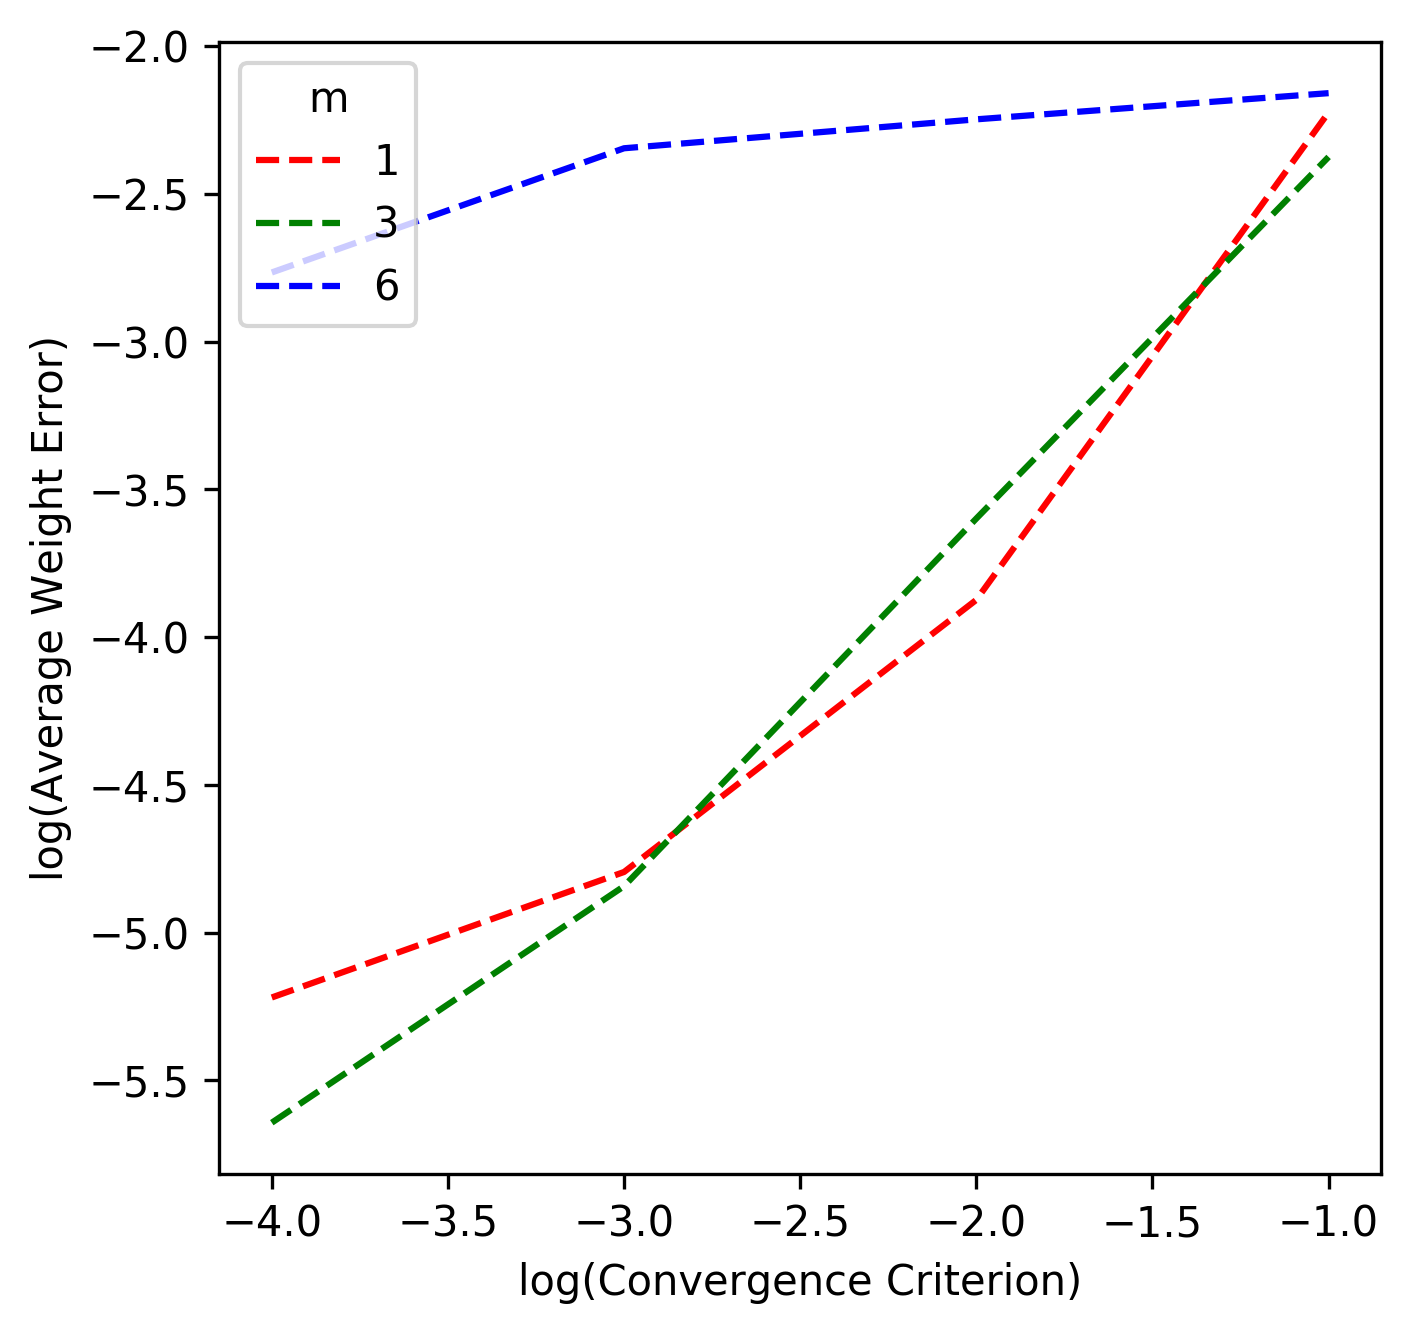

In [1906]:
# SGD: plot var convergence crit:
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), np.log10(avgdeltaw1), 'r--', label = '1')
plt.plot(np.log10(x), np.log10(avgdeltaw3), 'g--', label = '3')
plt.plot(np.log10(x), np.log10(avgdeltaw6), 'b--', label = '6')

plt.xlabel('log(Convergence Criterion)')
plt.ylabel('log(Average Weight Error)')
plt.legend(loc='upper left', title = 'm')
fig.savefig('var_cc_error_sgd.jpg', bbox_inches='tight')

In [1020]:
# Batch: generate data for var convergence crit:
m = 1
iterations1cc = []
west = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-6, 1e-5, 1e-4, 1e-3]:
    iterations1cc.append(grad_descent_multi_it(w+1, 0.1, i, f, f_prime, m))
    west.append(grad_descent_multi(w+1, 0.1, i, f, f_prime, m)[0:m+1])
avgdeltaw1b = np.mean(abs(np.array(west)-np.ndarray.flatten(w)), axis = 1)

m = 3
iterations3cc = []
west = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-6, 1e-5, 1e-4, 1e-3]:
    iterations3cc.append(grad_descent_multi_it(w+1, 0.1, i, f, f_prime, m))
    west.append(grad_descent_multi(w+1, 0.1, i, f, f_prime, m)[0:m+1])
avgdeltaw3b = np.mean(abs(np.array(west)-np.ndarray.flatten(w)), axis = 1)

m = 6
iterations6cc = []
west = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-6, 1e-5, 1e-4, 1e-3]:
    iterations6cc.append(grad_descent_multi_it(w+1, 0.1, i, f, f_prime, m))
    west.append(grad_descent_multi(w+1, 0.1, i, f, f_prime, m)[0:m+1])
avgdeltaw6b = np.mean(abs(np.array(west)-np.ndarray.flatten(w)), axis = 1)

In [1200]:
# plot var convergence crit:
x = [1e-6, 1e-5, 1e-4, 1e-3]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), (iterations1cc), 'r-', label = '1')
plt.plot(np.log10(x), (iterations3cc), 'g-', label = '3')
plt.plot(np.log10(x), (iterations6cc), '-', label = '6')

plt.xlabel('log(Convergence Criterion)')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = 'm')
fig.savefig('var_cc_iter.jpg', bbox_inches='tight')

In [1201]:
# plot var convergence crit:
x = [1e-6, 1e-5, 1e-4, 1e-3]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), np.log10(avgdeltaw1b), 'r--', label = '1')
plt.plot(np.log10(x), np.log10(avgdeltaw3b), 'g--', label = '3')
plt.plot(np.log10(x), np.log10(avgdeltaw6b), 'b--', label = '6')


plt.xlabel('log(Convergence Criterion)')
plt.ylabel('log(Average Weight Error)')
plt.legend(loc='upper left', title = 'm')
fig.savefig('var_cc_error_batch.jpg', bbox_inches='tight')

In [ ]:
# 2.3 Continued. Need to test with SGD!!

In [ ]:
# 2.4 Cosine
w=np.polyfit(X, Y, m)[::-1]

In [ ]:
def basis(X):
    Xnew = X
	for i in xrange(1,13):
		Xnew = np.hstack((Xnew, np.sin(0.4*math.pi*X*i)))
	return Xnew

In [1147]:
# define polycosx function - takes x and degree, returns array of x's up to given degree, including added col of ones
def polycosx(Xplot, degree):
    len = Xplot.shape[1]
    if degree == 0:
        Xnew = np.hstack(np.cos(math.pi*Xplot.T*0))
        return Xnew
    elif degree == 1:
        Xnew = np.hstack(np.cos(math.pi*Xplot.T))[np.newaxis].T
        return Xnew
    else:
        Xnew = np.hstack(np.cos(math.pi*Xplot.T))[np.newaxis].T
        for i in range(2, degree+1):
            Xnew = np.hstack((Xnew, np.cos(math.pi*Xplot.T*i)))
            i += 1 
                             
        return Xnew

In [1112]:
# define polycosx function - takes x and degree, returns array of x's up to given degree, including added col of ones
def polycosx_intercept(Xplot, degree):
    len = Xplot.shape[1]
    if degree == 0:
        Xnew = np.ones((len,1))
        return Xnew
    elif degree == 1:
        Xnew = np.hstack((np.ones((len, 1)), np.cos(math.pi*Xplot.T)))
        return Xnew
    else:
        Xnew = np.hstack((np.ones((len, 1)), np.cos(math.pi*Xplot.T)))
        for i in range(2, degree+1):
            Xnew = np.hstack((Xnew, np.cos(math.pi*Xplot.T*i)))
            i += 1 
                             
        return Xnew

In [ ]:
from sklearn import linear_model
clf = linear_model.LinearRegression(fit_intercept=False)
clf_int = linear_model.LinearRegression(fit_intercept=True)

In [1222]:
# m = 1
m = 1
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
clf.fit(polycosx(X[np.newaxis], m), Y)
clf_int.fit(polycosx_intercept(X[np.newaxis], m), Y)
Yplot2 = np.dot(polycosx(Xplot, m),clf.coef_.T)
Yploti = np.dot(polycosx_intercept(Xplot, m),clf_int.coef_.T)
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot2, '-', label = 'ML Estimate', linewidth=4)
plt.plot(Xplot.T, Yploti, 'r--', dashes=(3, 4), label = 'ML Estimate with Intercept', linewidth=4.0)
plt.plot(Xplot.T, Yactual.T, '-', label = 'Actual Function', linewidth=3)
plt.plot(X, Y, 'ko')
plt.plot()
plt.title("Cosine Basis Function (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-3,3])
plt.legend(loc='upper left', title = '')

fig.savefig('2.4 cosine fit m = %s.jpg' %(m))

In [ ]:
# m = 2
m = 2
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
clf.fit(polycosx(X[np.newaxis], m), Y)
clf_int.fit(polycosx_intercept(X[np.newaxis], m), Y)
Yplot2 = np.dot(polycosx(Xplot, m),clf.coef_.T)
Yploti = np.dot(polycosx_intercept(Xplot, m),clf_int.coef_.T)
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot2, '-', label = 'ML Estimate', linewidth=4)
plt.plot(Xplot.T, Yploti, 'r--', dashes=(3, 4), label = 'ML Estimate with Intercept', linewidth=4.0)
plt.plot(Xplot.T, Yactual.T, '-', label = 'Actual Function', linewidth=3)
plt.plot(X, Y, 'ko')
plt.plot()
plt.title("Cosine Basis Function (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-3,3])
plt.legend(loc='upper left', title = '')

fig.savefig('2.4 cosine fit m = %s.jpg'%(m))

In [1224]:
# m = 5
m = 5
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
clf.fit(polycosx(X[np.newaxis], m), Y)
clf_int.fit(polycosx_intercept(X[np.newaxis], m), Y)
Yplot2 = np.dot(polycosx(Xplot, m),clf.coef_.T)
Yploti = np.dot(polycosx_intercept(Xplot, m),clf_int.coef_.T)
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot2, '-', label = 'ML Estimate', linewidth=4)
plt.plot(Xplot.T, Yploti, 'r--', dashes=(3, 4), label = 'ML Estimate with Intercept', linewidth=4.0)
plt.plot(Xplot.T, Yactual.T, '-', label = 'Actual Function', linewidth=3)
plt.plot(X, Y, 'ko')
plt.plot()
plt.title("Cosine Basis Function (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-3,3])
plt.legend(loc='upper left', title = '')
fig.savefig('2.4 cosine fit m = %s.jpg' %(m))

In [ ]:
# m = 8
m = 8
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
clf.fit(polycosx(X[np.newaxis], m), Y)
clf_int.fit(polycosx_intercept(X[np.newaxis], m), Y)
Yplot2 = np.dot(polycosx(Xplot, m),clf.coef_.T)
Yploti = np.dot(polycosx_intercept(Xplot, m),clf_int.coef_.T)
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot2, '-', label = 'ML Estimate', linewidth=4)
plt.plot(Xplot.T, Yploti, 'r--', dashes=(3, 4), label = 'ML Estimate with Intercept', linewidth=4.0)
plt.plot(Xplot.T, Yactual.T, '-', label = 'Actual Function', linewidth=3)
plt.plot(X, Y, 'ko')
plt.plot()
plt.title("Cosine Basis Function (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-3,3])
plt.legend(loc='upper left', title = '')

fig.savefig('2.4 cosine fit m = %s.jpg' %(m))

In [1232]:
m=2
clf.fit(polycosx(X[np.newaxis], m), Y)
Xplot= X[np.newaxis]
clf.coef_

array([[ 0.7789928 ,  1.17413213]])

In [1242]:
f = lambda w, m: 0.5*sum((np.dot(polycosx(Xplot, m), w)-Y)**2)
fint = lambda w, m: 0.5*sum((np.dot(polycosx_intercept(Xplot, m), w)-Y)**2)

In [1247]:
sse = []
sseint = []
for m in range(1, 9):
    clf.fit(polycosx(X[np.newaxis], m), Y)
    clf_int.fit(polycosx_intercept(X[np.newaxis], m), Y)
    sse.append(f(clf.coef_.T, m))
    sseint.append(fint(clf_int.coef_.T, m))


[array([ 4.91799485]),
 array([ 0.78223609]),
 array([ 0.75657414]),
 array([ 0.64327684]),
 array([ 0.63636485]),
 array([ 0.25895684]),
 array([ 0.25853417]),
 array([ 0.25789205])]

In [1272]:
# Plot sse vs m
m = range(1,9)
#fig = plt.figure(figsize=(5,5), dpi=300)

plt.plot(m, sse, 'ro', markersize=11, alpha = 0.4, label = 'No Intercept')
plt.plot(m, sseint, 'gd', markersize = 11, alpha = 0.4, label = 'Intercept')
plt.legend(loc = 'upper right')
plt.xlabel('Basis Function Degree')
plt.ylabel('SSE')
#fig.savefig('2.4 Poly cos vs SSE.jpg')

In [1403]:
import random
for i in xrange(X.shape[0]):
    i = random.sample(xrange(X.shape[0]), 1)

In [ ]:
m=2
clf_int.fit(polycosx(X[np.newaxis], m), Y)
clf_int.coef_.T

In [ ]:
###### Trying SGD again: ########

In [1404]:
#HW1 QUE 1 - SGD
def calcCost(X, Y, thetas):
	n = X.shape[0] #number of training examples
	total_cost = 0
	for i in xrange(n): 
		X_i = X[i][np.newaxis]
		Y_i = Y[i]
		added_cost = np.power((np.dot(X_i, thetas) - Y_i), 2)
		total_cost = total_cost + added_cost
	return total_cost

IndentationError: expected an indented block (<ipython-input-1404-c0424308def8>, line 6)

In [1615]:
# import data for grad descent
# 1.3. Stochastic Gradient Descent
# retrieve data
def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P1/fittingdatap1_x.txt')
    Y = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P1/fittingdatap1_y.txt')

    return (X,Y) 

In [1616]:
X, Y = getData()
true_w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
true_w

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [ ]:
thetas = (true_w +0.01)[np.newaxis].T # initial guesses

temp = (Y_i - np.dot(X_i, thetas))[0][0]
alpha=1e-2
alpha*temp*X_i.T
thetas = thetas + alpha*temp*X_i.T
curr_cost = calcCost(X, Y, thetas)
curr_cost

In [1553]:
true_w

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [1551]:
def SGD(w, X, Y):
    n = X.shape[0] #number of training examples
    n_features = X.shape[1] # number of features per training example
    n_iter = 100000 # number of iterations  #CHANGE
    thresh = 100
    thetas = (w)[np.newaxis].T# initial guesses
    prev_cost = calcCost(X,Y,thetas) #initial cost before SGD begins
    print "Initial Cost: %0.3f" %prev_cost

    for iteration in xrange(n_iter): #for each iteration
        alpha = ((iteration+1)+1e6)**(-0.8) #learning rate
        for i in xrange(n): #for each training example #CHANGE
            i = random.sample(xrange(X.shape[0]), 1)
            X_i = X[i][np.newaxis][0]
            Y_i = Y[i][0]
            temp = (Y_i - np.dot(X_i, thetas))[0][0]
            thetas = thetas + (alpha*temp* X_i.T) #
            inner_iter = i

            curr_cost = calcCost(X, Y, thetas)
            print "iteration: %0.3f" %iteration
            print "cost: %0.3f" %curr_cost
            if np.power((sum((Y - np.ndarray.flatten(np.dot(X, thetas)))))**2, 0.5) <= thresh:
                print('SUCCESS')
                return (iteration, curr_cost, thetas)
            prev_cost = curr_cost
    print("Did Not Converge")
    return (iteration, curr_cost, thetas)

In [1552]:
SGD(true_w+1, X, Y)


Initial Cost: 517053.083
iteration: 0.000
cost: 516095.892
iteration: 0.000
cost: 511686.628
iteration: 0.000
cost: 496032.155
iteration: 0.000
cost: 494865.624
iteration: 0.000
cost: 492137.669
iteration: 0.000
cost: 492162.667
iteration: 0.000
cost: 491775.043
iteration: 0.000
cost: 487569.042
iteration: 0.000
cost: 484238.560
iteration: 0.000
cost: 462505.136
iteration: 0.000
cost: 451668.472
iteration: 0.000
cost: 451301.832
iteration: 0.000
cost: 451461.618
iteration: 0.000
cost: 448534.842
iteration: 0.000
cost: 448545.534
iteration: 0.000
cost: 448328.491
iteration: 0.000
cost: 446775.290
iteration: 0.000
cost: 446141.216
iteration: 0.000
cost: 435640.761
iteration: 0.000
cost: 420488.078
iteration: 0.000
cost: 389086.515
iteration: 0.000
cost: 388546.882
iteration: 0.000
cost: 387582.804
iteration: 0.000
cost: 387053.836
iteration: 0.000
cost: 387273.402
iteration: 0.000
cost: 386854.444
iteration: 0.000
cost: 386478.447
iteration: 0.000
cost: 383522.526
iteration: 0.000
cost: 

iteration: 2.000
cost: 16645.633
iteration: 2.000
cost: 16704.555
iteration: 2.000
cost: 16705.894
iteration: 2.000
cost: 16715.621
iteration: 2.000
cost: 16701.304
iteration: 2.000
cost: 16785.180
iteration: 2.000
cost: 16688.914
iteration: 2.000
cost: 16690.758
iteration: 2.000
cost: 16720.413
iteration: 2.000
cost: 16741.772
iteration: 2.000
cost: 16747.331
iteration: 2.000
cost: 16336.822
iteration: 2.000
cost: 16332.266
iteration: 3.000
cost: 16335.407
iteration: 3.000
cost: 16345.455
iteration: 3.000
cost: 16291.107
iteration: 3.000
cost: 16314.394
iteration: 3.000
cost: 16261.553
iteration: 3.000
cost: 16259.853
iteration: 3.000
cost: 16200.441
iteration: 3.000
cost: 16222.853
iteration: 3.000
cost: 16180.858
iteration: 3.000
cost: 15839.520
iteration: 3.000
cost: 15707.409
iteration: 3.000
cost: 15669.482
iteration: 3.000
cost: 15677.988
iteration: 3.000
cost: 15655.032
iteration: 3.000
cost: 15657.645
iteration: 3.000
cost: 15644.887
iteration: 3.000
cost: 15573.950
iteration:

(3, array([[ 12389.23114251]]), array([[  0.47171124],
        [ -2.31489619],
        [ -6.35661294],
        [  6.8904051 ],
        [ -0.96079664],
        [  6.89828349],
        [  3.65813218],
        [ -0.43610484],
        [-12.91141183],
        [ 15.85031095]]))